In [ ]:
import pandas as pd

MONGO_CLIENT_URL = ""

df = pd.read_csv("/Users/alvinthosatria/Documents/FYP/FYP/cleaned_liver_data.csv")
df_features = pd.read_csv("/Users/alvinthosatria/Documents/FYP/FYP/biopython_features.csv")
lf_features = pd.read_csv("/Users/alvinthosatria/Documents/FYP/FYP/Sequence_Embeddings/mRNA_Sequence_Embeddings/Linear_Fold/lf_features.csv")

# Merge Biopython & LinearFold features

In [3]:
df_features = pd.merge(df_features, df[['protein_id', "protein_length", "mrna_id", "5utr_length", "cds_length", "3utr_length", "cdna_length",  "median_TPM", "protein_abundance"]], on='protein_id', how='left')
df_features

protein_id   gc_5utr    gc_cds   gc_3utr        cds_mw  \
0     ENSP00000341562  0.719258  0.627341  0.539730  4.937013e+05   
1     ENSP00000290765  0.734375  0.591837  0.423948  2.273655e+05   
2     ENSP00000256996  0.582822  0.544393  0.505435  3.963254e+05   
3     ENSP00000262990  0.627273  0.435099  0.320621  2.996514e+05   
4     ENSP00000371811  0.636364  0.423755  0.279570  4.053791e+05   
...               ...       ...       ...       ...           ...   
7982  ENSP00000387111  0.603865  0.383838  0.181818  1.226155e+05   
7983  ENSP00000477037  0.510526  0.583333  0.411716  2.969782e+04   
7984  ENSP00000361601  0.494737  0.554184  0.496711  4.483864e+05   
7985  ENSP00000437563  0.600000  0.416321  0.334615  2.237391e+05   
7986  ENSP00000483386  0.680412  0.639634  0.487143  1.522506e+06   

      kozak_score       cai  rare_codon_freq   protein_mw  protein_pi  ...  \
0               6  0.673660         0.033708   58881.6379    8.933400  ...   
1               8  0.687860         0.057143   27506.6618    5.992330  ...   
2               7  0.725646         0.042056   47863.4286    9.557905  ...   
3               5  0.757806         0.021807   36200.9910    5.792712  ...   
4               7  0.746771         0.034483   49665.5783    9.166002  ...   
...           ...       ...              ...          ...         ...  ...   
7982            5  0.775531         0.136364   15190.7670   10.327658  ...   
7983            5  0.864096         0.437500    3275.9663    6.495640  ...   
7984            4  0.692468         0.012346   55069.9292    7.054822  ...   
7985            5  0.761239         0.029046   27212.8970    8.562900  ...   
7986            8  0.678687         0.016463  180715.4373    6.457160  ...   

      protein_aromatic_frac  protein_polar_uncharged_frac  protein_length  \
0                  0.086304                      0.202627             533   
1                  0.086066                      0.155738             244   
2                  0.084309                      0.227166             427   
3                  0.078125                      0.203125             320   
4                  0.112903                      0.188940             434   
...                     ...                           ...             ...   
7982               0.068702                      0.175573             131   
7983               0.032258                      0.161290              31   
7984               0.092784                      0.235052             485   
7985               0.066667                      0.262500             240   
7986               0.049420                      0.215985            1639   

              mrna_id  5utr_length  cds_length  3utr_length  cdna_length  \
0     ENST00000341156          431        1602         3335         5368   
1     ENST00000290765           64         735          309         1108   
2     ENST00000256996          163        1284          368         1815   
3     ENST00000262990          220         963          708         1891   
4     ENST00000382374           22        1305          558         1885   
...               ...          ...         ...          ...          ...   
7982  ENST00000410042          207         396           66          669   
7983  ENST00000553909          190          96         1212         1498   
7984  ENST00000372523           95        1458         1216         2769   
7985  ENST00000539033           15         723          260          998   
7986  ENST00000619918          485        4920          700         6105   

      median_TPM  protein_abundance  
0          0.100              0.068  
1         11.385             57.000  
2          3.740              2.510  
3         13.445              2.500  
4          8.060              2.500  
...          ...                ...  
7982       0.155              1.010  
7983      24.155              0.591  
7984       2.750              0.030  
7985       0.110           

In [4]:
lf_features

mrna_id  5utr_mfe  5utr_paired_ratio  cds_mfe  cds_paired_ratio  \
0     ENST00000341156    -196.8           0.320186   -660.8          0.327091   
1     ENST00000290765      -8.0           0.203125   -285.3          0.329252   
2     ENST00000256996     -49.4           0.288344   -447.3          0.312305   
3     ENST00000262990     -79.0           0.322727   -276.6          0.299065   
4     ENST00000382374      -3.5           0.181818   -351.2          0.307280   
...               ...       ...                ...      ...               ...   
7982  ENST00000410042     -57.9           0.289855    -76.9          0.267677   
7983  ENST00000553909     -51.9           0.278947    -36.2          0.333333   
7984  ENST00000372523     -25.7           0.315789   -477.1          0.303155   
7985  ENST00000539033      -0.0           0.000000   -180.0          0.290456   
7986  ENST00000619918    -222.5           0.319588  -2219.1          0.330285   

      3utr_mfe  3utr_paired_ratio  cdna_mfe  cdna_paired_ratio  
0      -1142.0           0.301049   -2001.3           0.307936  
1        -74.6           0.284790    -389.2           0.314982  
2       -125.3           0.323370    -643.7           0.316804  
3       -150.9           0.337571    -527.8           0.315706  
4       -101.7           0.286738    -466.4           0.309284  
...        ...                ...       ...                ...  
7982      -3.2           0.181818    -151.8           0.303438  
7983    -324.6           0.312706    -421.1           0.311081  
7984    -622.7           0.364309   -1155.1           0.331889  
7985     -39.5           0.261538    -232.5           0.295591  
7986    -185.2           0.304286   -2646.0           0.323669  

[7987 rows x 9 columns]

In [5]:
df_features = pd.merge(df_features, lf_features, on="mrna_id", how="left")
df_features

protein_id   gc_5utr    gc_cds   gc_3utr        cds_mw  \
0     ENSP00000341562  0.719258  0.627341  0.539730  4.937013e+05   
1     ENSP00000290765  0.734375  0.591837  0.423948  2.273655e+05   
2     ENSP00000256996  0.582822  0.544393  0.505435  3.963254e+05   
3     ENSP00000262990  0.627273  0.435099  0.320621  2.996514e+05   
4     ENSP00000371811  0.636364  0.423755  0.279570  4.053791e+05   
...               ...       ...       ...       ...           ...   
7982  ENSP00000387111  0.603865  0.383838  0.181818  1.226155e+05   
7983  ENSP00000477037  0.510526  0.583333  0.411716  2.969782e+04   
7984  ENSP00000361601  0.494737  0.554184  0.496711  4.483864e+05   
7985  ENSP00000437563  0.600000  0.416321  0.334615  2.237391e+05   
7986  ENSP00000483386  0.680412  0.639634  0.487143  1.522506e+06   

      kozak_score       cai  rare_codon_freq   protein_mw  protein_pi  ...  \
0               6  0.673660         0.033708   58881.6379    8.933400  ...   
1               8  0.687860         0.057143   27506.6618    5.992330  ...   
2               7  0.725646         0.042056   47863.4286    9.557905  ...   
3               5  0.757806         0.021807   36200.9910    5.792712  ...   
4               7  0.746771         0.034483   49665.5783    9.166002  ...   
...           ...       ...              ...          ...         ...  ...   
7982            5  0.775531         0.136364   15190.7670   10.327658  ...   
7983            5  0.864096         0.437500    3275.9663    6.495640  ...   
7984            4  0.692468         0.012346   55069.9292    7.054822  ...   
7985            5  0.761239         0.029046   27212.8970    8.562900  ...   
7986            8  0.678687         0.016463  180715.4373    6.457160  ...   

      median_TPM  protein_abundance  5utr_mfe  5utr_paired_ratio  cds_mfe  \
0          0.100              0.068    -196.8           0.320186   -660.8   
1         11.385             57.000      -8.0           0.203125   -285.3   
2          3.740              2.510     -49.4           0.288344   -447.3   
3         13.445              2.500     -79.0           0.322727   -276.6   
4          8.060              2.500      -3.5           0.181818   -351.2   
...          ...                ...       ...                ...      ...   
7982       0.155              1.010     -57.9           0.289855    -76.9   
7983      24.155              0.591     -51.9           0.278947    -36.2   
7984       2.750              0.030     -25.7           0.315789   -477.1   
7985       0.110              0.102      -0.0           0.000000   -180.0   
7986       0.010              0.010    -222.5           0.319588  -2219.1   

      cds_paired_ratio  3utr_mfe  3utr_paired_ratio  cdna_mfe  \
0             0.327091   -1142.0           0.301049   -2001.3   
1             0.329252     -74.6           0.284790    -389.2   
2             0.312305    -125.3           0.323370    -643.7   
3             0.299065    -150.9           0.337571    -527.8   
4             0.307280    -101.7           0.286738    -466.4   
...                ...       ...                ...       ...   
7982          0.267677      -3.2           0.181818    -151.8   
7983          0.333333    -324.6           0.312706    -421.1   
7984          0.303155    -622.7           0.364309   -1155.1   
7985          0.290456     -39.5           0.261538    -232.5   
7986          0.330285    -185.2           0.304286   -2646.0   

      cdna_paired_ratio  
0              0.307936  
1              0.314982  
2              0.316804  
3              0.315706  
4              0.309284  
...                 ...  
7982           0.303438  
7983           0.311081  
7984           0.331889  
7985           0.295591  
7986           0.323669  

[7987 rows x 60 columns]

In [6]:
ids = ["mrna_id", "protein_id"]

In [7]:
cols = ['protein_abundance'] + [col for col in df_features.columns if col != 'protein_abundance']
df_features = df_features[cols]
df_features.drop(ids, axis=1).columns

Index(['protein_abundance', 'gc_5utr', 'gc_cds', 'gc_3utr', 'cds_mw',
       'kozak_score', 'cai', 'rare_codon_freq', 'protein_mw', 'protein_pi',
       'protein_aromaticity', 'protein_instability', 'protein_gravy',
       'protein_flexibility', 'protein_helix_frac', 'protein_turn_frac',
       'protein_sheet_frac', 'protein_charge_ph7', 'protein_aliphatic_index',
       'protein_aa_freq_A', 'protein_aa_freq_C', 'protein_aa_freq_D',
       'protein_aa_freq_E', 'protein_aa_freq_F', 'protein_aa_freq_G',
       'protein_aa_freq_H', 'protein_aa_freq_I', 'protein_aa_freq_K',
       'protein_aa_freq_L', 'protein_aa_freq_M', 'protein_aa_freq_N',
       'protein_aa_freq_P', 'protein_aa_freq_Q', 'protein_aa_freq_R',
       'protein_aa_freq_S', 'protein_aa_freq_T', 'protein_aa_freq_V',
       'protein_aa_freq_W', 'protein_aa_freq_Y', 'protein_hydrophobic_frac',
       'protein_hydrophilic_frac', 'protein_charged_frac',
       'protein_aromatic_frac', 'protein_polar_uncharged_frac',
       'prote

# Exploratory Data Analysis

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


def basic_stats(df):
    stats_df = pd.DataFrame(
        {
            "mean": df.mean(),
            "median": df.median(),
            "std": df.std(),
            "min": df.min(),
            "max": df.max(),
            "skew": df.skew(),
        }
    )
    return stats_df


def plot_distributions(df, ncols=4, figsize=(18, 40)):
    nrows = len(df.columns) // ncols + (1 if len(df.columns) % ncols != 0 else 0)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()

    for idx, col in enumerate(df.columns):
        sns.histplot(data=df, x=col, ax=axes[idx], kde=True)
        skewness = df[col].skew()
        axes[idx].set_title(f"Distribution of {col}\nSkewness: {skewness:.2f}")
        axes[idx].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    return fig

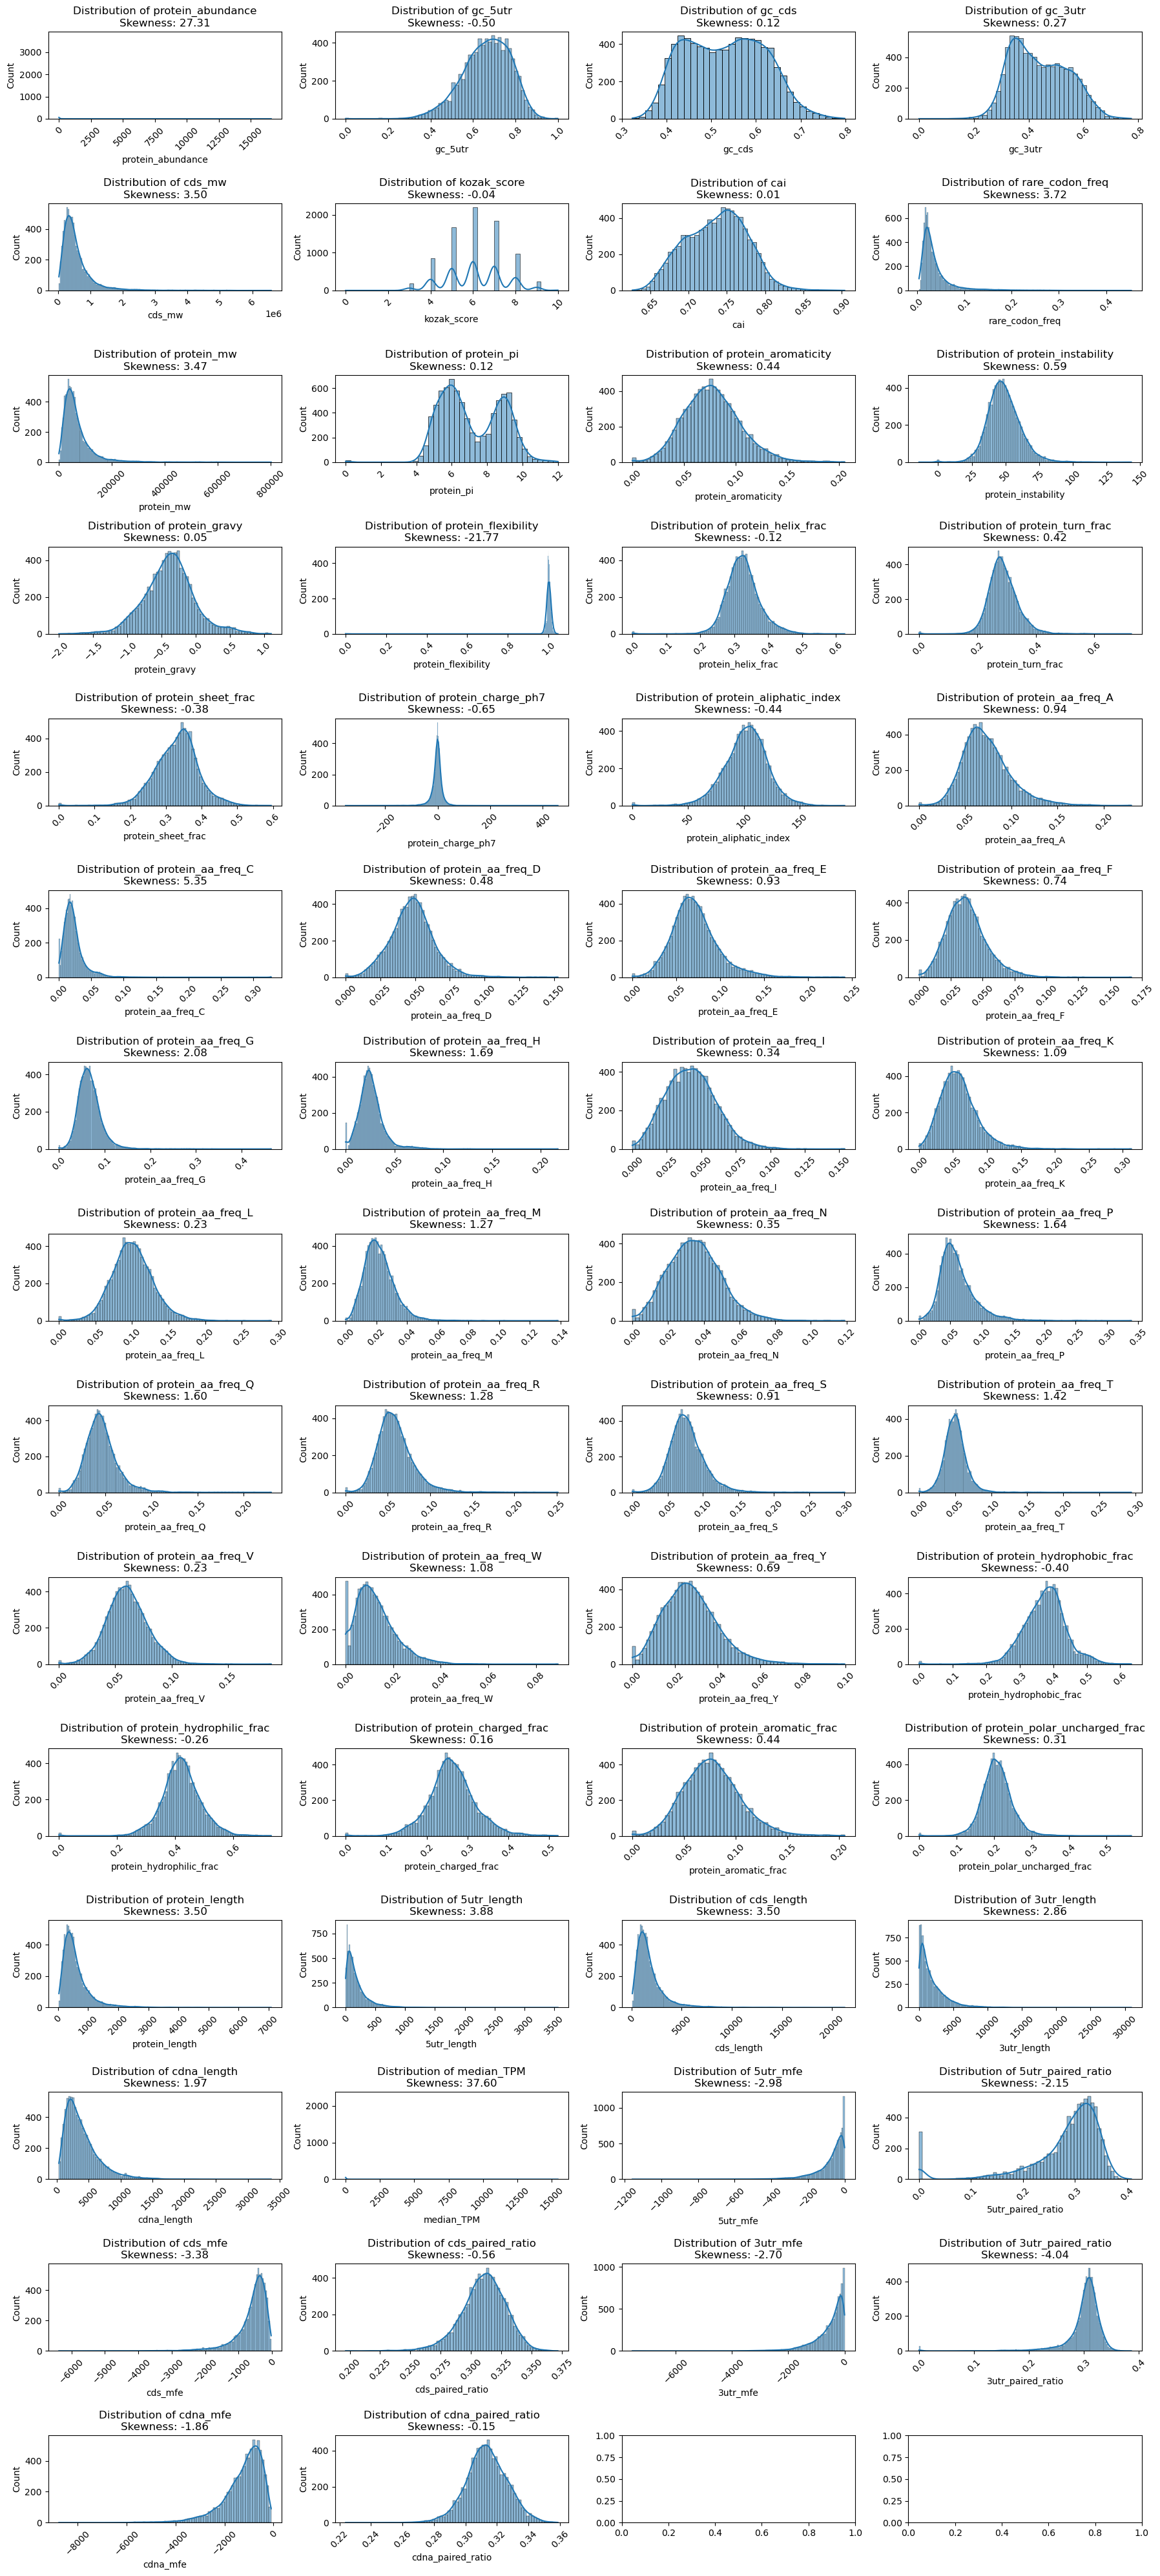

In [9]:
df_features_without_ids = df_features.drop(ids, axis=1)
stats = basic_stats(df_features_without_ids)

dist_plot = plot_distributions(df_features_without_ids)

# Transform Target variable

-0.20032892467207972

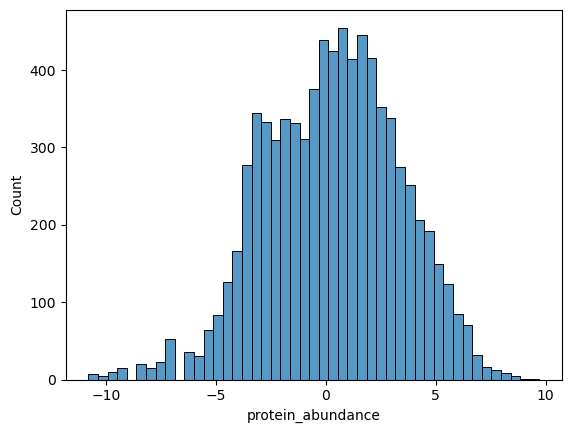

In [10]:
df_processed = df_features.drop(["protein_id", "mrna_id"], axis=1).copy()
df_processed["protein_abundance"] = np.log(df_processed["protein_abundance"])
sns.histplot(df_processed["protein_abundance"])
df_processed["protein_abundance"].skew()

# Transform Features

-0.04406687521970051

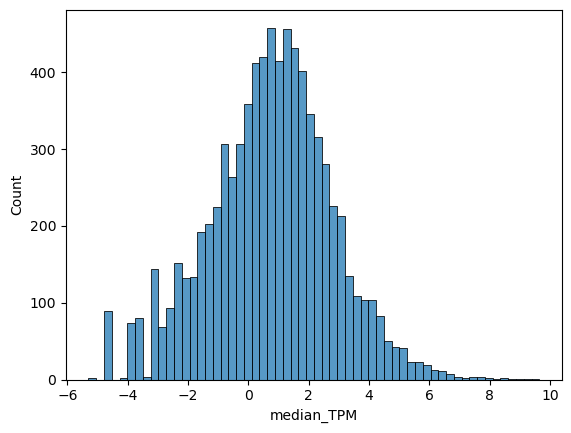

In [11]:
df_processed["median_TPM"] = np.log(df_processed["median_TPM"])
sns.histplot(df_processed["median_TPM"])
df_processed["median_TPM"].skew()

In [12]:
from sklearn.preprocessing import PowerTransformer
from scipy import stats

power_transformer = PowerTransformer(method="yeo-johnson", standardize=False)

df_processed["5utr_mfe"] = power_transformer.fit_transform(
    df_processed["5utr_mfe"].values.reshape(-1, 1)
)
df_processed["cds_mfe"] = power_transformer.fit_transform(
    df_processed["cds_mfe"].values.reshape(-1, 1)
)
df_processed["3utr_mfe"] = power_transformer.fit_transform(
    df_processed["3utr_mfe"].values.reshape(-1, 1)
)

df_processed["cdna_mfe"] = power_transformer.fit_transform(
    df_processed["cdna_mfe"].values.reshape(-1, 1)
)

df_processed["5utr_length"] = np.log(df_processed["5utr_length"])
df_processed["cds_length"] = np.log(df_processed["cds_length"])
df_processed["3utr_length"] = np.log(df_processed["3utr_length"])
df_processed["cdna_length"] = np.log(df_processed["cdna_length"])

df_processed["cds_mw"] = power_transformer.fit_transform(
    df_processed["cds_mw"].values.reshape(-1, 1)
)

df_processed["protein_mw"] = power_transformer.fit_transform(
    df_processed["protein_mw"].values.reshape(-1, 1)
)

df_processed["rare_codon_freq"] = np.log(df_processed["rare_codon_freq"]) 

df_processed["protein_flexibility"] = power_transformer.fit_transform(
    df_processed["protein_flexibility"].values.reshape(-1, 1)
)

df_processed["protein_length"] = np.log(df_processed["protein_length"])

print(
    df_processed["5utr_mfe"].skew(), "\n",
    df_processed["cds_mfe"].skew(), "\n",
    df_processed["3utr_mfe"].skew(), "\n",
    df_processed["cdna_mfe"].skew(), "\n",
    df_processed["5utr_length"].skew(), "\n",
    df_processed["cds_length"].skew(), "\n",
    df_processed["3utr_length"].skew(), "\n",
    df_processed["cdna_length"].skew(), "\n",
    df_processed["cds_mw"].skew(), "\n",
    df_processed["protein_mw"].skew(), "\n",
    df_processed["rare_codon_freq"].skew(), "\n",
    df_processed["protein_flexibility"].skew(), "\n",
    df_processed["protein_length"].skew()
)

0.03645495270416423 
 -0.004091997137455563 
 0.02961538627769676 
 0.0019996821833762344 
 -0.30007057226860445 
 0.034739336863632696 
 -0.5496696206724411 
 -0.22305262442360613 
 -0.001202458916623113 
 0.2184323637540087 
 0.7882773934481091 
 0.09261605917263614 
 0.02820944400996866


# Get top 15 features (with multicollinearity <=0.5)

In [13]:
def remove_multicollinear_features(df, target_col, threshold=0.5):
    corr_matrix = df.corr(method='spearman').abs()
    
    target_corr = corr_matrix[target_col].abs()
    
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    features_to_drop = []
    
    for column in upper.columns:
        if column == target_col or column in features_to_drop:
            continue

        correlated_features = upper[column][upper[column] > threshold].index
        
        for feature in correlated_features:
            if feature == target_col or feature in features_to_drop:
                continue

            print(f"\nPair found: {column} & {feature}")
            print(f"Correlation between them: {corr_matrix.loc[column, feature]:.3f}")
            print(f"Correlation with target - {column}: {target_corr[column]:.3f}")
            print(f"Correlation with target - {feature}: {target_corr[feature]:.3f}")
                
            if target_corr[column] < target_corr[feature]:
                features_to_drop.append(column)
                print(f"Dropping: {column} (weaker correlation with target)")
            else:
                features_to_drop.append(feature)
                print(f"Dropping: {feature} (weaker correlation with target)")
    
    features_to_drop = list(set(features_to_drop))
    df_filtered = df.drop(columns=features_to_drop)
    
    print(f"Dropped {len(features_to_drop)} features: {features_to_drop}")
    return df_filtered

df_processed = remove_multicollinear_features(df_processed, target_col='protein_abundance', threshold=0.5)


Pair found: gc_3utr & gc_cds
Correlation between them: 0.739
Correlation with target - gc_3utr: 0.016
Correlation with target - gc_cds: 0.079
Dropping: gc_3utr (weaker correlation with target)

Pair found: cai & gc_cds
Correlation between them: 0.624
Correlation with target - cai: 0.083
Correlation with target - gc_cds: 0.079
Dropping: gc_cds (weaker correlation with target)

Pair found: rare_codon_freq & cds_mw
Correlation between them: 0.644
Correlation with target - rare_codon_freq: 0.132
Correlation with target - cds_mw: 0.179
Dropping: rare_codon_freq (weaker correlation with target)

Pair found: protein_mw & cds_mw
Correlation between them: 0.998
Correlation with target - protein_mw: 0.181
Correlation with target - cds_mw: 0.179
Dropping: cds_mw (weaker correlation with target)

Pair found: protein_flexibility & protein_aromaticity
Correlation between them: 0.594
Correlation with target - protein_flexibility: 0.005
Correlation with target - protein_aromaticity: 0.048
Dropping: p

# Features Ranking by Mutual Information & Spearman Correlation Average

In [14]:
df_processed

protein_abundance   gc_5utr  kozak_score       cai  protein_instability  \
0             -2.688248  0.719258            6  0.673660            47.149737   
1              4.043051  0.734375            8  0.687860            36.974590   
2              0.920283  0.582822            7  0.725646            49.644988   
3              0.916291  0.627273            5  0.757806            54.413438   
4              0.916291  0.636364            7  0.746771            34.719124   
...                 ...       ...          ...       ...                  ...   
7982           0.009950  0.603865            5  0.775531            56.080916   
7983          -0.525939  0.510526            5  0.864096            34.529032   
7984          -3.506558  0.494737            4  0.692468            54.247856   
7985          -2.282782  0.600000            5  0.761239            48.119583   
7986          -4.605170  0.680412            8  0.678687            67.515272   

      protein_helix_frac  protein_charge_ph7  protein_aa_freq_A  \
0               0.292683            7.360058           0.088180   
1               0.385246           -3.049682           0.090164   
2               0.271663           19.725004           0.063232   
3               0.321875           -8.662125           0.068750   
4               0.368664           10.655451           0.078341   
...                  ...                 ...                ...   
7982            0.290076           14.096034           0.038168   
7983            0.387097           -0.411360           0.032258   
7984            0.344330            0.264627           0.080412   
7985            0.287500            4.146140           0.041667   
7986            0.337401           -8.138679           0.091519   

      protein_aa_freq_C  protein_aa_freq_D  ...  protein_aa_freq_R  \
0              0.015009           0.048780  ...           0.084428   
1              0.012295           0.045082  ...           0.057377   
2              0.025761           0.051522  ...           0.065574   
3              0.090625           0.071875  ...           0.059375   
4              0.011521           0.041475  ...           0.057604   
...                 ...                ...  ...                ...   
7982           0.015267           0.030534  ...           0.076336   
7983           0.000000           0.032258  ...           0.032258   
7984           0.026804           0.030928  ...           0.043299   
7985           0.037500           0.029167  ...           0.058333   
7986           0.025625           0.042709  ...           0.083588   

      protein_aa_freq_S  protein_aa_freq_T  protein_aa_freq_W  \
0              0.069418           0.061914           0.013133   
1              0.045082           0.036885           0.020492   
2              0.088993           0.056206           0.025761   
3              0.078125           0.050000           0.009375   
4              0.064516           0.052995           0.016129   
...                 ...                ...                ...   
7982           0.053435           0.053435           0.022901   
7983           0.032258           0.064516           0.000000   
7984           0.076289           0.057732           0.018557   
7985           0.100000           0.045833           0.016667   
7986           0.086028           0.035387           0.014033   

      protein_aa_freq_Y  5utr_length  median_TPM  3utr_paired_ratio  \
0              0.031895     6.066108   -2.302585           0.301049   
1              0.028689     4.158883    2.432297           0.284790   
2              0.021077     5.093750    1.319086           0.323370   
3              0.031250     5.393628    2.598607           0.337571   
4              0.020737     3.091042    2.086914           0.286738   
...                 ...          ...         ...                ...   
7982           0.015267     5.332719   -1.864330           0.181818   
7983           0.000000     5.247024  

In [15]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import pandas as pd

X = df_processed.drop('protein_abundance', axis=1)
y = df_processed['protein_abundance']
mi_scores = mutual_info_regression(X, y)

spearman_corr = df_processed.corr(method='spearman')['protein_abundance'].drop('protein_abundance')

feature_scores = pd.DataFrame({
    'MI_Score': mi_scores,
    'Spearman_Corr': spearman_corr
}, index=X.columns)

top_mi = feature_scores.sort_values('MI_Score', ascending=False)
top_spearman = feature_scores.sort_values('Spearman_Corr', ascending=False, key=abs)

print("Top 15 features by Mutual Information:")
print(top_mi.head(15))
print("\nTop 15 features by absolute Spearman correlation:")
print(top_spearman.head(15))

feature_scores['MI_rank'] = feature_scores['MI_Score'].rank(ascending=False)
feature_scores['Spearman_rank'] = feature_scores['Spearman_Corr'].abs().rank(ascending=False)
feature_scores['Average_rank'] = (feature_scores['MI_rank'] + feature_scores['Spearman_rank']) / 2

print("\nTop 15 features by average rank:")
print(feature_scores.sort_values('Average_rank').head(15))

Top 15 features by Mutual Information:
                     MI_Score  Spearman_Corr
median_TPM           0.380297       0.621028
cdna_mfe             0.061746       0.249564
protein_instability  0.058589      -0.240848
protein_aa_freq_S    0.041288      -0.272712
protein_aa_freq_K    0.039510       0.155783
5utr_length          0.037723      -0.250865
protein_aa_freq_C    0.032465      -0.243198
protein_aa_freq_H    0.032128      -0.167396
protein_helix_frac   0.030162       0.169055
protein_aa_freq_I    0.024996       0.160929
3utr_paired_ratio    0.023262      -0.083269
protein_aa_freq_P    0.022517      -0.175314
protein_charge_ph7   0.019657      -0.070316
protein_aa_freq_A    0.019009       0.081060
protein_aa_freq_Y    0.018312       0.063135

Top 15 features by absolute Spearman correlation:
                     MI_Score  Spearman_Corr
median_TPM           0.380297       0.621028
protein_aa_freq_S    0.041288      -0.272712
5utr_length          0.037723      -0.250865
cdna_mfe  

In [16]:
df_processed

protein_abundance   gc_5utr  kozak_score       cai  protein_instability  \
0             -2.688248  0.719258            6  0.673660            47.149737   
1              4.043051  0.734375            8  0.687860            36.974590   
2              0.920283  0.582822            7  0.725646            49.644988   
3              0.916291  0.627273            5  0.757806            54.413438   
4              0.916291  0.636364            7  0.746771            34.719124   
...                 ...       ...          ...       ...                  ...   
7982           0.009950  0.603865            5  0.775531            56.080916   
7983          -0.525939  0.510526            5  0.864096            34.529032   
7984          -3.506558  0.494737            4  0.692468            54.247856   
7985          -2.282782  0.600000            5  0.761239            48.119583   
7986          -4.605170  0.680412            8  0.678687            67.515272   

      protein_helix_frac  protein_charge_ph7  protein_aa_freq_A  \
0               0.292683            7.360058           0.088180   
1               0.385246           -3.049682           0.090164   
2               0.271663           19.725004           0.063232   
3               0.321875           -8.662125           0.068750   
4               0.368664           10.655451           0.078341   
...                  ...                 ...                ...   
7982            0.290076           14.096034           0.038168   
7983            0.387097           -0.411360           0.032258   
7984            0.344330            0.264627           0.080412   
7985            0.287500            4.146140           0.041667   
7986            0.337401           -8.138679           0.091519   

      protein_aa_freq_C  protein_aa_freq_D  ...  protein_aa_freq_R  \
0              0.015009           0.048780  ...           0.084428   
1              0.012295           0.045082  ...           0.057377   
2              0.025761           0.051522  ...           0.065574   
3              0.090625           0.071875  ...           0.059375   
4              0.011521           0.041475  ...           0.057604   
...                 ...                ...  ...                ...   
7982           0.015267           0.030534  ...           0.076336   
7983           0.000000           0.032258  ...           0.032258   
7984           0.026804           0.030928  ...           0.043299   
7985           0.037500           0.029167  ...           0.058333   
7986           0.025625           0.042709  ...           0.083588   

      protein_aa_freq_S  protein_aa_freq_T  protein_aa_freq_W  \
0              0.069418           0.061914           0.013133   
1              0.045082           0.036885           0.020492   
2              0.088993           0.056206           0.025761   
3              0.078125           0.050000           0.009375   
4              0.064516           0.052995           0.016129   
...                 ...                ...                ...   
7982           0.053435           0.053435           0.022901   
7983           0.032258           0.064516           0.000000   
7984           0.076289           0.057732           0.018557   
7985           0.100000           0.045833           0.016667   
7986           0.086028           0.035387           0.014033   

      protein_aa_freq_Y  5utr_length  median_TPM  3utr_paired_ratio  \
0              0.031895     6.066108   -2.302585           0.301049   
1              0.028689     4.158883    2.432297           0.284790   
2              0.021077     5.093750    1.319086           0.323370   
3              0.031250     5.393628    2.598607           0.337571   
4              0.020737     3.091042    2.086914           0.286738   
...                 ...          ...         ...                ...   
7982           0.015267     5.332719   -1.864330           0.181818   
7983           0.000000     5.247024  

# Heatmap (sorted by average rank)

In [17]:
top_correlations = feature_scores.sort_values('Average_rank').head(15)
top_correlations.index

Index(['median_TPM', 'protein_aa_freq_S', 'cdna_mfe', 'protein_instability',
       '5utr_length', 'protein_aa_freq_C', 'protein_helix_frac',
       'protein_aa_freq_K', 'protein_aa_freq_H', 'protein_aa_freq_P',
       'protein_aa_freq_I', '3utr_paired_ratio', 'protein_aa_freq_M',
       'kozak_score', 'protein_aa_freq_A'],
      dtype='object')

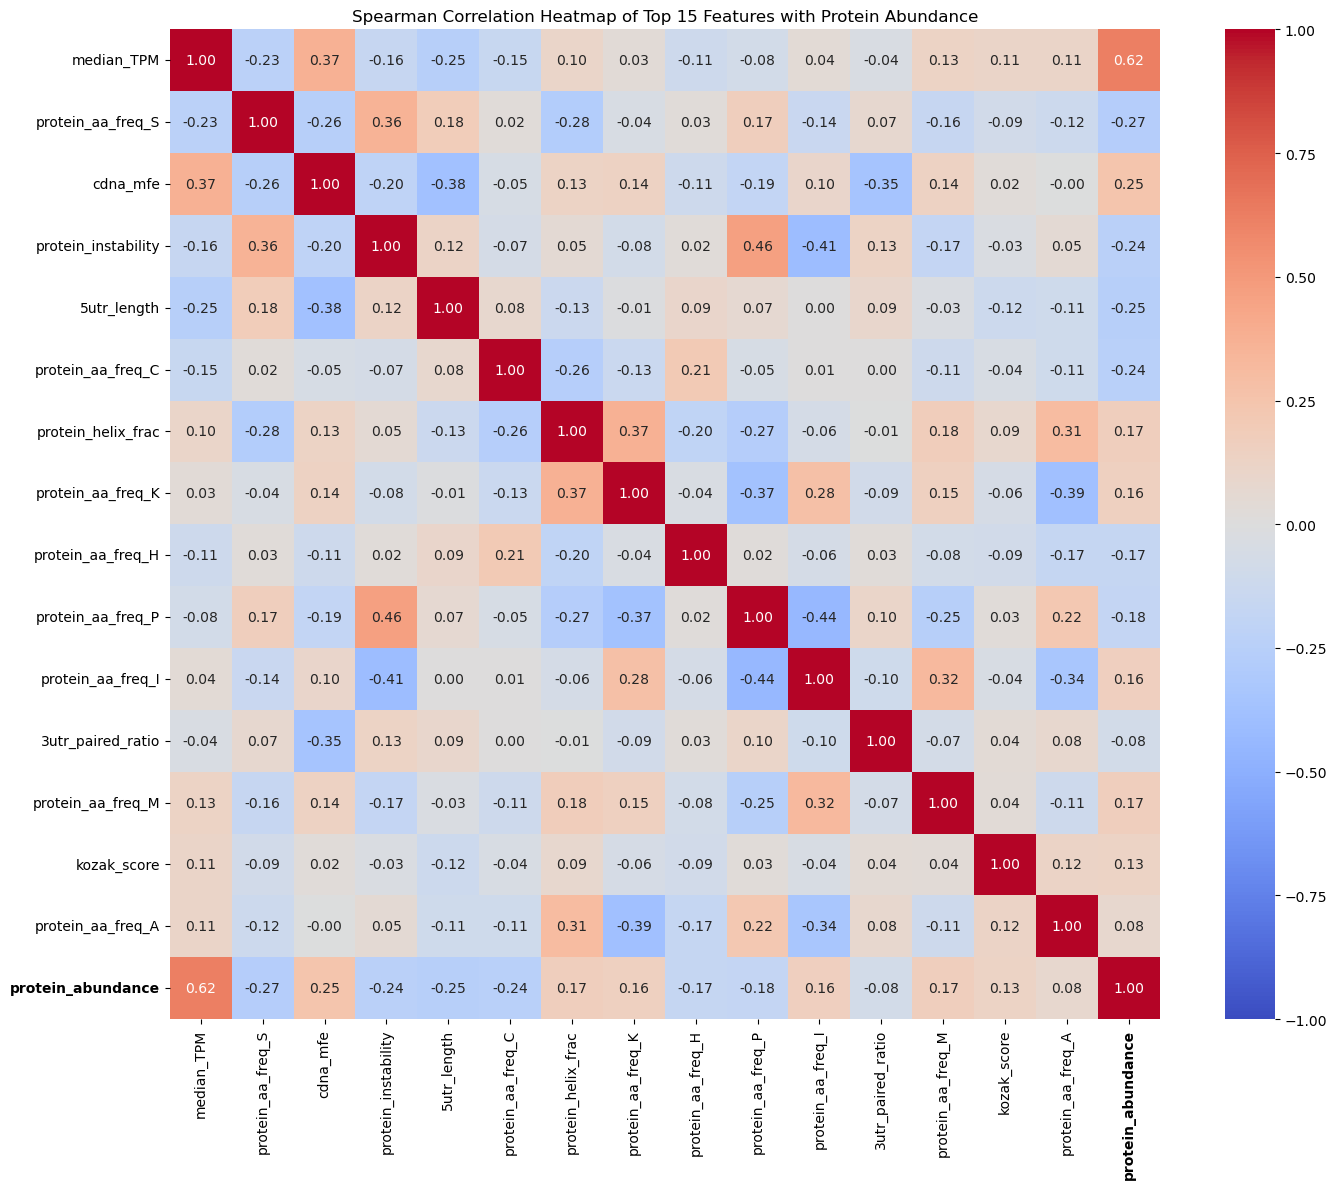

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

correlation_matrix = df_processed[
    list(top_correlations.index) + ["protein_abundance"]
].corr(method="spearman")

plt.figure(figsize=(15, 12))

heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    square=True,
)

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

labels = ax.get_xticklabels()
for i, label in enumerate(labels):
    if label.get_text() == "protein_abundance":
        labels[i].set_weight("bold")

labels = ax.get_yticklabels()
for i, label in enumerate(labels):
    if label.get_text() == "protein_abundance":
        labels[i].set_weight("bold")

plt.title("Spearman Correlation Heatmap of Top 15 Features with Protein Abundance")
plt.tight_layout()
plt.show()

In [19]:
top_features = list(top_correlations.index)
top_features

['median_TPM',
 'protein_aa_freq_S',
 'cdna_mfe',
 'protein_instability',
 '5utr_length',
 'protein_aa_freq_C',
 'protein_helix_frac',
 'protein_aa_freq_K',
 'protein_aa_freq_H',
 'protein_aa_freq_P',
 'protein_aa_freq_I',
 '3utr_paired_ratio',
 'protein_aa_freq_M',
 'kozak_score',
 'protein_aa_freq_A']

# Top Features Plot

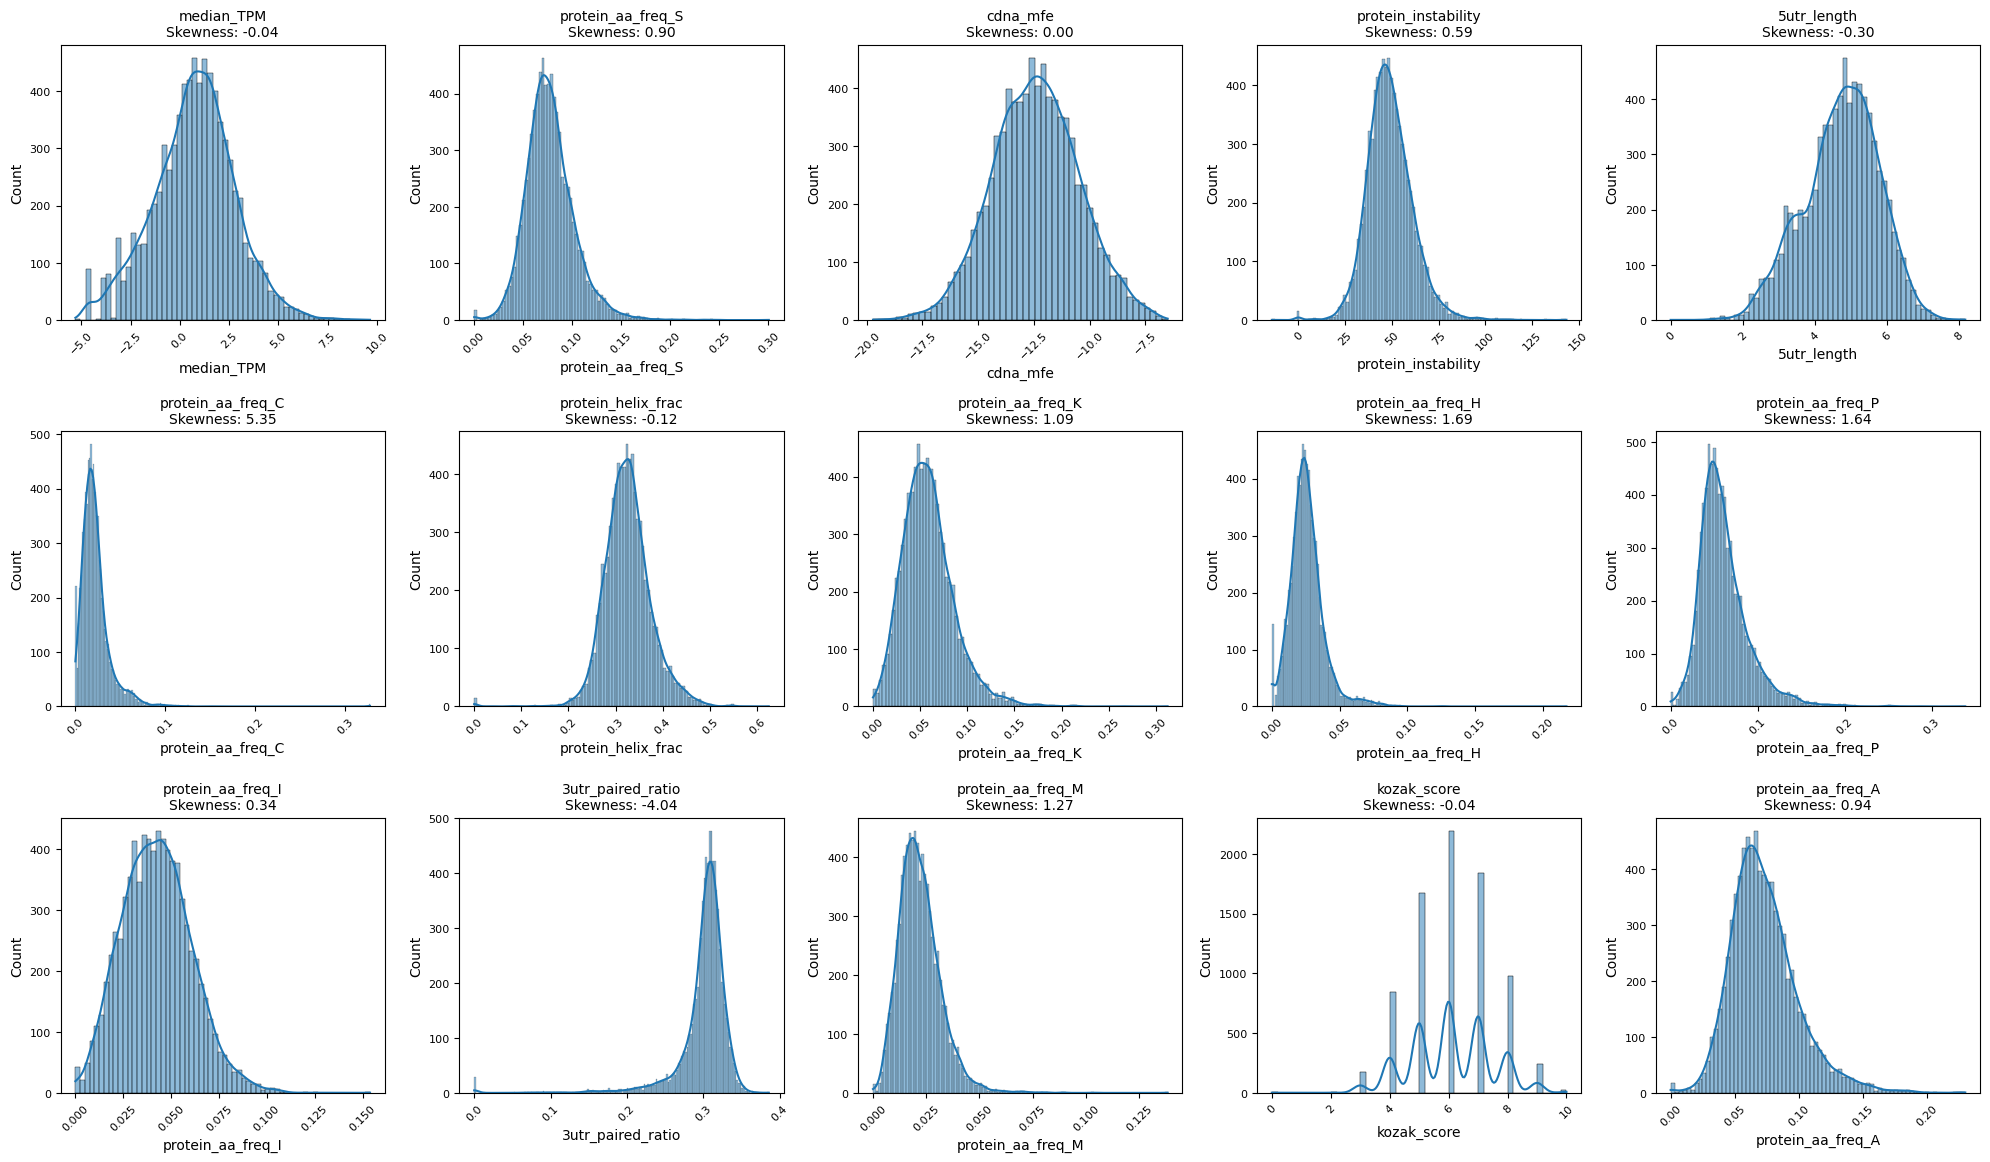


Features sorted by absolute skewness:
protein_aa_freq_C: 5.35
3utr_paired_ratio: -4.04
protein_aa_freq_H: 1.69
protein_aa_freq_P: 1.64
protein_aa_freq_M: 1.27
protein_aa_freq_K: 1.09
protein_aa_freq_A: 0.94
protein_aa_freq_S: 0.90
protein_instability: 0.59
protein_aa_freq_I: 0.34
5utr_length: -0.30
protein_helix_frac: -0.12
median_TPM: -0.04
kozak_score: -0.04
cdna_mfe: 0.00


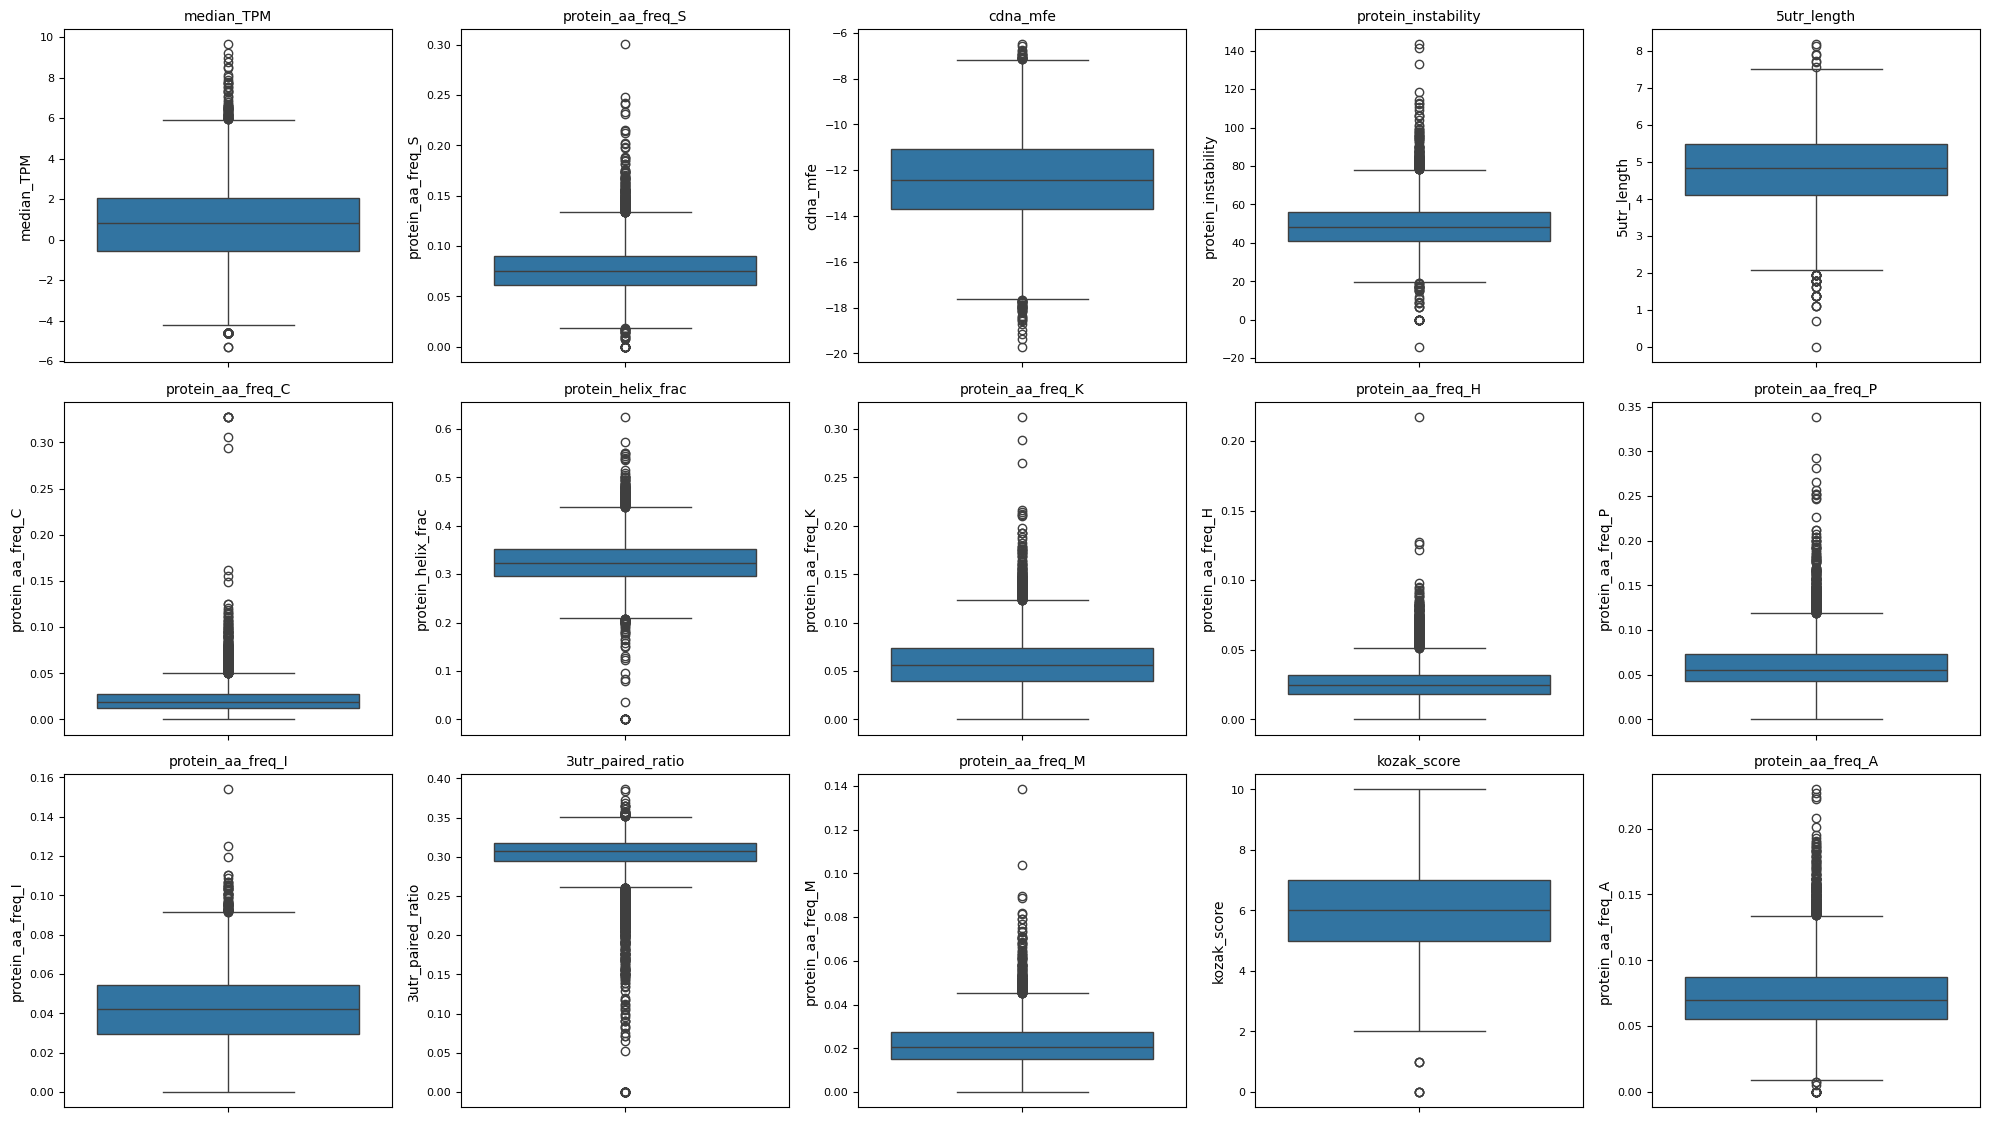


Summary statistics for top 20 features:
        median_TPM  protein_aa_freq_S     cdna_mfe  protein_instability  \
count  7987.000000        7987.000000  7987.000000          7987.000000   
mean      0.732692           0.077403   -12.400364            48.976540   
std       2.058847           0.024609     1.937091            12.130542   
min      -5.298317           0.000000   -19.715363           -14.171429   
25%      -0.562119           0.061673   -13.714877            41.188099   
50%       0.810930           0.075117   -12.419573            48.038678   
75%       2.044462           0.090361   -11.092448            55.921996   
max       9.645844           0.300353    -6.501720           143.438065   

       5utr_length  protein_aa_freq_C  protein_helix_frac  protein_aa_freq_K  \
count  7987.000000        7987.000000         7987.000000        7987.000000   
mean      4.740100           0.022408            0.325764           0.058691   
std       1.036023           0.017837      

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

plt.figure(figsize=(20, 15))

for i, feature in enumerate(top_features, 1):
    plt.subplot(4, 5, i)
    
    skewness = skew(df_processed[feature].dropna())
    
    # Plot distribution
    sns.histplot(data=df_processed, x=feature, kde=True)
    plt.title(f'{feature}\nSkewness: {skewness:.2f}', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    
plt.tight_layout()
plt.show()

skewness_dict = {feature: skew(df_processed[feature].dropna()) for feature in top_features}
sorted_skewness = sorted(skewness_dict.items(), key=lambda x: abs(x[1]), reverse=True)
print("\nFeatures sorted by absolute skewness:")
for feature, skew_value in sorted_skewness:
    print(f"{feature}: {skew_value:.2f}")
plt.figure(figsize=(20, 15))

for i, feature in enumerate(top_features, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(data=df_processed, y=feature)
    plt.title(f'{feature}', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary statistics for top 20 features:")
print(df_processed[top_features].describe())

In [21]:
df_processed["protein_id"] = df_features["protein_id"]

In [22]:
df_processed_top15 = df_processed[top_features + ['protein_abundance', 'protein_id']]

df_processed_top15.to_csv("/Users/alvinthosatria/Documents/FYP/FYP/preprocessed_features.csv", index=False)

# Concatenate Features

In [23]:
import pandas as pd

gcn_embeddings = pd.read_csv("/Users/alvinthosatria/Documents/FYP/datasets/Sequence_Embeddings/mRNA_Sequence_Embeddings/GP-GCN/gcn_embeddings.csv")
helix_cds_embeddings = pd.read_csv("/Users/alvinthosatria/Documents/FYP/FYP/Sequence_Embeddings/mRNA_Sequence_Embeddings/Helix-mRNA/helix_mrna_cds_embeddings.csv")
helix_5utr_embeddings = pd.read_csv("/Users/alvinthosatria/Documents/FYP/FYP/Sequence_Embeddings/mRNA_Sequence_Embeddings/Helix-mRNA/helix_mrna_5utr_embeddings.csv")
esmfold_embeddings = pd.read_csv("/Users/alvinthosatria/Documents/FYP/FYP/Protein Embeddings/prot_structure_embeddings.csv")

esmfold_embeddings

protein_id  esm_struct_0  esm_struct_1  esm_struct_2  esm_struct_3  \
0     ENSP00000341562    -30.339296     161.44810      8.551032    109.653786   
1     ENSP00000290765    -25.924795     157.99734     15.109094    121.497110   
2     ENSP00000256996    -38.421730     170.78546      1.443236    129.371890   
3     ENSP00000262990    -35.767776     149.79140     -5.437623    104.054634   
4     ENSP00000371811    -43.951820     156.55717     -8.439772    166.367750   
...               ...           ...           ...           ...           ...   
7922  ENSP00000387111    -29.375383     166.09937      4.450039    154.551910   
7923  ENSP00000477037    -22.280827     156.67017     12.878185     79.170006   
7924  ENSP00000361601    -19.789640     175.59752     14.172749    113.968940   
7925  ENSP00000437563    -23.489197     163.24939      7.214988    113.044340   
7926  ENSP00000483386    -23.162554     153.75728     42.108204     87.562290   

      esm_struct_4  esm_struct_5  esm_struct_6  esm_struct_7  esm_struct_8  \
0        77.145620     244.73537     18.370490     10.792428    147.834270   
1        83.917550     229.83629     19.700169     -7.870297    138.211490   
2        79.849460     258.48782     41.645187     14.210868    171.443850   
3       101.680930     243.91458     17.355778      6.197966    140.250950   
4        67.150180     269.36540     41.070980     46.393850    141.216030   
...            ...           ...           ...           ...           ...   
7922     84.748000     247.24176     45.956493     24.669200    148.280300   
7923     96.562580     204.73734     -3.105280    -21.391514    138.729080   
7924     99.438340     231.92145     25.572590    -16.123810    147.308520   
7925     92.390370     226.75177     33.769570     -6.505032    144.809280   
7926    100.528275     231.52646      6.645471     22.539055    114.923256   

      ...  esm_struct_374  esm_struct_375  esm_struct_376  esm_struct_377  \
0     ...       73.373010       72.970220       12.923666       95.889725   
1     ...       68.257310       60.291650       23.755404      109.030050   
2     ...       83.333984       47.796707       10.249809      112.114845   
3     ...       59.012886       55.144268        7.491446      105.824670   
4     ...       81.520420       42.850110       15.061850       79.176130   
...   ...             ...             ...             ...             ...   
7922  ...       94.349370       39.558475       15.242528      100.747240   
7923  ...       51.830532       59.324120       30.624088      123.249660   
7924  ...       64.168470       45.525513       24.522259      143.840320   
7925  ...       65.185970       39.587590       18.869839      131.746340   
7926  ...       42.535934       87.393130       38.355625      104.246440   

      esm_struct_378  esm_struct_379  esm_struct_380  esm_struct_381  \
0          51.059320      101.878426       -2.101057      -19.723396   
1          71.852974       96.979670       -5.143823      -20.785597   
2          54.815975       92.964690       13.249508       -8.416548   
3         103.813060       96.018524      -12.567250      -28.538748   
4          45.563927       76.292450        5.719397      -26.815514   
...              ...             ...             ...             ...   
7922       57.486460      100.347270       -1.276820      -16.390427   
7923       99.794290       97.682200      -12.361734      -22.121212   
7924       93.089390      103.283690       14.964516      -21.808573   
7925       89.161100       96.740970        7.532156      -19.340000   
7926       67.665610      105.468254      -12.739622      -25.119190   

      esm_struct_382  esm_struct_383  
0         135.783810       213.12137  
1         135.948970       225.27715  
2         143.190410       230.09184  
3         109.231544       228.63722  
4         141.263870       236.35191  
...              ...             ...  
7922      160.627000       241.09315  

In [24]:
features_df = pd.DataFrame()
features_df["protein_id"] = df["protein_id"]
features_df["protein_abundance_log"] = df_processed["protein_abundance"]
features_df

protein_id  protein_abundance_log
0     ENSP00000341562              -2.688248
1     ENSP00000290765               4.043051
2     ENSP00000256996               0.920283
3     ENSP00000262990               0.916291
4     ENSP00000371811               0.916291
...               ...                    ...
7982  ENSP00000387111               0.009950
7983  ENSP00000477037              -0.525939
7984  ENSP00000361601              -3.506558
7985  ENSP00000437563              -2.282782
7986  ENSP00000483386              -4.605170

[7987 rows x 2 columns]

In [25]:
df_processed["protein_id"] = df_features["protein_id"]
merged_df = pd.merge(features_df, gcn_embeddings, on='protein_id', how='left')
merged_df = pd.merge(df_processed[top_features + ["protein_id"]], merged_df, on="protein_id", how="left")
merged_df = pd.merge(merged_df, helix_cds_embeddings.drop("mrna_id", axis=1), on="protein_id", how="left")
merged_df = pd.merge(merged_df, esmfold_embeddings, on="protein_id", how="left")
merged_df  = merged_df.dropna()
merged_df = merged_df.drop(["protein_id", "mrna_id"], axis=1)
# merged_df.to_csv("fused_features_set.csv", index=False)
list(merged_df.columns)

['median_TPM',
 'protein_aa_freq_S',
 'cdna_mfe',
 'protein_instability',
 '5utr_length',
 'protein_aa_freq_C',
 'protein_helix_frac',
 'protein_aa_freq_K',
 'protein_aa_freq_H',
 'protein_aa_freq_P',
 'protein_aa_freq_I',
 '3utr_paired_ratio',
 'protein_aa_freq_M',
 'kozak_score',
 'protein_aa_freq_A',
 'protein_abundance_log',
 'emb_0',
 'emb_1',
 'emb_2',
 'emb_3',
 'emb_4',
 'emb_5',
 'emb_6',
 'emb_7',
 'emb_8',
 'emb_9',
 'emb_10',
 'emb_11',
 'emb_12',
 'emb_13',
 'emb_14',
 'emb_15',
 'emb_16',
 'emb_17',
 'emb_18',
 'emb_19',
 'emb_20',
 'emb_21',
 'emb_22',
 'emb_23',
 'emb_24',
 'emb_25',
 'emb_26',
 'emb_27',
 'emb_28',
 'emb_29',
 'emb_30',
 'emb_31',
 'emb_32',
 'emb_33',
 'emb_34',
 'emb_35',
 'emb_36',
 'emb_37',
 'emb_38',
 'emb_39',
 'emb_40',
 'emb_41',
 'emb_42',
 'emb_43',
 'emb_44',
 'emb_45',
 'emb_46',
 'emb_47',
 'emb_48',
 'emb_49',
 'emb_50',
 'emb_51',
 'emb_52',
 'emb_53',
 'emb_54',
 'emb_55',
 'emb_56',
 'emb_57',
 'emb_58',
 'emb_59',
 'emb_60',
 'emb_61

# CSV TO Mongo

In [134]:
pip install "pymongo[srv]"

DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.12/site-packages/torch_scatter-2.1.2-py3.12-macosx-11.0-arm64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pymongo import MongoClient
import pandas as pd
import csv

client = MongoClient(MONGO_CLIENT_URL)
db = client['FYP']
fused_features_set_collection = db['fused_features_set']
cleaned_protein_transcript_liver_set_collection = db['cleaned_protein_transcript_liver_set']

def create_appropriate_indexes(columns, collection):
    if 'protein_id' in columns and 'mrna_id' in columns:
        collection.create_index([("protein_id", 1), ("mrna_id", 1)], unique=True)
    elif 'protein_id' in columns:
        collection.create_index("protein_id", unique=True)
    elif 'mrna_id' in columns:
        collection.create_index("mrna_id", unique=True)

def csv_to_mongodb(csv_file, collection):
    df = pd.read_csv(csv_file)
    
    create_appropriate_indexes(df.columns, collection)
    
    records = df.to_dict('records')
    
    try:
        collection.insert_many(records, ordered=False)
    except Exception as e:
        print(f"Some documents may be duplicates: {e}")

try:
    csv_to_mongodb('/Users/alvinthosatria/Documents/FYP/datasets/fused_features_set.csv', collection=fused_features_set_collection)
    csv_to_mongodb('/Users/alvinthosatria/Documents/FYP/datasets/cleaned_liver_data_cdna.csv', collection=cleaned_protein_transcript_liver_set_collection)
    print("Data imported successfully")
except Exception as e:
    print(f"Error occurred: {e}")

Data imported successfully


# Models

# Linear Regression


10-Fold Cross Validation RMSE: 2.41 (+/- 0.10)
10-Fold Cross Validation RMSE (%): 895.40%


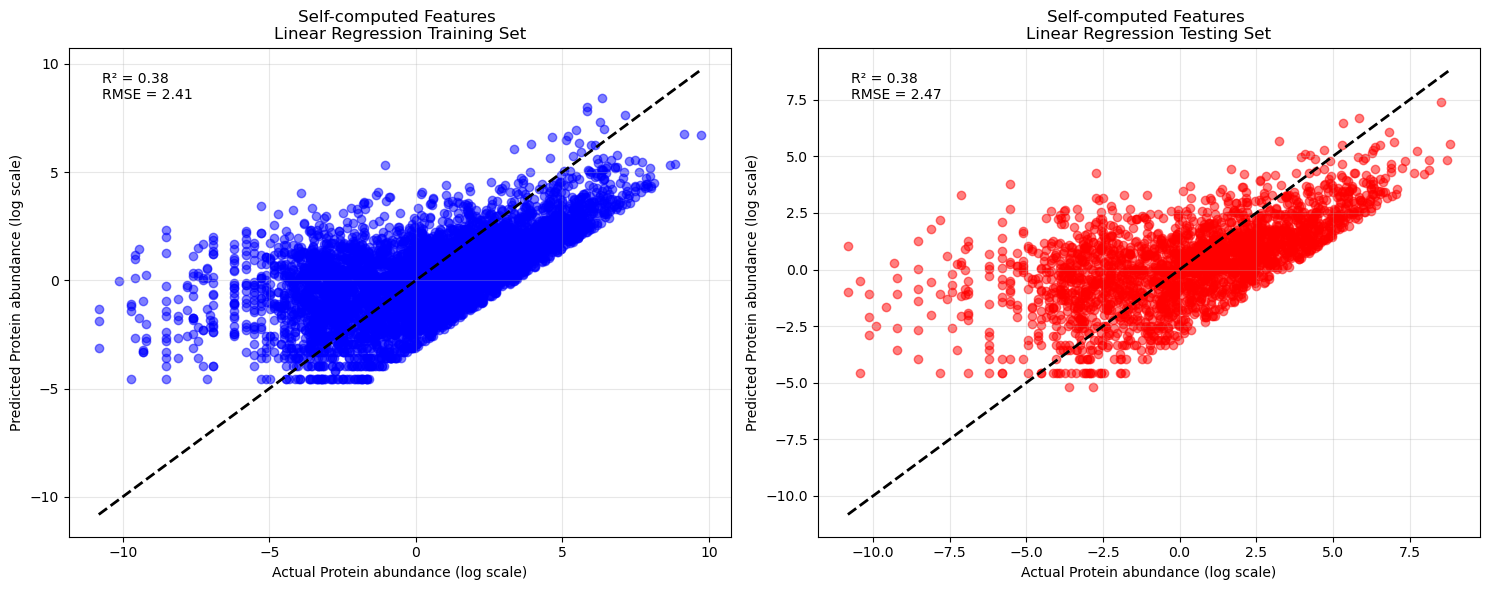


Model Parameters:
Coefficient: 1.8807
Intercept: 0.2694


In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

X = merged_df["median_TPM"].values.reshape(-1, 1)
y = merged_df["protein_abundance_log"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

cv_scores = cross_val_score(
    lr_model, X_train_scaled, y_train, cv=10, scoring="neg_root_mean_squared_error"
)
cv_mean = -cv_scores.mean()
cv_std = cv_scores.std() * 2
cv_rmse_pct = (cv_mean / np.mean(y_train)) * 100

print(
    f"\n10-Fold Cross Validation RMSE: {-cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})"
)
print(f"10-Fold Cross Validation RMSE (%): {cv_rmse_pct:.2f}%")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


def plot_predictions(ax, y_true, y_pred, title, color):
    ax.scatter(y_true, y_pred, alpha=0.5, color=color)

    min_val = min(y_true)
    max_val = max(y_true)
    ax.plot([min_val, max_val], [min_val, max_val], "k--", lw=2)

    ax.set_xlabel("Actual Protein abundance (log scale)")
    ax.set_ylabel("Predicted Protein abundance (log scale)")
    ax.set_title(f"Self-computed Features \n{title}")
    ax.grid(True, alpha=0.3)

    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    ax.text(
        0.05,
        0.95,
        f"R² = {r2:.2f}\nRMSE = {rmse:.2f}",
        transform=ax.transAxes,
        verticalalignment="top",
    )


plot_predictions(ax1, y_train, y_train_pred, "Linear Regression Training Set", "blue")
plot_predictions(ax2, y_test, y_test_pred, "Linear Regression Testing Set", "red")

plt.tight_layout()
plt.show()

print("\nModel Parameters:")
print(f"Coefficient: {lr_model.coef_[0]:.4f}")
print(f"Intercept: {lr_model.intercept_:.4f}")

# Multi Linear Regression


10-Fold Cross Validation RMSE: 2.28 (+/- 0.14)
10-Fold Cross Validation RMSE (%): 847.44%


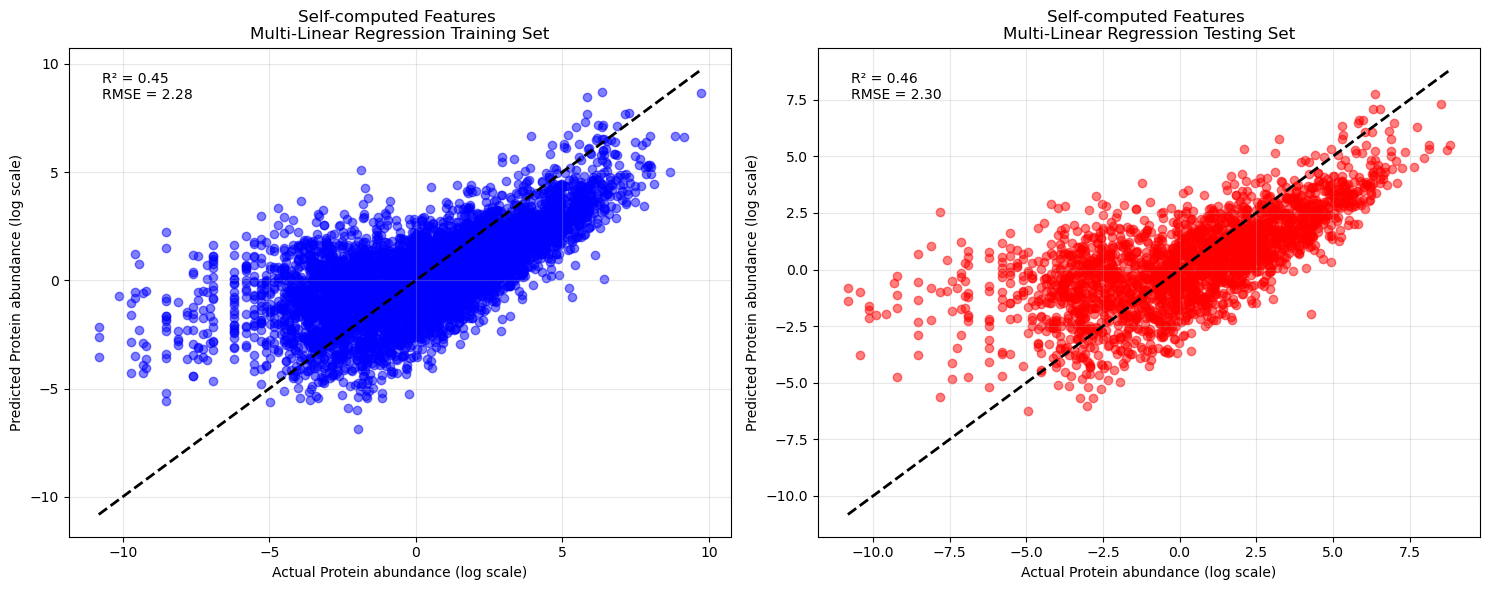


Model Parameters:
Coefficient: 1.7140
Intercept: 0.2694


In [111]:
import os
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


def set_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)

set_seeds(42)

X = merged_df[top_features]
y = merged_df["protein_abundance_log"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

cv_scores = cross_val_score(
    lr_model, X_train_scaled, y_train, cv=10, scoring="neg_root_mean_squared_error"
)
cv_mean = -cv_scores.mean()
cv_std = cv_scores.std() * 2
cv_rmse_pct = (cv_mean / np.mean(y_train)) * 100

print(
    f"\n10-Fold Cross Validation RMSE: {-cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})"
)
print(f"10-Fold Cross Validation RMSE (%): {cv_rmse_pct:.2f}%")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


def plot_predictions(ax, y_true, y_pred, title, color):
    ax.scatter(y_true, y_pred, alpha=0.5, color=color)

    min_val = min(y_true)
    max_val = max(y_true)
    ax.plot([min_val, max_val], [min_val, max_val], "k--", lw=2)

    ax.set_xlabel("Actual Protein abundance (log scale)")
    ax.set_ylabel("Predicted Protein abundance (log scale)")
    ax.set_title(f"Self-computed Features \n{title}")
    ax.grid(True, alpha=0.3)

    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    ax.text(
        0.05,
        0.95,
        f"R² = {r2:.2f}\nRMSE = {rmse:.2f}",
        transform=ax.transAxes,
        verticalalignment="top",
    )


plot_predictions(ax1, y_train, y_train_pred, "Multi-Linear Regression Training Set", "blue")
plot_predictions(ax2, y_test, y_test_pred, "Multi-Linear Regression Testing Set", "red")

plt.tight_layout()
plt.show()

print("\nModel Parameters:")
print(f"Coefficient: {lr_model.coef_[0]:.4f}")
print(f"Intercept: {lr_model.intercept_:.4f}")

# Random Forest Regressor

## Optuna Param Tuning

In [112]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = merged_df[top_features]
y = merged_df["protein_abundance_log"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=100),
        "max_depth": trial.suggest_categorical("max_depth", [10, 20, 30, 40, 50, None]),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 30),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 15),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        'max_samples': trial.suggest_float('max_samples', 0.5, 1.0)
    }

    model = RandomForestRegressor(**params, random_state=42, n_jobs=-1)

    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    r2_diff = train_r2 - test_r2

    # Print trial information
    print(f"\nTrial {trial.number}:")
    print(f"Parameters: {params}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"R² difference: {r2_diff:.4f}")

    penalty = 0
    if r2_diff >= 0.15:
        penalty = r2_diff - 0.15  # Penalty proportional to excess overfitting
        print(f"Overfitting detected! Applying penalty: {penalty:.4f}")

    penalized_test_r2 = test_r2 - penalty
    print(f"Penalized Test R²: {penalized_test_r2:.4f}")
    
    return penalized_test_r2


study = optuna.create_study(direction="maximize")

def print_progress(study, trial):
    print(f"\nBest trial so far: {study.best_trial.number}")
    print(f"Best penalized R² score so far: {study.best_value:.4f}")
    print(f"Best parameters so far: {study.best_params}")


print("Starting hyperparameter optimization...")
n_trials = 250
study.optimize(objective, n_trials=n_trials, callbacks=[print_progress])

print("\nOptimization completed!")
print(f"Best penalized R² score: {study.best_value:.4f}")
print("Best hyperparameters:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

try:
    import optuna.visualization as vis
    import matplotlib.pyplot as plt

    fig1 = vis.plot_optimization_history(study)
    fig1.show()

    fig2 = vis.plot_param_importances(study)
    fig2.show()
except ImportError:
    print(
        "Optuna visualization is not available. Install optuna[visualization] to see plots."
    )

[I 2025-03-31 16:24:21,508] A new study created in memory with name: no-name-5e60a452-d1cf-4178-a56f-fa846afdb866


Starting hyperparameter optimization...


[I 2025-03-31 16:24:21,887] Trial 0 finished with value: 0.3183261102513304 and parameters: {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.9255278145853432}. Best is trial 0 with value: 0.3183261102513304.



Trial 0:
Parameters: {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.9255278145853432}
Train R²: 0.7979
Test R²: 0.4831
R² difference: 0.3148
Overfitting detected! Applying penalty: 0.1648
Penalized Test R²: 0.3183

Best trial so far: 0
Best penalized R² score so far: 0.3183
Best parameters so far: {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.9255278145853432}


[I 2025-03-31 16:24:22,697] Trial 1 finished with value: 0.46865538109492 and parameters: {'n_estimators': 700, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 12, 'max_features': 'log2', 'max_samples': 0.9611678536858449}. Best is trial 1 with value: 0.46865538109492.



Trial 1:
Parameters: {'n_estimators': 700, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 12, 'max_features': 'log2', 'max_samples': 0.9611678536858449}
Train R²: 0.6067
Test R²: 0.4687
R² difference: 0.1381
Penalized Test R²: 0.4687

Best trial so far: 1
Best penalized R² score so far: 0.4687
Best parameters so far: {'n_estimators': 700, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 12, 'max_features': 'log2', 'max_samples': 0.9611678536858449}


[I 2025-03-31 16:24:23,626] Trial 2 finished with value: 0.3615811844412048 and parameters: {'n_estimators': 900, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_samples': 0.5286149369724413}. Best is trial 1 with value: 0.46865538109492.



Trial 2:
Parameters: {'n_estimators': 900, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_samples': 0.5286149369724413}
Train R²: 0.7550
Test R²: 0.4833
R² difference: 0.2717
Overfitting detected! Applying penalty: 0.1217
Penalized Test R²: 0.3616

Best trial so far: 1
Best penalized R² score so far: 0.4687
Best parameters so far: {'n_estimators': 700, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 12, 'max_features': 'log2', 'max_samples': 0.9611678536858449}


[I 2025-03-31 16:24:24,129] Trial 3 finished with value: 0.46883683389714426 and parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_samples': 0.6880606579266051}. Best is trial 3 with value: 0.46883683389714426.



Trial 3:
Parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_samples': 0.6880606579266051}
Train R²: 0.5998
Test R²: 0.4688
R² difference: 0.1309
Penalized Test R²: 0.4688

Best trial so far: 3
Best penalized R² score so far: 0.4688
Best parameters so far: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_samples': 0.6880606579266051}


[I 2025-03-31 16:24:24,994] Trial 4 finished with value: 0.465364281656953 and parameters: {'n_estimators': 900, 'max_depth': None, 'min_samples_split': 27, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.6476086302054322}. Best is trial 3 with value: 0.46883683389714426.



Trial 4:
Parameters: {'n_estimators': 900, 'max_depth': None, 'min_samples_split': 27, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.6476086302054322}
Train R²: 0.6275
Test R²: 0.4715
R² difference: 0.1561
Overfitting detected! Applying penalty: 0.0061
Penalized Test R²: 0.4654

Best trial so far: 3
Best penalized R² score so far: 0.4688
Best parameters so far: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_samples': 0.6880606579266051}


[I 2025-03-31 16:24:25,363] Trial 5 finished with value: 0.4608639773140898 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 21, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_samples': 0.6759250836957476}. Best is trial 3 with value: 0.46883683389714426.



Trial 5:
Parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 21, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_samples': 0.6759250836957476}
Train R²: 0.5757
Test R²: 0.4609
R² difference: 0.1148
Penalized Test R²: 0.4609

Best trial so far: 3
Best penalized R² score so far: 0.4688
Best parameters so far: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_samples': 0.6880606579266051}


[I 2025-03-31 16:24:26,206] Trial 6 finished with value: 0.4712953133114183 and parameters: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.9704130928124077}. Best is trial 6 with value: 0.4712953133114183.



Trial 6:
Parameters: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.9704130928124077}
Train R²: 0.6192
Test R²: 0.4713
R² difference: 0.1479
Penalized Test R²: 0.4713

Best trial so far: 6
Best penalized R² score so far: 0.4713
Best parameters so far: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.9704130928124077}


[I 2025-03-31 16:24:26,553] Trial 7 finished with value: 0.46498706699495673 and parameters: {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 12, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_samples': 0.8083045154564623}. Best is trial 6 with value: 0.4712953133114183.



Trial 7:
Parameters: {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 12, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_samples': 0.8083045154564623}
Train R²: 0.6254
Test R²: 0.4702
R² difference: 0.1552
Overfitting detected! Applying penalty: 0.0052
Penalized Test R²: 0.4650

Best trial so far: 6
Best penalized R² score so far: 0.4713
Best parameters so far: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.9704130928124077}


[I 2025-03-31 16:24:27,508] Trial 8 finished with value: 0.352629551664836 and parameters: {'n_estimators': 800, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.9192006161319972}. Best is trial 6 with value: 0.4712953133114183.



Trial 8:
Parameters: {'n_estimators': 800, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.9192006161319972}
Train R²: 0.7633
Test R²: 0.4830
R² difference: 0.2803
Overfitting detected! Applying penalty: 0.1303
Penalized Test R²: 0.3526

Best trial so far: 6
Best penalized R² score so far: 0.4713
Best parameters so far: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.9704130928124077}


[I 2025-03-31 16:24:27,917] Trial 9 finished with value: 0.4628219139159676 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 15, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_samples': 0.8890671511154427}. Best is trial 6 with value: 0.4712953133114183.



Trial 9:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 15, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_samples': 0.8890671511154427}
Train R²: 0.6374
Test R²: 0.4751
R² difference: 0.1623
Overfitting detected! Applying penalty: 0.0123
Penalized Test R²: 0.4628

Best trial so far: 6
Best penalized R² score so far: 0.4713
Best parameters so far: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.9704130928124077}


[I 2025-03-31 16:24:28,515] Trial 10 finished with value: 0.4624928014163824 and parameters: {'n_estimators': 600, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': 'log2', 'max_samples': 0.8093429944937612}. Best is trial 6 with value: 0.4712953133114183.



Trial 10:
Parameters: {'n_estimators': 600, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': 'log2', 'max_samples': 0.8093429944937612}
Train R²: 0.5667
Test R²: 0.4625
R² difference: 0.1042
Penalized Test R²: 0.4625

Best trial so far: 6
Best penalized R² score so far: 0.4713
Best parameters so far: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.9704130928124077}


[I 2025-03-31 16:24:29,065] Trial 11 finished with value: 0.4639995623364441 and parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 12, 'max_features': 'log2', 'max_samples': 0.6887786000312899}. Best is trial 6 with value: 0.4712953133114183.



Trial 11:
Parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 12, 'max_features': 'log2', 'max_samples': 0.6887786000312899}
Train R²: 0.5763
Test R²: 0.4640
R² difference: 0.1123
Penalized Test R²: 0.4640

Best trial so far: 6
Best penalized R² score so far: 0.4713
Best parameters so far: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.9704130928124077}


[I 2025-03-31 16:24:30,143] Trial 12 finished with value: 0.47018637691946263 and parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5696179990497063}. Best is trial 6 with value: 0.4712953133114183.



Trial 12:
Parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5696179990497063}
Train R²: 0.6036
Test R²: 0.4702
R² difference: 0.1334
Penalized Test R²: 0.4702

Best trial so far: 6
Best penalized R² score so far: 0.4713
Best parameters so far: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.9704130928124077}


[I 2025-03-31 16:24:31,066] Trial 13 finished with value: 0.4650260655965631 and parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 29, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5287940623451743}. Best is trial 6 with value: 0.4712953133114183.



Trial 13:
Parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 29, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5287940623451743}
Train R²: 0.5713
Test R²: 0.4650
R² difference: 0.1063
Penalized Test R²: 0.4650

Best trial so far: 6
Best penalized R² score so far: 0.4713
Best parameters so far: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.9704130928124077}


[I 2025-03-31 16:24:32,066] Trial 14 finished with value: 0.4710453164617836 and parameters: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6162649778787399}. Best is trial 6 with value: 0.4712953133114183.



Trial 14:
Parameters: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6162649778787399}
Train R²: 0.6197
Test R²: 0.4710
R² difference: 0.1486
Penalized Test R²: 0.4710

Best trial so far: 6
Best penalized R² score so far: 0.4713
Best parameters so far: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.9704130928124077}


[I 2025-03-31 16:24:32,695] Trial 15 finished with value: 0.46146333928607075 and parameters: {'n_estimators': 700, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 13, 'max_features': 'log2', 'max_samples': 0.6043812865230705}. Best is trial 6 with value: 0.4712953133114183.



Trial 15:
Parameters: {'n_estimators': 700, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 13, 'max_features': 'log2', 'max_samples': 0.6043812865230705}
Train R²: 0.5566
Test R²: 0.4615
R² difference: 0.0951
Penalized Test R²: 0.4615

Best trial so far: 6
Best penalized R² score so far: 0.4713
Best parameters so far: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.9704130928124077}


[I 2025-03-31 16:24:33,515] Trial 16 finished with value: 0.44827692379770434 and parameters: {'n_estimators': 800, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.7571267347668724}. Best is trial 6 with value: 0.4712953133114183.



Trial 16:
Parameters: {'n_estimators': 800, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.7571267347668724}
Train R²: 0.6546
Test R²: 0.4764
R² difference: 0.1781
Overfitting detected! Applying penalty: 0.0281
Penalized Test R²: 0.4483

Best trial so far: 6
Best penalized R² score so far: 0.4713
Best parameters so far: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.9704130928124077}


[I 2025-03-31 16:24:34,431] Trial 17 finished with value: 0.46596276441067186 and parameters: {'n_estimators': 900, 'max_depth': 10, 'min_samples_split': 18, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.9975968152748481}. Best is trial 6 with value: 0.4712953133114183.



Trial 17:
Parameters: {'n_estimators': 900, 'max_depth': 10, 'min_samples_split': 18, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.9975968152748481}
Train R²: 0.5937
Test R²: 0.4660
R² difference: 0.1277
Penalized Test R²: 0.4660

Best trial so far: 6
Best penalized R² score so far: 0.4713
Best parameters so far: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.9704130928124077}


[I 2025-03-31 16:24:35,186] Trial 18 finished with value: 0.38801540012252655 and parameters: {'n_estimators': 700, 'max_depth': 20, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.8532981528804148}. Best is trial 6 with value: 0.4712953133114183.



Trial 18:
Parameters: {'n_estimators': 700, 'max_depth': 20, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.8532981528804148}
Train R²: 0.7208
Test R²: 0.4794
R² difference: 0.2414
Overfitting detected! Applying penalty: 0.0914
Penalized Test R²: 0.3880

Best trial so far: 6
Best penalized R² score so far: 0.4713
Best parameters so far: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.9704130928124077}


[I 2025-03-31 16:24:36,197] Trial 19 finished with value: 0.4613733752175738 and parameters: {'n_estimators': 1000, 'max_depth': 30, 'min_samples_split': 25, 'min_samples_leaf': 15, 'max_features': 'log2', 'max_samples': 0.7429873340164052}. Best is trial 6 with value: 0.4712953133114183.



Trial 19:
Parameters: {'n_estimators': 1000, 'max_depth': 30, 'min_samples_split': 25, 'min_samples_leaf': 15, 'max_features': 'log2', 'max_samples': 0.7429873340164052}
Train R²: 0.5595
Test R²: 0.4614
R² difference: 0.0981
Penalized Test R²: 0.4614

Best trial so far: 6
Best penalized R² score so far: 0.4713
Best parameters so far: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.9704130928124077}


[I 2025-03-31 16:24:36,992] Trial 20 finished with value: 0.428613094412839 and parameters: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.6050645700428832}. Best is trial 6 with value: 0.4712953133114183.



Trial 20:
Parameters: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.6050645700428832}
Train R²: 0.6738
Test R²: 0.4762
R² difference: 0.1976
Overfitting detected! Applying penalty: 0.0476
Penalized Test R²: 0.4286

Best trial so far: 6
Best penalized R² score so far: 0.4713
Best parameters so far: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.9704130928124077}


[I 2025-03-31 16:24:37,924] Trial 21 finished with value: 0.47173713262366057 and parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}. Best is trial 21 with value: 0.47173713262366057.



Trial 21:
Parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}
Train R²: 0.6138
Test R²: 0.4717
R² difference: 0.1420
Penalized Test R²: 0.4717

Best trial so far: 21
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}


[I 2025-03-31 16:24:38,846] Trial 22 finished with value: 0.4701512979019551 and parameters: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.5839615065222585}. Best is trial 21 with value: 0.47173713262366057.



Trial 22:
Parameters: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.5839615065222585}
Train R²: 0.6065
Test R²: 0.4702
R² difference: 0.1364
Penalized Test R²: 0.4702

Best trial so far: 21
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}


[I 2025-03-31 16:24:39,685] Trial 23 finished with value: 0.470792639820071 and parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5009068512343887}. Best is trial 21 with value: 0.47173713262366057.



Trial 23:
Parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5009068512343887}
Train R²: 0.6040
Test R²: 0.4708
R² difference: 0.1332
Penalized Test R²: 0.4708

Best trial so far: 21
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}


[I 2025-03-31 16:24:40,421] Trial 24 finished with value: 0.4614501180013514 and parameters: {'n_estimators': 800, 'max_depth': 10, 'min_samples_split': 14, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.6383920903490017}. Best is trial 21 with value: 0.47173713262366057.



Trial 24:
Parameters: {'n_estimators': 800, 'max_depth': 10, 'min_samples_split': 14, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.6383920903490017}
Train R²: 0.5632
Test R²: 0.4615
R² difference: 0.1018
Penalized Test R²: 0.4615

Best trial so far: 21
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}


[I 2025-03-31 16:24:41,440] Trial 25 finished with value: 0.4506542457629442 and parameters: {'n_estimators': 1000, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.733014090777263}. Best is trial 21 with value: 0.47173713262366057.



Trial 25:
Parameters: {'n_estimators': 1000, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.733014090777263}
Train R²: 0.6504
Test R²: 0.4755
R² difference: 0.1749
Overfitting detected! Applying penalty: 0.0249
Penalized Test R²: 0.4507

Best trial so far: 21
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}


[I 2025-03-31 16:24:42,246] Trial 26 finished with value: 0.46614953942091575 and parameters: {'n_estimators': 900, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_samples': 0.5581210778336089}. Best is trial 21 with value: 0.47173713262366057.



Trial 26:
Parameters: {'n_estimators': 900, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_samples': 0.5581210778336089}
Train R²: 0.5792
Test R²: 0.4661
R² difference: 0.1130
Penalized Test R²: 0.4661

Best trial so far: 21
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}


[I 2025-03-31 16:24:42,819] Trial 27 finished with value: 0.4660315860143994 and parameters: {'n_estimators': 600, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_samples': 0.6418504392142848}. Best is trial 21 with value: 0.47173713262366057.



Trial 27:
Parameters: {'n_estimators': 600, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_samples': 0.6418504392142848}
Train R²: 0.5904
Test R²: 0.4660
R² difference: 0.1244
Penalized Test R²: 0.4660

Best trial so far: 21
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}


[I 2025-03-31 16:24:43,718] Trial 28 finished with value: 0.4437169232448167 and parameters: {'n_estimators': 900, 'max_depth': 30, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.7937288404872087}. Best is trial 21 with value: 0.47173713262366057.



Trial 28:
Parameters: {'n_estimators': 900, 'max_depth': 30, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.7937288404872087}
Train R²: 0.6569
Test R²: 0.4753
R² difference: 0.1816
Overfitting detected! Applying penalty: 0.0316
Penalized Test R²: 0.4437

Best trial so far: 21
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}


[I 2025-03-31 16:24:44,813] Trial 29 finished with value: 0.3594119189609356 and parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.8535675579555888}. Best is trial 21 with value: 0.47173713262366057.
[I 2025-03-31 16:24:44,942] Trial 30 finished with value: 0.456488879874984 and parameters: {'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 26, 'min_samples_leaf': 14, 'max_features': 'log2', 'max_samples': 0.7031314430101269}. Best is trial 21 with value: 0.47173713262366057.



Trial 29:
Parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.8535675579555888}
Train R²: 0.7552
Test R²: 0.4823
R² difference: 0.2729
Overfitting detected! Applying penalty: 0.1229
Penalized Test R²: 0.3594

Best trial so far: 21
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}

Trial 30:
Parameters: {'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 26, 'min_samples_leaf': 14, 'max_features': 'log2', 'max_samples': 0.7031314430101269}
Train R²: 0.5574
Test R²: 0.4565
R² difference: 0.1009
Penalized Test R²: 0.4565

Best trial so far: 21
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.580

[I 2025-03-31 16:24:45,818] Trial 31 finished with value: 0.47163712391258006 and parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5009467775628292}. Best is trial 21 with value: 0.47173713262366057.



Trial 31:
Parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5009467775628292}
Train R²: 0.6097
Test R²: 0.4716
R² difference: 0.1381
Penalized Test R²: 0.4716

Best trial so far: 21
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}


[I 2025-03-31 16:24:46,462] Trial 32 finished with value: 0.47148583358629526 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5185626003488252}. Best is trial 21 with value: 0.47173713262366057.



Trial 32:
Parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5185626003488252}
Train R²: 0.6171
Test R²: 0.4715
R² difference: 0.1456
Penalized Test R²: 0.4715

Best trial so far: 21
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}


[I 2025-03-31 16:24:47,127] Trial 33 finished with value: 0.45062842625044885 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 14, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5100588673858834}. Best is trial 21 with value: 0.47173713262366057.



Trial 33:
Parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 14, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5100588673858834}
Train R²: 0.6514
Test R²: 0.4760
R² difference: 0.1754
Overfitting detected! Applying penalty: 0.0254
Penalized Test R²: 0.4506

Best trial so far: 21
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}


[I 2025-03-31 16:24:47,945] Trial 34 finished with value: 0.46796810510699827 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 16, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5411033361160739}. Best is trial 21 with value: 0.47173713262366057.



Trial 34:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 16, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5411033361160739}
Train R²: 0.6255
Test R²: 0.4717
R² difference: 0.1538
Overfitting detected! Applying penalty: 0.0038
Penalized Test R²: 0.4680

Best trial so far: 21
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}


[I 2025-03-31 16:24:48,654] Trial 35 finished with value: 0.38285090941905875 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_samples': 0.5579085399073682}. Best is trial 21 with value: 0.47173713262366057.



Trial 35:
Parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_samples': 0.5579085399073682}
Train R²: 0.7305
Test R²: 0.4817
R² difference: 0.2488
Overfitting detected! Applying penalty: 0.0988
Penalized Test R²: 0.3829

Best trial so far: 21
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}


[I 2025-03-31 16:24:49,187] Trial 36 finished with value: 0.47081295672323753 and parameters: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5003041310474852}. Best is trial 21 with value: 0.47173713262366057.



Trial 36:
Parameters: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5003041310474852}
Train R²: 0.5927
Test R²: 0.4708
R² difference: 0.1219
Penalized Test R²: 0.4708

Best trial so far: 21
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}


[I 2025-03-31 16:24:50,051] Trial 37 finished with value: 0.4359604987325014 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 14, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_samples': 0.9759809911593145}. Best is trial 21 with value: 0.47173713262366057.



Trial 37:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 14, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_samples': 0.9759809911593145}
Train R²: 0.6638
Test R²: 0.4749
R² difference: 0.1889
Overfitting detected! Applying penalty: 0.0389
Penalized Test R²: 0.4360

Best trial so far: 21
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}


[I 2025-03-31 16:24:51,020] Trial 38 finished with value: 0.35675869230696844 and parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5332715091365771}. Best is trial 21 with value: 0.47173713262366057.



Trial 38:
Parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5332715091365771}
Train R²: 0.7569
Test R²: 0.4818
R² difference: 0.2751
Overfitting detected! Applying penalty: 0.1251
Penalized Test R²: 0.3568

Best trial so far: 21
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}


[I 2025-03-31 16:24:51,583] Trial 39 finished with value: 0.4611921254274627 and parameters: {'n_estimators': 500, 'max_depth': None, 'min_samples_split': 16, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5881385756297224}. Best is trial 21 with value: 0.47173713262366057.



Trial 39:
Parameters: {'n_estimators': 500, 'max_depth': None, 'min_samples_split': 16, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5881385756297224}
Train R²: 0.6357
Test R²: 0.4735
R² difference: 0.1623
Overfitting detected! Applying penalty: 0.0123
Penalized Test R²: 0.4612

Best trial so far: 21
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}


[I 2025-03-31 16:24:52,396] Trial 40 finished with value: 0.4541788024084016 and parameters: {'n_estimators': 700, 'max_depth': 30, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.6578482976900331}. Best is trial 21 with value: 0.47173713262366057.



Trial 40:
Parameters: {'n_estimators': 700, 'max_depth': 30, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.6578482976900331}
Train R²: 0.6455
Test R²: 0.4748
R² difference: 0.1706
Overfitting detected! Applying penalty: 0.0206
Penalized Test R²: 0.4542

Best trial so far: 21
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5806246145046589}


[I 2025-03-31 16:24:53,379] Trial 41 finished with value: 0.47184934395133304 and parameters: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}. Best is trial 41 with value: 0.47184934395133304.



Trial 41:
Parameters: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}
Train R²: 0.6227
Test R²: 0.4723
R² difference: 0.1504
Overfitting detected! Applying penalty: 0.0004
Penalized Test R²: 0.4718

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:24:54,434] Trial 42 finished with value: 0.43902284283328763 and parameters: {'n_estimators': 900, 'max_depth': 50, 'min_samples_split': 18, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.9382766013685233}. Best is trial 41 with value: 0.47184934395133304.



Trial 42:
Parameters: {'n_estimators': 900, 'max_depth': 50, 'min_samples_split': 18, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.9382766013685233}
Train R²: 0.6615
Test R²: 0.4753
R² difference: 0.1862
Overfitting detected! Applying penalty: 0.0362
Penalized Test R²: 0.4390

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:24:55,236] Trial 43 finished with value: 0.46090566392100685 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 16, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5481678240159491}. Best is trial 41 with value: 0.47184934395133304.



Trial 43:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 16, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5481678240159491}
Train R²: 0.6371
Test R²: 0.4740
R² difference: 0.1631
Overfitting detected! Applying penalty: 0.0131
Penalized Test R²: 0.4609

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:24:56,030] Trial 44 finished with value: 0.4624635725236427 and parameters: {'n_estimators': 900, 'max_depth': 10, 'min_samples_split': 23, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_samples': 0.5273011313145489}. Best is trial 41 with value: 0.47184934395133304.



Trial 44:
Parameters: {'n_estimators': 900, 'max_depth': 10, 'min_samples_split': 23, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_samples': 0.5273011313145489}
Train R²: 0.5593
Test R²: 0.4625
R² difference: 0.0969
Penalized Test R²: 0.4625

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:24:56,785] Trial 45 finished with value: 0.47063483590107436 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5644548739182536}. Best is trial 41 with value: 0.47184934395133304.



Trial 45:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5644548739182536}
Train R²: 0.6066
Test R²: 0.4706
R² difference: 0.1359
Penalized Test R²: 0.4706

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:24:57,738] Trial 46 finished with value: 0.4669874012014096 and parameters: {'n_estimators': 900, 'max_depth': 30, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_samples': 0.5853490498469409}. Best is trial 41 with value: 0.47184934395133304.



Trial 46:
Parameters: {'n_estimators': 900, 'max_depth': 30, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_samples': 0.5853490498469409}
Train R²: 0.5822
Test R²: 0.4670
R² difference: 0.1152
Penalized Test R²: 0.4670

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:24:58,277] Trial 47 finished with value: 0.46671917590009493 and parameters: {'n_estimators': 600, 'max_depth': 20, 'min_samples_split': 28, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5134110736567292}. Best is trial 41 with value: 0.47184934395133304.



Trial 47:
Parameters: {'n_estimators': 600, 'max_depth': 20, 'min_samples_split': 28, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5134110736567292}
Train R²: 0.5771
Test R²: 0.4667
R² difference: 0.1104
Penalized Test R²: 0.4667

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:24:59,210] Trial 48 finished with value: 0.4692321823540976 and parameters: {'n_estimators': 1000, 'max_depth': None, 'min_samples_split': 18, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_samples': 0.6098138295211422}. Best is trial 41 with value: 0.47184934395133304.



Trial 48:
Parameters: {'n_estimators': 1000, 'max_depth': None, 'min_samples_split': 18, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_samples': 0.6098138295211422}
Train R²: 0.6064
Test R²: 0.4692
R² difference: 0.1372
Penalized Test R²: 0.4692

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:24:59,913] Trial 49 finished with value: 0.4589696351543543 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.627816678224631}. Best is trial 41 with value: 0.47184934395133304.



Trial 49:
Parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.627816678224631}
Train R²: 0.6393
Test R²: 0.4741
R² difference: 0.1652
Overfitting detected! Applying penalty: 0.0152
Penalized Test R²: 0.4590

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:00,807] Trial 50 finished with value: 0.4329233576542203 and parameters: {'n_estimators': 800, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.8968800124917093}. Best is trial 41 with value: 0.47184934395133304.



Trial 50:
Parameters: {'n_estimators': 800, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.8968800124917093}
Train R²: 0.6664
Test R²: 0.4746
R² difference: 0.1917
Overfitting detected! Applying penalty: 0.0417
Penalized Test R²: 0.4329

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:01,788] Trial 51 finished with value: 0.46629224953754156 and parameters: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6704957769395625}. Best is trial 41 with value: 0.47184934395133304.



Trial 51:
Parameters: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6704957769395625}
Train R²: 0.6289
Test R²: 0.4726
R² difference: 0.1563
Overfitting detected! Applying penalty: 0.0063
Penalized Test R²: 0.4663

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:02,734] Trial 52 finished with value: 0.4710662938803237 and parameters: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.6231504645734168}. Best is trial 41 with value: 0.47184934395133304.



Trial 52:
Parameters: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.6231504645734168}
Train R²: 0.6206
Test R²: 0.4711
R² difference: 0.1495
Penalized Test R²: 0.4711

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:03,565] Trial 53 finished with value: 0.4705339975115558 and parameters: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.5820620083788678}. Best is trial 41 with value: 0.47184934395133304.



Trial 53:
Parameters: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.5820620083788678}
Train R²: 0.6134
Test R²: 0.4705
R² difference: 0.1429
Penalized Test R²: 0.4705

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:04,525] Trial 54 finished with value: 0.469481350857733 and parameters: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_samples': 0.7134986525622206}. Best is trial 41 with value: 0.47184934395133304.



Trial 54:
Parameters: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_samples': 0.7134986525622206}
Train R²: 0.6090
Test R²: 0.4695
R² difference: 0.1395
Penalized Test R²: 0.4695

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:05,348] Trial 55 finished with value: 0.45976959951083896 and parameters: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 13, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5326886196234158}. Best is trial 41 with value: 0.47184934395133304.



Trial 55:
Parameters: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 13, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5326886196234158}
Train R²: 0.6396
Test R²: 0.4747
R² difference: 0.1649
Overfitting detected! Applying penalty: 0.0149
Penalized Test R²: 0.4598

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:06,341] Trial 56 finished with value: 0.45756299145414414 and parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.7778531489161243}. Best is trial 41 with value: 0.47184934395133304.



Trial 56:
Parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.7778531489161243}
Train R²: 0.6418
Test R²: 0.4747
R² difference: 0.1671
Overfitting detected! Applying penalty: 0.0171
Penalized Test R²: 0.4576

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:06,710] Trial 57 finished with value: 0.45890627321140354 and parameters: {'n_estimators': 400, 'max_depth': 10, 'min_samples_split': 17, 'min_samples_leaf': 12, 'max_features': 'log2', 'max_samples': 0.5974367568169814}. Best is trial 41 with value: 0.47184934395133304.



Trial 57:
Parameters: {'n_estimators': 400, 'max_depth': 10, 'min_samples_split': 17, 'min_samples_leaf': 12, 'max_features': 'log2', 'max_samples': 0.5974367568169814}
Train R²: 0.5510
Test R²: 0.4589
R² difference: 0.0921
Penalized Test R²: 0.4589

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:07,430] Trial 58 finished with value: 0.4680891250260657 and parameters: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 15, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_samples': 0.5671725176156586}. Best is trial 41 with value: 0.47184934395133304.



Trial 58:
Parameters: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 15, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_samples': 0.5671725176156586}
Train R²: 0.5909
Test R²: 0.4681
R² difference: 0.1228
Penalized Test R²: 0.4681

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:08,414] Trial 59 finished with value: 0.40138094420773907 and parameters: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.6207466632842144}. Best is trial 41 with value: 0.47184934395133304.



Trial 59:
Parameters: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.6207466632842144}
Train R²: 0.7065
Test R²: 0.4789
R² difference: 0.2276
Overfitting detected! Applying penalty: 0.0776
Penalized Test R²: 0.4014

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:09,170] Trial 60 finished with value: 0.45846410821436967 and parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 13, 'max_features': 'log2', 'max_samples': 0.5175864250757234}. Best is trial 41 with value: 0.47184934395133304.



Trial 60:
Parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 13, 'max_features': 'log2', 'max_samples': 0.5175864250757234}
Train R²: 0.5442
Test R²: 0.4585
R² difference: 0.0857
Penalized Test R²: 0.4585

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:10,127] Trial 61 finished with value: 0.46743382554091895 and parameters: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6562791900390571}. Best is trial 41 with value: 0.47184934395133304.



Trial 61:
Parameters: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6562791900390571}
Train R²: 0.6265
Test R²: 0.4720
R² difference: 0.1545
Overfitting detected! Applying penalty: 0.0045
Penalized Test R²: 0.4674

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:11,005] Trial 62 finished with value: 0.47007711210123915 and parameters: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_samples': 0.6219381155060805}. Best is trial 41 with value: 0.47184934395133304.



Trial 62:
Parameters: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_samples': 0.6219381155060805}
Train R²: 0.6025
Test R²: 0.4701
R² difference: 0.1324
Penalized Test R²: 0.4701

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:12,019] Trial 63 finished with value: 0.44765622657168 and parameters: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.8273141220350361}. Best is trial 41 with value: 0.47184934395133304.



Trial 63:
Parameters: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.8273141220350361}
Train R²: 0.6521
Test R²: 0.4749
R² difference: 0.1772
Overfitting detected! Applying penalty: 0.0272
Penalized Test R²: 0.4477

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:12,904] Trial 64 finished with value: 0.4653511724104088 and parameters: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6797833111483133}. Best is trial 41 with value: 0.47184934395133304.



Trial 64:
Parameters: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6797833111483133}
Train R²: 0.6310
Test R²: 0.4732
R² difference: 0.1578
Overfitting detected! Applying penalty: 0.0078
Penalized Test R²: 0.4654

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:13,833] Trial 65 finished with value: 0.4652866403113788 and parameters: {'n_estimators': 1000, 'max_depth': 30, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5514166266924728}. Best is trial 41 with value: 0.47184934395133304.



Trial 65:
Parameters: {'n_estimators': 1000, 'max_depth': 30, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5514166266924728}
Train R²: 0.6338
Test R²: 0.4746
R² difference: 0.1593
Overfitting detected! Applying penalty: 0.0093
Penalized Test R²: 0.4653

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:14,572] Trial 66 finished with value: 0.46898781146060586 and parameters: {'n_estimators': 800, 'max_depth': 20, 'min_samples_split': 23, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.5748370790653001}. Best is trial 41 with value: 0.47184934395133304.



Trial 66:
Parameters: {'n_estimators': 800, 'max_depth': 20, 'min_samples_split': 23, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.5748370790653001}
Train R²: 0.5913
Test R²: 0.4690
R² difference: 0.1224
Penalized Test R²: 0.4690

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:15,519] Trial 67 finished with value: 0.47010503404685655 and parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6077945167080391}. Best is trial 41 with value: 0.47184934395133304.



Trial 67:
Parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6077945167080391}
Train R²: 0.6223
Test R²: 0.4712
R² difference: 0.1511
Overfitting detected! Applying penalty: 0.0011
Penalized Test R²: 0.4701

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:16,438] Trial 68 finished with value: 0.41622701844215015 and parameters: {'n_estimators': 900, 'max_depth': 50, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.6947268842620056}. Best is trial 41 with value: 0.47184934395133304.



Trial 68:
Parameters: {'n_estimators': 900, 'max_depth': 50, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.6947268842620056}
Train R²: 0.6906
Test R²: 0.4784
R² difference: 0.2122
Overfitting detected! Applying penalty: 0.0622
Penalized Test R²: 0.4162

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:16,657] Trial 69 finished with value: 0.4648012938583135 and parameters: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 16, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_samples': 0.6486007183629414}. Best is trial 41 with value: 0.47184934395133304.



Trial 69:
Parameters: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 16, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_samples': 0.6486007183629414}
Train R²: 0.5912
Test R²: 0.4648
R² difference: 0.1264
Penalized Test R²: 0.4648

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:17,719] Trial 70 finished with value: 0.41910072832754575 and parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.6341443740850136}. Best is trial 41 with value: 0.47184934395133304.



Trial 70:
Parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.6341443740850136}
Train R²: 0.6872
Test R²: 0.4782
R² difference: 0.2091
Overfitting detected! Applying penalty: 0.0591
Penalized Test R²: 0.4191

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:18,365] Trial 71 finished with value: 0.4694415029911372 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5162921377794071}. Best is trial 41 with value: 0.47184934395133304.



Trial 71:
Parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5162921377794071}
Train R²: 0.5965
Test R²: 0.4694
R² difference: 0.1271
Penalized Test R²: 0.4694

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:18,911] Trial 72 finished with value: 0.4685048525215574 and parameters: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 25, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5463568586550156}. Best is trial 41 with value: 0.47184934395133304.



Trial 72:
Parameters: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 25, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5463568586550156}
Train R²: 0.5910
Test R²: 0.4685
R² difference: 0.1224
Penalized Test R²: 0.4685

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:19,460] Trial 73 finished with value: 0.4707184963133346 and parameters: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.525830214592462}. Best is trial 41 with value: 0.47184934395133304.



Trial 73:
Parameters: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.525830214592462}
Train R²: 0.5989
Test R²: 0.4707
R² difference: 0.1281
Penalized Test R²: 0.4707

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:19,917] Trial 74 finished with value: 0.47053665233729547 and parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5051624336539936}. Best is trial 41 with value: 0.47184934395133304.



Trial 74:
Parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5051624336539936}
Train R²: 0.6015
Test R²: 0.4705
R² difference: 0.1310
Penalized Test R²: 0.4705

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:20,544] Trial 75 finished with value: 0.4663402337858794 and parameters: {'n_estimators': 700, 'max_depth': 10, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5960341430911522}. Best is trial 41 with value: 0.47184934395133304.



Trial 75:
Parameters: {'n_estimators': 700, 'max_depth': 10, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5960341430911522}
Train R²: 0.5881
Test R²: 0.4663
R² difference: 0.1217
Penalized Test R²: 0.4663

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:21,082] Trial 76 finished with value: 0.47062400293701323 and parameters: {'n_estimators': 600, 'max_depth': 30, 'min_samples_split': 17, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.5060297626132717}. Best is trial 41 with value: 0.47184934395133304.



Trial 76:
Parameters: {'n_estimators': 600, 'max_depth': 30, 'min_samples_split': 17, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.5060297626132717}
Train R²: 0.5979
Test R²: 0.4706
R² difference: 0.1273
Penalized Test R²: 0.4706

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:21,801] Trial 77 finished with value: 0.4673917760802194 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 24, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5390090128207377}. Best is trial 41 with value: 0.47184934395133304.



Trial 77:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 24, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5390090128207377}
Train R²: 0.5870
Test R²: 0.4674
R² difference: 0.1197
Penalized Test R²: 0.4674

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:22,624] Trial 78 finished with value: 0.46896855535974225 and parameters: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_samples': 0.5634375775009015}. Best is trial 41 with value: 0.47184934395133304.



Trial 78:
Parameters: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_samples': 0.5634375775009015}
Train R²: 0.5984
Test R²: 0.4690
R² difference: 0.1294
Penalized Test R²: 0.4690

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:23,354] Trial 79 finished with value: 0.4715145867051853 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5019002574300873}. Best is trial 41 with value: 0.47184934395133304.



Trial 79:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5019002574300873}
Train R²: 0.6046
Test R²: 0.4715
R² difference: 0.1331
Penalized Test R²: 0.4715

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:24,169] Trial 80 finished with value: 0.4551661287041099 and parameters: {'n_estimators': 800, 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.7621888227266064}. Best is trial 41 with value: 0.47184934395133304.



Trial 80:
Parameters: {'n_estimators': 800, 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.7621888227266064}
Train R²: 0.6436
Test R²: 0.4744
R² difference: 0.1692
Overfitting detected! Applying penalty: 0.0192
Penalized Test R²: 0.4552

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:24,780] Trial 81 finished with value: 0.4643851360879745 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 30, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5254698476483175}. Best is trial 41 with value: 0.47184934395133304.



Trial 81:
Parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 30, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5254698476483175}
Train R²: 0.5742
Test R²: 0.4644
R² difference: 0.1098
Penalized Test R²: 0.4644

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:25,394] Trial 82 finished with value: 0.4705805364748994 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5007829826230515}. Best is trial 41 with value: 0.47184934395133304.



Trial 82:
Parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5007829826230515}
Train R²: 0.5965
Test R²: 0.4706
R² difference: 0.1260
Penalized Test R²: 0.4706

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:26,213] Trial 83 finished with value: 0.47170274028924075 and parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5408096670543181}. Best is trial 41 with value: 0.47184934395133304.



Trial 83:
Parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5408096670543181}
Train R²: 0.6218
Test R²: 0.4717
R² difference: 0.1500
Overfitting detected! Applying penalty: 0.0000
Penalized Test R²: 0.4717

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:27,077] Trial 84 finished with value: 0.4461792820275451 and parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5762542602939492}. Best is trial 41 with value: 0.47184934395133304.



Trial 84:
Parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5762542602939492}
Train R²: 0.6562
Test R²: 0.4762
R² difference: 0.1800
Overfitting detected! Applying penalty: 0.0300
Penalized Test R²: 0.4462

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:27,925] Trial 85 finished with value: 0.46000365469079296 and parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 16, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5531655144240325}. Best is trial 41 with value: 0.47184934395133304.



Trial 85:
Parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 16, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5531655144240325}
Train R²: 0.6386
Test R²: 0.4743
R² difference: 0.1643
Overfitting detected! Applying penalty: 0.0143
Penalized Test R²: 0.4600

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:28,726] Trial 86 finished with value: 0.45424849806838974 and parameters: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.6167014858792602}. Best is trial 41 with value: 0.47184934395133304.



Trial 86:
Parameters: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.6167014858792602}
Train R²: 0.6423
Test R²: 0.4733
R² difference: 0.1690
Overfitting detected! Applying penalty: 0.0190
Penalized Test R²: 0.4542

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:29,819] Trial 87 finished with value: 0.42704898467134145 and parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 15, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.9515951645091807}. Best is trial 41 with value: 0.47184934395133304.



Trial 87:
Parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 15, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.9515951645091807}
Train R²: 0.6768
Test R²: 0.4769
R² difference: 0.1999
Overfitting detected! Applying penalty: 0.0499
Penalized Test R²: 0.4270

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:30,632] Trial 88 finished with value: 0.46464407580676315 and parameters: {'n_estimators': 900, 'max_depth': None, 'min_samples_split': 19, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.5938039525550639}. Best is trial 41 with value: 0.47184934395133304.



Trial 88:
Parameters: {'n_estimators': 900, 'max_depth': None, 'min_samples_split': 19, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.5938039525550639}
Train R²: 0.5729
Test R²: 0.4646
R² difference: 0.1082
Penalized Test R²: 0.4646

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:31,557] Trial 89 finished with value: 0.4634991697340819 and parameters: {'n_estimators': 1000, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5420048717879405}. Best is trial 41 with value: 0.47184934395133304.



Trial 89:
Parameters: {'n_estimators': 1000, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5420048717879405}
Train R²: 0.6308
Test R²: 0.4722
R² difference: 0.1587
Overfitting detected! Applying penalty: 0.0087
Penalized Test R²: 0.4635

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:32,430] Trial 90 finished with value: 0.4255695888622715 and parameters: {'n_estimators': 800, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.9973021674511088}. Best is trial 41 with value: 0.47184934395133304.



Trial 90:
Parameters: {'n_estimators': 800, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.9973021674511088}
Train R²: 0.6781
Test R²: 0.4768
R² difference: 0.2013
Overfitting detected! Applying penalty: 0.0513
Penalized Test R²: 0.4256

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:33,230] Trial 91 finished with value: 0.47019450290953313 and parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5203901777222062}. Best is trial 41 with value: 0.47184934395133304.



Trial 91:
Parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5203901777222062}
Train R²: 0.6053
Test R²: 0.4702
R² difference: 0.1351
Penalized Test R²: 0.4702

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:33,716] Trial 92 finished with value: 0.4598131254211747 and parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5148069546345208}. Best is trial 41 with value: 0.47184934395133304.



Trial 92:
Parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5148069546345208}
Train R²: 0.6400
Test R²: 0.4749
R² difference: 0.1651
Overfitting detected! Applying penalty: 0.0151
Penalized Test R²: 0.4598

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:34,599] Trial 93 finished with value: 0.4690932775593387 and parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5366831202168254}. Best is trial 41 with value: 0.47184934395133304.



Trial 93:
Parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5366831202168254}
Train R²: 0.5945
Test R²: 0.4691
R² difference: 0.1254
Penalized Test R²: 0.4691

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:35,314] Trial 94 finished with value: 0.47053715829676523 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5014161897676963}. Best is trial 41 with value: 0.47184934395133304.



Trial 94:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5014161897676963}
Train R²: 0.5965
Test R²: 0.4705
R² difference: 0.1260
Penalized Test R²: 0.4705

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:36,265] Trial 95 finished with value: 0.41665214297820363 and parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.8823557820781252}. Best is trial 41 with value: 0.47184934395133304.



Trial 95:
Parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.8823557820781252}
Train R²: 0.6913
Test R²: 0.4790
R² difference: 0.2123
Overfitting detected! Applying penalty: 0.0623
Penalized Test R²: 0.4167

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:37,195] Trial 96 finished with value: 0.47016813430969684 and parameters: {'n_estimators': 1000, 'max_depth': 30, 'min_samples_split': 19, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.5592964317154211}. Best is trial 41 with value: 0.47184934395133304.



Trial 96:
Parameters: {'n_estimators': 1000, 'max_depth': 30, 'min_samples_split': 19, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.5592964317154211}
Train R²: 0.6021
Test R²: 0.4702
R² difference: 0.1319
Penalized Test R²: 0.4702

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:37,969] Trial 97 finished with value: 0.46613546517110993 and parameters: {'n_estimators': 800, 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.7278743832755545}. Best is trial 41 with value: 0.47184934395133304.



Trial 97:
Parameters: {'n_estimators': 800, 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.7278743832755545}
Train R²: 0.5994
Test R²: 0.4661
R² difference: 0.1333
Penalized Test R²: 0.4661

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:38,622] Trial 98 finished with value: 0.46531914684847775 and parameters: {'n_estimators': 700, 'max_depth': 20, 'min_samples_split': 14, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5300102738085581}. Best is trial 41 with value: 0.47184934395133304.



Trial 98:
Parameters: {'n_estimators': 700, 'max_depth': 20, 'min_samples_split': 14, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5300102738085581}
Train R²: 0.6331
Test R²: 0.4742
R² difference: 0.1589
Overfitting detected! Applying penalty: 0.0089
Penalized Test R²: 0.4653

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:39,391] Trial 99 finished with value: 0.45755827206577326 and parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 3, 'min_samples_leaf': 14, 'max_features': 'log2', 'max_samples': 0.5502462200978234}. Best is trial 41 with value: 0.47184934395133304.



Trial 99:
Parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 3, 'min_samples_leaf': 14, 'max_features': 'log2', 'max_samples': 0.5502462200978234}
Train R²: 0.5412
Test R²: 0.4576
R² difference: 0.0837
Penalized Test R²: 0.4576

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:39,981] Trial 100 finished with value: 0.4689235255204661 and parameters: {'n_estimators': 600, 'max_depth': 20, 'min_samples_split': 24, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.6656552820723987}. Best is trial 41 with value: 0.47184934395133304.



Trial 100:
Parameters: {'n_estimators': 600, 'max_depth': 20, 'min_samples_split': 24, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.6656552820723987}
Train R²: 0.6255
Test R²: 0.4722
R² difference: 0.1533
Overfitting detected! Applying penalty: 0.0033
Penalized Test R²: 0.4689

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:40,789] Trial 101 finished with value: 0.4712430552869653 and parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5244505897984882}. Best is trial 41 with value: 0.47184934395133304.



Trial 101:
Parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5244505897984882}
Train R²: 0.6137
Test R²: 0.4712
R² difference: 0.1424
Penalized Test R²: 0.4712

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:41,597] Trial 102 finished with value: 0.47135950594459775 and parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5183371609397697}. Best is trial 41 with value: 0.47184934395133304.



Trial 102:
Parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5183371609397697}
Train R²: 0.6119
Test R²: 0.4714
R² difference: 0.1406
Penalized Test R²: 0.4714

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:42,435] Trial 103 finished with value: 0.46900139568851407 and parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5723371305869593}. Best is trial 41 with value: 0.47184934395133304.



Trial 103:
Parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5723371305869593}
Train R²: 0.6238
Test R²: 0.4714
R² difference: 0.1524
Overfitting detected! Applying penalty: 0.0024
Penalized Test R²: 0.4690

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:43,232] Trial 104 finished with value: 0.4707492064192812 and parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5118326230380268}. Best is trial 41 with value: 0.47184934395133304.



Trial 104:
Parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5118326230380268}
Train R²: 0.6065
Test R²: 0.4707
R² difference: 0.1357
Penalized Test R²: 0.4707

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:44,136] Trial 105 finished with value: 0.4711859405498988 and parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5234388959684502}. Best is trial 41 with value: 0.47184934395133304.



Trial 105:
Parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5234388959684502}
Train R²: 0.6097
Test R²: 0.4712
R² difference: 0.1385
Penalized Test R²: 0.4712

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:45,062] Trial 106 finished with value: 0.4653782420066991 and parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 16, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.523987545395057}. Best is trial 41 with value: 0.47184934395133304.



Trial 106:
Parameters: {'n_estimators': 1000, 'max_depth': 40, 'min_samples_split': 16, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.523987545395057}
Train R²: 0.6320
Test R²: 0.4737
R² difference: 0.1583
Overfitting detected! Applying penalty: 0.0083
Penalized Test R²: 0.4654

Best trial so far: 41
Best penalized R² score so far: 0.4718
Best parameters so far: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6118367354731242}


[I 2025-03-31 16:25:45,879] Trial 107 finished with value: 0.47195985911771454 and parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5359934381781106}. Best is trial 107 with value: 0.47195985911771454.



Trial 107:
Parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5359934381781106}
Train R²: 0.6156
Test R²: 0.4720
R² difference: 0.1436
Penalized Test R²: 0.4720

Best trial so far: 107
Best penalized R² score so far: 0.4720
Best parameters so far: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5359934381781106}


[I 2025-03-31 16:25:46,610] Trial 108 finished with value: 0.4716739047433871 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5387330917775949}. Best is trial 107 with value: 0.47195985911771454.



Trial 108:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5387330917775949}
Train R²: 0.6162
Test R²: 0.4717
R² difference: 0.1445
Penalized Test R²: 0.4717

Best trial so far: 107
Best penalized R² score so far: 0.4720
Best parameters so far: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.5359934381781106}


[I 2025-03-31 16:25:47,347] Trial 109 finished with value: 0.4723344962792443 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5399799498939407}. Best is trial 109 with value: 0.4723344962792443.



Trial 109:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5399799498939407}
Train R²: 0.6264
Test R²: 0.4744
R² difference: 0.1520
Overfitting detected! Applying penalty: 0.0020
Penalized Test R²: 0.4723

Best trial so far: 109
Best penalized R² score so far: 0.4723
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5399799498939407}


[I 2025-03-31 16:25:48,121] Trial 110 finished with value: 0.47208945464680996 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5412005612400377}. Best is trial 109 with value: 0.4723344962792443.



Trial 110:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5412005612400377}
Train R²: 0.6268
Test R²: 0.4745
R² difference: 0.1524
Overfitting detected! Applying penalty: 0.0024
Penalized Test R²: 0.4721

Best trial so far: 109
Best penalized R² score so far: 0.4723
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5399799498939407}


[I 2025-03-31 16:25:48,857] Trial 111 finished with value: 0.47200681311909787 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5416794169712329}. Best is trial 109 with value: 0.4723344962792443.



Trial 111:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5416794169712329}
Train R²: 0.6273
Test R²: 0.4746
R² difference: 0.1526
Overfitting detected! Applying penalty: 0.0026
Penalized Test R²: 0.4720

Best trial so far: 109
Best penalized R² score so far: 0.4723
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5399799498939407}


[I 2025-03-31 16:25:49,594] Trial 112 finished with value: 0.47228433502077716 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5361984575202292}. Best is trial 109 with value: 0.4723344962792443.



Trial 112:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5361984575202292}
Train R²: 0.6253
Test R²: 0.4738
R² difference: 0.1515
Overfitting detected! Applying penalty: 0.0015
Penalized Test R²: 0.4723

Best trial so far: 109
Best penalized R² score so far: 0.4723
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5399799498939407}


[I 2025-03-31 16:25:50,348] Trial 113 finished with value: 0.4580487186678851 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5580851555450822}. Best is trial 109 with value: 0.4723344962792443.



Trial 113:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5580851555450822}
Train R²: 0.6415
Test R²: 0.4748
R² difference: 0.1667
Overfitting detected! Applying penalty: 0.0167
Penalized Test R²: 0.4580

Best trial so far: 109
Best penalized R² score so far: 0.4723
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5399799498939407}


[I 2025-03-31 16:25:51,093] Trial 114 finished with value: 0.4723578249929524 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5389782485398713}. Best is trial 114 with value: 0.4723578249929524.



Trial 114:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5389782485398713}
Train R²: 0.6210
Test R²: 0.4724
R² difference: 0.1486
Penalized Test R²: 0.4724

Best trial so far: 114
Best penalized R² score so far: 0.4724
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5389782485398713}


[I 2025-03-31 16:25:51,825] Trial 115 finished with value: 0.47293538004816016 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}. Best is trial 115 with value: 0.47293538004816016.



Trial 115:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}
Train R²: 0.6221
Test R²: 0.4729
R² difference: 0.1492
Penalized Test R²: 0.4729

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:25:52,559] Trial 116 finished with value: 0.4715197737479744 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5407561935063496}. Best is trial 115 with value: 0.47293538004816016.



Trial 116:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5407561935063496}
Train R²: 0.6137
Test R²: 0.4715
R² difference: 0.1422
Penalized Test R²: 0.4715

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:25:53,334] Trial 117 finished with value: 0.4567831753318511 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5812574279290228}. Best is trial 115 with value: 0.47293538004816016.



Trial 117:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5812574279290228}
Train R²: 0.6413
Test R²: 0.4741
R² difference: 0.1673
Overfitting detected! Applying penalty: 0.0173
Penalized Test R²: 0.4568

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:25:54,072] Trial 118 finished with value: 0.472471518469759 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5364166904349891}. Best is trial 115 with value: 0.47293538004816016.



Trial 118:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5364166904349891}
Train R²: 0.6209
Test R²: 0.4725
R² difference: 0.1484
Penalized Test R²: 0.4725

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:25:54,857] Trial 119 finished with value: 0.4481742082870269 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_samples': 0.5688338443369125}. Best is trial 115 with value: 0.47293538004816016.



Trial 119:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_samples': 0.5688338443369125}
Train R²: 0.6530
Test R²: 0.4756
R² difference: 0.1774
Overfitting detected! Applying penalty: 0.0274
Penalized Test R²: 0.4482

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:25:55,601] Trial 120 finished with value: 0.4692424871379053 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545637548667531}. Best is trial 115 with value: 0.47293538004816016.



Trial 120:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545637548667531}
Train R²: 0.6278
Test R²: 0.4735
R² difference: 0.1543
Overfitting detected! Applying penalty: 0.0043
Penalized Test R²: 0.4692

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:25:56,335] Trial 121 finished with value: 0.4722926073367607 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.535963372854087}. Best is trial 115 with value: 0.47293538004816016.



Trial 121:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.535963372854087}
Train R²: 0.6168
Test R²: 0.4723
R² difference: 0.1445
Penalized Test R²: 0.4723

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:25:57,065] Trial 122 finished with value: 0.4721201271711094 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5346317730224198}. Best is trial 115 with value: 0.47293538004816016.



Trial 122:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5346317730224198}
Train R²: 0.6165
Test R²: 0.4721
R² difference: 0.1444
Penalized Test R²: 0.4721

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:25:57,802] Trial 123 finished with value: 0.47210720833793995 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.55225477593452}. Best is trial 115 with value: 0.47293538004816016.



Trial 123:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.55225477593452}
Train R²: 0.6166
Test R²: 0.4721
R² difference: 0.1445
Penalized Test R²: 0.4721

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:25:58,547] Trial 124 finished with value: 0.4713569340330438 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5543518612424133}. Best is trial 115 with value: 0.47293538004816016.



Trial 124:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5543518612424133}
Train R²: 0.6210
Test R²: 0.4714
R² difference: 0.1497
Penalized Test R²: 0.4714

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:25:59,337] Trial 125 finished with value: 0.46657889554958387 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5661600453784452}. Best is trial 115 with value: 0.47293538004816016.



Trial 125:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5661600453784452}
Train R²: 0.6287
Test R²: 0.4726
R² difference: 0.1561
Overfitting detected! Applying penalty: 0.0061
Penalized Test R²: 0.4666

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:26:00,062] Trial 126 finished with value: 0.4711049342309296 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.587666703553063}. Best is trial 115 with value: 0.47293538004816016.



Trial 126:
Parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.587666703553063}
Train R²: 0.6190
Test R²: 0.4711
R² difference: 0.1479
Penalized Test R²: 0.4711

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:26:00,802] Trial 127 finished with value: 0.46877703837302565 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5330752955449443}. Best is trial 115 with value: 0.47293538004816016.



Trial 127:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5330752955449443}
Train R²: 0.6262
Test R²: 0.4725
R² difference: 0.1537
Overfitting detected! Applying penalty: 0.0037
Penalized Test R²: 0.4688

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:26:01,503] Trial 128 finished with value: 0.4639741449948357 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 25, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_samples': 0.552598241624032}. Best is trial 115 with value: 0.47293538004816016.



Trial 128:
Parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 25, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_samples': 0.552598241624032}
Train R²: 0.6296
Test R²: 0.4718
R² difference: 0.1578
Overfitting detected! Applying penalty: 0.0078
Penalized Test R²: 0.4640

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:26:02,251] Trial 129 finished with value: 0.4717327493907716 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5625649466342405}. Best is trial 115 with value: 0.47293538004816016.



Trial 129:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5625649466342405}
Train R²: 0.6180
Test R²: 0.4717
R² difference: 0.1463
Penalized Test R²: 0.4717

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:26:02,938] Trial 130 finished with value: 0.45408059176475557 and parameters: {'n_estimators': 700, 'max_depth': None, 'min_samples_split': 21, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5796368488486348}. Best is trial 115 with value: 0.47293538004816016.



Trial 130:
Parameters: {'n_estimators': 700, 'max_depth': None, 'min_samples_split': 21, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5796368488486348}
Train R²: 0.6414
Test R²: 0.4728
R² difference: 0.1687
Overfitting detected! Applying penalty: 0.0187
Penalized Test R²: 0.4541

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:26:03,686] Trial 131 finished with value: 0.47244531247635935 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5609244564282039}. Best is trial 115 with value: 0.47293538004816016.



Trial 131:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5609244564282039}
Train R²: 0.6184
Test R²: 0.4724
R² difference: 0.1460
Penalized Test R²: 0.4724

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:26:04,422] Trial 132 finished with value: 0.4719405004657111 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5335669497021918}. Best is trial 115 with value: 0.47293538004816016.



Trial 132:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5335669497021918}
Train R²: 0.6164
Test R²: 0.4719
R² difference: 0.1445
Penalized Test R²: 0.4719

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:26:05,148] Trial 133 finished with value: 0.47109838349151667 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5320992882932822}. Best is trial 115 with value: 0.47293538004816016.



Trial 133:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5320992882932822}
Train R²: 0.6155
Test R²: 0.4711
R² difference: 0.1444
Penalized Test R²: 0.4711

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:26:05,884] Trial 134 finished with value: 0.47121794308797316 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5482329362171205}. Best is trial 115 with value: 0.47293538004816016.



Trial 134:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5482329362171205}
Train R²: 0.6149
Test R²: 0.4712
R² difference: 0.1437
Penalized Test R²: 0.4712

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:26:06,617] Trial 135 finished with value: 0.47031147192943046 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5338332610414216}. Best is trial 115 with value: 0.47293538004816016.



Trial 135:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5338332610414216}
Train R²: 0.6080
Test R²: 0.4703
R² difference: 0.1377
Penalized Test R²: 0.4703

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:26:07,356] Trial 136 finished with value: 0.4662128109343614 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5437911834994124}. Best is trial 115 with value: 0.47293538004816016.



Trial 136:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5437911834994124}
Train R²: 0.6288
Test R²: 0.4725
R² difference: 0.1563
Overfitting detected! Applying penalty: 0.0063
Penalized Test R²: 0.4662

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:26:08,096] Trial 137 finished with value: 0.469130120815649 and parameters: {'n_estimators': 800, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5584909728845513}. Best is trial 115 with value: 0.47293538004816016.



Trial 137:
Parameters: {'n_estimators': 800, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5584909728845513}
Train R²: 0.6257
Test R²: 0.4724
R² difference: 0.1533
Overfitting detected! Applying penalty: 0.0033
Penalized Test R²: 0.4691

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:26:08,819] Trial 138 finished with value: 0.4686389196461139 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.51604449010274}. Best is trial 115 with value: 0.47293538004816016.



Trial 138:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.51604449010274}
Train R²: 0.5999
Test R²: 0.4686
R² difference: 0.1312
Penalized Test R²: 0.4686

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:26:09,487] Trial 139 finished with value: 0.46337100996786806 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5727567521114039}. Best is trial 115 with value: 0.47293538004816016.



Trial 139:
Parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5727567521114039}
Train R²: 0.6308
Test R²: 0.4721
R² difference: 0.1587
Overfitting detected! Applying penalty: 0.0087
Penalized Test R²: 0.4634

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:26:10,163] Trial 140 finished with value: 0.4678553310679786 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5316011264187446}. Best is trial 115 with value: 0.47293538004816016.



Trial 140:
Parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5316011264187446}
Train R²: 0.6310
Test R²: 0.4745
R² difference: 0.1566
Overfitting detected! Applying penalty: 0.0066
Penalized Test R²: 0.4679

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:26:10,905] Trial 141 finished with value: 0.4689961332522522 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5504021496257414}. Best is trial 115 with value: 0.47293538004816016.



Trial 141:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5504021496257414}
Train R²: 0.6295
Test R²: 0.4742
R² difference: 0.1552
Overfitting detected! Applying penalty: 0.0052
Penalized Test R²: 0.4690

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:26:11,651] Trial 142 finished with value: 0.47285680215563464 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564685579041423}. Best is trial 115 with value: 0.47293538004816016.



Trial 142:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564685579041423}
Train R²: 0.6226
Test R²: 0.4729
R² difference: 0.1497
Penalized Test R²: 0.4729

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:26:12,398] Trial 143 finished with value: 0.47260993105074156 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5641824837891972}. Best is trial 115 with value: 0.47293538004816016.



Trial 143:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5641824837891972}
Train R²: 0.6228
Test R²: 0.4727
R² difference: 0.1501
Overfitting detected! Applying penalty: 0.0001
Penalized Test R²: 0.4726

Best trial so far: 115
Best penalized R² score so far: 0.4729
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5419209271236616}


[I 2025-03-31 16:26:13,146] Trial 144 finished with value: 0.47314410452999545 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630231538972778}. Best is trial 144 with value: 0.47314410452999545.



Trial 144:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630231538972778}
Train R²: 0.6228
Test R²: 0.4731
R² difference: 0.1496
Penalized Test R²: 0.4731

Best trial so far: 144
Best penalized R² score so far: 0.4731
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630231538972778}


[I 2025-03-31 16:26:13,887] Trial 145 finished with value: 0.47144108174000887 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5655344173120833}. Best is trial 144 with value: 0.47314410452999545.



Trial 145:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5655344173120833}
Train R²: 0.6187
Test R²: 0.4714
R² difference: 0.1472
Penalized Test R²: 0.4714

Best trial so far: 144
Best penalized R² score so far: 0.4731
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630231538972778}


[I 2025-03-31 16:26:14,650] Trial 146 finished with value: 0.4542183026507408 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5981281467391716}. Best is trial 144 with value: 0.47314410452999545.



Trial 146:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5981281467391716}
Train R²: 0.6450
Test R²: 0.4746
R² difference: 0.1704
Overfitting detected! Applying penalty: 0.0204
Penalized Test R²: 0.4542

Best trial so far: 144
Best penalized R² score so far: 0.4731
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630231538972778}


[I 2025-03-31 16:26:15,391] Trial 147 finished with value: 0.4724072882091159 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.557781508237556}. Best is trial 144 with value: 0.47314410452999545.



Trial 147:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.557781508237556}
Train R²: 0.6177
Test R²: 0.4724
R² difference: 0.1453
Penalized Test R²: 0.4724

Best trial so far: 144
Best penalized R² score so far: 0.4731
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630231538972778}


[I 2025-03-31 16:26:16,130] Trial 148 finished with value: 0.47157769565602403 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 26, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5573171635726242}. Best is trial 144 with value: 0.47314410452999545.



Trial 148:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 26, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5573171635726242}
Train R²: 0.6066
Test R²: 0.4716
R² difference: 0.1350
Penalized Test R²: 0.4716

Best trial so far: 144
Best penalized R² score so far: 0.4731
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630231538972778}


[I 2025-03-31 16:26:16,846] Trial 149 finished with value: 0.46526575614549914 and parameters: {'n_estimators': 800, 'max_depth': 10, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5823152549486398}. Best is trial 144 with value: 0.47314410452999545.



Trial 149:
Parameters: {'n_estimators': 800, 'max_depth': 10, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5823152549486398}
Train R²: 0.5825
Test R²: 0.4653
R² difference: 0.1172
Penalized Test R²: 0.4653

Best trial so far: 144
Best penalized R² score so far: 0.4731
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630231538972778}


[I 2025-03-31 16:26:17,505] Trial 150 finished with value: 0.46994220349601434 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5750231060010426}. Best is trial 144 with value: 0.47314410452999545.



Trial 150:
Parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5750231060010426}
Train R²: 0.6122
Test R²: 0.4699
R² difference: 0.1423
Penalized Test R²: 0.4699

Best trial so far: 144
Best penalized R² score so far: 0.4731
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630231538972778}


[I 2025-03-31 16:26:18,234] Trial 151 finished with value: 0.47054747983209144 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.544502296264963}. Best is trial 144 with value: 0.47314410452999545.



Trial 151:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.544502296264963}
Train R²: 0.6102
Test R²: 0.4705
R² difference: 0.1397
Penalized Test R²: 0.4705

Best trial so far: 144
Best penalized R² score so far: 0.4731
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630231538972778}


[I 2025-03-31 16:26:18,969] Trial 152 finished with value: 0.4727651475337882 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5648789388240935}. Best is trial 144 with value: 0.47314410452999545.



Trial 152:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5648789388240935}
Train R²: 0.6222
Test R²: 0.4728
R² difference: 0.1495
Penalized Test R²: 0.4728

Best trial so far: 144
Best penalized R² score so far: 0.4731
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630231538972778}


[I 2025-03-31 16:26:19,718] Trial 153 finished with value: 0.4727208767939569 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5650942896800556}. Best is trial 144 with value: 0.47314410452999545.



Trial 153:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5650942896800556}
Train R²: 0.6224
Test R²: 0.4727
R² difference: 0.1497
Penalized Test R²: 0.4727

Best trial so far: 144
Best penalized R² score so far: 0.4731
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630231538972778}


[I 2025-03-31 16:26:20,500] Trial 154 finished with value: 0.4577478884826697 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5918606995913648}. Best is trial 144 with value: 0.47314410452999545.



Trial 154:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5918606995913648}
Train R²: 0.6389
Test R²: 0.4733
R² difference: 0.1656
Overfitting detected! Applying penalty: 0.0156
Penalized Test R²: 0.4577

Best trial so far: 144
Best penalized R² score so far: 0.4731
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630231538972778}


[I 2025-03-31 16:26:21,269] Trial 155 finished with value: 0.47233447291581643 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5634864564277904}. Best is trial 144 with value: 0.47314410452999545.



Trial 155:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5634864564277904}
Train R²: 0.6231
Test R²: 0.4727
R² difference: 0.1504
Overfitting detected! Applying penalty: 0.0004
Penalized Test R²: 0.4723

Best trial so far: 144
Best penalized R² score so far: 0.4731
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630231538972778}


[I 2025-03-31 16:26:22,022] Trial 156 finished with value: 0.47208592105806935 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5677220484933244}. Best is trial 144 with value: 0.47314410452999545.



Trial 156:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5677220484933244}
Train R²: 0.6191
Test R²: 0.4721
R² difference: 0.1471
Penalized Test R²: 0.4721

Best trial so far: 144
Best penalized R² score so far: 0.4731
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630231538972778}


[I 2025-03-31 16:26:22,760] Trial 157 finished with value: 0.4697947798474519 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 24, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5583261664264372}. Best is trial 144 with value: 0.47314410452999545.



Trial 157:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 24, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5583261664264372}
Train R²: 0.6055
Test R²: 0.4698
R² difference: 0.1357
Penalized Test R²: 0.4698

Best trial so far: 144
Best penalized R² score so far: 0.4731
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630231538972778}


[I 2025-03-31 16:26:23,510] Trial 158 finished with value: 0.46253077002062726 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5732218077507422}. Best is trial 144 with value: 0.47314410452999545.



Trial 158:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5732218077507422}
Train R²: 0.6354
Test R²: 0.4740
R² difference: 0.1615
Overfitting detected! Applying penalty: 0.0115
Penalized Test R²: 0.4625

Best trial so far: 144
Best penalized R² score so far: 0.4731
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630231538972778}


[I 2025-03-31 16:26:24,179] Trial 159 finished with value: 0.46025572000908876 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5999134195983971}. Best is trial 144 with value: 0.47314410452999545.



Trial 159:
Parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5999134195983971}
Train R²: 0.6351
Test R²: 0.4727
R² difference: 0.1624
Overfitting detected! Applying penalty: 0.0124
Penalized Test R²: 0.4603

Best trial so far: 144
Best penalized R² score so far: 0.4731
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630231538972778}


[I 2025-03-31 16:26:24,911] Trial 160 finished with value: 0.4710715425924473 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.551592128543134}. Best is trial 144 with value: 0.47314410452999545.



Trial 160:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.551592128543134}
Train R²: 0.6070
Test R²: 0.4711
R² difference: 0.1359
Penalized Test R²: 0.4711

Best trial so far: 144
Best penalized R² score so far: 0.4731
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630231538972778}


[I 2025-03-31 16:26:25,655] Trial 161 finished with value: 0.47285680215563464 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5646375681864295}. Best is trial 144 with value: 0.47314410452999545.



Trial 161:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5646375681864295}
Train R²: 0.6226
Test R²: 0.4729
R² difference: 0.1497
Penalized Test R²: 0.4729

Best trial so far: 144
Best penalized R² score so far: 0.4731
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630231538972778}


[I 2025-03-31 16:26:26,401] Trial 162 finished with value: 0.4731689396321831 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}. Best is trial 162 with value: 0.4731689396321831.



Trial 162:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}
Train R²: 0.6228
Test R²: 0.4732
R² difference: 0.1496
Penalized Test R²: 0.4732

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:27,152] Trial 163 finished with value: 0.4683287349448132 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5876108222433287}. Best is trial 162 with value: 0.4731689396321831.



Trial 163:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5876108222433287}
Train R²: 0.6277
Test R²: 0.4730
R² difference: 0.1547
Overfitting detected! Applying penalty: 0.0047
Penalized Test R²: 0.4683

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:27,925] Trial 164 finished with value: 0.4723671811063751 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5669755415403459}. Best is trial 162 with value: 0.4731689396321831.



Trial 164:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5669755415403459}
Train R²: 0.6230
Test R²: 0.4727
R² difference: 0.1503
Overfitting detected! Applying penalty: 0.0003
Penalized Test R²: 0.4724

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:28,678] Trial 165 finished with value: 0.4686683168483041 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5678831087743854}. Best is trial 162 with value: 0.4731689396321831.



Trial 165:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5678831087743854}
Train R²: 0.6285
Test R²: 0.4736
R² difference: 0.1549
Overfitting detected! Applying penalty: 0.0049
Penalized Test R²: 0.4687

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:29,462] Trial 166 finished with value: 0.46501081185335724 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5790481490500046}. Best is trial 162 with value: 0.4731689396321831.



Trial 166:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5790481490500046}
Train R²: 0.6269
Test R²: 0.4709
R² difference: 0.1559
Overfitting detected! Applying penalty: 0.0059
Penalized Test R²: 0.4650

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:29,777] Trial 167 finished with value: 0.4693403673983041 and parameters: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5578999827264456}. Best is trial 162 with value: 0.4731689396321831.



Trial 167:
Parameters: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5578999827264456}
Train R²: 0.6247
Test R²: 0.4720
R² difference: 0.1527
Overfitting detected! Applying penalty: 0.0027
Penalized Test R²: 0.4693

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:30,521] Trial 168 finished with value: 0.47124382917132157 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5627384357696711}. Best is trial 162 with value: 0.4731689396321831.



Trial 168:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5627384357696711}
Train R²: 0.6139
Test R²: 0.4712
R² difference: 0.1426
Penalized Test R²: 0.4712

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:31,305] Trial 169 finished with value: 0.46991775876318176 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5878503894872347}. Best is trial 162 with value: 0.4731689396321831.



Trial 169:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5878503894872347}
Train R²: 0.6221
Test R²: 0.4710
R² difference: 0.1511
Overfitting detected! Applying penalty: 0.0011
Penalized Test R²: 0.4699

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:32,082] Trial 170 finished with value: 0.4538875130000809 and parameters: {'n_estimators': 800, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.6068157927663169}. Best is trial 162 with value: 0.4731689396321831.



Trial 170:
Parameters: {'n_estimators': 800, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.6068157927663169}
Train R²: 0.6420
Test R²: 0.4729
R² difference: 0.1691
Overfitting detected! Applying penalty: 0.0191
Penalized Test R²: 0.4539

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:32,833] Trial 171 finished with value: 0.47241522643018885 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5690516765994439}. Best is trial 162 with value: 0.4731689396321831.



Trial 171:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5690516765994439}
Train R²: 0.6195
Test R²: 0.4724
R² difference: 0.1471
Penalized Test R²: 0.4724

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:33,572] Trial 172 finished with value: 0.4720889113171761 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5708311557230468}. Best is trial 162 with value: 0.4731689396321831.



Trial 172:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5708311557230468}
Train R²: 0.6199
Test R²: 0.4721
R² difference: 0.1478
Penalized Test R²: 0.4721

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:34,301] Trial 173 finished with value: 0.4723769803699709 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5479758656130944}. Best is trial 162 with value: 0.4731689396321831.



Trial 173:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5479758656130944}
Train R²: 0.6196
Test R²: 0.4724
R² difference: 0.1472
Penalized Test R²: 0.4724

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:35,046] Trial 174 finished with value: 0.47027295805387415 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5790295842898571}. Best is trial 162 with value: 0.4731689396321831.



Trial 174:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5790295842898571}
Train R²: 0.6216
Test R²: 0.4709
R² difference: 0.1506
Overfitting detected! Applying penalty: 0.0006
Penalized Test R²: 0.4703

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:35,792] Trial 175 finished with value: 0.4726002629741114 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5623004615410494}. Best is trial 162 with value: 0.4731689396321831.



Trial 175:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5623004615410494}
Train R²: 0.6227
Test R²: 0.4726
R² difference: 0.1500
Overfitting detected! Applying penalty: 0.0000
Penalized Test R²: 0.4726

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:36,431] Trial 176 finished with value: 0.4701345927468178 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 24, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5630845694412396}. Best is trial 162 with value: 0.4731689396321831.



Trial 176:
Parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 24, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5630845694412396}
Train R²: 0.6056
Test R²: 0.4701
R² difference: 0.1355
Penalized Test R²: 0.4701

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:37,185] Trial 177 finished with value: 0.4728539591093056 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 25, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5772966280426198}. Best is trial 162 with value: 0.4731689396321831.



Trial 177:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 25, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5772966280426198}
Train R²: 0.6231
Test R²: 0.4730
R² difference: 0.1501
Overfitting detected! Applying penalty: 0.0001
Penalized Test R²: 0.4729

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:37,935] Trial 178 finished with value: 0.46752315217176543 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 25, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_samples': 0.5476148676036259}. Best is trial 162 with value: 0.4731689396321831.



Trial 178:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 25, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_samples': 0.5476148676036259}
Train R²: 0.6277
Test R²: 0.4726
R² difference: 0.1551
Overfitting detected! Applying penalty: 0.0051
Penalized Test R²: 0.4675

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:38,661] Trial 179 finished with value: 0.46472700663378397 and parameters: {'n_estimators': 800, 'max_depth': 10, 'min_samples_split': 27, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5880357923029852}. Best is trial 162 with value: 0.4731689396321831.



Trial 179:
Parameters: {'n_estimators': 800, 'max_depth': 10, 'min_samples_split': 27, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5880357923029852}
Train R²: 0.5804
Test R²: 0.4647
R² difference: 0.1157
Penalized Test R²: 0.4647

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:39,323] Trial 180 finished with value: 0.4719379089790582 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 26, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5757409870550427}. Best is trial 162 with value: 0.4731689396321831.



Trial 180:
Parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 26, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5757409870550427}
Train R²: 0.6188
Test R²: 0.4719
R² difference: 0.1469
Penalized Test R²: 0.4719

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:40,056] Trial 181 finished with value: 0.4721994010558963 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5633855844867655}. Best is trial 162 with value: 0.4731689396321831.



Trial 181:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5633855844867655}
Train R²: 0.6187
Test R²: 0.4722
R² difference: 0.1465
Penalized Test R²: 0.4722

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:40,798] Trial 182 finished with value: 0.4727048630452366 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5532733971499013}. Best is trial 162 with value: 0.4731689396321831.



Trial 182:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5532733971499013}
Train R²: 0.6216
Test R²: 0.4727
R² difference: 0.1489
Penalized Test R²: 0.4727

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:41,541] Trial 183 finished with value: 0.47313112701090654 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5489176705122161}. Best is trial 162 with value: 0.4731689396321831.



Trial 183:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5489176705122161}
Train R²: 0.6242
Test R²: 0.4737
R² difference: 0.1506
Overfitting detected! Applying penalty: 0.0006
Penalized Test R²: 0.4731

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:42,289] Trial 184 finished with value: 0.4670081084864678 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5742787181536616}. Best is trial 162 with value: 0.4731689396321831.



Trial 184:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5742787181536616}
Train R²: 0.6282
Test R²: 0.4726
R² difference: 0.1556
Overfitting detected! Applying penalty: 0.0056
Penalized Test R²: 0.4670

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:43,034] Trial 185 finished with value: 0.4681099680851353 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5528484521372203}. Best is trial 162 with value: 0.4731689396321831.



Trial 185:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5528484521372203}
Train R²: 0.6301
Test R²: 0.4741
R² difference: 0.1560
Overfitting detected! Applying penalty: 0.0060
Penalized Test R²: 0.4681

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:43,771] Trial 186 finished with value: 0.47096702095780973 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5512643765454336}. Best is trial 162 with value: 0.4731689396321831.



Trial 186:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5512643765454336}
Train R²: 0.6122
Test R²: 0.4710
R² difference: 0.1412
Penalized Test R²: 0.4710

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:44,523] Trial 187 finished with value: 0.47241522643018885 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5689882600431061}. Best is trial 162 with value: 0.4731689396321831.



Trial 187:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5689882600431061}
Train R²: 0.6195
Test R²: 0.4724
R² difference: 0.1471
Penalized Test R²: 0.4724

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:45,301] Trial 188 finished with value: 0.4698465073114526 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 25, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5926632016269616}. Best is trial 162 with value: 0.4731689396321831.



Trial 188:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 25, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5926632016269616}
Train R²: 0.6076
Test R²: 0.4698
R² difference: 0.1377
Penalized Test R²: 0.4698

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:46,091] Trial 189 finished with value: 0.4698169291959705 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5811845180412963}. Best is trial 162 with value: 0.4731689396321831.



Trial 189:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5811845180412963}
Train R²: 0.6219
Test R²: 0.4709
R² difference: 0.1511
Overfitting detected! Applying penalty: 0.0011
Penalized Test R²: 0.4698

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:46,893] Trial 190 finished with value: 0.4704312552838221 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 24, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5699662464095926}. Best is trial 162 with value: 0.4731689396321831.



Trial 190:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 24, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5699662464095926}
Train R²: 0.6076
Test R²: 0.4704
R² difference: 0.1372
Penalized Test R²: 0.4704

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:47,687] Trial 191 finished with value: 0.47255628774044856 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5556298500983718}. Best is trial 162 with value: 0.4731689396321831.



Trial 191:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5556298500983718}
Train R²: 0.6208
Test R²: 0.4726
R² difference: 0.1483
Penalized Test R²: 0.4726

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:48,411] Trial 192 finished with value: 0.47293304967013194 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5598076199747499}. Best is trial 162 with value: 0.4731689396321831.



Trial 192:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5598076199747499}
Train R²: 0.6215
Test R²: 0.4729
R² difference: 0.1486
Penalized Test R²: 0.4729

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:49,223] Trial 193 finished with value: 0.4706360571133634 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5488819353628369}. Best is trial 162 with value: 0.4731689396321831.



Trial 193:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5488819353628369}
Train R²: 0.6256
Test R²: 0.4731
R² difference: 0.1525
Overfitting detected! Applying penalty: 0.0025
Penalized Test R²: 0.4706

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:50,041] Trial 194 finished with value: 0.47271782593403966 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5598557736352711}. Best is trial 162 with value: 0.4731689396321831.



Trial 194:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5598557736352711}
Train R²: 0.6213
Test R²: 0.4727
R² difference: 0.1486
Penalized Test R²: 0.4727

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:50,820] Trial 195 finished with value: 0.4719731445086355 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.557624320358645}. Best is trial 162 with value: 0.4731689396321831.



Trial 195:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.557624320358645}
Train R²: 0.6172
Test R²: 0.4720
R² difference: 0.1453
Penalized Test R²: 0.4720

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:51,561] Trial 196 finished with value: 0.46864152433056827 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5589974099890096}. Best is trial 162 with value: 0.4731689396321831.



Trial 196:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5589974099890096}
Train R²: 0.6254
Test R²: 0.4720
R² difference: 0.1534
Overfitting detected! Applying penalty: 0.0034
Penalized Test R²: 0.4686

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:52,445] Trial 197 finished with value: 0.45904852805264096 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5815231502164706}. Best is trial 162 with value: 0.4731689396321831.



Trial 197:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5815231502164706}
Train R²: 0.6370
Test R²: 0.4730
R² difference: 0.1640
Overfitting detected! Applying penalty: 0.0140
Penalized Test R²: 0.4590

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:53,204] Trial 198 finished with value: 0.4704300975954949 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5707610315162198}. Best is trial 162 with value: 0.4731689396321831.
[I 2025-03-31 16:26:53,330] Trial 199 finished with value: 0.4689389410468243 and parameters: {'n_estimators': 100, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5587962723031183}. Best is trial 162 with value: 0.4731689396321831.



Trial 198:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5707610315162198}
Train R²: 0.6159
Test R²: 0.4704
R² difference: 0.1455
Penalized Test R²: 0.4704

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}

Trial 199:
Parameters: {'n_estimators': 100, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5587962723031183}
Train R²: 0.6092
Test R²: 0.4689
R² difference: 0.1403
Penalized Test R²: 0.4689

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:54,119] Trial 200 finished with value: 0.46071823472541407 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.600879734044837}. Best is trial 162 with value: 0.4731689396321831.



Trial 200:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.600879734044837}
Train R²: 0.6360
Test R²: 0.4734
R² difference: 0.1627
Overfitting detected! Applying penalty: 0.0127
Penalized Test R²: 0.4607

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:54,879] Trial 201 finished with value: 0.472894449207954 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5510658925461723}. Best is trial 162 with value: 0.4731689396321831.



Trial 201:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5510658925461723}
Train R²: 0.6210
Test R²: 0.4729
R² difference: 0.1481
Penalized Test R²: 0.4729

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:55,637] Trial 202 finished with value: 0.4730070617269121 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5472554725791328}. Best is trial 162 with value: 0.4731689396321831.



Trial 202:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5472554725791328}
Train R²: 0.6234
Test R²: 0.4732
R² difference: 0.1502
Overfitting detected! Applying penalty: 0.0002
Penalized Test R²: 0.4730

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:56,392] Trial 203 finished with value: 0.47186868386900926 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545965664508428}. Best is trial 162 with value: 0.4731689396321831.



Trial 203:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545965664508428}
Train R²: 0.6229
Test R²: 0.4724
R² difference: 0.1505
Overfitting detected! Applying penalty: 0.0005
Penalized Test R²: 0.4719

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:57,155] Trial 204 finished with value: 0.46826505665384477 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.571183436102705}. Best is trial 162 with value: 0.4731689396321831.



Trial 204:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.571183436102705}
Train R²: 0.6288
Test R²: 0.4735
R² difference: 0.1553
Overfitting detected! Applying penalty: 0.0053
Penalized Test R²: 0.4683

Best trial so far: 162
Best penalized R² score so far: 0.4732
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.564232225480282}


[I 2025-03-31 16:26:57,904] Trial 205 finished with value: 0.4734521246131064 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}. Best is trial 205 with value: 0.4734521246131064.



Trial 205:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}
Train R²: 0.6143
Test R²: 0.4735
R² difference: 0.1408
Penalized Test R²: 0.4735

Best trial so far: 205
Best penalized R² score so far: 0.4735
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}


[I 2025-03-31 16:26:58,629] Trial 206 finished with value: 0.47167942667269425 and parameters: {'n_estimators': 800, 'max_depth': None, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5216304348392469}. Best is trial 205 with value: 0.4734521246131064.



Trial 206:
Parameters: {'n_estimators': 800, 'max_depth': None, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5216304348392469}
Train R²: 0.6139
Test R²: 0.4717
R² difference: 0.1422
Penalized Test R²: 0.4717

Best trial so far: 205
Best penalized R² score so far: 0.4735
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}


[I 2025-03-31 16:26:59,358] Trial 207 finished with value: 0.4705101609247051 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5439417461808581}. Best is trial 205 with value: 0.4734521246131064.



Trial 207:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5439417461808581}
Train R²: 0.6094
Test R²: 0.4705
R² difference: 0.1389
Penalized Test R²: 0.4705

Best trial so far: 205
Best penalized R² score so far: 0.4735
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}


[I 2025-03-31 16:27:00,139] Trial 208 finished with value: 0.4678145314560225 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5285663396511628}. Best is trial 205 with value: 0.4734521246131064.



Trial 208:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5285663396511628}
Train R²: 0.6295
Test R²: 0.4737
R² difference: 0.1558
Overfitting detected! Applying penalty: 0.0058
Penalized Test R²: 0.4678

Best trial so far: 205
Best penalized R² score so far: 0.4735
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}


[I 2025-03-31 16:27:00,798] Trial 209 finished with value: 0.47221346060585767 and parameters: {'n_estimators': 700, 'max_depth': 30, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5549607553706094}. Best is trial 205 with value: 0.4734521246131064.



Trial 209:
Parameters: {'n_estimators': 700, 'max_depth': 30, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5549607553706094}
Train R²: 0.6215
Test R²: 0.4722
R² difference: 0.1492
Penalized Test R²: 0.4722

Best trial so far: 205
Best penalized R² score so far: 0.4735
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}


[I 2025-03-31 16:27:01,705] Trial 210 finished with value: 0.47166664276152515 and parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.546842918941911}. Best is trial 205 with value: 0.4734521246131064.



Trial 210:
Parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.546842918941911}
Train R²: 0.6148
Test R²: 0.4717
R² difference: 0.1432
Penalized Test R²: 0.4717

Best trial so far: 205
Best penalized R² score so far: 0.4735
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}


[I 2025-03-31 16:27:02,484] Trial 211 finished with value: 0.47314410452999545 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630346272539515}. Best is trial 205 with value: 0.4734521246131064.



Trial 211:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5630346272539515}
Train R²: 0.6228
Test R²: 0.4731
R² difference: 0.1496
Penalized Test R²: 0.4731

Best trial so far: 205
Best penalized R² score so far: 0.4735
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}


[I 2025-03-31 16:27:03,276] Trial 212 finished with value: 0.4724143444391642 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5611617918093016}. Best is trial 205 with value: 0.4734521246131064.



Trial 212:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5611617918093016}
Train R²: 0.6219
Test R²: 0.4724
R² difference: 0.1495
Penalized Test R²: 0.4724

Best trial so far: 205
Best penalized R² score so far: 0.4735
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}


[I 2025-03-31 16:27:04,038] Trial 213 finished with value: 0.4702040962515558 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5533872248076124}. Best is trial 205 with value: 0.4734521246131064.



Trial 213:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5533872248076124}
Train R²: 0.6252
Test R²: 0.4727
R² difference: 0.1525
Overfitting detected! Applying penalty: 0.0025
Penalized Test R²: 0.4702

Best trial so far: 205
Best penalized R² score so far: 0.4735
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}


[I 2025-03-31 16:27:04,821] Trial 214 finished with value: 0.46794685381870404 and parameters: {'n_estimators': 800, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5801192376348556}. Best is trial 205 with value: 0.4734521246131064.



Trial 214:
Parameters: {'n_estimators': 800, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5801192376348556}
Train R²: 0.6267
Test R²: 0.4723
R² difference: 0.1544
Overfitting detected! Applying penalty: 0.0044
Penalized Test R²: 0.4679

Best trial so far: 205
Best penalized R² score so far: 0.4735
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}


[I 2025-03-31 16:27:05,570] Trial 215 finished with value: 0.47185817589767554 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5284147963605297}. Best is trial 205 with value: 0.4734521246131064.



Trial 215:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5284147963605297}
Train R²: 0.6195
Test R²: 0.4719
R² difference: 0.1476
Penalized Test R²: 0.4719

Best trial so far: 205
Best penalized R² score so far: 0.4735
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}


[I 2025-03-31 16:27:06,333] Trial 216 finished with value: 0.4724933696313407 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5418539092383113}. Best is trial 205 with value: 0.4734521246131064.



Trial 216:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5418539092383113}
Train R²: 0.6273
Test R²: 0.4749
R² difference: 0.1524
Overfitting detected! Applying penalty: 0.0024
Penalized Test R²: 0.4725

Best trial so far: 205
Best penalized R² score so far: 0.4735
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}


[I 2025-03-31 16:27:07,097] Trial 217 finished with value: 0.470349962534205 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5409998570761752}. Best is trial 205 with value: 0.4734521246131064.



Trial 217:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5409998570761752}
Train R²: 0.6270
Test R²: 0.4737
R² difference: 0.1533
Overfitting detected! Applying penalty: 0.0033
Penalized Test R²: 0.4703

Best trial so far: 205
Best penalized R² score so far: 0.4735
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}


[I 2025-03-31 16:27:08,021] Trial 218 finished with value: 0.41428499244168593 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.8189860938201492}. Best is trial 205 with value: 0.4734521246131064.



Trial 218:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.8189860938201492}
Train R²: 0.6909
Test R²: 0.4776
R² difference: 0.2133
Overfitting detected! Applying penalty: 0.0633
Penalized Test R²: 0.4143

Best trial so far: 205
Best penalized R² score so far: 0.4735
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}


[I 2025-03-31 16:27:08,415] Trial 219 finished with value: 0.4715357925466913 and parameters: {'n_estimators': 400, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5388803901684747}. Best is trial 205 with value: 0.4734521246131064.



Trial 219:
Parameters: {'n_estimators': 400, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5388803901684747}
Train R²: 0.6116
Test R²: 0.4715
R² difference: 0.1401
Penalized Test R²: 0.4715

Best trial so far: 205
Best penalized R² score so far: 0.4735
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}


[I 2025-03-31 16:27:09,140] Trial 220 finished with value: 0.464481802338889 and parameters: {'n_estimators': 800, 'max_depth': 10, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5252482169004824}. Best is trial 205 with value: 0.4734521246131064.



Trial 220:
Parameters: {'n_estimators': 800, 'max_depth': 10, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5252482169004824}
Train R²: 0.5787
Test R²: 0.4645
R² difference: 0.1142
Penalized Test R²: 0.4645

Best trial so far: 205
Best penalized R² score so far: 0.4735
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}


[I 2025-03-31 16:27:09,945] Trial 221 finished with value: 0.4705496949266711 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5675093963349278}. Best is trial 205 with value: 0.4734521246131064.



Trial 221:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5675093963349278}
Train R²: 0.6233
Test R²: 0.4719
R² difference: 0.1514
Overfitting detected! Applying penalty: 0.0014
Penalized Test R²: 0.4705

Best trial so far: 205
Best penalized R² score so far: 0.4735
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}


[I 2025-03-31 16:27:10,689] Trial 222 finished with value: 0.4728613376916274 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5552960334982362}. Best is trial 205 with value: 0.4734521246131064.



Trial 222:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5552960334982362}
Train R²: 0.6174
Test R²: 0.4729
R² difference: 0.1445
Penalized Test R²: 0.4729

Best trial so far: 205
Best penalized R² score so far: 0.4735
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}


[I 2025-03-31 16:27:11,452] Trial 223 finished with value: 0.47041488180232227 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5544275105701417}. Best is trial 205 with value: 0.4734521246131064.



Trial 223:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5544275105701417}
Train R²: 0.6249
Test R²: 0.4726
R² difference: 0.1522
Overfitting detected! Applying penalty: 0.0022
Penalized Test R²: 0.4704

Best trial so far: 205
Best penalized R² score so far: 0.4735
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5255773795684178}


[I 2025-03-31 16:27:12,243] Trial 224 finished with value: 0.4736582339905884 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}. Best is trial 224 with value: 0.4736582339905884.



Trial 224:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}
Train R²: 0.6187
Test R²: 0.4737
R² difference: 0.1451
Penalized Test R²: 0.4737

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:12,990] Trial 225 finished with value: 0.4736582339905884 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5455430449717018}. Best is trial 224 with value: 0.4736582339905884.



Trial 225:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5455430449717018}
Train R²: 0.6187
Test R²: 0.4737
R² difference: 0.1451
Penalized Test R²: 0.4737

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:13,731] Trial 226 finished with value: 0.4726495304610977 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5462430183259718}. Best is trial 224 with value: 0.4736582339905884.



Trial 226:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5462430183259718}
Train R²: 0.6190
Test R²: 0.4726
R² difference: 0.1463
Penalized Test R²: 0.4726

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:14,554] Trial 227 finished with value: 0.46767509021805276 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5511667565540269}. Best is trial 224 with value: 0.4736582339905884.



Trial 227:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5511667565540269}
Train R²: 0.6303
Test R²: 0.4740
R² difference: 0.1563
Overfitting detected! Applying penalty: 0.0063
Penalized Test R²: 0.4677

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:15,302] Trial 228 finished with value: 0.47209221765707576 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5593255671598527}. Best is trial 224 with value: 0.4736582339905884.



Trial 228:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5593255671598527}
Train R²: 0.6209
Test R²: 0.4721
R² difference: 0.1489
Penalized Test R²: 0.4721

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:16,058] Trial 229 finished with value: 0.4709421189364664 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.548085064230126}. Best is trial 224 with value: 0.4736582339905884.



Trial 229:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.548085064230126}
Train R²: 0.6104
Test R²: 0.4709
R² difference: 0.1395
Penalized Test R²: 0.4709

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:16,824] Trial 230 finished with value: 0.47195460511849097 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5645048455229127}. Best is trial 224 with value: 0.4736582339905884.



Trial 230:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5645048455229127}
Train R²: 0.6186
Test R²: 0.4720
R² difference: 0.1466
Penalized Test R²: 0.4720

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:17,562] Trial 231 finished with value: 0.47070235340536204 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5427990513239171}. Best is trial 224 with value: 0.4736582339905884.



Trial 231:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5427990513239171}
Train R²: 0.6185
Test R²: 0.4707
R² difference: 0.1478
Penalized Test R²: 0.4707

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:18,339] Trial 232 finished with value: 0.4716032052130307 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5434805080422669}. Best is trial 224 with value: 0.4736582339905884.



Trial 232:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5434805080422669}
Train R²: 0.6227
Test R²: 0.4722
R² difference: 0.1506
Overfitting detected! Applying penalty: 0.0006
Penalized Test R²: 0.4716

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:19,097] Trial 233 finished with value: 0.47276209416151493 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.552657044443273}. Best is trial 224 with value: 0.4736582339905884.



Trial 233:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.552657044443273}
Train R²: 0.6212
Test R²: 0.4728
R² difference: 0.1485
Penalized Test R²: 0.4728

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:19,861] Trial 234 finished with value: 0.4698838439849824 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 28, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5556033464026626}. Best is trial 224 with value: 0.4736582339905884.



Trial 234:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 28, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5556033464026626}
Train R²: 0.5975
Test R²: 0.4699
R² difference: 0.1276
Penalized Test R²: 0.4699

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:20,588] Trial 235 finished with value: 0.47098271966022054 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.53053721042102}. Best is trial 224 with value: 0.4736582339905884.



Trial 235:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.53053721042102}
Train R²: 0.6156
Test R²: 0.4710
R² difference: 0.1446
Penalized Test R²: 0.4710

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:21,366] Trial 236 finished with value: 0.471686479481188 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5760637049822018}. Best is trial 224 with value: 0.4736582339905884.



Trial 236:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5760637049822018}
Train R²: 0.6212
Test R²: 0.4717
R² difference: 0.1495
Penalized Test R²: 0.4717

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:22,110] Trial 237 finished with value: 0.4650550794578012 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5627078866217057}. Best is trial 224 with value: 0.4736582339905884.



Trial 237:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5627078866217057}
Train R²: 0.6330
Test R²: 0.4740
R² difference: 0.1590
Overfitting detected! Applying penalty: 0.0090
Penalized Test R²: 0.4651

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:22,842] Trial 238 finished with value: 0.47116105363691196 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5517471264415914}. Best is trial 224 with value: 0.4736582339905884.



Trial 238:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5517471264415914}
Train R²: 0.6070
Test R²: 0.4712
R² difference: 0.1359
Penalized Test R²: 0.4712

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:23,678] Trial 239 finished with value: 0.4700689429013881 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5632454408776517}. Best is trial 224 with value: 0.4736582339905884.



Trial 239:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5632454408776517}
Train R²: 0.6264
Test R²: 0.4733
R² difference: 0.1532
Overfitting detected! Applying penalty: 0.0032
Penalized Test R²: 0.4701

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:24,491] Trial 240 finished with value: 0.4681741296797187 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5773782827984479}. Best is trial 224 with value: 0.4736582339905884.



Trial 240:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5773782827984479}
Train R²: 0.6260
Test R²: 0.4721
R² difference: 0.1539
Overfitting detected! Applying penalty: 0.0039
Penalized Test R²: 0.4682

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:25,268] Trial 241 finished with value: 0.47222140686079095 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.538481084661161}. Best is trial 224 with value: 0.4736582339905884.



Trial 241:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.538481084661161}
Train R²: 0.6205
Test R²: 0.4722
R² difference: 0.1483
Penalized Test R²: 0.4722

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:26,028] Trial 242 finished with value: 0.472519398104146 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5484297473415731}. Best is trial 224 with value: 0.4736582339905884.



Trial 242:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5484297473415731}
Train R²: 0.6199
Test R²: 0.4725
R² difference: 0.1474
Penalized Test R²: 0.4725

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:26,782] Trial 243 finished with value: 0.47180170321700887 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5489807713876085}. Best is trial 224 with value: 0.4736582339905884.



Trial 243:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5489807713876085}
Train R²: 0.6202
Test R²: 0.4718
R² difference: 0.1484
Penalized Test R²: 0.4718

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:27,590] Trial 244 finished with value: 0.469641110614783 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5587329378867437}. Best is trial 224 with value: 0.4736582339905884.



Trial 244:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5587329378867437}
Train R²: 0.6275
Test R²: 0.4736
R² difference: 0.1539
Overfitting detected! Applying penalty: 0.0039
Penalized Test R²: 0.4696

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:28,315] Trial 245 finished with value: 0.4716916011136756 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5515774058042259}. Best is trial 224 with value: 0.4736582339905884.



Trial 245:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5515774058042259}
Train R²: 0.6207
Test R²: 0.4717
R² difference: 0.1490
Penalized Test R²: 0.4717

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:29,065] Trial 246 finished with value: 0.47218430196799466 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.569675683979246}. Best is trial 224 with value: 0.4736582339905884.



Trial 246:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.569675683979246}
Train R²: 0.6197
Test R²: 0.4722
R² difference: 0.1475
Penalized Test R²: 0.4722

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:29,794] Trial 247 finished with value: 0.47180900157328964 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5329225545337706}. Best is trial 224 with value: 0.4736582339905884.



Trial 247:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5329225545337706}
Train R²: 0.6157
Test R²: 0.4718
R² difference: 0.1438
Penalized Test R²: 0.4718

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:30,514] Trial 248 finished with value: 0.47139030255412917 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5463801614616166}. Best is trial 224 with value: 0.4736582339905884.



Trial 248:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5463801614616166}
Train R²: 0.6103
Test R²: 0.4714
R² difference: 0.1389
Penalized Test R²: 0.4714

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}


[I 2025-03-31 16:27:31,253] Trial 249 finished with value: 0.4593169690084402 and parameters: {'n_estimators': 800, 'max_depth': None, 'min_samples_split': 21, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5630838925180823}. Best is trial 224 with value: 0.4736582339905884.



Trial 249:
Parameters: {'n_estimators': 800, 'max_depth': None, 'min_samples_split': 21, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5630838925180823}
Train R²: 0.6379
Test R²: 0.4736
R² difference: 0.1643
Overfitting detected! Applying penalty: 0.0143
Penalized Test R²: 0.4593

Best trial so far: 224
Best penalized R² score so far: 0.4737
Best parameters so far: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.545519474647072}

Optimization completed!
Best penalized R² score: 0.4737
Best hyperparameters:
  n_estimators: 800
  max_depth: 40
  min_samples_split: 22
  min_samples_leaf: 3
  max_features: log2
  max_samples: 0.545519474647072



10-Fold Cross Validation RMSE: 2.26 (+/- 0.13)
10-Fold Cross Validation RMSE (%): 836.98%


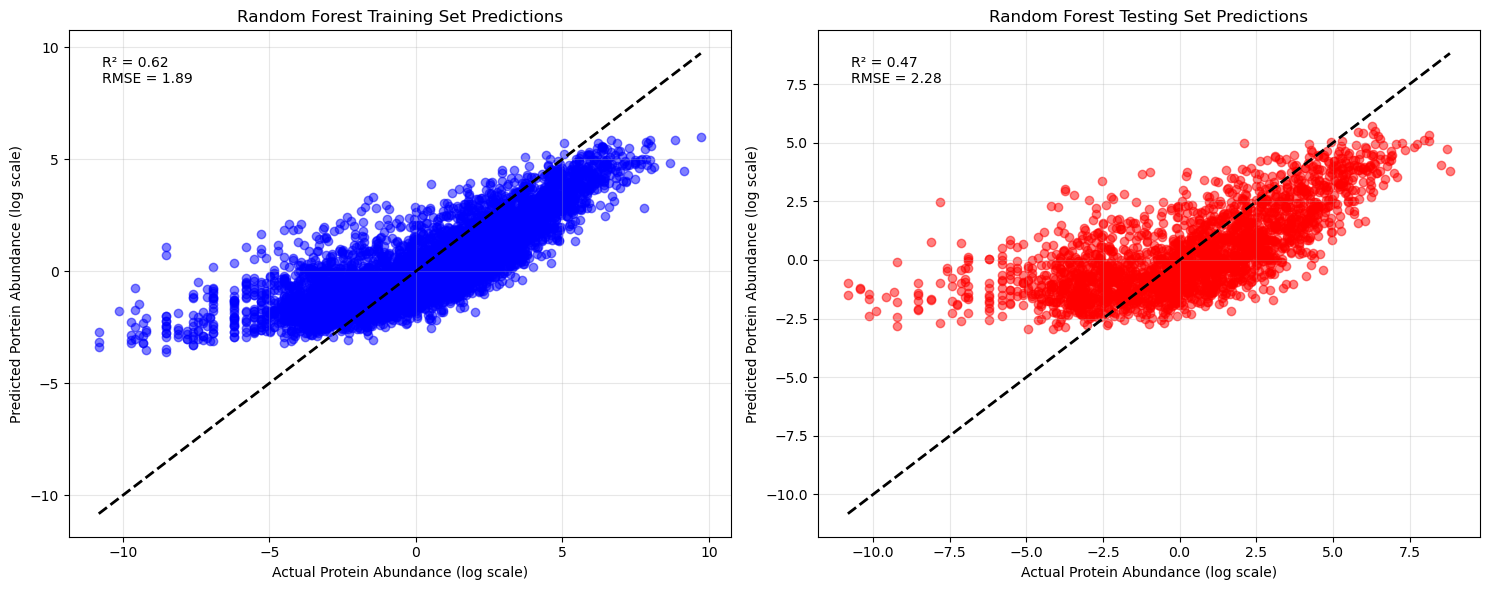

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

X = merged_df[top_features]
y = merged_df["protein_abundance_log"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Optuna best param:


#   n_estimators: 800
#   max_depth: 40
#   min_samples_split: 22
#   min_samples_leaf: 3
#   max_features: log2
#   max_samples: 0.545519474647072

rf_best = RandomForestRegressor(
    n_estimators=800,
    max_depth=40,
    min_samples_split=22,
    min_samples_leaf=3,
    max_features="log2",
    max_samples=0.545519474647072,
    random_state=42,
)
rf_best.fit(X_train_scaled, y_train)

y_train_pred = rf_best.predict(X_train_scaled)
y_test_pred = rf_best.predict(X_test_scaled)

cv_scores = cross_val_score(
    rf_best, X_train_scaled, y_train, cv=10, scoring="neg_root_mean_squared_error"
)
cv_mean = -cv_scores.mean()
cv_std = cv_scores.std() * 2
cv_rmse_pct = (cv_mean / np.mean(y_train)) * 100

print(
    f"\n10-Fold Cross Validation RMSE: {-cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})"
)
print(f"10-Fold Cross Validation RMSE (%): {cv_rmse_pct:.2f}%")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


def plot_predictions(ax, y_true, y_pred, title, color):
    ax.scatter(y_true, y_pred, alpha=0.5, color=color)

    min_val = min(y_true)
    max_val = max(y_true)
    ax.plot(
        [min_val, max_val], [min_val, max_val], "k--", lw=2, label="Perfect Prediction"
    )

    ax.set_xlabel("Actual Protein Abundance (log scale)")
    ax.set_ylabel("Predicted Portein Abundance (log scale)")
    ax.set_title(title)
    ax.grid(True, alpha=0.3)

    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    ax.text(
        0.05,
        0.95,
        f"R² = {r2:.2f}\nRMSE = {rmse:.2f}",
        transform=ax.transAxes,
        verticalalignment="top",
    )


plot_predictions(
    ax1, y_train, y_train_pred, "Random Forest Training Set Predictions", "blue"
)
plot_predictions(
    ax2, y_test, y_test_pred, "Random Forest Testing Set Predictions", "red"
)

plt.tight_layout()
plt.show()

# XGBoost Regressor

## Optuna Param Tuning

In [115]:
import optuna
from sklearn.metrics import r2_score
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = merged_df[top_features]
y = merged_df["protein_abundance_log"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_categorical('max_depth', [5, 7, 10, 20, 30, 40, 50, None]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 1, 5)
    }
    
    model = XGBRegressor(
        **params,
        random_state=42,
        n_jobs=-1 
    )
    
    model.fit(X_train_scaled, y_train)
    
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    r2_diff = train_r2 - test_r2

    penalty = 0
    if r2_diff >= 0.15:
        penalty = r2_diff - 0.15
        print(f"Overfitting detected! Applying penalty: {penalty:.4f}")

    penalized_test_r2 = test_r2 - penalty
    print(f"\nTrial {trial.number}:")
    print(f"Parameters: {params}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"R² difference: {r2_diff:.4f}")
    print(f"Penalized Test R²: {penalized_test_r2:.4f}")
    
    return penalized_test_r2

study = optuna.create_study(direction="maximize")

def print_progress(study, trial):
    print(f"\nBest trial so far: {study.best_trial.number}")
    print(f"Best penalized R² score so far: {study.best_value:.4f}")
    print(f"Best parameters so far: {study.best_params}")

print("Starting hyperparameter optimization...")
n_trials = 250
study.optimize(objective, n_trials=n_trials, callbacks=[print_progress])

print("\nOptimization completed!")
print(f"Best penalized R² score: {study.best_value:.4f}")
print("Best hyperparameters:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

try:
    import optuna.visualization as vis
    import matplotlib.pyplot as plt
    
    fig1 = vis.plot_optimization_history(study)
    fig1.show()
    
    fig2 = vis.plot_param_importances(study)
    fig2.show()
except ImportError:
    print("Optuna visualization is not available. Install optuna[visualization] to see plots.")

[I 2025-03-31 16:55:58,554] A new study created in memory with name: no-name-6a2eb13b-1a43-405b-ab8d-8585f5e04b3d


[I 2025-03-31 16:55:58,693] Trial 0 finished with value: 0.1851862546860904 and parameters: {'n_estimators': 200, 'max_depth': 30, 'min_child_weight': 12, 'learning_rate': 0.176221073338699, 'subsample': 0.862474219948636, 'colsample_bytree': 0.6041612671108921, 'gamma': 3.400331967208843, 'reg_alpha': 4.599985673996619, 'reg_lambda': 1.729589670739304}. Best is trial 0 with value: 0.1851862546860904.


Starting hyperparameter optimization...
Overfitting detected! Applying penalty: 0.2708

Trial 0:
Parameters: {'n_estimators': 200, 'max_depth': 30, 'min_child_weight': 12, 'learning_rate': 0.176221073338699, 'subsample': 0.862474219948636, 'colsample_bytree': 0.6041612671108921, 'gamma': 3.400331967208843, 'reg_alpha': 4.599985673996619, 'reg_lambda': 1.729589670739304}
Train R²: 0.8768
Test R²: 0.4560
R² difference: 0.4208
Penalized Test R²: 0.1852

Best trial so far: 0
Best penalized R² score so far: 0.1852
Best parameters so far: {'n_estimators': 200, 'max_depth': 30, 'min_child_weight': 12, 'learning_rate': 0.176221073338699, 'subsample': 0.862474219948636, 'colsample_bytree': 0.6041612671108921, 'gamma': 3.400331967208843, 'reg_alpha': 4.599985673996619, 'reg_lambda': 1.729589670739304}


[I 2025-03-31 16:55:59,005] Trial 1 finished with value: 0.3201213958251702 and parameters: {'n_estimators': 800, 'max_depth': None, 'min_child_weight': 11, 'learning_rate': 0.0412743211961333, 'subsample': 0.9372054240919624, 'colsample_bytree': 0.95823954083496, 'gamma': 3.0744007123069403, 'reg_alpha': 2.0167841074260844, 'reg_lambda': 1.065994728222353}. Best is trial 1 with value: 0.3201213958251702.


Overfitting detected! Applying penalty: 0.1699

Trial 1:
Parameters: {'n_estimators': 800, 'max_depth': None, 'min_child_weight': 11, 'learning_rate': 0.0412743211961333, 'subsample': 0.9372054240919624, 'colsample_bytree': 0.95823954083496, 'gamma': 3.0744007123069403, 'reg_alpha': 2.0167841074260844, 'reg_lambda': 1.065994728222353}
Train R²: 0.8100
Test R²: 0.4900
R² difference: 0.3199
Penalized Test R²: 0.3201

Best trial so far: 1
Best penalized R² score so far: 0.3201
Best parameters so far: {'n_estimators': 800, 'max_depth': None, 'min_child_weight': 11, 'learning_rate': 0.0412743211961333, 'subsample': 0.9372054240919624, 'colsample_bytree': 0.95823954083496, 'gamma': 3.0744007123069403, 'reg_alpha': 2.0167841074260844, 'reg_lambda': 1.065994728222353}


[I 2025-03-31 16:55:59,257] Trial 2 finished with value: 0.22972370678401877 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_child_weight': 13, 'learning_rate': 0.06414338281826582, 'subsample': 0.6829841776776666, 'colsample_bytree': 0.7730993241701165, 'gamma': 4.582521407983123, 'reg_alpha': 0.06854511118000894, 'reg_lambda': 1.2059071943870645}. Best is trial 1 with value: 0.3201213958251702.


Overfitting detected! Applying penalty: 0.2515

Trial 2:
Parameters: {'n_estimators': 300, 'max_depth': 10, 'min_child_weight': 13, 'learning_rate': 0.06414338281826582, 'subsample': 0.6829841776776666, 'colsample_bytree': 0.7730993241701165, 'gamma': 4.582521407983123, 'reg_alpha': 0.06854511118000894, 'reg_lambda': 1.2059071943870645}
Train R²: 0.8827
Test R²: 0.4812
R² difference: 0.4015
Penalized Test R²: 0.2297

Best trial so far: 1
Best penalized R² score so far: 0.3201
Best parameters so far: {'n_estimators': 800, 'max_depth': None, 'min_child_weight': 11, 'learning_rate': 0.0412743211961333, 'subsample': 0.9372054240919624, 'colsample_bytree': 0.95823954083496, 'gamma': 3.0744007123069403, 'reg_alpha': 2.0167841074260844, 'reg_lambda': 1.065994728222353}
Overfitting detected! Applying penalty: 0.3596

Trial 3:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.28888538425887045, 'subsample': 0.9985443207040194, 'colsample_bytree': 0.630

[I 2025-03-31 16:55:59,458] Trial 3 finished with value: 0.07241581194810975 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.28888538425887045, 'subsample': 0.9985443207040194, 'colsample_bytree': 0.6309098473430874, 'gamma': 0.3048618058073249, 'reg_alpha': 0.5585635349891926, 'reg_lambda': 1.9805234105475225}. Best is trial 1 with value: 0.3201213958251702.



Best trial so far: 1
Best penalized R² score so far: 0.3201
Best parameters so far: {'n_estimators': 800, 'max_depth': None, 'min_child_weight': 11, 'learning_rate': 0.0412743211961333, 'subsample': 0.9372054240919624, 'colsample_bytree': 0.95823954083496, 'gamma': 3.0744007123069403, 'reg_alpha': 2.0167841074260844, 'reg_lambda': 1.065994728222353}


[I 2025-03-31 16:55:59,815] Trial 4 finished with value: 0.19198761350761917 and parameters: {'n_estimators': 500, 'max_depth': 20, 'min_child_weight': 12, 'learning_rate': 0.07452601553370061, 'subsample': 0.9345896251051647, 'colsample_bytree': 0.9262929269605186, 'gamma': 3.4182085632194985, 'reg_alpha': 0.35374877027226526, 'reg_lambda': 4.1502420012697465}. Best is trial 1 with value: 0.3201213958251702.


Overfitting detected! Applying penalty: 0.2823

Trial 4:
Parameters: {'n_estimators': 500, 'max_depth': 20, 'min_child_weight': 12, 'learning_rate': 0.07452601553370061, 'subsample': 0.9345896251051647, 'colsample_bytree': 0.9262929269605186, 'gamma': 3.4182085632194985, 'reg_alpha': 0.35374877027226526, 'reg_lambda': 4.1502420012697465}
Train R²: 0.9065
Test R²: 0.4743
R² difference: 0.4323
Penalized Test R²: 0.1920

Best trial so far: 1
Best penalized R² score so far: 0.3201
Best parameters so far: {'n_estimators': 800, 'max_depth': None, 'min_child_weight': 11, 'learning_rate': 0.0412743211961333, 'subsample': 0.9372054240919624, 'colsample_bytree': 0.95823954083496, 'gamma': 3.0744007123069403, 'reg_alpha': 2.0167841074260844, 'reg_lambda': 1.065994728222353}


[I 2025-03-31 16:56:00,453] Trial 5 finished with value: 0.24079926669395776 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_child_weight': 7, 'learning_rate': 0.03131078885950815, 'subsample': 0.772012074047035, 'colsample_bytree': 0.8785190024017954, 'gamma': 3.7060159353675974, 'reg_alpha': 4.174821066529159, 'reg_lambda': 2.6269108050023933}. Best is trial 1 with value: 0.3201213958251702.
[I 2025-03-31 16:56:00,635] Trial 6 finished with value: 0.08412222558713112 and parameters: {'n_estimators': 400, 'max_depth': 20, 'min_child_weight': 18, 'learning_rate': 0.20655427453757635, 'subsample': 0.9645468480250146, 'colsample_bytree': 0.7720753880507819, 'gamma': 1.1253878424251877, 'reg_alpha': 1.70920706160079, 'reg_lambda': 2.3586211217004984}. Best is trial 1 with value: 0.3201213958251702.


Overfitting detected! Applying penalty: 0.2476

Trial 5:
Parameters: {'n_estimators': 700, 'max_depth': 40, 'min_child_weight': 7, 'learning_rate': 0.03131078885950815, 'subsample': 0.772012074047035, 'colsample_bytree': 0.8785190024017954, 'gamma': 3.7060159353675974, 'reg_alpha': 4.174821066529159, 'reg_lambda': 2.6269108050023933}
Train R²: 0.8860
Test R²: 0.4884
R² difference: 0.3976
Penalized Test R²: 0.2408

Best trial so far: 1
Best penalized R² score so far: 0.3201
Best parameters so far: {'n_estimators': 800, 'max_depth': None, 'min_child_weight': 11, 'learning_rate': 0.0412743211961333, 'subsample': 0.9372054240919624, 'colsample_bytree': 0.95823954083496, 'gamma': 3.0744007123069403, 'reg_alpha': 2.0167841074260844, 'reg_lambda': 1.065994728222353}
Overfitting detected! Applying penalty: 0.3577

Trial 6:
Parameters: {'n_estimators': 400, 'max_depth': 20, 'min_child_weight': 18, 'learning_rate': 0.20655427453757635, 'subsample': 0.9645468480250146, 'colsample_bytree': 0.77207

[I 2025-03-31 16:56:00,694] Trial 7 finished with value: 0.2390049026758748 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 16, 'learning_rate': 0.26685633476248327, 'subsample': 0.8536361242554478, 'colsample_bytree': 0.8351409756498694, 'gamma': 4.119776728719038, 'reg_alpha': 2.1512072538098397, 'reg_lambda': 4.573402438598084}. Best is trial 1 with value: 0.3201213958251702.


Overfitting detected! Applying penalty: 0.2182

Trial 7:
Parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 16, 'learning_rate': 0.26685633476248327, 'subsample': 0.8536361242554478, 'colsample_bytree': 0.8351409756498694, 'gamma': 4.119776728719038, 'reg_alpha': 2.1512072538098397, 'reg_lambda': 4.573402438598084}
Train R²: 0.8254
Test R²: 0.4572
R² difference: 0.3682
Penalized Test R²: 0.2390

Best trial so far: 1
Best penalized R² score so far: 0.3201
Best parameters so far: {'n_estimators': 800, 'max_depth': None, 'min_child_weight': 11, 'learning_rate': 0.0412743211961333, 'subsample': 0.9372054240919624, 'colsample_bytree': 0.95823954083496, 'gamma': 3.0744007123069403, 'reg_alpha': 2.0167841074260844, 'reg_lambda': 1.065994728222353}


[I 2025-03-31 16:56:00,970] Trial 8 finished with value: 0.14845755841192998 and parameters: {'n_estimators': 500, 'max_depth': 40, 'min_child_weight': 20, 'learning_rate': 0.12157038400191526, 'subsample': 0.770549431850915, 'colsample_bytree': 0.9255518868155395, 'gamma': 2.0276784699638775, 'reg_alpha': 2.8332644046297806, 'reg_lambda': 2.2527618526214446}. Best is trial 1 with value: 0.3201213958251702.


Overfitting detected! Applying penalty: 0.3191

Trial 8:
Parameters: {'n_estimators': 500, 'max_depth': 40, 'min_child_weight': 20, 'learning_rate': 0.12157038400191526, 'subsample': 0.770549431850915, 'colsample_bytree': 0.9255518868155395, 'gamma': 2.0276784699638775, 'reg_alpha': 2.8332644046297806, 'reg_lambda': 2.2527618526214446}
Train R²: 0.9366
Test R²: 0.4675
R² difference: 0.4691
Penalized Test R²: 0.1485

Best trial so far: 1
Best penalized R² score so far: 0.3201
Best parameters so far: {'n_estimators': 800, 'max_depth': None, 'min_child_weight': 11, 'learning_rate': 0.0412743211961333, 'subsample': 0.9372054240919624, 'colsample_bytree': 0.95823954083496, 'gamma': 3.0744007123069403, 'reg_alpha': 2.0167841074260844, 'reg_lambda': 1.065994728222353}


[I 2025-03-31 16:56:01,631] Trial 9 finished with value: 0.22760628460888166 and parameters: {'n_estimators': 800, 'max_depth': 50, 'min_child_weight': 5, 'learning_rate': 0.03481133408395367, 'subsample': 0.6405648997695127, 'colsample_bytree': 0.659343394187949, 'gamma': 2.939808957740122, 'reg_alpha': 4.440235834528238, 'reg_lambda': 1.7788453099949746}. Best is trial 1 with value: 0.3201213958251702.


Overfitting detected! Applying penalty: 0.2633

Trial 9:
Parameters: {'n_estimators': 800, 'max_depth': 50, 'min_child_weight': 5, 'learning_rate': 0.03481133408395367, 'subsample': 0.6405648997695127, 'colsample_bytree': 0.659343394187949, 'gamma': 2.939808957740122, 'reg_alpha': 4.440235834528238, 'reg_lambda': 1.7788453099949746}
Train R²: 0.9042
Test R²: 0.4909
R² difference: 0.4133
Penalized Test R²: 0.2276

Best trial so far: 1
Best penalized R² score so far: 0.3201
Best parameters so far: {'n_estimators': 800, 'max_depth': None, 'min_child_weight': 11, 'learning_rate': 0.0412743211961333, 'subsample': 0.9372054240919624, 'colsample_bytree': 0.95823954083496, 'gamma': 3.0744007123069403, 'reg_alpha': 2.0167841074260844, 'reg_lambda': 1.065994728222353}


[I 2025-03-31 16:56:01,984] Trial 10 finished with value: 0.17524039657263024 and parameters: {'n_estimators': 1000, 'max_depth': 7, 'min_child_weight': 3, 'learning_rate': 0.11780210601822313, 'subsample': 0.8947418191919669, 'colsample_bytree': 0.9844194917081734, 'gamma': 2.0463354252862485, 'reg_alpha': 3.1864207449320245, 'reg_lambda': 3.5380261863702693}. Best is trial 1 with value: 0.3201213958251702.


Overfitting detected! Applying penalty: 0.2916

Trial 10:
Parameters: {'n_estimators': 1000, 'max_depth': 7, 'min_child_weight': 3, 'learning_rate': 0.11780210601822313, 'subsample': 0.8947418191919669, 'colsample_bytree': 0.9844194917081734, 'gamma': 2.0463354252862485, 'reg_alpha': 3.1864207449320245, 'reg_lambda': 3.5380261863702693}
Train R²: 0.9084
Test R²: 0.4668
R² difference: 0.4416
Penalized Test R²: 0.1752

Best trial so far: 1
Best penalized R² score so far: 0.3201
Best parameters so far: {'n_estimators': 800, 'max_depth': None, 'min_child_weight': 11, 'learning_rate': 0.0412743211961333, 'subsample': 0.9372054240919624, 'colsample_bytree': 0.95823954083496, 'gamma': 3.0744007123069403, 'reg_alpha': 2.0167841074260844, 'reg_lambda': 1.065994728222353}


[I 2025-03-31 16:56:03,035] Trial 11 finished with value: 0.24989794631323145 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_child_weight': 7, 'learning_rate': 0.017051254143104815, 'subsample': 0.7586124211790362, 'colsample_bytree': 0.8603804974533672, 'gamma': 3.9304138594406908, 'reg_alpha': 3.406069385924983, 'reg_lambda': 3.133179723109349}. Best is trial 1 with value: 0.3201213958251702.


Overfitting detected! Applying penalty: 0.2411

Trial 11:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_child_weight': 7, 'learning_rate': 0.017051254143104815, 'subsample': 0.7586124211790362, 'colsample_bytree': 0.8603804974533672, 'gamma': 3.9304138594406908, 'reg_alpha': 3.406069385924983, 'reg_lambda': 3.133179723109349}
Train R²: 0.8820
Test R²: 0.4910
R² difference: 0.3911
Penalized Test R²: 0.2499

Best trial so far: 1
Best penalized R² score so far: 0.3201
Best parameters so far: {'n_estimators': 800, 'max_depth': None, 'min_child_weight': 11, 'learning_rate': 0.0412743211961333, 'subsample': 0.9372054240919624, 'colsample_bytree': 0.95823954083496, 'gamma': 3.0744007123069403, 'reg_alpha': 2.0167841074260844, 'reg_lambda': 1.065994728222353}


[I 2025-03-31 16:56:03,643] Trial 12 finished with value: 0.41135554203965186 and parameters: {'n_estimators': 800, 'max_depth': None, 'min_child_weight': 9, 'learning_rate': 0.011529631705646533, 'subsample': 0.7073552413380617, 'colsample_bytree': 0.9938780153438032, 'gamma': 4.705761098273148, 'reg_alpha': 1.4461323994432613, 'reg_lambda': 3.2758686905658987}. Best is trial 12 with value: 0.41135554203965186.


Overfitting detected! Applying penalty: 0.0883

Trial 12:
Parameters: {'n_estimators': 800, 'max_depth': None, 'min_child_weight': 9, 'learning_rate': 0.011529631705646533, 'subsample': 0.7073552413380617, 'colsample_bytree': 0.9938780153438032, 'gamma': 4.705761098273148, 'reg_alpha': 1.4461323994432613, 'reg_lambda': 3.2758686905658987}
Train R²: 0.7381
Test R²: 0.4997
R² difference: 0.2383
Penalized Test R²: 0.4114

Best trial so far: 12
Best penalized R² score so far: 0.4114
Best parameters so far: {'n_estimators': 800, 'max_depth': None, 'min_child_weight': 9, 'learning_rate': 0.011529631705646533, 'subsample': 0.7073552413380617, 'colsample_bytree': 0.9938780153438032, 'gamma': 4.705761098273148, 'reg_alpha': 1.4461323994432613, 'reg_lambda': 3.2758686905658987}


[I 2025-03-31 16:56:03,970] Trial 13 finished with value: 0.23165500359256128 and parameters: {'n_estimators': 1000, 'max_depth': None, 'min_child_weight': 9, 'learning_rate': 0.07587204822521443, 'subsample': 0.6941632926086255, 'colsample_bytree': 0.9972436503627137, 'gamma': 4.642509511771858, 'reg_alpha': 1.3343342233962578, 'reg_lambda': 3.4772047808609816}. Best is trial 12 with value: 0.41135554203965186.


Overfitting detected! Applying penalty: 0.2479

Trial 13:
Parameters: {'n_estimators': 1000, 'max_depth': None, 'min_child_weight': 9, 'learning_rate': 0.07587204822521443, 'subsample': 0.6941632926086255, 'colsample_bytree': 0.9972436503627137, 'gamma': 4.642509511771858, 'reg_alpha': 1.3343342233962578, 'reg_lambda': 3.4772047808609816}
Train R²: 0.8775
Test R²: 0.4796
R² difference: 0.3979
Penalized Test R²: 0.2317

Best trial so far: 12
Best penalized R² score so far: 0.4114
Best parameters so far: {'n_estimators': 800, 'max_depth': None, 'min_child_weight': 9, 'learning_rate': 0.011529631705646533, 'subsample': 0.7073552413380617, 'colsample_bytree': 0.9938780153438032, 'gamma': 4.705761098273148, 'reg_alpha': 1.4461323994432613, 'reg_lambda': 3.2758686905658987}


[I 2025-03-31 16:56:04,546] Trial 14 finished with value: 0.4170487195927354 and parameters: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}. Best is trial 14 with value: 0.4170487195927354.


Overfitting detected! Applying penalty: 0.0829

Trial 14:
Parameters: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}
Train R²: 0.7328
Test R²: 0.4999
R² difference: 0.2329
Penalized Test R²: 0.4170

Best trial so far: 14
Best penalized R² score so far: 0.4170
Best parameters so far: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}


[I 2025-03-31 16:56:04,781] Trial 15 finished with value: 0.19240038037171803 and parameters: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.11947625050676428, 'subsample': 0.6047256334178103, 'colsample_bytree': 0.9147391528290915, 'gamma': 4.945688058305357, 'reg_alpha': 1.0201591140657684, 'reg_lambda': 3.976054193186655}. Best is trial 14 with value: 0.4170487195927354.
[I 2025-03-31 16:56:04,962] Trial 16 finished with value: 0.06784903659793773 and parameters: {'n_estimators': 600, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.2235680055687083, 'subsample': 0.7058587591450614, 'colsample_bytree': 0.7263695252485549, 'gamma': 2.366303368171677, 'reg_alpha': 1.1216973734789442, 'reg_lambda': 4.918563464756488}. Best is trial 14 with value: 0.4170487195927354.


Overfitting detected! Applying penalty: 0.2725

Trial 15:
Parameters: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.11947625050676428, 'subsample': 0.6047256334178103, 'colsample_bytree': 0.9147391528290915, 'gamma': 4.945688058305357, 'reg_alpha': 1.0201591140657684, 'reg_lambda': 3.976054193186655}
Train R²: 0.8875
Test R²: 0.4649
R² difference: 0.4225
Penalized Test R²: 0.1924

Best trial so far: 14
Best penalized R² score so far: 0.4170
Best parameters so far: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}
Overfitting detected! Applying penalty: 0.3591

Trial 16:
Parameters: {'n_estimators': 600, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.2235680055687083, 'subsample': 0.7058587591450614, 'colsample_bytree': 

[I 2025-03-31 16:56:05,735] Trial 17 finished with value: 0.34009663600210127 and parameters: {'n_estimators': 900, 'max_depth': 7, 'min_child_weight': 15, 'learning_rate': 0.012552163557249515, 'subsample': 0.6018479094194686, 'colsample_bytree': 0.9565921354581225, 'gamma': 1.3600465896368406, 'reg_alpha': 2.397736982250411, 'reg_lambda': 2.882053478884586}. Best is trial 14 with value: 0.4170487195927354.


Overfitting detected! Applying penalty: 0.1563

Trial 17:
Parameters: {'n_estimators': 900, 'max_depth': 7, 'min_child_weight': 15, 'learning_rate': 0.012552163557249515, 'subsample': 0.6018479094194686, 'colsample_bytree': 0.9565921354581225, 'gamma': 1.3600465896368406, 'reg_alpha': 2.397736982250411, 'reg_lambda': 2.882053478884586}
Train R²: 0.8027
Test R²: 0.4964
R² difference: 0.3063
Penalized Test R²: 0.3401

Best trial so far: 14
Best penalized R² score so far: 0.4170
Best parameters so far: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}


[I 2025-03-31 16:56:06,073] Trial 18 finished with value: 0.10953237664766313 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 4, 'learning_rate': 0.10004942336494962, 'subsample': 0.6583903763706188, 'colsample_bytree': 0.8944907229400492, 'gamma': 1.2883990447184588, 'reg_alpha': 1.503460888779533, 'reg_lambda': 3.420620681491311}. Best is trial 14 with value: 0.4170487195927354.


Overfitting detected! Applying penalty: 0.3394

Trial 18:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 4, 'learning_rate': 0.10004942336494962, 'subsample': 0.6583903763706188, 'colsample_bytree': 0.8944907229400492, 'gamma': 1.2883990447184588, 'reg_alpha': 1.503460888779533, 'reg_lambda': 3.420620681491311}
Train R²: 0.9383
Test R²: 0.4489
R² difference: 0.4894
Penalized Test R²: 0.1095

Best trial so far: 14
Best penalized R² score so far: 0.4170
Best parameters so far: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}


[I 2025-03-31 16:56:06,355] Trial 19 finished with value: 0.026099116374592057 and parameters: {'n_estimators': 700, 'max_depth': 10, 'min_child_weight': 7, 'learning_rate': 0.17379613887374915, 'subsample': 0.7375167590783096, 'colsample_bytree': 0.8407735691324414, 'gamma': 0.39954831274307345, 'reg_alpha': 0.7549378373695229, 'reg_lambda': 1.3819116786328443}. Best is trial 14 with value: 0.4170487195927354.


Overfitting detected! Applying penalty: 0.4065

Trial 19:
Parameters: {'n_estimators': 700, 'max_depth': 10, 'min_child_weight': 7, 'learning_rate': 0.17379613887374915, 'subsample': 0.7375167590783096, 'colsample_bytree': 0.8407735691324414, 'gamma': 0.39954831274307345, 'reg_alpha': 0.7549378373695229, 'reg_lambda': 1.3819116786328443}
Train R²: 0.9892
Test R²: 0.4326
R² difference: 0.5565
Penalized Test R²: 0.0261

Best trial so far: 14
Best penalized R² score so far: 0.4170
Best parameters so far: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}


[I 2025-03-31 16:56:06,850] Trial 20 finished with value: 0.18241469257760046 and parameters: {'n_estimators': 900, 'max_depth': 30, 'min_child_weight': 3, 'learning_rate': 0.056167390129085934, 'subsample': 0.8121923670901158, 'colsample_bytree': 0.9665436768447246, 'gamma': 2.6773511009923334, 'reg_alpha': 1.909511986386355, 'reg_lambda': 3.912280059854216}. Best is trial 14 with value: 0.4170487195927354.


Overfitting detected! Applying penalty: 0.2987

Trial 20:
Parameters: {'n_estimators': 900, 'max_depth': 30, 'min_child_weight': 3, 'learning_rate': 0.056167390129085934, 'subsample': 0.8121923670901158, 'colsample_bytree': 0.9665436768447246, 'gamma': 2.6773511009923334, 'reg_alpha': 1.909511986386355, 'reg_lambda': 3.912280059854216}
Train R²: 0.9298
Test R²: 0.4811
R² difference: 0.4487
Penalized Test R²: 0.1824

Best trial so far: 14
Best penalized R² score so far: 0.4170
Best parameters so far: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}


[I 2025-03-31 16:56:07,634] Trial 21 finished with value: 0.33155095566871307 and parameters: {'n_estimators': 900, 'max_depth': 7, 'min_child_weight': 15, 'learning_rate': 0.013082156042212483, 'subsample': 0.6010997321518053, 'colsample_bytree': 0.9538463587533587, 'gamma': 1.2637199736120466, 'reg_alpha': 2.48008176961055, 'reg_lambda': 2.8043824693035493}. Best is trial 14 with value: 0.4170487195927354.


Overfitting detected! Applying penalty: 0.1638

Trial 21:
Parameters: {'n_estimators': 900, 'max_depth': 7, 'min_child_weight': 15, 'learning_rate': 0.013082156042212483, 'subsample': 0.6010997321518053, 'colsample_bytree': 0.9538463587533587, 'gamma': 1.2637199736120466, 'reg_alpha': 2.48008176961055, 'reg_lambda': 2.8043824693035493}
Train R²: 0.8092
Test R²: 0.4954
R² difference: 0.3138
Penalized Test R²: 0.3316

Best trial so far: 14
Best penalized R² score so far: 0.4170
Best parameters so far: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}


[I 2025-03-31 16:56:08,439] Trial 22 finished with value: 0.33743162165789653 and parameters: {'n_estimators': 900, 'max_depth': 7, 'min_child_weight': 15, 'learning_rate': 0.012152192205133496, 'subsample': 0.6434573867220275, 'colsample_bytree': 0.940986582580884, 'gamma': 1.6911688896569972, 'reg_alpha': 2.4919653040465874, 'reg_lambda': 2.9240360795743117}. Best is trial 14 with value: 0.4170487195927354.


Overfitting detected! Applying penalty: 0.1562

Trial 22:
Parameters: {'n_estimators': 900, 'max_depth': 7, 'min_child_weight': 15, 'learning_rate': 0.012152192205133496, 'subsample': 0.6434573867220275, 'colsample_bytree': 0.940986582580884, 'gamma': 1.6911688896569972, 'reg_alpha': 2.4919653040465874, 'reg_lambda': 2.9240360795743117}
Train R²: 0.7997
Test R²: 0.4936
R² difference: 0.3062
Penalized Test R²: 0.3374

Best trial so far: 14
Best penalized R² score so far: 0.4170
Best parameters so far: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}


[I 2025-03-31 16:56:09,045] Trial 23 finished with value: 0.11248338470061436 and parameters: {'n_estimators': 800, 'max_depth': 50, 'min_child_weight': 17, 'learning_rate': 0.09165112501001449, 'subsample': 0.627710411104592, 'colsample_bytree': 0.9992305349071499, 'gamma': 0.8469643977953716, 'reg_alpha': 3.6904566246111066, 'reg_lambda': 3.132972231589172}. Best is trial 14 with value: 0.4170487195927354.


Overfitting detected! Applying penalty: 0.3544

Trial 23:
Parameters: {'n_estimators': 800, 'max_depth': 50, 'min_child_weight': 17, 'learning_rate': 0.09165112501001449, 'subsample': 0.627710411104592, 'colsample_bytree': 0.9992305349071499, 'gamma': 0.8469643977953716, 'reg_alpha': 3.6904566246111066, 'reg_lambda': 3.132972231589172}
Train R²: 0.9713
Test R²: 0.4669
R² difference: 0.5044
Penalized Test R²: 0.1125

Best trial so far: 14
Best penalized R² score so far: 0.4170
Best parameters so far: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}


[I 2025-03-31 16:56:09,616] Trial 24 finished with value: 0.16294007396542187 and parameters: {'n_estimators': 1000, 'max_depth': 7, 'min_child_weight': 14, 'learning_rate': 0.04755976450737972, 'subsample': 0.7246584651176737, 'colsample_bytree': 0.9004406220779784, 'gamma': 1.7246427123861348, 'reg_alpha': 2.8408153051480145, 'reg_lambda': 2.317053273484984}. Best is trial 14 with value: 0.4170487195927354.


Overfitting detected! Applying penalty: 0.3120

Trial 24:
Parameters: {'n_estimators': 1000, 'max_depth': 7, 'min_child_weight': 14, 'learning_rate': 0.04755976450737972, 'subsample': 0.7246584651176737, 'colsample_bytree': 0.9004406220779784, 'gamma': 1.7246427123861348, 'reg_alpha': 2.8408153051480145, 'reg_lambda': 2.317053273484984}
Train R²: 0.9370
Test R²: 0.4750
R² difference: 0.4620
Penalized Test R²: 0.1629

Best trial so far: 14
Best penalized R² score so far: 0.4170
Best parameters so far: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}


[I 2025-03-31 16:56:10,059] Trial 25 finished with value: 0.27430412435304397 and parameters: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 20, 'learning_rate': 0.034293295547377, 'subsample': 0.6713883782526769, 'colsample_bytree': 0.8114765777353222, 'gamma': 0.5781785181140813, 'reg_alpha': 0.9392455255958259, 'reg_lambda': 1.6147200486999602}. Best is trial 14 with value: 0.4170487195927354.


Overfitting detected! Applying penalty: 0.2104

Trial 25:
Parameters: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 20, 'learning_rate': 0.034293295547377, 'subsample': 0.6713883782526769, 'colsample_bytree': 0.8114765777353222, 'gamma': 0.5781785181140813, 'reg_alpha': 0.9392455255958259, 'reg_lambda': 1.6147200486999602}
Train R²: 0.8451
Test R²: 0.4847
R² difference: 0.3604
Penalized Test R²: 0.2743

Best trial so far: 14
Best penalized R² score so far: 0.4170
Best parameters so far: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}


[I 2025-03-31 16:56:10,369] Trial 26 finished with value: 0.07681090721439776 and parameters: {'n_estimators': 900, 'max_depth': None, 'min_child_weight': 9, 'learning_rate': 0.14199132148882684, 'subsample': 0.6219241566992608, 'colsample_bytree': 0.9679020199164817, 'gamma': 2.451047558863587, 'reg_alpha': 1.4592762763955216, 'reg_lambda': 2.5998140354754566}. Best is trial 14 with value: 0.4170487195927354.


Overfitting detected! Applying penalty: 0.3577

Trial 26:
Parameters: {'n_estimators': 900, 'max_depth': None, 'min_child_weight': 9, 'learning_rate': 0.14199132148882684, 'subsample': 0.6219241566992608, 'colsample_bytree': 0.9679020199164817, 'gamma': 2.451047558863587, 'reg_alpha': 1.4592762763955216, 'reg_lambda': 2.5998140354754566}
Train R²: 0.9422
Test R²: 0.4345
R² difference: 0.5077
Penalized Test R²: 0.0768

Best trial so far: 14
Best penalized R² score so far: 0.4170
Best parameters so far: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}


[I 2025-03-31 16:56:10,904] Trial 27 finished with value: 0.13556327296039727 and parameters: {'n_estimators': 600, 'max_depth': 7, 'min_child_weight': 18, 'learning_rate': 0.053960081036515464, 'subsample': 0.8129311203964147, 'colsample_bytree': 0.8730795877391344, 'gamma': 0.00748902724944811, 'reg_alpha': 2.1599922080244847, 'reg_lambda': 4.3377465650761255}. Best is trial 14 with value: 0.4170487195927354.


Overfitting detected! Applying penalty: 0.3315

Trial 27:
Parameters: {'n_estimators': 600, 'max_depth': 7, 'min_child_weight': 18, 'learning_rate': 0.053960081036515464, 'subsample': 0.8129311203964147, 'colsample_bytree': 0.8730795877391344, 'gamma': 0.00748902724944811, 'reg_alpha': 2.1599922080244847, 'reg_lambda': 4.3377465650761255}
Train R²: 0.9486
Test R²: 0.4671
R² difference: 0.4815
Penalized Test R²: 0.1356

Best trial so far: 14
Best penalized R² score so far: 0.4170
Best parameters so far: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}


[I 2025-03-31 16:56:11,208] Trial 28 finished with value: 0.214990507062777 and parameters: {'n_estimators': 800, 'max_depth': None, 'min_child_weight': 6, 'learning_rate': 0.07683685370733051, 'subsample': 0.665674656387757, 'colsample_bytree': 0.6986609883059427, 'gamma': 4.329975444216178, 'reg_alpha': 1.6495352506083851, 'reg_lambda': 3.8092780228656165}. Best is trial 14 with value: 0.4170487195927354.


Overfitting detected! Applying penalty: 0.2556

Trial 28:
Parameters: {'n_estimators': 800, 'max_depth': None, 'min_child_weight': 6, 'learning_rate': 0.07683685370733051, 'subsample': 0.665674656387757, 'colsample_bytree': 0.6986609883059427, 'gamma': 4.329975444216178, 'reg_alpha': 1.6495352506083851, 'reg_lambda': 3.8092780228656165}
Train R²: 0.8761
Test R²: 0.4706
R² difference: 0.4056
Penalized Test R²: 0.2150

Best trial so far: 14
Best penalized R² score so far: 0.4170
Best parameters so far: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}


[I 2025-03-31 16:56:12,532] Trial 29 finished with value: 0.20878937608907855 and parameters: {'n_estimators': 900, 'max_depth': 30, 'min_child_weight': 12, 'learning_rate': 0.014059341517203745, 'subsample': 0.7135713286549739, 'colsample_bytree': 0.9432930253499792, 'gamma': 3.6668262330031705, 'reg_alpha': 9.289987149951884e-05, 'reg_lambda': 1.9227093758491542}. Best is trial 14 with value: 0.4170487195927354.


Overfitting detected! Applying penalty: 0.2781

Trial 29:
Parameters: {'n_estimators': 900, 'max_depth': 30, 'min_child_weight': 12, 'learning_rate': 0.014059341517203745, 'subsample': 0.7135713286549739, 'colsample_bytree': 0.9432930253499792, 'gamma': 3.6668262330031705, 'reg_alpha': 9.289987149951884e-05, 'reg_lambda': 1.9227093758491542}
Train R²: 0.9150
Test R²: 0.4869
R² difference: 0.4281
Penalized Test R²: 0.2088

Best trial so far: 14
Best penalized R² score so far: 0.4170
Best parameters so far: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}


[I 2025-03-31 16:56:13,021] Trial 30 finished with value: 0.15084176599694732 and parameters: {'n_estimators': 700, 'max_depth': 50, 'min_child_weight': 9, 'learning_rate': 0.09472992111466777, 'subsample': 0.6189399719062483, 'colsample_bytree': 0.9777471061588145, 'gamma': 3.076870848643117, 'reg_alpha': 2.7509308920783933, 'reg_lambda': 1.4377417514186457}. Best is trial 14 with value: 0.4170487195927354.


Overfitting detected! Applying penalty: 0.3137

Trial 30:
Parameters: {'n_estimators': 700, 'max_depth': 50, 'min_child_weight': 9, 'learning_rate': 0.09472992111466777, 'subsample': 0.6189399719062483, 'colsample_bytree': 0.9777471061588145, 'gamma': 3.076870848643117, 'reg_alpha': 2.7509308920783933, 'reg_lambda': 1.4377417514186457}
Train R²: 0.9282
Test R²: 0.4645
R² difference: 0.4637
Penalized Test R²: 0.1508

Best trial so far: 14
Best penalized R² score so far: 0.4170
Best parameters so far: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}


[I 2025-03-31 16:56:13,842] Trial 31 finished with value: 0.3044811493289149 and parameters: {'n_estimators': 900, 'max_depth': 7, 'min_child_weight': 14, 'learning_rate': 0.014062907537528799, 'subsample': 0.6481945972677261, 'colsample_bytree': 0.9460604343505663, 'gamma': 1.7632644348254212, 'reg_alpha': 2.464599392014032, 'reg_lambda': 2.9602787037927887}. Best is trial 14 with value: 0.4170487195927354.


Overfitting detected! Applying penalty: 0.1879

Trial 31:
Parameters: {'n_estimators': 900, 'max_depth': 7, 'min_child_weight': 14, 'learning_rate': 0.014062907537528799, 'subsample': 0.6481945972677261, 'colsample_bytree': 0.9460604343505663, 'gamma': 1.7632644348254212, 'reg_alpha': 2.464599392014032, 'reg_lambda': 2.9602787037927887}
Train R²: 0.8303
Test R²: 0.4924
R² difference: 0.3379
Penalized Test R²: 0.3045

Best trial so far: 14
Best penalized R² score so far: 0.4170
Best parameters so far: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}


[I 2025-03-31 16:56:14,616] Trial 32 finished with value: 0.18384459371036577 and parameters: {'n_estimators': 800, 'max_depth': 7, 'min_child_weight': 15, 'learning_rate': 0.03231132440268844, 'subsample': 0.6464882771752845, 'colsample_bytree': 0.9266629296687252, 'gamma': 1.6143996963526388, 'reg_alpha': 2.2703833772174065, 'reg_lambda': 3.344600572309933}. Best is trial 14 with value: 0.4170487195927354.


Overfitting detected! Applying penalty: 0.2944

Trial 32:
Parameters: {'n_estimators': 800, 'max_depth': 7, 'min_child_weight': 15, 'learning_rate': 0.03231132440268844, 'subsample': 0.6464882771752845, 'colsample_bytree': 0.9266629296687252, 'gamma': 1.6143996963526388, 'reg_alpha': 2.2703833772174065, 'reg_lambda': 3.344600572309933}
Train R²: 0.9226
Test R²: 0.4782
R² difference: 0.4444
Penalized Test R²: 0.1838

Best trial so far: 14
Best penalized R² score so far: 0.4170
Best parameters so far: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}


[I 2025-03-31 16:56:15,537] Trial 33 finished with value: 0.10526857701368297 and parameters: {'n_estimators': 1000, 'max_depth': 7, 'min_child_weight': 11, 'learning_rate': 0.04913368114707497, 'subsample': 0.6000990300794444, 'colsample_bytree': 0.9455372310274925, 'gamma': 0.9289108127627193, 'reg_alpha': 1.9027576662012995, 'reg_lambda': 2.818497479403248}. Best is trial 14 with value: 0.4170487195927354.


Overfitting detected! Applying penalty: 0.3573

Trial 33:
Parameters: {'n_estimators': 1000, 'max_depth': 7, 'min_child_weight': 11, 'learning_rate': 0.04913368114707497, 'subsample': 0.6000990300794444, 'colsample_bytree': 0.9455372310274925, 'gamma': 0.9289108127627193, 'reg_alpha': 1.9027576662012995, 'reg_lambda': 2.818497479403248}
Train R²: 0.9700
Test R²: 0.4626
R² difference: 0.5073
Penalized Test R²: 0.1053

Best trial so far: 14
Best penalized R² score so far: 0.4170
Best parameters so far: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}


[I 2025-03-31 16:56:16,316] Trial 34 finished with value: 0.18151268363402695 and parameters: {'n_estimators': 900, 'max_depth': 10, 'min_child_weight': 13, 'learning_rate': 0.03192907410851378, 'subsample': 0.6696143541440688, 'colsample_bytree': 0.8987130780881729, 'gamma': 2.133729337997044, 'reg_alpha': 3.2115999048333146, 'reg_lambda': 1.0472440256113456}. Best is trial 14 with value: 0.4170487195927354.


Overfitting detected! Applying penalty: 0.2998

Trial 34:
Parameters: {'n_estimators': 900, 'max_depth': 10, 'min_child_weight': 13, 'learning_rate': 0.03192907410851378, 'subsample': 0.6696143541440688, 'colsample_bytree': 0.8987130780881729, 'gamma': 2.133729337997044, 'reg_alpha': 3.2115999048333146, 'reg_lambda': 1.0472440256113456}
Train R²: 0.9311
Test R²: 0.4813
R² difference: 0.4498
Penalized Test R²: 0.1815

Best trial so far: 14
Best penalized R² score so far: 0.4170
Best parameters so far: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.010088911459261989, 'subsample': 0.6000577753107212, 'colsample_bytree': 0.9360552175117043, 'gamma': 2.633337885146233, 'reg_alpha': 1.146920528634404, 'reg_lambda': 1.2610168561047295}


[I 2025-03-31 16:56:16,803] Trial 35 finished with value: 0.5032966397876557 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}. Best is trial 35 with value: 0.5032966397876557.



Trial 35:
Parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}
Train R²: 0.6480
Test R²: 0.5033
R² difference: 0.1447
Penalized Test R²: 0.5033

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:17,198] Trial 36 finished with value: 0.2183796695496587 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.061130258176509494, 'subsample': 0.7365724794026738, 'colsample_bytree': 0.9789250014152465, 'gamma': 3.193500758021681, 'reg_alpha': 0.2662417704170066, 'reg_lambda': 3.7109114364730953}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.2527

Trial 36:
Parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.061130258176509494, 'subsample': 0.7365724794026738, 'colsample_bytree': 0.9789250014152465, 'gamma': 3.193500758021681, 'reg_alpha': 0.2662417704170066, 'reg_lambda': 3.7109114364730953}
Train R²: 0.8737
Test R²: 0.4710
R² difference: 0.4027
Penalized Test R²: 0.2184

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:17,569] Trial 37 finished with value: 0.4164979702883568 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.027067211276043272, 'subsample': 0.6911678952202551, 'colsample_bytree': 0.9956664121922736, 'gamma': 1.4311265902974142, 'reg_alpha': 0.6610705871621861, 'reg_lambda': 4.2123261168845065}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0772

Trial 37:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.027067211276043272, 'subsample': 0.6911678952202551, 'colsample_bytree': 0.9956664121922736, 'gamma': 1.4311265902974142, 'reg_alpha': 0.6610705871621861, 'reg_lambda': 4.2123261168845065}
Train R²: 0.7210
Test R²: 0.4937
R² difference: 0.2272
Penalized Test R²: 0.4165

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:17,900] Trial 38 finished with value: 0.2563035094278455 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.06973229374058834, 'subsample': 0.6901236793487209, 'colsample_bytree': 0.9975725470601168, 'gamma': 0.8348358459886949, 'reg_alpha': 0.5388603794496195, 'reg_lambda': 4.3427575231412465}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.2128

Trial 38:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.06973229374058834, 'subsample': 0.6901236793487209, 'colsample_bytree': 0.9975725470601168, 'gamma': 0.8348358459886949, 'reg_alpha': 0.5388603794496195, 'reg_lambda': 4.3427575231412465}
Train R²: 0.8318
Test R²: 0.4691
R² difference: 0.3628
Penalized Test R²: 0.2563

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:18,107] Trial 39 finished with value: 0.41653420049406764 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.04297763760545173, 'subsample': 0.7435997167099012, 'colsample_bytree': 0.7717535023706157, 'gamma': 2.8693835734508384, 'reg_alpha': 0.6182457856515433, 'reg_lambda': 4.18313729674909}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0785

Trial 39:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.04297763760545173, 'subsample': 0.7435997167099012, 'colsample_bytree': 0.7717535023706157, 'gamma': 2.8693835734508384, 'reg_alpha': 0.6182457856515433, 'reg_lambda': 4.18313729674909}
Train R²: 0.7235
Test R²: 0.4950
R² difference: 0.2285
Penalized Test R²: 0.4165

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:18,350] Trial 40 finished with value: 0.45368541555667485 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.03393540257728268, 'subsample': 0.7943545768503074, 'colsample_bytree': 0.7565036889530881, 'gamma': 2.839680452090427, 'reg_alpha': 0.6608084543845245, 'reg_lambda': 4.71350431921927}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:18,531] Trial 41 finished with value: 0.45866859833339546 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.04331759496430018, 'subsample': 0.8013627328511216, 'colsample_bytree': 0.7637015450476131, 'gamma': 2.7633876375364346, 'reg_alpha': 0.6256630813574748, 'reg_lambda': 4.8765483248800425}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0452

Trial 40:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.03393540257728268, 'subsample': 0.7943545768503074, 'colsample_bytree': 0.7565036889530881, 'gamma': 2.839680452090427, 'reg_alpha': 0.6608084543845245, 'reg_lambda': 4.71350431921927}
Train R²: 0.6940
Test R²: 0.4988
R² difference: 0.1952
Penalized Test R²: 0.4537

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}
Overfitting detected! Applying penalty: 0.0391

Trial 41:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.04331759496430018, 'subsample': 0.8013627328511216, 'colsample_bytree': 0.7637

[I 2025-03-31 16:56:18,703] Trial 42 finished with value: 0.46745126574260465 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 18, 'learning_rate': 0.040956163663958614, 'subsample': 0.8014392177984626, 'colsample_bytree': 0.7467988389957975, 'gamma': 2.7717375365079664, 'reg_alpha': 0.3317435024893234, 'reg_lambda': 4.952603764003779}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:18,876] Trial 43 finished with value: 0.34776303321599866 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.08259678532669529, 'subsample': 0.8553379824524177, 'colsample_bytree': 0.7448838035676016, 'gamma': 3.4114941037501216, 'reg_alpha': 0.28503420672281904, 'reg_lambda': 4.94380227711325}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0314

Trial 42:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 18, 'learning_rate': 0.040956163663958614, 'subsample': 0.8014392177984626, 'colsample_bytree': 0.7467988389957975, 'gamma': 2.7717375365079664, 'reg_alpha': 0.3317435024893234, 'reg_lambda': 4.952603764003779}
Train R²: 0.6802
Test R²: 0.4988
R² difference: 0.1814
Penalized Test R²: 0.4675

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}
Overfitting detected! Applying penalty: 0.1356

Trial 43:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.08259678532669529, 'subsample': 0.8553379824524177, 'colsample_bytree': 0.7

[I 2025-03-31 16:56:18,997] Trial 44 finished with value: 0.501522406641704 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 18, 'learning_rate': 0.042263396712211604, 'subsample': 0.8288037909738736, 'colsample_bytree': 0.7931094420817428, 'gamma': 2.730203639863468, 'reg_alpha': 0.34195525671664095, 'reg_lambda': 4.676566797993978}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:19,138] Trial 45 finished with value: 0.46294933438995256 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 18, 'learning_rate': 0.06296485943595553, 'subsample': 0.8271339599459873, 'colsample_bytree': 0.7869478781471989, 'gamma': 2.2220266947080143, 'reg_alpha': 0.3471252600003458, 'reg_lambda': 4.600115262205355}. Best is trial 35 with value: 0.5032966397876557.



Trial 44:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 18, 'learning_rate': 0.042263396712211604, 'subsample': 0.8288037909738736, 'colsample_bytree': 0.7931094420817428, 'gamma': 2.730203639863468, 'reg_alpha': 0.34195525671664095, 'reg_lambda': 4.676566797993978}
Train R²: 0.6455
Test R²: 0.5015
R² difference: 0.1440
Penalized Test R²: 0.5015

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}
Overfitting detected! Applying penalty: 0.0347

Trial 45:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 18, 'learning_rate': 0.06296485943595553, 'subsample': 0.8271339599459873, 'colsample_bytree': 0.7869478781471989, 'gamma': 2.2220266947080143, '

[I 2025-03-31 16:56:19,211] Trial 46 finished with value: 0.4997510659760873 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 18, 'learning_rate': 0.06362647596860584, 'subsample': 0.8339470473682543, 'colsample_bytree': 0.8163017745490785, 'gamma': 2.308309266304767, 'reg_alpha': 0.18392455734096672, 'reg_lambda': 4.608686761661897}. Best is trial 35 with value: 0.5032966397876557.



Trial 46:
Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 18, 'learning_rate': 0.06362647596860584, 'subsample': 0.8339470473682543, 'colsample_bytree': 0.8163017745490785, 'gamma': 2.308309266304767, 'reg_alpha': 0.18392455734096672, 'reg_lambda': 4.608686761661897}
Train R²: 0.6205
Test R²: 0.4998
R² difference: 0.1207
Penalized Test R²: 0.4998

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:19,446] Trial 47 finished with value: 0.1547021862311002 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_child_weight': 18, 'learning_rate': 0.11006917473625116, 'subsample': 0.8811788048567527, 'colsample_bytree': 0.7935039739666059, 'gamma': 2.0216775263271467, 'reg_alpha': 0.18838620932851574, 'reg_lambda': 4.5696143100961315}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:19,572] Trial 48 finished with value: 0.3166020888895723 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.13423575427682505, 'subsample': 0.8449170260454688, 'colsample_bytree': 0.8034744382594278, 'gamma': 2.331012532616022, 'reg_alpha': 0.004143974109014792, 'reg_lambda': 4.606780878331629}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.3101

Trial 47:
Parameters: {'n_estimators': 100, 'max_depth': 20, 'min_child_weight': 18, 'learning_rate': 0.11006917473625116, 'subsample': 0.8811788048567527, 'colsample_bytree': 0.7935039739666059, 'gamma': 2.0216775263271467, 'reg_alpha': 0.18838620932851574, 'reg_lambda': 4.5696143100961315}
Train R²: 0.9250
Test R²: 0.4648
R² difference: 0.4601
Penalized Test R²: 0.1547

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}
Overfitting detected! Applying penalty: 0.1612

Trial 48:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.13423575427682505, 'subsample': 0.8449170260454688, 'colsample_bytree': 0

[I 2025-03-31 16:56:19,691] Trial 49 finished with value: 0.11662612333674416 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.29901795915168927, 'subsample': 0.8426034971391347, 'colsample_bytree': 0.7036931652040239, 'gamma': 2.2552294565028177, 'reg_alpha': 0.4591829013837368, 'reg_lambda': 4.454346672030153}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:19,757] Trial 50 finished with value: 0.3244469436943729 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.2316398494831112, 'subsample': 0.9157483581822378, 'colsample_bytree': 0.6672576300587508, 'gamma': 1.9463017334990527, 'reg_alpha': 4.969672322364862, 'reg_lambda': 4.756454762796176}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.3082

Trial 49:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.29901795915168927, 'subsample': 0.8426034971391347, 'colsample_bytree': 0.7036931652040239, 'gamma': 2.2552294565028177, 'reg_alpha': 0.4591829013837368, 'reg_lambda': 4.454346672030153}
Train R²: 0.8830
Test R²: 0.4248
R² difference: 0.4582
Penalized Test R²: 0.1166

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}
Overfitting detected! Applying penalty: 0.1409

Trial 50:
Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.2316398494831112, 'subsample': 0.9157483581822378, 'colsample_bytree': 0.667

[I 2025-03-31 16:56:19,923] Trial 51 finished with value: 0.40005939487197806 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 18, 'learning_rate': 0.062439570328009245, 'subsample': 0.7874141234494667, 'colsample_bytree': 0.824984562550684, 'gamma': 2.5965155895743233, 'reg_alpha': 0.8753302538375711, 'reg_lambda': 4.998505278153203}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:20,041] Trial 52 finished with value: 0.42294609594670585 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.08393135374999736, 'subsample': 0.8267331258373577, 'colsample_bytree': 0.782850420469366, 'gamma': 2.757490596763874, 'reg_alpha': 0.32421855182912857, 'reg_lambda': 4.788981337578228}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0930

Trial 51:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 18, 'learning_rate': 0.062439570328009245, 'subsample': 0.7874141234494667, 'colsample_bytree': 0.824984562550684, 'gamma': 2.5965155895743233, 'reg_alpha': 0.8753302538375711, 'reg_lambda': 4.998505278153203}
Train R²: 0.7360
Test R²: 0.4930
R² difference: 0.2430
Penalized Test R²: 0.4001

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}
Overfitting detected! Applying penalty: 0.0710

Trial 52:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.08393135374999736, 'subsample': 0.8267331258373577, 'colsample_bytree': 0.78

[I 2025-03-31 16:56:20,212] Trial 53 finished with value: 0.5009790985699424 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.025305727168300263, 'subsample': 0.8748466867983655, 'colsample_bytree': 0.7603398545319664, 'gamma': 3.11251582958052, 'reg_alpha': 1.2457421154125505, 'reg_lambda': 4.476521729275966}. Best is trial 35 with value: 0.5032966397876557.



Trial 53:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.025305727168300263, 'subsample': 0.8748466867983655, 'colsample_bytree': 0.7603398545319664, 'gamma': 3.11251582958052, 'reg_alpha': 1.2457421154125505, 'reg_lambda': 4.476521729275966}
Train R²: 0.6355
Test R²: 0.5010
R² difference: 0.1345
Penalized Test R²: 0.5010

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:20,437] Trial 54 finished with value: 0.2395468061734801 and parameters: {'n_estimators': 100, 'max_depth': 40, 'min_child_weight': 20, 'learning_rate': 0.06602300319216622, 'subsample': 0.8723072194610284, 'colsample_bytree': 0.7336398812475332, 'gamma': 3.2073564273558484, 'reg_alpha': 1.2126421963114118, 'reg_lambda': 4.05336504875392}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:20,614] Trial 55 finished with value: 0.5024490456198003 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 18, 'learning_rate': 0.022572221807889613, 'subsample': 0.7713058100290037, 'colsample_bytree': 0.7103172836133048, 'gamma': 3.5886369686368864, 'reg_alpha': 0.8475606497876725, 'reg_lambda': 4.436925635275905}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.2416

Trial 54:
Parameters: {'n_estimators': 100, 'max_depth': 40, 'min_child_weight': 20, 'learning_rate': 0.06602300319216622, 'subsample': 0.8723072194610284, 'colsample_bytree': 0.7336398812475332, 'gamma': 3.2073564273558484, 'reg_alpha': 1.2126421963114118, 'reg_lambda': 4.05336504875392}
Train R²: 0.8727
Test R²: 0.4811
R² difference: 0.3916
Penalized Test R²: 0.2395

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}

Trial 55:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 18, 'learning_rate': 0.022572221807889613, 'subsample': 0.7713058100290037, 'colsample_bytree': 0.7103172836133048, 'gamma': 3.5886369686368864, '

[I 2025-03-31 16:56:21,239] Trial 56 finished with value: 0.24736096714614195 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_child_weight': 16, 'learning_rate': 0.024682459892440497, 'subsample': 0.7759355563773312, 'colsample_bytree': 0.7119038585815872, 'gamma': 3.6294592776464207, 'reg_alpha': 0.8543735563277091, 'reg_lambda': 4.444284578585127}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:21,357] Trial 57 finished with value: 0.4952626241510907 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.023694838631748025, 'subsample': 0.895353979093507, 'colsample_bytree': 0.6082606283458262, 'gamma': 3.8552192002926664, 'reg_alpha': 0.15880055064305088, 'reg_lambda': 3.629698328533083}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.2398

Trial 56:
Parameters: {'n_estimators': 300, 'max_depth': 20, 'min_child_weight': 16, 'learning_rate': 0.024682459892440497, 'subsample': 0.7759355563773312, 'colsample_bytree': 0.7119038585815872, 'gamma': 3.6294592776464207, 'reg_alpha': 0.8543735563277091, 'reg_lambda': 4.444284578585127}
Train R²: 0.8770
Test R²: 0.4872
R² difference: 0.3898
Penalized Test R²: 0.2474

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}

Trial 57:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.023694838631748025, 'subsample': 0.895353979093507, 'colsample_bytree': 0.6082606283458262, 'gamma': 3.8552192002926664, 

[I 2025-03-31 16:56:21,477] Trial 58 finished with value: 0.49261517299437485 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.02156639324864164, 'subsample': 0.9633905065084994, 'colsample_bytree': 0.6021121353366959, 'gamma': 4.119520265159319, 'reg_alpha': 0.11032536716664768, 'reg_lambda': 3.663090033693075}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:21,637] Trial 59 finished with value: 0.49539170898714147 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.0241344419833264, 'subsample': 0.908812685505551, 'colsample_bytree': 0.6308719915638468, 'gamma': 3.7957579267481187, 'reg_alpha': 0.9944542787314036, 'reg_lambda': 4.096997753124036}. Best is trial 35 with value: 0.5032966397876557.



Trial 58:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.02156639324864164, 'subsample': 0.9633905065084994, 'colsample_bytree': 0.6021121353366959, 'gamma': 4.119520265159319, 'reg_alpha': 0.11032536716664768, 'reg_lambda': 3.663090033693075}
Train R²: 0.5915
Test R²: 0.4926
R² difference: 0.0989
Penalized Test R²: 0.4926

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}

Trial 59:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.0241344419833264, 'subsample': 0.908812685505551, 'colsample_bytree': 0.6308719915638468, 'gamma': 3.7957579267481187, 'reg_alpha': 0.9944542787314036, 'reg_lambda': 4.09

[I 2025-03-31 16:56:21,758] Trial 60 finished with value: 0.1969878556603557 and parameters: {'n_estimators': 100, 'max_depth': 30, 'min_child_weight': 17, 'learning_rate': 0.17281623327277484, 'subsample': 0.9302650654060668, 'colsample_bytree': 0.657136391106179, 'gamma': 3.548458574643704, 'reg_alpha': 1.0682989513517216, 'reg_lambda': 4.102163705012047}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:21,868] Trial 61 finished with value: 0.4950142466809767 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.023582657507146706, 'subsample': 0.8832070158346012, 'colsample_bytree': 0.646365031837546, 'gamma': 3.989651502003254, 'reg_alpha': 0.4715846701991061, 'reg_lambda': 4.302806205734123}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:21,934] Trial 62 finished with value: 0.49608782795873685 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.04997

Overfitting detected! Applying penalty: 0.2684

Trial 60:
Parameters: {'n_estimators': 100, 'max_depth': 30, 'min_child_weight': 17, 'learning_rate': 0.17281623327277484, 'subsample': 0.9302650654060668, 'colsample_bytree': 0.657136391106179, 'gamma': 3.548458574643704, 'reg_alpha': 1.0682989513517216, 'reg_lambda': 4.102163705012047}
Train R²: 0.8839
Test R²: 0.4654
R² difference: 0.4184
Penalized Test R²: 0.1970

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}

Trial 61:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.023582657507146706, 'subsample': 0.8832070158346012, 'colsample_bytree': 0.646365031837546, 'gamma': 3.989651502003254, 'reg

[I 2025-03-31 16:56:22,001] Trial 63 finished with value: 0.49708146685436816 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.05199456161108261, 'subsample': 0.8998851986029852, 'colsample_bytree': 0.6860215483124914, 'gamma': 4.453193150492971, 'reg_alpha': 1.3307036187169838, 'reg_lambda': 3.889130830660198}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:22,169] Trial 64 finished with value: 0.33378477500943615 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_child_weight': 19, 'learning_rate': 0.05272083538934172, 'subsample': 0.8648868645208349, 'colsample_bytree': 0.8512509178994767, 'gamma': 4.432008454723388, 'reg_alpha': 1.2562708481675002, 'reg_lambda': 3.8209104197951316}. Best is trial 35 with value: 0.5032966397876557.



Trial 63:
Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.05199456161108261, 'subsample': 0.8998851986029852, 'colsample_bytree': 0.6860215483124914, 'gamma': 4.453193150492971, 'reg_alpha': 1.3307036187169838, 'reg_lambda': 3.889130830660198}
Train R²: 0.6040
Test R²: 0.4971
R² difference: 0.1069
Penalized Test R²: 0.4971

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}
Overfitting detected! Applying penalty: 0.1561

Trial 64:
Parameters: {'n_estimators': 100, 'max_depth': 10, 'min_child_weight': 19, 'learning_rate': 0.05272083538934172, 'subsample': 0.8648868645208349, 'colsample_bytree': 0.8512509178994767, 'gamma': 4.432008454723388, 're

[I 2025-03-31 16:56:22,375] Trial 65 finished with value: 0.31572114734955603 and parameters: {'n_estimators': 100, 'max_depth': 40, 'min_child_weight': 18, 'learning_rate': 0.045928517240122944, 'subsample': 0.8356878398511636, 'colsample_bytree': 0.680574982784553, 'gamma': 4.790792270812297, 'reg_alpha': 1.6566130846806162, 'reg_lambda': 4.451284683760394}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:22,439] Trial 66 finished with value: 0.49295772146594197 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.0366451221536374, 'subsample': 0.8945955847989916, 'colsample_bytree': 0.6881710562737893, 'gamma': 3.2831773775642383, 'reg_alpha': 0.7526550841442206, 'reg_lambda': 3.9688933744993706}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:22,490] Trial 67 finished with value: 0.38228465083820196 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.2

Overfitting detected! Applying penalty: 0.1717

Trial 65:
Parameters: {'n_estimators': 100, 'max_depth': 40, 'min_child_weight': 18, 'learning_rate': 0.045928517240122944, 'subsample': 0.8356878398511636, 'colsample_bytree': 0.680574982784553, 'gamma': 4.790792270812297, 'reg_alpha': 1.6566130846806162, 'reg_lambda': 4.451284683760394}
Train R²: 0.8092
Test R²: 0.4874
R² difference: 0.3217
Penalized Test R²: 0.3157

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}

Trial 66:
Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.0366451221536374, 'subsample': 0.8945955847989916, 'colsample_bytree': 0.6881710562737893, 'gamma': 3.2831773775642383, 're

[I 2025-03-31 16:56:22,725] Trial 68 finished with value: 0.21406186318029496 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_child_weight': 18, 'learning_rate': 0.07661263225590809, 'subsample': 0.9866929531607621, 'colsample_bytree': 0.7294199600917461, 'gamma': 3.0510056550876943, 'reg_alpha': 0.8095583294946633, 'reg_lambda': 4.246200298828513}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:22,891] Trial 69 finished with value: 0.41105069329309274 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.05576325425429937, 'subsample': 0.7597598221976601, 'colsample_bytree': 0.82175378943579, 'gamma': 4.567126498002021, 'reg_alpha': 1.795809577909992, 'reg_lambda': 3.5682838615534216}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.2612

Trial 68:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_child_weight': 18, 'learning_rate': 0.07661263225590809, 'subsample': 0.9866929531607621, 'colsample_bytree': 0.7294199600917461, 'gamma': 3.0510056550876943, 'reg_alpha': 0.8095583294946633, 'reg_lambda': 4.246200298828513}
Train R²: 0.8865
Test R²: 0.4753
R² difference: 0.4112
Penalized Test R²: 0.2141

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}
Overfitting detected! Applying penalty: 0.0830

Trial 69:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.05576325425429937, 'subsample': 0.7597598221976601, 'colsample_bytree': 0.8

[I 2025-03-31 16:56:22,961] Trial 70 finished with value: 0.4911079150856159 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.04191907494898292, 'subsample': 0.9172785346600527, 'colsample_bytree': 0.6228116393966042, 'gamma': 3.5082300993639977, 'reg_alpha': 1.5694585968462595, 'reg_lambda': 4.678306304352584}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:23,088] Trial 71 finished with value: 0.4896446988464973 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.018760623596789823, 'subsample': 0.9015586076146601, 'colsample_bytree': 0.6254001917719921, 'gamma': 3.8850935629310572, 'reg_alpha': 0.9771809425112563, 'reg_lambda': 4.07307014626024}. Best is trial 35 with value: 0.5032966397876557.



Trial 70:
Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.04191907494898292, 'subsample': 0.9172785346600527, 'colsample_bytree': 0.6228116393966042, 'gamma': 3.5082300993639977, 'reg_alpha': 1.5694585968462595, 'reg_lambda': 4.678306304352584}
Train R²: 0.5842
Test R²: 0.4911
R² difference: 0.0930
Penalized Test R²: 0.4911

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}

Trial 71:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.018760623596789823, 'subsample': 0.9015586076146601, 'colsample_bytree': 0.6254001917719921, 'gamma': 3.8850935629310572, 'reg_alpha': 0.9771809425112563, 'reg_lambda': 4

[I 2025-03-31 16:56:23,209] Trial 72 finished with value: 0.4972245697627431 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.031769453999067804, 'subsample': 0.9127463525832434, 'colsample_bytree': 0.6394106133564064, 'gamma': 3.7730635872972274, 'reg_alpha': 1.0972207108276866, 'reg_lambda': 4.456832336864085}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:23,277] Trial 73 finished with value: 0.494869451145854 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.05299891750924711, 'subsample': 0.9335004047463598, 'colsample_bytree': 0.6505360370267803, 'gamma': 4.045289591061493, 'reg_alpha': 1.3358548925036082, 'reg_lambda': 4.488893350703262}. Best is trial 35 with value: 0.5032966397876557.



Trial 72:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.031769453999067804, 'subsample': 0.9127463525832434, 'colsample_bytree': 0.6394106133564064, 'gamma': 3.7730635872972274, 'reg_alpha': 1.0972207108276866, 'reg_lambda': 4.456832336864085}
Train R²: 0.6198
Test R²: 0.4972
R² difference: 0.1226
Penalized Test R²: 0.4972

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}

Trial 73:
Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.05299891750924711, 'subsample': 0.9335004047463598, 'colsample_bytree': 0.6505360370267803, 'gamma': 4.045289591061493, 'reg_alpha': 1.3358548925036082, 'reg_lambda': 4.

[I 2025-03-31 16:56:23,683] Trial 74 finished with value: 0.2834040560201536 and parameters: {'n_estimators': 200, 'max_depth': 30, 'min_child_weight': 18, 'learning_rate': 0.02990376560379595, 'subsample': 0.8699492207581647, 'colsample_bytree': 0.6413561921092631, 'gamma': 4.331324516713064, 'reg_alpha': 1.1418434778849194, 'reg_lambda': 4.358216858055262}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.2085

Trial 74:
Parameters: {'n_estimators': 200, 'max_depth': 30, 'min_child_weight': 18, 'learning_rate': 0.02990376560379595, 'subsample': 0.8699492207581647, 'colsample_bytree': 0.6413561921092631, 'gamma': 4.331324516713064, 'reg_alpha': 1.1418434778849194, 'reg_lambda': 4.358216858055262}
Train R²: 0.8503
Test R²: 0.4919
R² difference: 0.3585
Penalized Test R²: 0.2834

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:23,959] Trial 75 finished with value: 0.4192072622511597 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.03602424319781692, 'subsample': 0.880865003323329, 'colsample_bytree': 0.6810280635824338, 'gamma': 3.0056178641282143, 'reg_alpha': 0.503647968639809, 'reg_lambda': 4.812898510299978}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0763

Trial 75:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.03602424319781692, 'subsample': 0.880865003323329, 'colsample_bytree': 0.6810280635824338, 'gamma': 3.0056178641282143, 'reg_alpha': 0.503647968639809, 'reg_lambda': 4.812898510299978}
Train R²: 0.7218
Test R²: 0.4955
R² difference: 0.2263
Penalized Test R²: 0.4192

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:24,167] Trial 76 finished with value: 0.33473803490606735 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.07204121870210324, 'subsample': 0.8567954988684802, 'colsample_bytree': 0.667915248289223, 'gamma': 3.336515546167152, 'reg_alpha': 0.6962158372612015, 'reg_lambda': 3.895078730443319}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.1501

Trial 76:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.07204121870210324, 'subsample': 0.8567954988684802, 'colsample_bytree': 0.667915248289223, 'gamma': 3.336515546167152, 'reg_alpha': 0.6962158372612015, 'reg_lambda': 3.895078730443319}
Train R²: 0.7849
Test R²: 0.4848
R² difference: 0.3001
Penalized Test R²: 0.3347

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:24,789] Trial 77 finished with value: 0.27785641228179536 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_child_weight': 17, 'learning_rate': 0.016705961601607627, 'subsample': 0.9507846144131032, 'colsample_bytree': 0.618621357673369, 'gamma': 4.976809069864856, 'reg_alpha': 1.2550942491974912, 'reg_lambda': 3.2785903193834267}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.2068

Trial 77:
Parameters: {'n_estimators': 300, 'max_depth': 20, 'min_child_weight': 17, 'learning_rate': 0.016705961601607627, 'subsample': 0.9507846144131032, 'colsample_bytree': 0.618621357673369, 'gamma': 4.976809069864856, 'reg_alpha': 1.2550942491974912, 'reg_lambda': 3.2785903193834267}
Train R²: 0.8414
Test R²: 0.4846
R² difference: 0.3568
Penalized Test R²: 0.2779

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:25,160] Trial 78 finished with value: 0.41177156032868323 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_child_weight': 18, 'learning_rate': 0.010329633884124716, 'subsample': 0.9172497504112842, 'colsample_bytree': 0.6921832306896073, 'gamma': 2.6034849136526916, 'reg_alpha': 1.5341961641821817, 'reg_lambda': 4.5385847433598405}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0491

Trial 78:
Parameters: {'n_estimators': 200, 'max_depth': 10, 'min_child_weight': 18, 'learning_rate': 0.010329633884124716, 'subsample': 0.9172497504112842, 'colsample_bytree': 0.6921832306896073, 'gamma': 2.6034849136526916, 'reg_alpha': 1.5341961641821817, 'reg_lambda': 4.5385847433598405}
Train R²: 0.6599
Test R²: 0.4609
R² difference: 0.1991
Penalized Test R²: 0.4118

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:25,524] Trial 79 finished with value: 0.20244787573019785 and parameters: {'n_estimators': 200, 'max_depth': 50, 'min_child_weight': 19, 'learning_rate': 0.048987897609782186, 'subsample': 0.8203967436272466, 'colsample_bytree': 0.6707240574488911, 'gamma': 2.506399008807519, 'reg_alpha': 1.0746141653360197, 'reg_lambda': 3.4752738814662796}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:25,601] Trial 80 finished with value: 0.4981558736501306 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.058837500565663135, 'subsample': 0.8469643084606382, 'colsample_bytree': 0.6376938447307117, 'gamma': 3.5121693455942715, 'reg_alpha': 2.0036744698426716, 'reg_lambda': 4.673973408406714}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:25,669] Trial 81 finished with value: 0.49694199887344026 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0

Overfitting detected! Applying penalty: 0.2766

Trial 79:
Parameters: {'n_estimators': 200, 'max_depth': 50, 'min_child_weight': 19, 'learning_rate': 0.048987897609782186, 'subsample': 0.8203967436272466, 'colsample_bytree': 0.6707240574488911, 'gamma': 2.506399008807519, 'reg_alpha': 1.0746141653360197, 'reg_lambda': 3.4752738814662796}
Train R²: 0.9057
Test R²: 0.4791
R² difference: 0.4266
Penalized Test R²: 0.2024

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}

Trial 80:
Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.058837500565663135, 'subsample': 0.8469643084606382, 'colsample_bytree': 0.6376938447307117, 'gamma': 3.5121693455942715,

[I 2025-03-31 16:56:25,738] Trial 82 finished with value: 0.4964468678069305 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.04031050832964629, 'subsample': 0.8375766398822394, 'colsample_bytree': 0.745222523007003, 'gamma': 3.129939761551391, 'reg_alpha': 2.1102405243993827, 'reg_lambda': 4.674147567307438}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:25,805] Trial 83 finished with value: 0.4799502089251576 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.10440567331352554, 'subsample': 0.8471180270222725, 'colsample_bytree': 0.6421815966489987, 'gamma': 3.7415256377862813, 'reg_alpha': 1.9919513370809765, 'reg_lambda': 4.867215736569759}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:25,917] Trial 84 finished with value: 0.4164439749102117 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 18, 'learning_rate': 0.084372


Trial 82:
Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.04031050832964629, 'subsample': 0.8375766398822394, 'colsample_bytree': 0.745222523007003, 'gamma': 3.129939761551391, 'reg_alpha': 2.1102405243993827, 'reg_lambda': 4.674147567307438}
Train R²: 0.5835
Test R²: 0.4964
R² difference: 0.0870
Penalized Test R²: 0.4964

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}
Overfitting detected! Applying penalty: 0.0140

Trial 83:
Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.10440567331352554, 'subsample': 0.8471180270222725, 'colsample_bytree': 0.6421815966489987, 'gamma': 3.7415256377862813, 'reg

[I 2025-03-31 16:56:25,997] Trial 85 finished with value: 0.5006592631157027 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.056978777067503816, 'subsample': 0.8588426995171153, 'colsample_bytree': 0.8846420478462238, 'gamma': 2.938999686901173, 'reg_alpha': 1.7874165166557126, 'reg_lambda': 4.383314813031356}. Best is trial 35 with value: 0.5032966397876557.



Trial 85:
Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.056978777067503816, 'subsample': 0.8588426995171153, 'colsample_bytree': 0.8846420478462238, 'gamma': 2.938999686901173, 'reg_alpha': 1.7874165166557126, 'reg_lambda': 4.383314813031356}
Train R²: 0.6209
Test R²: 0.5007
R² difference: 0.1203
Penalized Test R²: 0.5007

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:26,612] Trial 86 finished with value: 0.2089416136918435 and parameters: {'n_estimators': 300, 'max_depth': 40, 'min_child_weight': 11, 'learning_rate': 0.02936333462372374, 'subsample': 0.859925186863233, 'colsample_bytree': 0.8738358633323944, 'gamma': 2.9392627006863625, 'reg_alpha': 1.8178008504767862, 'reg_lambda': 4.26769957266089}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:26,687] Trial 87 finished with value: 0.4786181802093351 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.09145870451065209, 'subsample': 0.8868708237033402, 'colsample_bytree': 0.9174081392438896, 'gamma': 3.256323490683622, 'reg_alpha': 2.7416303467582748, 'reg_lambda': 4.3854407602719006}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:26,804] Trial 88 finished with value: 0.2599340287517081 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.160920

Overfitting detected! Applying penalty: 0.2731

Trial 86:
Parameters: {'n_estimators': 300, 'max_depth': 40, 'min_child_weight': 11, 'learning_rate': 0.02936333462372374, 'subsample': 0.859925186863233, 'colsample_bytree': 0.8738358633323944, 'gamma': 2.9392627006863625, 'reg_alpha': 1.8178008504767862, 'reg_lambda': 4.26769957266089}
Train R²: 0.9051
Test R²: 0.4820
R² difference: 0.4231
Penalized Test R²: 0.2089

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}
Overfitting detected! Applying penalty: 0.0175

Trial 87:
Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.09145870451065209, 'subsample': 0.8868708237033402, 'colsample_bytree': 0.9174

[I 2025-03-31 16:56:26,879] Trial 89 finished with value: 0.4994019501906033 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.06581843500419444, 'subsample': 0.8330002594742976, 'colsample_bytree': 0.8579152875513262, 'gamma': 1.8702872852569676, 'reg_alpha': 1.7675341771582866, 'reg_lambda': 4.215750028347521}. Best is trial 35 with value: 0.5032966397876557.



Trial 89:
Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.06581843500419444, 'subsample': 0.8330002594742976, 'colsample_bytree': 0.8579152875513262, 'gamma': 1.8702872852569676, 'reg_alpha': 1.7675341771582866, 'reg_lambda': 4.215750028347521}
Train R²: 0.6307
Test R²: 0.4994
R² difference: 0.1313
Penalized Test R²: 0.4994

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:27,189] Trial 90 finished with value: 0.26007250989011377 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.06808468497886971, 'subsample': 0.8075806545024679, 'colsample_bytree': 0.887206916177075, 'gamma': 1.4795662975652668, 'reg_alpha': 1.6535011467845668, 'reg_lambda': 4.180030628966572}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:27,261] Trial 91 finished with value: 0.35075470123097785 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.19235578900008615, 'subsample': 0.821414212161409, 'colsample_bytree': 0.8538591046024597, 'gamma': 1.1780749393770558, 'reg_alpha': 1.7684087443507401, 'reg_lambda': 4.348655759638293}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:27,336] Trial 92 finished with value: 0.49442445194786666 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.0380

Overfitting detected! Applying penalty: 0.2215

Trial 90:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.06808468497886971, 'subsample': 0.8075806545024679, 'colsample_bytree': 0.887206916177075, 'gamma': 1.4795662975652668, 'reg_alpha': 1.6535011467845668, 'reg_lambda': 4.180030628966572}
Train R²: 0.8531
Test R²: 0.4816
R² difference: 0.3715
Penalized Test R²: 0.2601

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}
Overfitting detected! Applying penalty: 0.1293

Trial 91:
Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.19235578900008615, 'subsample': 0.821414212161409, 'colsample_bytree': 0.85385

[I 2025-03-31 16:56:27,455] Trial 93 finished with value: 0.4595570167795434 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.06057590806046754, 'subsample': 0.853046030418886, 'colsample_bytree': 0.7805394764491318, 'gamma': 1.5111724595187974, 'reg_alpha': 4.053669734481813, 'reg_lambda': 4.4528545840336475}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:27,532] Trial 94 finished with value: 0.4887523920445943 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.029394529485266246, 'subsample': 0.7828389690054471, 'colsample_bytree': 0.825239969541826, 'gamma': 2.1477962073737733, 'reg_alpha': 0.9294690545690066, 'reg_lambda': 4.015903522215844}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0374

Trial 93:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.06057590806046754, 'subsample': 0.853046030418886, 'colsample_bytree': 0.7805394764491318, 'gamma': 1.5111724595187974, 'reg_alpha': 4.053669734481813, 'reg_lambda': 4.4528545840336475}
Train R²: 0.6843
Test R²: 0.4969
R² difference: 0.1874
Penalized Test R²: 0.4596

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}

Trial 94:
Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.029394529485266246, 'subsample': 0.7828389690054471, 'colsample_bytree': 0.825239969541826, 'gamma': 2.1477962073737733, 're

[I 2025-03-31 16:56:27,668] Trial 95 finished with value: 0.48072507418862 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.04697982460618169, 'subsample': 0.8638111585667589, 'colsample_bytree': 0.8651008895501231, 'gamma': 1.9281822136494968, 'reg_alpha': 1.5106584719930123, 'reg_lambda': 4.188293301713821}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:27,828] Trial 96 finished with value: 0.3330091058998794 and parameters: {'n_estimators': 300, 'max_depth': None, 'min_child_weight': 15, 'learning_rate': 0.07279296770835869, 'subsample': 0.9265912493797756, 'colsample_bytree': 0.7616776943043971, 'gamma': 2.94728639615257, 'reg_alpha': 1.8758083157542953, 'reg_lambda': 4.5698172785564335}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0195

Trial 95:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.04697982460618169, 'subsample': 0.8638111585667589, 'colsample_bytree': 0.8651008895501231, 'gamma': 1.9281822136494968, 'reg_alpha': 1.5106584719930123, 'reg_lambda': 4.188293301713821}
Train R²: 0.6697
Test R²: 0.5002
R² difference: 0.1695
Penalized Test R²: 0.4807

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}
Overfitting detected! Applying penalty: 0.1551

Trial 96:
Parameters: {'n_estimators': 300, 'max_depth': None, 'min_child_weight': 15, 'learning_rate': 0.07279296770835869, 'subsample': 0.9265912493797756, 'colsample_bytree': 0.

[I 2025-03-31 16:56:28,129] Trial 97 finished with value: 0.17404702707867037 and parameters: {'n_estimators': 100, 'max_depth': 30, 'min_child_weight': 12, 'learning_rate': 0.0800152327996326, 'subsample': 0.8073691519003912, 'colsample_bytree': 0.8154859609477173, 'gamma': 2.519054353293773, 'reg_alpha': 0.2065196507308394, 'reg_lambda': 4.2698089800274515}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.3005

Trial 97:
Parameters: {'n_estimators': 100, 'max_depth': 30, 'min_child_weight': 12, 'learning_rate': 0.0800152327996326, 'subsample': 0.8073691519003912, 'colsample_bytree': 0.8154859609477173, 'gamma': 2.519054353293773, 'reg_alpha': 0.2065196507308394, 'reg_lambda': 4.2698089800274515}
Train R²: 0.9250
Test R²: 0.4745
R² difference: 0.4505
Penalized Test R²: 0.1740

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:29,006] Trial 98 finished with value: 0.24263074649064428 and parameters: {'n_estimators': 400, 'max_depth': 20, 'min_child_weight': 16, 'learning_rate': 0.01670965049419787, 'subsample': 0.7965977296244678, 'colsample_bytree': 0.7735079534144621, 'gamma': 3.3839524250355972, 'reg_alpha': 0.7798032858660029, 'reg_lambda': 4.3966897311331214}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:29,088] Trial 99 finished with value: 0.4974574180608634 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.056582259172265476, 'subsample': 0.9078128142754597, 'colsample_bytree': 0.831952416680666, 'gamma': 3.669218635051501, 'reg_alpha': 0.6243957225672024, 'reg_lambda': 4.860056623638826}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.2457

Trial 98:
Parameters: {'n_estimators': 400, 'max_depth': 20, 'min_child_weight': 16, 'learning_rate': 0.01670965049419787, 'subsample': 0.7965977296244678, 'colsample_bytree': 0.7735079534144621, 'gamma': 3.3839524250355972, 'reg_alpha': 0.7798032858660029, 'reg_lambda': 4.3966897311331214}
Train R²: 0.8840
Test R²: 0.4883
R² difference: 0.3957
Penalized Test R²: 0.2426

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}

Trial 99:
Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.056582259172265476, 'subsample': 0.9078128142754597, 'colsample_bytree': 0.831952416680666, 'gamma': 3.669218635051501, '

[I 2025-03-31 16:56:29,208] Trial 100 finished with value: 0.4524383475052558 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.06637778622514426, 'subsample': 0.8288668326664711, 'colsample_bytree': 0.7974644469348201, 'gamma': 3.6833164363837074, 'reg_alpha': 0.5818591023394197, 'reg_lambda': 4.734791423366273}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:29,280] Trial 101 finished with value: 0.4946785838801153 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.05772393957747738, 'subsample': 0.9433393935638669, 'colsample_bytree': 0.8378626591163801, 'gamma': 3.168221342137617, 'reg_alpha': 0.413381025620811, 'reg_lambda': 4.857079341012222}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:29,352] Trial 102 finished with value: 0.49528915446521626 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 19, 'learning_rate': 0.04

Overfitting detected! Applying penalty: 0.0439

Trial 100:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.06637778622514426, 'subsample': 0.8288668326664711, 'colsample_bytree': 0.7974644469348201, 'gamma': 3.6833164363837074, 'reg_alpha': 0.5818591023394197, 'reg_lambda': 4.734791423366273}
Train R²: 0.6903
Test R²: 0.4964
R² difference: 0.1939
Penalized Test R²: 0.4524

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}

Trial 101:
Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.05772393957747738, 'subsample': 0.9433393935638669, 'colsample_bytree': 0.8378626591163801, 'gamma': 3.168221342137617, '

[I 2025-03-31 16:56:29,425] Trial 103 finished with value: 0.4929691263653476 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 18, 'learning_rate': 0.03494074233299669, 'subsample': 0.8884960988579145, 'colsample_bytree': 0.8435021840385555, 'gamma': 2.6884304618538475, 'reg_alpha': 1.1240273099096174, 'reg_lambda': 2.5472591394331485}. Best is trial 35 with value: 0.5032966397876557.



Trial 103:
Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 18, 'learning_rate': 0.03494074233299669, 'subsample': 0.8884960988579145, 'colsample_bytree': 0.8435021840385555, 'gamma': 2.6884304618538475, 'reg_alpha': 1.1240273099096174, 'reg_lambda': 2.5472591394331485}
Train R²: 0.5787
Test R²: 0.4930
R² difference: 0.0858
Penalized Test R²: 0.4930

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:29,657] Trial 104 finished with value: 0.3978569871021179 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_child_weight': 13, 'learning_rate': 0.020598646676605867, 'subsample': 0.8770900342840334, 'colsample_bytree': 0.8628934355048239, 'gamma': 3.432474920490063, 'reg_alpha': 0.577155027889265, 'reg_lambda': 4.924773506553146}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:29,732] Trial 105 finished with value: 0.49781025467660434 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.05126575850268909, 'subsample': 0.8511032466407816, 'colsample_bytree': 0.8818092582663881, 'gamma': 3.6251804644168777, 'reg_alpha': 2.2330856717855836, 'reg_lambda': 3.085644222417946}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:29,855] Trial 106 finished with value: 0.4976300975538226 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.

Overfitting detected! Applying penalty: 0.0713

Trial 104:
Parameters: {'n_estimators': 100, 'max_depth': 10, 'min_child_weight': 13, 'learning_rate': 0.020598646676605867, 'subsample': 0.8770900342840334, 'colsample_bytree': 0.8628934355048239, 'gamma': 3.432474920490063, 'reg_alpha': 0.577155027889265, 'reg_lambda': 4.924773506553146}
Train R²: 0.6904
Test R²: 0.4692
R² difference: 0.2213
Penalized Test R²: 0.3979

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}

Trial 105:
Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.05126575850268909, 'subsample': 0.8511032466407816, 'colsample_bytree': 0.8818092582663881, 'gamma': 3.6251804644168777, 

[I 2025-03-31 16:56:30,106] Trial 107 finished with value: 0.19865887723457176 and parameters: {'n_estimators': 100, 'max_depth': 50, 'min_child_weight': 15, 'learning_rate': 0.08798496042976167, 'subsample': 0.8373961583419902, 'colsample_bytree': 0.9098253123751229, 'gamma': 2.288812294457406, 'reg_alpha': 2.265900961244977, 'reg_lambda': 3.1215139532150573}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:30,265] Trial 108 finished with value: 0.3225009885785197 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.09796876944071425, 'subsample': 0.8479222146428873, 'colsample_bytree': 0.8868861089572511, 'gamma': 3.5834903573937065, 'reg_alpha': 2.129211017929328, 'reg_lambda': 2.0661209530162847}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.2825

Trial 107:
Parameters: {'n_estimators': 100, 'max_depth': 50, 'min_child_weight': 15, 'learning_rate': 0.08798496042976167, 'subsample': 0.8373961583419902, 'colsample_bytree': 0.9098253123751229, 'gamma': 2.288812294457406, 'reg_alpha': 2.265900961244977, 'reg_lambda': 3.1215139532150573}
Train R²: 0.9137
Test R²: 0.4812
R² difference: 0.4325
Penalized Test R²: 0.1987

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}
Overfitting detected! Applying penalty: 0.1601

Trial 108:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.09796876944071425, 'subsample': 0.8479222146428873, 'colsample_bytree': 0.

[I 2025-03-31 16:56:30,384] Trial 109 finished with value: 0.45037514861969075 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.06341716800660102, 'subsample': 0.8683264264078416, 'colsample_bytree': 0.8105532828140245, 'gamma': 3.0941737284679576, 'reg_alpha': 2.690837367490467, 'reg_lambda': 2.489642332064122}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0463

Trial 109:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.06341716800660102, 'subsample': 0.8683264264078416, 'colsample_bytree': 0.8105532828140245, 'gamma': 3.0941737284679576, 'reg_alpha': 2.690837367490467, 'reg_lambda': 2.489642332064122}
Train R²: 0.6929
Test R²: 0.4967
R² difference: 0.1963
Penalized Test R²: 0.4504

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:30,870] Trial 110 finished with value: 0.23009705202891217 and parameters: {'n_estimators': 600, 'max_depth': 40, 'min_child_weight': 15, 'learning_rate': 0.038976039171808516, 'subsample': 0.8541657309607087, 'colsample_bytree': 0.8831569231554178, 'gamma': 3.3233611231560025, 'reg_alpha': 2.635497087736329, 'reg_lambda': 2.723228301310532}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:30,994] Trial 111 finished with value: 0.5014483438621975 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.026058310780857075, 'subsample': 0.8394240493919538, 'colsample_bytree': 0.8491603504137042, 'gamma': 3.7741099725515865, 'reg_alpha': 2.4104107008558184, 'reg_lambda': 1.5929916889094402}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.2550

Trial 110:
Parameters: {'n_estimators': 600, 'max_depth': 40, 'min_child_weight': 15, 'learning_rate': 0.038976039171808516, 'subsample': 0.8541657309607087, 'colsample_bytree': 0.8831569231554178, 'gamma': 3.3233611231560025, 'reg_alpha': 2.635497087736329, 'reg_lambda': 2.723228301310532}
Train R²: 0.8902
Test R²: 0.4851
R² difference: 0.4050
Penalized Test R²: 0.2301

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}

Trial 111:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.026058310780857075, 'subsample': 0.8394240493919538, 'colsample_bytree': 0.8491603504137042, 'gamma': 3.7741099725515865

[I 2025-03-31 16:56:31,137] Trial 112 finished with value: 0.49791935443542035 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.023414675899235998, 'subsample': 0.8252192681573898, 'colsample_bytree': 0.854826145834008, 'gamma': 3.6487549126538883, 'reg_alpha': 2.381182940009532, 'reg_lambda': 1.5115348996998736}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:31,265] Trial 113 finished with value: 0.5023285532339854 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.02461106261441804, 'subsample': 0.8178634853146614, 'colsample_bytree': 0.8488895472451107, 'gamma': 3.9991122743501837, 'reg_alpha': 2.5486945068409823, 'reg_lambda': 1.6294722865240787}. Best is trial 35 with value: 0.5032966397876557.



Trial 112:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.023414675899235998, 'subsample': 0.8252192681573898, 'colsample_bytree': 0.854826145834008, 'gamma': 3.6487549126538883, 'reg_alpha': 2.381182940009532, 'reg_lambda': 1.5115348996998736}
Train R²: 0.6053
Test R²: 0.4979
R² difference: 0.1074
Penalized Test R²: 0.4979

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}

Trial 113:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.02461106261441804, 'subsample': 0.8178634853146614, 'colsample_bytree': 0.8488895472451107, 'gamma': 3.9991122743501837, 'reg_alpha': 2.5486945068409823, 'reg_lambda': 

[I 2025-03-31 16:56:31,393] Trial 114 finished with value: 0.5000564807546287 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.024437716639600135, 'subsample': 0.82561036702299, 'colsample_bytree': 0.8488858356882754, 'gamma': 4.210721933222985, 'reg_alpha': 2.373398723693161, 'reg_lambda': 1.5408046034509446}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:31,522] Trial 115 finished with value: 0.49683013011443045 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.020447701934951025, 'subsample': 0.8196075360003329, 'colsample_bytree': 0.858361805540998, 'gamma': 4.223304873548149, 'reg_alpha': 2.426559385247682, 'reg_lambda': 1.4287627125427522}. Best is trial 35 with value: 0.5032966397876557.



Trial 114:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.024437716639600135, 'subsample': 0.82561036702299, 'colsample_bytree': 0.8488858356882754, 'gamma': 4.210721933222985, 'reg_alpha': 2.373398723693161, 'reg_lambda': 1.5408046034509446}
Train R²: 0.6095
Test R²: 0.5001
R² difference: 0.1094
Penalized Test R²: 0.5001

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}

Trial 115:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.020447701934951025, 'subsample': 0.8196075360003329, 'colsample_bytree': 0.858361805540998, 'gamma': 4.223304873548149, 'reg_alpha': 2.426559385247682, 'reg_lambda': 1.42

[I 2025-03-31 16:56:31,825] Trial 116 finished with value: 0.37632931225284205 and parameters: {'n_estimators': 300, 'max_depth': 7, 'min_child_weight': 13, 'learning_rate': 0.026204559685697626, 'subsample': 0.7634933076091993, 'colsample_bytree': 0.8488096022270104, 'gamma': 4.0813640976473895, 'reg_alpha': 2.642922874021126, 'reg_lambda': 1.6555599373545824}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:31,953] Trial 117 finished with value: 0.48556097003048826 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.014014671225370373, 'subsample': 0.8094403766511324, 'colsample_bytree': 0.8660882859393659, 'gamma': 3.9816045762618413, 'reg_alpha': 2.9147746131313736, 'reg_lambda': 1.1829058380275583}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.1206

Trial 116:
Parameters: {'n_estimators': 300, 'max_depth': 7, 'min_child_weight': 13, 'learning_rate': 0.026204559685697626, 'subsample': 0.7634933076091993, 'colsample_bytree': 0.8488096022270104, 'gamma': 4.0813640976473895, 'reg_alpha': 2.642922874021126, 'reg_lambda': 1.6555599373545824}
Train R²: 0.7675
Test R²: 0.4969
R² difference: 0.2706
Penalized Test R²: 0.3763

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}

Trial 117:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.014014671225370373, 'subsample': 0.8094403766511324, 'colsample_bytree': 0.8660882859393659, 'gamma': 3.9816045762618413

[I 2025-03-31 16:56:32,146] Trial 118 finished with value: 0.49907562613651124 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 11, 'learning_rate': 0.02697545059979791, 'subsample': 0.7903837485981497, 'colsample_bytree': 0.8176461953158904, 'gamma': 4.215620840670467, 'reg_alpha': 2.527903851224057, 'reg_lambda': 1.8458721730189185}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0021

Trial 118:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 11, 'learning_rate': 0.02697545059979791, 'subsample': 0.7903837485981497, 'colsample_bytree': 0.8176461953158904, 'gamma': 4.215620840670467, 'reg_alpha': 2.527903851224057, 'reg_lambda': 1.8458721730189185}
Train R²: 0.6533
Test R²: 0.5012
R² difference: 0.1521
Penalized Test R²: 0.4991

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:32,359] Trial 119 finished with value: 0.4929210240022637 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.01193692945185151, 'subsample': 0.7467858665851274, 'colsample_bytree': 0.7913250158289358, 'gamma': 4.3022264626043585, 'reg_alpha': 2.9593625611608054, 'reg_lambda': 1.7932188130653266}. Best is trial 35 with value: 0.5032966397876557.



Trial 119:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.01193692945185151, 'subsample': 0.7467858665851274, 'colsample_bytree': 0.7913250158289358, 'gamma': 4.3022264626043585, 'reg_alpha': 2.9593625611608054, 'reg_lambda': 1.7932188130653266}
Train R²: 0.5821
Test R²: 0.4929
R² difference: 0.0892
Penalized Test R²: 0.4929

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:32,610] Trial 120 finished with value: 0.4227984302546107 and parameters: {'n_estimators': 300, 'max_depth': None, 'min_child_weight': 11, 'learning_rate': 0.027670299230285265, 'subsample': 0.7918831876053978, 'colsample_bytree': 0.8097896484104711, 'gamma': 3.8452126974421192, 'reg_alpha': 2.5505668403042563, 'reg_lambda': 1.915056107806854}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:32,780] Trial 121 finished with value: 0.5003900990618637 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.019231733117727582, 'subsample': 0.8324453514401036, 'colsample_bytree': 0.8157229000643326, 'gamma': 3.9833889002121485, 'reg_alpha': 1.9905778704448411, 'reg_lambda': 1.5282988472622763}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0743

Trial 120:
Parameters: {'n_estimators': 300, 'max_depth': None, 'min_child_weight': 11, 'learning_rate': 0.027670299230285265, 'subsample': 0.7918831876053978, 'colsample_bytree': 0.8097896484104711, 'gamma': 3.8452126974421192, 'reg_alpha': 2.5505668403042563, 'reg_lambda': 1.915056107806854}
Train R²: 0.7214
Test R²: 0.4971
R² difference: 0.2243
Penalized Test R²: 0.4228

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}

Trial 121:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.019231733117727582, 'subsample': 0.8324453514401036, 'colsample_bytree': 0.8157229000643326, 'gamma': 3.9833889002121

[I 2025-03-31 16:56:33,010] Trial 122 finished with value: 0.5020871787412966 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.017521301867354486, 'subsample': 0.776620755168137, 'colsample_bytree': 0.845387954205528, 'gamma': 4.2021542819817945, 'reg_alpha': 2.0151219243026106, 'reg_lambda': 1.5764366908282346}. Best is trial 35 with value: 0.5032966397876557.



Trial 122:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.017521301867354486, 'subsample': 0.776620755168137, 'colsample_bytree': 0.845387954205528, 'gamma': 4.2021542819817945, 'reg_alpha': 2.0151219243026106, 'reg_lambda': 1.5764366908282346}
Train R²: 0.6416
Test R²: 0.5021
R² difference: 0.1395
Penalized Test R²: 0.5021

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:33,235] Trial 123 finished with value: 0.5027436459998185 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.018262489210098657, 'subsample': 0.7763450315949976, 'colsample_bytree': 0.8179178009598036, 'gamma': 4.211812166056577, 'reg_alpha': 2.530729101784697, 'reg_lambda': 1.563033018634746}. Best is trial 35 with value: 0.5032966397876557.



Trial 123:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.018262489210098657, 'subsample': 0.7763450315949976, 'colsample_bytree': 0.8179178009598036, 'gamma': 4.211812166056577, 'reg_alpha': 2.530729101784697, 'reg_lambda': 1.563033018634746}
Train R²: 0.6443
Test R²: 0.5027
R² difference: 0.1415
Penalized Test R²: 0.5027

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:33,453] Trial 124 finished with value: 0.49783460362599175 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.010460364947832278, 'subsample': 0.7782015974715749, 'colsample_bytree': 0.8473903046885493, 'gamma': 4.40299902195536, 'reg_alpha': 2.5386933400676113, 'reg_lambda': 1.5248097688068651}. Best is trial 35 with value: 0.5032966397876557.



Trial 124:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.010460364947832278, 'subsample': 0.7782015974715749, 'colsample_bytree': 0.8473903046885493, 'gamma': 4.40299902195536, 'reg_alpha': 2.5386933400676113, 'reg_lambda': 1.5248097688068651}
Train R²: 0.5963
Test R²: 0.4978
R² difference: 0.0984
Penalized Test R²: 0.4978

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:33,703] Trial 125 finished with value: 0.5028045696582479 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.01963106848372667, 'subsample': 0.8014148601474546, 'colsample_bytree': 0.8319589359523767, 'gamma': 4.557976575641255, 'reg_alpha': 2.1740684522328086, 'reg_lambda': 1.7097378384448798}. Best is trial 35 with value: 0.5032966397876557.



Trial 125:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.01963106848372667, 'subsample': 0.8014148601474546, 'colsample_bytree': 0.8319589359523767, 'gamma': 4.557976575641255, 'reg_alpha': 2.1740684522328086, 'reg_lambda': 1.7097378384448798}
Train R²: 0.6492
Test R²: 0.5028
R² difference: 0.1464
Penalized Test R²: 0.5028

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:33,975] Trial 126 finished with value: 0.5026827845520675 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.018767878422450226, 'subsample': 0.726498673133223, 'colsample_bytree': 0.8352153935192521, 'gamma': 4.795589582785292, 'reg_alpha': 2.1991048043006116, 'reg_lambda': 1.2987522797528976}. Best is trial 35 with value: 0.5032966397876557.



Trial 126:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.018767878422450226, 'subsample': 0.726498673133223, 'colsample_bytree': 0.8352153935192521, 'gamma': 4.795589582785292, 'reg_alpha': 2.1991048043006116, 'reg_lambda': 1.2987522797528976}
Train R²: 0.6437
Test R²: 0.5027
R² difference: 0.1411
Penalized Test R²: 0.5027

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:34,631] Trial 127 finished with value: 0.26586818891070474 and parameters: {'n_estimators': 400, 'max_depth': 30, 'min_child_weight': 13, 'learning_rate': 0.018609357210717183, 'subsample': 0.7262559646350414, 'colsample_bytree': 0.8293820883742182, 'gamma': 4.822098769592574, 'reg_alpha': 2.123868471171392, 'reg_lambda': 1.3184675024330363}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.2237

Trial 127:
Parameters: {'n_estimators': 400, 'max_depth': 30, 'min_child_weight': 13, 'learning_rate': 0.018609357210717183, 'subsample': 0.7262559646350414, 'colsample_bytree': 0.8293820883742182, 'gamma': 4.822098769592574, 'reg_alpha': 2.123868471171392, 'reg_lambda': 1.3184675024330363}
Train R²: 0.8633
Test R²: 0.4896
R² difference: 0.3737
Penalized Test R²: 0.2659

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:34,855] Trial 128 finished with value: 0.5019917815421319 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.019029428411819736, 'subsample': 0.7720301905402339, 'colsample_bytree': 0.8376016909743561, 'gamma': 4.695004682231866, 'reg_alpha': 2.374650490303988, 'reg_lambda': 1.1481822697758903}. Best is trial 35 with value: 0.5032966397876557.



Trial 128:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.019029428411819736, 'subsample': 0.7720301905402339, 'colsample_bytree': 0.8376016909743561, 'gamma': 4.695004682231866, 'reg_alpha': 2.374650490303988, 'reg_lambda': 1.1481822697758903}
Train R²: 0.6478
Test R²: 0.5020
R² difference: 0.1458
Penalized Test R²: 0.5020

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:35,638] Trial 129 finished with value: 0.27103012019867223 and parameters: {'n_estimators': 400, 'max_depth': 20, 'min_child_weight': 13, 'learning_rate': 0.01586328821139303, 'subsample': 0.7695994649802713, 'colsample_bytree': 0.8350644139719804, 'gamma': 4.857953961609294, 'reg_alpha': 2.210167270002817, 'reg_lambda': 1.1638904996981196}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.2204

Trial 129:
Parameters: {'n_estimators': 400, 'max_depth': 20, 'min_child_weight': 13, 'learning_rate': 0.01586328821139303, 'subsample': 0.7695994649802713, 'colsample_bytree': 0.8350644139719804, 'gamma': 4.857953961609294, 'reg_alpha': 2.210167270002817, 'reg_lambda': 1.1638904996981196}
Train R²: 0.8618
Test R²: 0.4914
R² difference: 0.3704
Penalized Test R²: 0.2710

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:35,863] Trial 130 finished with value: 0.43310002387253055 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.03321605312616513, 'subsample': 0.7461426669238896, 'colsample_bytree': 0.8040028422111181, 'gamma': 4.62014976625031, 'reg_alpha': 2.0176967382165882, 'reg_lambda': 1.0126724385808563}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0651

Trial 130:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.03321605312616513, 'subsample': 0.7461426669238896, 'colsample_bytree': 0.8040028422111181, 'gamma': 4.62014976625031, 'reg_alpha': 2.0176967382165882, 'reg_lambda': 1.0126724385808563}
Train R²: 0.7134
Test R²: 0.4982
R² difference: 0.2151
Penalized Test R²: 0.4331

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:36,177] Trial 131 finished with value: 0.48464515156597 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.019098106441150977, 'subsample': 0.7538661309970903, 'colsample_bytree': 0.842275276431581, 'gamma': 4.571172909467358, 'reg_alpha': 2.4355941362628073, 'reg_lambda': 1.6881084087556917}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0170

Trial 131:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.019098106441150977, 'subsample': 0.7538661309970903, 'colsample_bytree': 0.842275276431581, 'gamma': 4.571172909467358, 'reg_alpha': 2.4355941362628073, 'reg_lambda': 1.6881084087556917}
Train R²: 0.6686
Test R²: 0.5016
R² difference: 0.1670
Penalized Test R²: 0.4846

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:36,412] Trial 132 finished with value: 0.4970315421021714 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.010336932734870389, 'subsample': 0.7827814666180501, 'colsample_bytree': 0.8182344474064887, 'gamma': 4.7129062296368796, 'reg_alpha': 1.919299246032112, 'reg_lambda': 1.5724357279011123}. Best is trial 35 with value: 0.5032966397876557.



Trial 132:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.010336932734870389, 'subsample': 0.7827814666180501, 'colsample_bytree': 0.8182344474064887, 'gamma': 4.7129062296368796, 'reg_alpha': 1.919299246032112, 'reg_lambda': 1.5724357279011123}
Train R²: 0.5945
Test R²: 0.4970
R² difference: 0.0975
Penalized Test R²: 0.4970

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:36,645] Trial 133 finished with value: 0.48309611990731505 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.024178271604870828, 'subsample': 0.6999554952977963, 'colsample_bytree': 0.8300468234038594, 'gamma': 4.501867551648064, 'reg_alpha': 2.3898074346241764, 'reg_lambda': 1.3014221098402674}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0191

Trial 133:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.024178271604870828, 'subsample': 0.6999554952977963, 'colsample_bytree': 0.8300468234038594, 'gamma': 4.501867551648064, 'reg_alpha': 2.3898074346241764, 'reg_lambda': 1.3014221098402674}
Train R²: 0.6712
Test R²: 0.5022
R² difference: 0.1691
Penalized Test R²: 0.4831

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:36,872] Trial 134 finished with value: 0.44582296646121267 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.03213786956060163, 'subsample': 0.7157659236147305, 'colsample_bytree': 0.844874138483768, 'gamma': 4.301468611254825, 'reg_alpha': 2.169885442911561, 'reg_lambda': 1.381538696936329}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0536

Trial 134:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.03213786956060163, 'subsample': 0.7157659236147305, 'colsample_bytree': 0.844874138483768, 'gamma': 4.301468611254825, 'reg_alpha': 2.169885442911561, 'reg_lambda': 1.381538696936329}
Train R²: 0.7030
Test R²: 0.4994
R² difference: 0.2036
Penalized Test R²: 0.4458

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:37,144] Trial 135 finished with value: 0.4830530579516956 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.019109270447294834, 'subsample': 0.8008394748984833, 'colsample_bytree': 0.9659723878951343, 'gamma': 4.114686473815667, 'reg_alpha': 2.817844700797996, 'reg_lambda': 1.7641400934601754}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0184

Trial 135:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.019109270447294834, 'subsample': 0.8008394748984833, 'colsample_bytree': 0.9659723878951343, 'gamma': 4.114686473815667, 'reg_alpha': 2.817844700797996, 'reg_lambda': 1.7641400934601754}
Train R²: 0.6699
Test R²: 0.5015
R² difference: 0.1684
Penalized Test R²: 0.4831

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:37,385] Trial 136 finished with value: 0.45870639723537965 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 11, 'learning_rate': 0.027718127624742423, 'subsample': 0.7680736755444989, 'colsample_bytree': 0.8724512056175537, 'gamma': 4.729423390749866, 'reg_alpha': 2.076929912333007, 'reg_lambda': 1.5463022257468668}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0423

Trial 136:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 11, 'learning_rate': 0.027718127624742423, 'subsample': 0.7680736755444989, 'colsample_bytree': 0.8724512056175537, 'gamma': 4.729423390749866, 'reg_alpha': 2.076929912333007, 'reg_lambda': 1.5463022257468668}
Train R²: 0.6934
Test R²: 0.5010
R² difference: 0.1923
Penalized Test R²: 0.4587

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:37,909] Trial 137 finished with value: 0.3283089128729303 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_child_weight': 13, 'learning_rate': 0.01655980905120872, 'subsample': 0.6789471697290889, 'colsample_bytree': 0.8251796814266158, 'gamma': 4.0010796057087035, 'reg_alpha': 2.2994509156343006, 'reg_lambda': 1.4710028289289008}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.1658

Trial 137:
Parameters: {'n_estimators': 300, 'max_depth': 10, 'min_child_weight': 13, 'learning_rate': 0.01655980905120872, 'subsample': 0.6789471697290889, 'colsample_bytree': 0.8251796814266158, 'gamma': 4.0010796057087035, 'reg_alpha': 2.2994509156343006, 'reg_lambda': 1.4710028289289008}
Train R²: 0.8099
Test R²: 0.4941
R² difference: 0.3158
Penalized Test R²: 0.3283

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:38,175] Trial 138 finished with value: 0.3941075128700433 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.03646573250776287, 'subsample': 0.7566708547394493, 'colsample_bytree': 0.8057223968714121, 'gamma': 4.202736630715551, 'reg_alpha': 1.927966819071288, 'reg_lambda': 1.641325387832862}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.1002

Trial 138:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.03646573250776287, 'subsample': 0.7566708547394493, 'colsample_bytree': 0.8057223968714121, 'gamma': 4.202736630715551, 'reg_alpha': 1.927966819071288, 'reg_lambda': 1.641325387832862}
Train R²: 0.7445
Test R²: 0.4943
R² difference: 0.2502
Penalized Test R²: 0.3941

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:38,435] Trial 139 finished with value: 0.48626020883181964 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.024558114123005653, 'subsample': 0.7260475867799717, 'colsample_bytree': 0.8370112066334933, 'gamma': 4.3567123218664126, 'reg_alpha': 3.037743591402517, 'reg_lambda': 1.2340267496970911}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0156

Trial 139:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.024558114123005653, 'subsample': 0.7260475867799717, 'colsample_bytree': 0.8370112066334933, 'gamma': 4.3567123218664126, 'reg_alpha': 3.037743591402517, 'reg_lambda': 1.2340267496970911}
Train R²: 0.6675
Test R²: 0.5019
R² difference: 0.1656
Penalized Test R²: 0.4863

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:39,232] Trial 140 finished with value: 0.30823153686568505 and parameters: {'n_estimators': 300, 'max_depth': 50, 'min_child_weight': 12, 'learning_rate': 0.010242285202707984, 'subsample': 0.8023553302734275, 'colsample_bytree': 0.8697339246701563, 'gamma': 4.460945273448254, 'reg_alpha': 2.5770392067601047, 'reg_lambda': 1.1140657359528472}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:39,421] Trial 141 finished with value: 0.4770959895439978 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.03164251091903399, 'subsample': 0.8214212864167297, 'colsample_bytree': 0.8192365044171823, 'gamma': 3.926108183059568, 'reg_alpha': 0.25761097797435306, 'reg_lambda': 1.366223232955679}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.1777

Trial 140:
Parameters: {'n_estimators': 300, 'max_depth': 50, 'min_child_weight': 12, 'learning_rate': 0.010242285202707984, 'subsample': 0.8023553302734275, 'colsample_bytree': 0.8697339246701563, 'gamma': 4.460945273448254, 'reg_alpha': 2.5770392067601047, 'reg_lambda': 1.1140657359528472}
Train R²: 0.8137
Test R²: 0.4860
R² difference: 0.3277
Penalized Test R²: 0.3082

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}
Overfitting detected! Applying penalty: 0.0219

Trial 141:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.03164251091903399, 'subsample': 0.8214212864167297, 'colsample_bytree': 

[I 2025-03-31 16:56:39,625] Trial 142 finished with value: 0.3856791598570465 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 11, 'learning_rate': 0.04444126355831354, 'subsample': 0.8149087312406169, 'colsample_bytree': 0.7957952828684173, 'gamma': 2.8402340463481432, 'reg_alpha': 0.10130619912618101, 'reg_lambda': 1.6125381242705223}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.1080

Trial 142:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 11, 'learning_rate': 0.04444126355831354, 'subsample': 0.8149087312406169, 'colsample_bytree': 0.7957952828684173, 'gamma': 2.8402340463481432, 'reg_alpha': 0.10130619912618101, 'reg_lambda': 1.6125381242705223}
Train R²: 0.7516
Test R²: 0.4937
R² difference: 0.2580
Penalized Test R²: 0.3857

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:39,847] Trial 143 finished with value: 0.4951374658617179 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.02089730916254508, 'subsample': 0.7740823121302681, 'colsample_bytree': 0.7782472871488619, 'gamma': 4.9057845385825045, 'reg_alpha': 2.3761606869853904, 'reg_lambda': 1.7321088435118528}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0053

Trial 143:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.02089730916254508, 'subsample': 0.7740823121302681, 'colsample_bytree': 0.7782472871488619, 'gamma': 4.9057845385825045, 'reg_alpha': 2.3761606869853904, 'reg_lambda': 1.7321088435118528}
Train R²: 0.6558
Test R²: 0.5004
R² difference: 0.1553
Penalized Test R²: 0.4951

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:40,116] Trial 144 finished with value: 0.5001534250897884 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.017246258751064912, 'subsample': 0.7824067299645081, 'colsample_bytree': 0.7363545311044579, 'gamma': 4.518165566485526, 'reg_alpha': 2.3089504696983663, 'reg_lambda': 1.4349489573197283}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0025

Trial 144:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.017246258751064912, 'subsample': 0.7824067299645081, 'colsample_bytree': 0.7363545311044579, 'gamma': 4.518165566485526, 'reg_alpha': 2.3089504696983663, 'reg_lambda': 1.4349489573197283}
Train R²: 0.6551
Test R²: 0.5026
R² difference: 0.1525
Penalized Test R²: 0.5002

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:40,393] Trial 145 finished with value: 0.5006193964713537 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.016119086565339696, 'subsample': 0.7810485283360646, 'colsample_bytree': 0.7209754208260286, 'gamma': 4.5066406711793165, 'reg_alpha': 2.2326678210473854, 'reg_lambda': 1.451730776395743}. Best is trial 35 with value: 0.5032966397876557.



Trial 145:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.016119086565339696, 'subsample': 0.7810485283360646, 'colsample_bytree': 0.7209754208260286, 'gamma': 4.5066406711793165, 'reg_alpha': 2.2326678210473854, 'reg_lambda': 1.451730776395743}
Train R²: 0.6475
Test R²: 0.5006
R² difference: 0.1468
Penalized Test R²: 0.5006

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:40,660] Trial 146 finished with value: 0.5002540549917183 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.016214868920526728, 'subsample': 0.7853402253523055, 'colsample_bytree': 0.7363721805608385, 'gamma': 4.540520214317696, 'reg_alpha': 2.242297718557334, 'reg_lambda': 1.4359359143931358}. Best is trial 35 with value: 0.5032966397876557.



Trial 146:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.016214868920526728, 'subsample': 0.7853402253523055, 'colsample_bytree': 0.7363721805608385, 'gamma': 4.540520214317696, 'reg_alpha': 2.242297718557334, 'reg_lambda': 1.4359359143931358}
Train R²: 0.6495
Test R²: 0.5003
R² difference: 0.1493
Penalized Test R²: 0.5003

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:41,142] Trial 147 finished with value: 0.2548359880526744 and parameters: {'n_estimators': 500, 'max_depth': 40, 'min_child_weight': 12, 'learning_rate': 0.031791948789596146, 'subsample': 0.7878296926862618, 'colsample_bytree': 0.7205496843575437, 'gamma': 4.742566881171097, 'reg_alpha': 2.190734861334577, 'reg_lambda': 1.2422096708886134}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.2321

Trial 147:
Parameters: {'n_estimators': 500, 'max_depth': 40, 'min_child_weight': 12, 'learning_rate': 0.031791948789596146, 'subsample': 0.7878296926862618, 'colsample_bytree': 0.7205496843575437, 'gamma': 4.742566881171097, 'reg_alpha': 2.190734861334577, 'reg_lambda': 1.2422096708886134}
Train R²: 0.8690
Test R²: 0.4869
R² difference: 0.3821
Penalized Test R²: 0.2548

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:41,627] Trial 148 finished with value: 0.3851434149680174 and parameters: {'n_estimators': 500, 'max_depth': 7, 'min_child_weight': 13, 'learning_rate': 0.01497960449158705, 'subsample': 0.7633979177795776, 'colsample_bytree': 0.7519044106597333, 'gamma': 4.676404982082225, 'reg_alpha': 2.0628484695463403, 'reg_lambda': 1.0850669305647571}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.1131

Trial 148:
Parameters: {'n_estimators': 500, 'max_depth': 7, 'min_child_weight': 13, 'learning_rate': 0.01497960449158705, 'subsample': 0.7633979177795776, 'colsample_bytree': 0.7519044106597333, 'gamma': 4.676404982082225, 'reg_alpha': 2.0628484695463403, 'reg_lambda': 1.0850669305647571}
Train R²: 0.7614
Test R²: 0.4983
R² difference: 0.2631
Penalized Test R²: 0.3851

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:41,907] Trial 149 finished with value: 0.4720029928880972 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.021865170833203718, 'subsample': 0.7976683825684652, 'colsample_bytree': 0.7360344106609168, 'gamma': 4.630116515092627, 'reg_alpha': 2.49569902800488, 'reg_lambda': 1.3117488177395709}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0283

Trial 149:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.021865170833203718, 'subsample': 0.7976683825684652, 'colsample_bytree': 0.7360344106609168, 'gamma': 4.630116515092627, 'reg_alpha': 2.49569902800488, 'reg_lambda': 1.3117488177395709}
Train R²: 0.6787
Test R²: 0.5003
R² difference: 0.1783
Penalized Test R²: 0.4720

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:42,214] Trial 150 finished with value: 0.36180723643938784 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.037172930357069874, 'subsample': 0.7748623602979636, 'colsample_bytree': 0.710111446909515, 'gamma': 0.11520274443171785, 'reg_alpha': 1.9712506489096584, 'reg_lambda': 1.4300747287998268}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.1323

Trial 150:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.037172930357069874, 'subsample': 0.7748623602979636, 'colsample_bytree': 0.710111446909515, 'gamma': 0.11520274443171785, 'reg_alpha': 1.9712506489096584, 'reg_lambda': 1.4300747287998268}
Train R²: 0.7764
Test R²: 0.4941
R² difference: 0.2823
Penalized Test R²: 0.3618

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:42,497] Trial 151 finished with value: 0.5010115729127504 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.016191019825584324, 'subsample': 0.7840129918147745, 'colsample_bytree': 0.7003446082263861, 'gamma': 4.549535927505882, 'reg_alpha': 2.1981269356492286, 'reg_lambda': 1.4035185106620243}. Best is trial 35 with value: 0.5032966397876557.



Trial 151:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.016191019825584324, 'subsample': 0.7840129918147745, 'colsample_bytree': 0.7003446082263861, 'gamma': 4.549535927505882, 'reg_alpha': 2.1981269356492286, 'reg_lambda': 1.4035185106620243}
Train R²: 0.6462
Test R²: 0.5010
R² difference: 0.1452
Penalized Test R²: 0.5010

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:42,910] Trial 152 finished with value: 0.5009023663161752 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.015092518195408414, 'subsample': 0.7396859649692447, 'colsample_bytree': 0.7038666884813153, 'gamma': 4.4151137275152905, 'reg_alpha': 2.2038143542727564, 'reg_lambda': 1.8633232935196702}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0027

Trial 152:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.015092518195408414, 'subsample': 0.7396859649692447, 'colsample_bytree': 0.7038666884813153, 'gamma': 4.4151137275152905, 'reg_alpha': 2.2038143542727564, 'reg_lambda': 1.8633232935196702}
Train R²: 0.6563
Test R²: 0.5036
R² difference: 0.1527
Penalized Test R²: 0.5009

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:43,284] Trial 153 finished with value: 0.5021990317702828 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.01019975339941743, 'subsample': 0.7352400879616408, 'colsample_bytree': 0.7063747681784559, 'gamma': 4.113189457405951, 'reg_alpha': 2.111518881025635, 'reg_lambda': 1.7088508747121152}. Best is trial 35 with value: 0.5032966397876557.



Trial 153:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.01019975339941743, 'subsample': 0.7352400879616408, 'colsample_bytree': 0.7063747681784559, 'gamma': 4.113189457405951, 'reg_alpha': 2.111518881025635, 'reg_lambda': 1.7088508747121152}
Train R²: 0.6200
Test R²: 0.5022
R² difference: 0.1178
Penalized Test R²: 0.5022

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:43,697] Trial 154 finished with value: 0.5032819892728199 and parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.011413031108713237, 'subsample': 0.7491926016241298, 'colsample_bytree': 0.7005415492926607, 'gamma': 4.387335444283906, 'reg_alpha': 1.831080124180378, 'reg_lambda': 1.8518792020888524}. Best is trial 35 with value: 0.5032966397876557.



Trial 154:
Parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.011413031108713237, 'subsample': 0.7491926016241298, 'colsample_bytree': 0.7005415492926607, 'gamma': 4.387335444283906, 'reg_alpha': 1.831080124180378, 'reg_lambda': 1.8518792020888524}
Train R²: 0.6436
Test R²: 0.5033
R² difference: 0.1403
Penalized Test R²: 0.5033

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:44,086] Trial 155 finished with value: 0.3897451898632798 and parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.02906288255102242, 'subsample': 0.7329170243165781, 'colsample_bytree': 0.6967905609108093, 'gamma': 4.326558347953683, 'reg_alpha': 1.896837286363047, 'reg_lambda': 1.9819066949420638}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.1066

Trial 155:
Parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.02906288255102242, 'subsample': 0.7329170243165781, 'colsample_bytree': 0.6967905609108093, 'gamma': 4.326558347953683, 'reg_alpha': 1.896837286363047, 'reg_lambda': 1.9819066949420638}
Train R²: 0.7529
Test R²: 0.4963
R² difference: 0.2566
Penalized Test R²: 0.3897

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:44,412] Trial 156 finished with value: 0.5020895652263141 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010172599143391352, 'subsample': 0.7382860775785767, 'colsample_bytree': 0.7062002854292431, 'gamma': 4.127992547300633, 'reg_alpha': 1.7559010903132068, 'reg_lambda': 1.8759389145890228}. Best is trial 35 with value: 0.5032966397876557.



Trial 156:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010172599143391352, 'subsample': 0.7382860775785767, 'colsample_bytree': 0.7062002854292431, 'gamma': 4.127992547300633, 'reg_alpha': 1.7559010903132068, 'reg_lambda': 1.8759389145890228}
Train R²: 0.6212
Test R²: 0.5021
R² difference: 0.1191
Penalized Test R²: 0.5021

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:44,746] Trial 157 finished with value: 0.5019685963624448 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.012538531295972101, 'subsample': 0.7506120662713972, 'colsample_bytree': 0.7055146610961517, 'gamma': 4.164549324564785, 'reg_alpha': 1.7013984895804057, 'reg_lambda': 1.8448195186400507}. Best is trial 35 with value: 0.5032966397876557.



Trial 157:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.012538531295972101, 'subsample': 0.7506120662713972, 'colsample_bytree': 0.7055146610961517, 'gamma': 4.164549324564785, 'reg_alpha': 1.7013984895804057, 'reg_lambda': 1.8448195186400507}
Train R²: 0.6391
Test R²: 0.5020
R² difference: 0.1371
Penalized Test R²: 0.5020

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:45,272] Trial 158 finished with value: 0.4567119622091512 and parameters: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 15, 'learning_rate': 0.010735257826118614, 'subsample': 0.7471635461191152, 'colsample_bytree': 0.7075651111302509, 'gamma': 4.105401787386825, 'reg_alpha': 1.6266599813051756, 'reg_lambda': 2.002558717370271}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0448

Trial 158:
Parameters: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 15, 'learning_rate': 0.010735257826118614, 'subsample': 0.7471635461191152, 'colsample_bytree': 0.7075651111302509, 'gamma': 4.105401787386825, 'reg_alpha': 1.6266599813051756, 'reg_lambda': 2.002558717370271}
Train R²: 0.6962
Test R²: 0.5015
R² difference: 0.1948
Penalized Test R²: 0.4567

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:45,658] Trial 159 finished with value: 0.5015598292331227 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010691500328918586, 'subsample': 0.7533870681059596, 'colsample_bytree': 0.6979522617754841, 'gamma': 4.142677803527973, 'reg_alpha': 1.6902908321503016, 'reg_lambda': 1.786028163740605}. Best is trial 35 with value: 0.5032966397876557.



Trial 159:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010691500328918586, 'subsample': 0.7533870681059596, 'colsample_bytree': 0.6979522617754841, 'gamma': 4.142677803527973, 'reg_alpha': 1.6902908321503016, 'reg_lambda': 1.786028163740605}
Train R²: 0.6251
Test R²: 0.5016
R² difference: 0.1236
Penalized Test R²: 0.5016

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:45,992] Trial 160 finished with value: 0.5024306572424903 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010579500932912905, 'subsample': 0.717423307930884, 'colsample_bytree': 0.6770388260450708, 'gamma': 4.148776714772445, 'reg_alpha': 1.7532456572559918, 'reg_lambda': 1.7854517153172857}. Best is trial 35 with value: 0.5032966397876557.



Trial 160:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010579500932912905, 'subsample': 0.717423307930884, 'colsample_bytree': 0.6770388260450708, 'gamma': 4.148776714772445, 'reg_alpha': 1.7532456572559918, 'reg_lambda': 1.7854517153172857}
Train R²: 0.6234
Test R²: 0.5024
R² difference: 0.1210
Penalized Test R²: 0.5024

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:46,345] Trial 161 finished with value: 0.5017948989558865 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.012539436523173398, 'subsample': 0.7336689839581642, 'colsample_bytree': 0.6754381341065822, 'gamma': 4.13310730618624, 'reg_alpha': 1.7238872450274727, 'reg_lambda': 1.8031726020361285}. Best is trial 35 with value: 0.5032966397876557.



Trial 161:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.012539436523173398, 'subsample': 0.7336689839581642, 'colsample_bytree': 0.6754381341065822, 'gamma': 4.13310730618624, 'reg_alpha': 1.7238872450274727, 'reg_lambda': 1.8031726020361285}
Train R²: 0.6389
Test R²: 0.5018
R² difference: 0.1371
Penalized Test R²: 0.5018

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:46,678] Trial 162 finished with value: 0.5027195737168828 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010359192492627947, 'subsample': 0.7329222511586707, 'colsample_bytree': 0.6821796492735963, 'gamma': 4.11487103556892, 'reg_alpha': 1.6870571090542221, 'reg_lambda': 2.097956139837715}. Best is trial 35 with value: 0.5032966397876557.



Trial 162:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010359192492627947, 'subsample': 0.7329222511586707, 'colsample_bytree': 0.6821796492735963, 'gamma': 4.11487103556892, 'reg_alpha': 1.6870571090542221, 'reg_lambda': 2.097956139837715}
Train R²: 0.6216
Test R²: 0.5027
R² difference: 0.1189
Penalized Test R²: 0.5027

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:47,046] Trial 163 finished with value: 0.5016377679971242 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010040387900644281, 'subsample': 0.713443162674386, 'colsample_bytree': 0.6724961787192308, 'gamma': 4.146724731236101, 'reg_alpha': 1.6828202179521294, 'reg_lambda': 1.8202320788153001}. Best is trial 35 with value: 0.5032966397876557.



Trial 163:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010040387900644281, 'subsample': 0.713443162674386, 'colsample_bytree': 0.6724961787192308, 'gamma': 4.146724731236101, 'reg_alpha': 1.6828202179521294, 'reg_lambda': 1.8202320788153001}
Train R²: 0.6195
Test R²: 0.5016
R² difference: 0.1178
Penalized Test R²: 0.5016

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:47,446] Trial 164 finished with value: 0.501496660744052 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.011352089099831972, 'subsample': 0.7143466681152176, 'colsample_bytree': 0.67179642166353, 'gamma': 4.1869446366982395, 'reg_alpha': 1.7139668466374756, 'reg_lambda': 2.1158720973838907}. Best is trial 35 with value: 0.5032966397876557.



Trial 164:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.011352089099831972, 'subsample': 0.7143466681152176, 'colsample_bytree': 0.67179642166353, 'gamma': 4.1869446366982395, 'reg_alpha': 1.7139668466374756, 'reg_lambda': 2.1158720973838907}
Train R²: 0.6278
Test R²: 0.5015
R² difference: 0.1263
Penalized Test R²: 0.5015

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:47,819] Trial 165 finished with value: 0.5025244148022021 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010276036331053872, 'subsample': 0.732084498506573, 'colsample_bytree': 0.6689745001004728, 'gamma': 4.057663520650535, 'reg_alpha': 1.5388040068505613, 'reg_lambda': 1.8469164784543568}. Best is trial 35 with value: 0.5032966397876557.



Trial 165:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010276036331053872, 'subsample': 0.732084498506573, 'colsample_bytree': 0.6689745001004728, 'gamma': 4.057663520650535, 'reg_alpha': 1.5388040068505613, 'reg_lambda': 1.8469164784543568}
Train R²: 0.6216
Test R²: 0.5025
R² difference: 0.1191
Penalized Test R²: 0.5025

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:48,136] Trial 166 finished with value: 0.5003730690035095 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010296771038971378, 'subsample': 0.7058922801573954, 'colsample_bytree': 0.6611301582448371, 'gamma': 4.046901931487854, 'reg_alpha': 1.579618574908152, 'reg_lambda': 1.9235197168591127}. Best is trial 35 with value: 0.5032966397876557.



Trial 166:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010296771038971378, 'subsample': 0.7058922801573954, 'colsample_bytree': 0.6611301582448371, 'gamma': 4.046901931487854, 'reg_alpha': 1.579618574908152, 'reg_lambda': 1.9235197168591127}
Train R²: 0.6189
Test R²: 0.5004
R² difference: 0.1186
Penalized Test R²: 0.5004

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:48,916] Trial 167 finished with value: 0.25954186576353666 and parameters: {'n_estimators': 600, 'max_depth': 30, 'min_child_weight': 15, 'learning_rate': 0.02161010729509805, 'subsample': 0.7334345237748212, 'colsample_bytree': 0.6756179932761915, 'gamma': 4.307448436807259, 'reg_alpha': 1.829438560930451, 'reg_lambda': 1.860456741200459}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.2324

Trial 167:
Parameters: {'n_estimators': 600, 'max_depth': 30, 'min_child_weight': 15, 'learning_rate': 0.02161010729509805, 'subsample': 0.7334345237748212, 'colsample_bytree': 0.6756179932761915, 'gamma': 4.307448436807259, 'reg_alpha': 1.829438560930451, 'reg_lambda': 1.860456741200459}
Train R²: 0.8744
Test R²: 0.4920
R² difference: 0.3824
Penalized Test R²: 0.2595

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:49,383] Trial 168 finished with value: 0.44024197149929256 and parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.020687961387556086, 'subsample': 0.7208673340404254, 'colsample_bytree': 0.6853957136897797, 'gamma': 3.932268937602319, 'reg_alpha': 1.4594417438507132, 'reg_lambda': 1.6905271290201367}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0606

Trial 168:
Parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.020687961387556086, 'subsample': 0.7208673340404254, 'colsample_bytree': 0.6853957136897797, 'gamma': 3.932268937602319, 'reg_alpha': 1.4594417438507132, 'reg_lambda': 1.6905271290201367}
Train R²: 0.7114
Test R²: 0.5008
R² difference: 0.2106
Penalized Test R²: 0.4402

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:50,706] Trial 169 finished with value: 0.281770699555448 and parameters: {'n_estimators': 600, 'max_depth': 20, 'min_child_weight': 15, 'learning_rate': 0.01003986130991188, 'subsample': 0.6948496910190184, 'colsample_bytree': 0.6793662135892033, 'gamma': 4.047226741731316, 'reg_alpha': 1.6849957533628788, 'reg_lambda': 1.799701101285366}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.2145

Trial 169:
Parameters: {'n_estimators': 600, 'max_depth': 20, 'min_child_weight': 15, 'learning_rate': 0.01003986130991188, 'subsample': 0.6948496910190184, 'colsample_bytree': 0.6793662135892033, 'gamma': 4.047226741731316, 'reg_alpha': 1.6849957533628788, 'reg_lambda': 1.799701101285366}
Train R²: 0.8609
Test R²: 0.4963
R² difference: 0.3645
Penalized Test R²: 0.2818

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:50,996] Trial 170 finished with value: 0.4558045633144209 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.02278729317972726, 'subsample': 0.7336146548994781, 'colsample_bytree': 0.6551545397014107, 'gamma': 4.249283095207232, 'reg_alpha': 1.7992247648736115, 'reg_lambda': 2.2535675290647728}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0438

Trial 170:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.02278729317972726, 'subsample': 0.7336146548994781, 'colsample_bytree': 0.6551545397014107, 'gamma': 4.249283095207232, 'reg_alpha': 1.7992247648736115, 'reg_lambda': 2.2535675290647728}
Train R²: 0.6933
Test R²: 0.4996
R² difference: 0.1938
Penalized Test R²: 0.4558

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:51,312] Trial 171 finished with value: 0.5011168104905688 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.01037040770250729, 'subsample': 0.7505431248081794, 'colsample_bytree': 0.6858381660977856, 'gamma': 4.155523221425136, 'reg_alpha': 1.6966908045942666, 'reg_lambda': 1.7687565841979436}. Best is trial 35 with value: 0.5032966397876557.



Trial 171:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.01037040770250729, 'subsample': 0.7505431248081794, 'colsample_bytree': 0.6858381660977856, 'gamma': 4.155523221425136, 'reg_alpha': 1.6966908045942666, 'reg_lambda': 1.7687565841979436}
Train R²: 0.6224
Test R²: 0.5011
R² difference: 0.1213
Penalized Test R²: 0.5011

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:51,689] Trial 172 finished with value: 0.4931582275806784 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.016333819650055734, 'subsample': 0.7406452027703258, 'colsample_bytree': 0.6924159545981952, 'gamma': 4.142963316048906, 'reg_alpha': 1.5841393405878184, 'reg_lambda': 2.0165474316365994}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0097

Trial 172:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.016333819650055734, 'subsample': 0.7406452027703258, 'colsample_bytree': 0.6924159545981952, 'gamma': 4.142963316048906, 'reg_alpha': 1.5841393405878184, 'reg_lambda': 2.0165474316365994}
Train R²: 0.6625
Test R²: 0.5028
R² difference: 0.1597
Penalized Test R²: 0.4932

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:52,122] Trial 173 finished with value: 0.44139049601499303 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.0190508521672641, 'subsample': 0.7225827549851962, 'colsample_bytree': 0.6984406200264199, 'gamma': 4.404139178843948, 'reg_alpha': 1.8424012111141987, 'reg_lambda': 1.9305451863011627}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:52,308] Trial 174 finished with value: 0.09521029654004642 and parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.22580682532536717, 'subsample': 0.7086227948553904, 'colsample_bytree': 0.6617177608673834, 'gamma': 3.8522608914720173, 'reg_alpha': 1.7344611735340063, 'reg_lambda': 1.7120149481228566}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0601

Trial 173:
Parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.0190508521672641, 'subsample': 0.7225827549851962, 'colsample_bytree': 0.6984406200264199, 'gamma': 4.404139178843948, 'reg_alpha': 1.8424012111141987, 'reg_lambda': 1.9305451863011627}
Train R²: 0.7117
Test R²: 0.5015
R² difference: 0.2101
Penalized Test R²: 0.4414

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}
Overfitting detected! Applying penalty: 0.3213

Trial 174:
Parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.22580682532536717, 'subsample': 0.7086227948553904, 'colsample_bytree': 0.6

[I 2025-03-31 16:56:52,630] Trial 175 finished with value: 0.4429562147927434 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.02460599236676598, 'subsample': 0.7591364673349879, 'colsample_bytree': 0.7114096578696067, 'gamma': 4.1102788520338365, 'reg_alpha': 1.4975647889049988, 'reg_lambda': 1.8351278150735135}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0586

Trial 175:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.02460599236676598, 'subsample': 0.7591364673349879, 'colsample_bytree': 0.7114096578696067, 'gamma': 4.1102788520338365, 'reg_alpha': 1.4975647889049988, 'reg_lambda': 1.8351278150735135}
Train R²: 0.7102
Test R²: 0.5016
R² difference: 0.2086
Penalized Test R²: 0.4430

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:52,955] Trial 176 finished with value: 0.5032009247733469 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.01012427952250467, 'subsample': 0.7274081674489035, 'colsample_bytree': 0.6687642257803356, 'gamma': 4.3130053204799506, 'reg_alpha': 1.3915884273725692, 'reg_lambda': 1.6557775669859272}. Best is trial 35 with value: 0.5032966397876557.



Trial 176:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.01012427952250467, 'subsample': 0.7274081674489035, 'colsample_bytree': 0.6687642257803356, 'gamma': 4.3130053204799506, 'reg_alpha': 1.3915884273725692, 'reg_lambda': 1.6557775669859272}
Train R²: 0.6215
Test R²: 0.5032
R² difference: 0.1183
Penalized Test R²: 0.5032

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:53,160] Trial 177 finished with value: 0.20677675460107459 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.13192552733639445, 'subsample': 0.7274704882150898, 'colsample_bytree': 0.6650689286324565, 'gamma': 4.296725506878177, 'reg_alpha': 1.3866807192497514, 'reg_lambda': 1.626594850229761}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.2502

Trial 177:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.13192552733639445, 'subsample': 0.7274704882150898, 'colsample_bytree': 0.6650689286324565, 'gamma': 4.296725506878177, 'reg_alpha': 1.3866807192497514, 'reg_lambda': 1.626594850229761}
Train R²: 0.8572
Test R²: 0.4570
R² difference: 0.4002
Penalized Test R²: 0.2068

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:53,467] Trial 178 finished with value: 0.48324418561531923 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.017076888645618394, 'subsample': 0.6857813400300821, 'colsample_bytree': 0.6544726228046416, 'gamma': 4.00349909246452, 'reg_alpha': 1.8841812309644093, 'reg_lambda': 1.686057398105696}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0168

Trial 178:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.017076888645618394, 'subsample': 0.6857813400300821, 'colsample_bytree': 0.6544726228046416, 'gamma': 4.00349909246452, 'reg_alpha': 1.8841812309644093, 'reg_lambda': 1.686057398105696}
Train R²: 0.6668
Test R²: 0.5000
R² difference: 0.1668
Penalized Test R²: 0.4832

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:54,022] Trial 179 finished with value: 0.2583306729073779 and parameters: {'n_estimators': 700, 'max_depth': 10, 'min_child_weight': 15, 'learning_rate': 0.027726881058069596, 'subsample': 0.7143071582809911, 'colsample_bytree': 0.6756095033305177, 'gamma': 4.381465536090861, 'reg_alpha': 1.5374036773128192, 'reg_lambda': 2.1166467583817776}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.2303

Trial 179:
Parameters: {'n_estimators': 700, 'max_depth': 10, 'min_child_weight': 15, 'learning_rate': 0.027726881058069596, 'subsample': 0.7143071582809911, 'colsample_bytree': 0.6756095033305177, 'gamma': 4.381465536090861, 'reg_alpha': 1.5374036773128192, 'reg_lambda': 2.1166467583817776}
Train R²: 0.8690
Test R²: 0.4887
R² difference: 0.3803
Penalized Test R²: 0.2583

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:54,966] Trial 180 finished with value: 0.2759083314932448 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_child_weight': 16, 'learning_rate': 0.013843110519755786, 'subsample': 0.7396596823739643, 'colsample_bytree': 0.6911656166349928, 'gamma': 4.245926494404723, 'reg_alpha': 2.0553583936304856, 'reg_lambda': 1.9075492988885319}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.2186

Trial 180:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_child_weight': 16, 'learning_rate': 0.013843110519755786, 'subsample': 0.7396596823739643, 'colsample_bytree': 0.6911656166349928, 'gamma': 4.245926494404723, 'reg_alpha': 2.0553583936304856, 'reg_lambda': 1.9075492988885319}
Train R²: 0.8631
Test R²: 0.4945
R² difference: 0.3686
Penalized Test R²: 0.2759

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:55,283] Trial 181 finished with value: 0.5007515599863734 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010127860126616674, 'subsample': 0.7526747394429018, 'colsample_bytree': 0.6940748261529426, 'gamma': 4.1450836148578, 'reg_alpha': 1.643149307900829, 'reg_lambda': 1.7555676505548583}. Best is trial 35 with value: 0.5032966397876557.



Trial 181:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010127860126616674, 'subsample': 0.7526747394429018, 'colsample_bytree': 0.6940748261529426, 'gamma': 4.1450836148578, 'reg_alpha': 1.643149307900829, 'reg_lambda': 1.7555676505548583}
Train R²: 0.6205
Test R²: 0.5008
R² difference: 0.1197
Penalized Test R²: 0.5008

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:55,614] Trial 182 finished with value: 0.4678120824652531 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.020066055751868716, 'subsample': 0.7325601262965906, 'colsample_bytree': 0.678803828782221, 'gamma': 3.915272899849392, 'reg_alpha': 1.734377905014398, 'reg_lambda': 1.8113993510272113}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0339

Trial 182:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.020066055751868716, 'subsample': 0.7325601262965906, 'colsample_bytree': 0.678803828782221, 'gamma': 3.915272899849392, 'reg_alpha': 1.734377905014398, 'reg_lambda': 1.8113993510272113}
Train R²: 0.6857
Test R²: 0.5017
R² difference: 0.1839
Penalized Test R²: 0.4678

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:55,938] Trial 183 finished with value: 0.5019951865164217 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.01019837550004134, 'subsample': 0.7008432187651262, 'colsample_bytree': 0.6672072651992568, 'gamma': 4.046975675941152, 'reg_alpha': 1.623552660419495, 'reg_lambda': 1.7152239542407468}. Best is trial 35 with value: 0.5032966397876557.



Trial 183:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.01019837550004134, 'subsample': 0.7008432187651262, 'colsample_bytree': 0.6672072651992568, 'gamma': 4.046975675941152, 'reg_alpha': 1.623552660419495, 'reg_lambda': 1.7152239542407468}
Train R²: 0.6208
Test R²: 0.5020
R² difference: 0.1188
Penalized Test R²: 0.5020

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:56,261] Trial 184 finished with value: 0.49480551454678523 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.015820153396205447, 'subsample': 0.7032700711943328, 'colsample_bytree': 0.6668723331081681, 'gamma': 4.01747365364926, 'reg_alpha': 1.4915898162272934, 'reg_lambda': 1.618198968326045}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0075

Trial 184:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.015820153396205447, 'subsample': 0.7032700711943328, 'colsample_bytree': 0.6668723331081681, 'gamma': 4.01747365364926, 'reg_alpha': 1.4915898162272934, 'reg_lambda': 1.618198968326045}
Train R²: 0.6598
Test R²: 0.5023
R² difference: 0.1575
Penalized Test R²: 0.4948

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:56,714] Trial 185 finished with value: 0.4214745626702211 and parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.023799971294065917, 'subsample': 0.7204065130671709, 'colsample_bytree': 0.6851374479165595, 'gamma': 4.974061740450583, 'reg_alpha': 1.3208466235859997, 'reg_lambda': 1.7324850394163571}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0777

Trial 185:
Parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.023799971294065917, 'subsample': 0.7204065130671709, 'colsample_bytree': 0.6851374479165595, 'gamma': 4.974061740450583, 'reg_alpha': 1.3208466235859997, 'reg_lambda': 1.7324850394163571}
Train R²: 0.7270
Test R²: 0.4992
R² difference: 0.2277
Penalized Test R²: 0.4215

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:57,043] Trial 186 finished with value: 0.4969883034768755 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.016023193985943488, 'subsample': 0.7299664098377578, 'colsample_bytree': 0.6713754948155405, 'gamma': 0.7171989658713813, 'reg_alpha': 1.5952135500998381, 'reg_lambda': 1.9622110314110264}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0062

Trial 186:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.016023193985943488, 'subsample': 0.7299664098377578, 'colsample_bytree': 0.6713754948155405, 'gamma': 0.7171989658713813, 'reg_alpha': 1.5952135500998381, 'reg_lambda': 1.9622110314110264}
Train R²: 0.6594
Test R²: 0.5032
R² difference: 0.1562
Penalized Test R²: 0.4970

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:57,416] Trial 187 finished with value: 0.5027828915753296 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010226070885701077, 'subsample': 0.6986582434371101, 'colsample_bytree': 0.6513820521962166, 'gamma': 4.271308103664323, 'reg_alpha': 1.920722170938883, 'reg_lambda': 1.8707557589953083}. Best is trial 35 with value: 0.5032966397876557.



Trial 187:
Parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010226070885701077, 'subsample': 0.6986582434371101, 'colsample_bytree': 0.6513820521962166, 'gamma': 4.271308103664323, 'reg_alpha': 1.920722170938883, 'reg_lambda': 1.8707557589953083}
Train R²: 0.6437
Test R²: 0.5028
R² difference: 0.1409
Penalized Test R²: 0.5028

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:58,039] Trial 188 finished with value: 0.24160693558574683 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_child_weight': 14, 'learning_rate': 0.0292088622879759, 'subsample': 0.6791110976129647, 'colsample_bytree': 0.650259290047525, 'gamma': 4.383064502053937, 'reg_alpha': 1.9896139215185484, 'reg_lambda': 2.04091343663529}. Best is trial 35 with value: 0.5032966397876557.
[I 2025-03-31 16:56:58,237] Trial 189 finished with value: 0.08456694789028085 and parameters: {'n_estimators': 900, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.2537994153808928, 'subsample': 0.6935308924982067, 'colsample_bytree': 0.724566950374517, 'gamma': 4.293687303859685, 'reg_alpha': 1.884919858939838, 'reg_lambda': 1.6818704089697423}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.2445

Trial 188:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_child_weight': 14, 'learning_rate': 0.0292088622879759, 'subsample': 0.6791110976129647, 'colsample_bytree': 0.650259290047525, 'gamma': 4.383064502053937, 'reg_alpha': 1.9896139215185484, 'reg_lambda': 2.04091343663529}
Train R²: 0.8806
Test R²: 0.4861
R² difference: 0.3945
Penalized Test R²: 0.2416

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}
Overfitting detected! Applying penalty: 0.3284

Trial 189:
Parameters: {'n_estimators': 900, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.2537994153808928, 'subsample': 0.6935308924982067, 'colsample_bytree': 0.7245

[I 2025-03-31 16:56:58,760] Trial 190 finished with value: 0.27928281517761 and parameters: {'n_estimators': 800, 'max_depth': 7, 'min_child_weight': 3, 'learning_rate': 0.022323445548302165, 'subsample': 0.7418725183492006, 'colsample_bytree': 0.7163937959837839, 'gamma': 3.816473304968244, 'reg_alpha': 2.0958040705946477, 'reg_lambda': 1.8609384189709062}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.2145

Trial 190:
Parameters: {'n_estimators': 800, 'max_depth': 7, 'min_child_weight': 3, 'learning_rate': 0.022323445548302165, 'subsample': 0.7418725183492006, 'colsample_bytree': 0.7163937959837839, 'gamma': 3.816473304968244, 'reg_alpha': 2.0958040705946477, 'reg_lambda': 1.8609384189709062}
Train R²: 0.8582
Test R²: 0.4938
R² difference: 0.3645
Penalized Test R²: 0.2793

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:59,109] Trial 191 finished with value: 0.500231556160222 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.0103083300990726, 'subsample': 0.7076443375060557, 'colsample_bytree': 0.649539231188771, 'gamma': 4.224620411017439, 'reg_alpha': 1.7974307734887933, 'reg_lambda': 1.589609951145073}. Best is trial 35 with value: 0.5032966397876557.



Trial 191:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.0103083300990726, 'subsample': 0.7076443375060557, 'colsample_bytree': 0.649539231188771, 'gamma': 4.224620411017439, 'reg_alpha': 1.7974307734887933, 'reg_lambda': 1.589609951145073}
Train R²: 0.6201
Test R²: 0.5002
R² difference: 0.1198
Penalized Test R²: 0.5002

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:59,520] Trial 192 finished with value: 0.4671458318034296 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.01561649604093703, 'subsample': 0.6994291133923394, 'colsample_bytree': 0.6830475596606054, 'gamma': 4.070550414883035, 'reg_alpha': 1.9120746866866334, 'reg_lambda': 1.843014319547346}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0353

Trial 192:
Parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.01561649604093703, 'subsample': 0.6994291133923394, 'colsample_bytree': 0.6830475596606054, 'gamma': 4.070550414883035, 'reg_alpha': 1.9120746866866334, 'reg_lambda': 1.843014319547346}
Train R²: 0.6877
Test R²: 0.5024
R² difference: 0.1853
Penalized Test R²: 0.4671

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:56:59,822] Trial 193 finished with value: 0.46238720624613905 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.02011225696821542, 'subsample': 0.7182614647198557, 'colsample_bytree': 0.66930406635318, 'gamma': 4.460976079776182, 'reg_alpha': 1.787586642416121, 'reg_lambda': 1.7438614931394907}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0374

Trial 193:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.02011225696821542, 'subsample': 0.7182614647198557, 'colsample_bytree': 0.66930406635318, 'gamma': 4.460976079776182, 'reg_alpha': 1.787586642416121, 'reg_lambda': 1.7438614931394907}
Train R²: 0.6871
Test R²: 0.4998
R² difference: 0.1874
Penalized Test R²: 0.4624

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:57:00,196] Trial 194 finished with value: 0.5003024316388506 and parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010426517345298045, 'subsample': 0.7646610369875336, 'colsample_bytree': 0.6611343482106764, 'gamma': 3.9588587539640105, 'reg_alpha': 1.65251829329587, 'reg_lambda': 1.894721936352607}. Best is trial 35 with value: 0.5032966397876557.



Trial 194:
Parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010426517345298045, 'subsample': 0.7646610369875336, 'colsample_bytree': 0.6611343482106764, 'gamma': 3.9588587539640105, 'reg_alpha': 1.65251829329587, 'reg_lambda': 1.894721936352607}
Train R²: 0.6351
Test R²: 0.5003
R² difference: 0.1348
Penalized Test R²: 0.5003

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:57:00,509] Trial 195 finished with value: 0.4925099281703126 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.01641251689449615, 'subsample': 0.7086343395815146, 'colsample_bytree': 0.7049823861252158, 'gamma': 4.21236984869772, 'reg_alpha': 1.5507863891896712, 'reg_lambda': 1.6270676571521585}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0106

Trial 195:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.01641251689449615, 'subsample': 0.7086343395815146, 'colsample_bytree': 0.7049823861252158, 'gamma': 4.21236984869772, 'reg_alpha': 1.5507863891896712, 'reg_lambda': 1.6270676571521585}
Train R²: 0.6638
Test R²: 0.5031
R² difference: 0.1606
Penalized Test R²: 0.4925

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:57:00,810] Trial 196 finished with value: 0.42165210792315366 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.02763907288600051, 'subsample': 0.6635127782852075, 'colsample_bytree': 0.6734089773087136, 'gamma': 4.0796761527841685, 'reg_alpha': 1.425252953482623, 'reg_lambda': 1.68268204910852}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0781

Trial 196:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.02763907288600051, 'subsample': 0.6635127782852075, 'colsample_bytree': 0.6734089773087136, 'gamma': 4.0796761527841685, 'reg_alpha': 1.425252953482623, 'reg_lambda': 1.68268204910852}
Train R²: 0.7279
Test R²: 0.4998
R² difference: 0.2281
Penalized Test R²: 0.4217

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:57:01,144] Trial 197 finished with value: 0.45202111598391503 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.022113809730398094, 'subsample': 0.7247552394001943, 'colsample_bytree': 0.6891033385121771, 'gamma': 1.032755912057028, 'reg_alpha': 1.9357323683484193, 'reg_lambda': 1.9629311844881963}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0491

Trial 197:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.022113809730398094, 'subsample': 0.7247552394001943, 'colsample_bytree': 0.6891033385121771, 'gamma': 1.032755912057028, 'reg_alpha': 1.9357323683484193, 'reg_lambda': 1.9629311844881963}
Train R²: 0.7002
Test R²: 0.5011
R² difference: 0.1991
Penalized Test R²: 0.4520

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:57:01,451] Trial 198 finished with value: 0.4908183230192956 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.017332515443307474, 'subsample': 0.7448847648699841, 'colsample_bytree': 0.6584639234981375, 'gamma': 4.635319243533471, 'reg_alpha': 2.046442039899503, 'reg_lambda': 1.764762477853307}. Best is trial 35 with value: 0.5032966397876557.


Overfitting detected! Applying penalty: 0.0118

Trial 198:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.017332515443307474, 'subsample': 0.7448847648699841, 'colsample_bytree': 0.6584639234981375, 'gamma': 4.635319243533471, 'reg_alpha': 2.046442039899503, 'reg_lambda': 1.764762477853307}
Train R²: 0.6645
Test R²: 0.5026
R² difference: 0.1618
Penalized Test R²: 0.4908

Best trial so far: 35
Best penalized R² score so far: 0.5033
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010359145183182004, 'subsample': 0.6914413965786217, 'colsample_bytree': 0.976748948149419, 'gamma': 1.519592123753775, 'reg_alpha': 0.5659245895850702, 'reg_lambda': 3.7496613833874237}


[I 2025-03-31 16:57:01,805] Trial 199 finished with value: 0.5036437576208217 and parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010465675711174715, 'subsample': 0.7338442506633027, 'colsample_bytree': 0.6814271757340441, 'gamma': 4.791362438376036, 'reg_alpha': 1.728745011642935, 'reg_lambda': 1.5372209482188057}. Best is trial 199 with value: 0.5036437576208217.



Trial 199:
Parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010465675711174715, 'subsample': 0.7338442506633027, 'colsample_bytree': 0.6814271757340441, 'gamma': 4.791362438376036, 'reg_alpha': 1.728745011642935, 'reg_lambda': 1.5372209482188057}
Train R²: 0.6361
Test R²: 0.5036
R² difference: 0.1324
Penalized Test R²: 0.5036

Best trial so far: 199
Best penalized R² score so far: 0.5036
Best parameters so far: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010465675711174715, 'subsample': 0.7338442506633027, 'colsample_bytree': 0.6814271757340441, 'gamma': 4.791362438376036, 'reg_alpha': 1.728745011642935, 'reg_lambda': 1.5372209482188057}


[I 2025-03-31 16:57:02,161] Trial 200 finished with value: 0.3684476253211685 and parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.03347294824882663, 'subsample': 0.7395605087290366, 'colsample_bytree': 0.7009811730598647, 'gamma': 4.675528760764733, 'reg_alpha': 1.8005159916331201, 'reg_lambda': 1.5346727105382525}. Best is trial 199 with value: 0.5036437576208217.


Overfitting detected! Applying penalty: 0.1253

Trial 200:
Parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.03347294824882663, 'subsample': 0.7395605087290366, 'colsample_bytree': 0.7009811730598647, 'gamma': 4.675528760764733, 'reg_alpha': 1.8005159916331201, 'reg_lambda': 1.5346727105382525}
Train R²: 0.7690
Test R²: 0.4937
R² difference: 0.2753
Penalized Test R²: 0.3684

Best trial so far: 199
Best penalized R² score so far: 0.5036
Best parameters so far: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010465675711174715, 'subsample': 0.7338442506633027, 'colsample_bytree': 0.6814271757340441, 'gamma': 4.791362438376036, 'reg_alpha': 1.728745011642935, 'reg_lambda': 1.5372209482188057}


[I 2025-03-31 16:57:02,587] Trial 201 finished with value: 0.5041991436801156 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}. Best is trial 201 with value: 0.5041991436801156.



Trial 201:
Parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}
Train R²: 0.6477
Test R²: 0.5042
R² difference: 0.1435
Penalized Test R²: 0.5042

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:02,955] Trial 202 finished with value: 0.4793724714380381 and parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.015470590925149618, 'subsample': 0.730531293793538, 'colsample_bytree': 0.67796530645607, 'gamma': 4.86848019107789, 'reg_alpha': 1.620287574251977, 'reg_lambda': 1.5611549208241056}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0222

Trial 202:
Parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.015470590925149618, 'subsample': 0.730531293793538, 'colsample_bytree': 0.67796530645607, 'gamma': 4.86848019107789, 'reg_alpha': 1.620287574251977, 'reg_lambda': 1.5611549208241056}
Train R²: 0.6738
Test R²: 0.5016
R² difference: 0.1722
Penalized Test R²: 0.4794

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:03,368] Trial 203 finished with value: 0.41912031382014237 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.021573970875733813, 'subsample': 0.7362295092268907, 'colsample_bytree': 0.6840170519189731, 'gamma': 4.789256450132937, 'reg_alpha': 1.741949899395732, 'reg_lambda': 1.6757703337340257}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0806

Trial 203:
Parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.021573970875733813, 'subsample': 0.7362295092268907, 'colsample_bytree': 0.6840170519189731, 'gamma': 4.789256450132937, 'reg_alpha': 1.741949899395732, 'reg_lambda': 1.6757703337340257}
Train R²: 0.7303
Test R²: 0.4997
R² difference: 0.2306
Penalized Test R²: 0.4191

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:03,784] Trial 204 finished with value: 0.4718142749920333 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.015095681903658745, 'subsample': 0.7574832254688212, 'colsample_bytree': 0.6906444465126517, 'gamma': 4.572638822091011, 'reg_alpha': 1.8726406623605272, 'reg_lambda': 1.8821423142006646}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0326

Trial 204:
Parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.015095681903658745, 'subsample': 0.7574832254688212, 'colsample_bytree': 0.6906444465126517, 'gamma': 4.572638822091011, 'reg_alpha': 1.8726406623605272, 'reg_lambda': 1.8821423142006646}
Train R²: 0.6870
Test R²: 0.5044
R² difference: 0.1826
Penalized Test R²: 0.4718

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:04,332] Trial 205 finished with value: 0.5015329847311468 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.010554101551650819, 'subsample': 0.748445798667987, 'colsample_bytree': 0.9333205925234909, 'gamma': 4.822838289284447, 'reg_alpha': 1.534051293372213, 'reg_lambda': 2.0750179444098062}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0027

Trial 205:
Parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.010554101551650819, 'subsample': 0.748445798667987, 'colsample_bytree': 0.9333205925234909, 'gamma': 4.822838289284447, 'reg_alpha': 1.534051293372213, 'reg_lambda': 2.0750179444098062}
Train R²: 0.6570
Test R²: 0.5043
R² difference: 0.1527
Penalized Test R²: 0.5015

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:04,779] Trial 206 finished with value: 0.3925817475854072 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.025756932658846036, 'subsample': 0.7690621413107592, 'colsample_bytree': 0.7127489282561992, 'gamma': 4.741269388962505, 'reg_alpha': 2.136189496351539, 'reg_lambda': 1.5038320580982738}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.1038

Trial 206:
Parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.025756932658846036, 'subsample': 0.7690621413107592, 'colsample_bytree': 0.7127489282561992, 'gamma': 4.741269388962505, 'reg_alpha': 2.136189496351539, 'reg_lambda': 1.5038320580982738}
Train R²: 0.7502
Test R²: 0.4964
R² difference: 0.2538
Penalized Test R²: 0.3926

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:05,065] Trial 207 finished with value: 0.4464923851425001 and parameters: {'n_estimators': 400, 'max_depth': None, 'min_child_weight': 14, 'learning_rate': 0.019695418174151703, 'subsample': 0.7266946552259602, 'colsample_bytree': 0.6476732307833635, 'gamma': 4.443518866215024, 'reg_alpha': 1.967186477838077, 'reg_lambda': 1.7815926538863587}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0520

Trial 207:
Parameters: {'n_estimators': 400, 'max_depth': None, 'min_child_weight': 14, 'learning_rate': 0.019695418174151703, 'subsample': 0.7266946552259602, 'colsample_bytree': 0.6476732307833635, 'gamma': 4.443518866215024, 'reg_alpha': 1.967186477838077, 'reg_lambda': 1.7815926538863587}
Train R²: 0.7005
Test R²: 0.4985
R² difference: 0.2020
Penalized Test R²: 0.4465

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:05,425] Trial 208 finished with value: 0.5019221015846935 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010346853074493848, 'subsample': 0.7369318048869121, 'colsample_bytree': 0.8360285553539131, 'gamma': 4.330278422358336, 'reg_alpha': 1.3967673663307096, 'reg_lambda': 1.6491302906775407}. Best is trial 201 with value: 0.5041991436801156.



Trial 208:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010346853074493848, 'subsample': 0.7369318048869121, 'colsample_bytree': 0.8360285553539131, 'gamma': 4.330278422358336, 'reg_alpha': 1.3967673663307096, 'reg_lambda': 1.6491302906775407}
Train R²: 0.6242
Test R²: 0.5019
R² difference: 0.1222
Penalized Test R²: 0.5019

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:05,933] Trial 209 finished with value: 0.5023443561159164 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.01015727739726172, 'subsample': 0.7206919015934876, 'colsample_bytree': 0.8378269742298944, 'gamma': 4.3358147815460235, 'reg_alpha': 1.2873103056126023, 'reg_lambda': 1.597815988609017}. Best is trial 201 with value: 0.5041991436801156.



Trial 209:
Parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.01015727739726172, 'subsample': 0.7206919015934876, 'colsample_bytree': 0.8378269742298944, 'gamma': 4.3358147815460235, 'reg_alpha': 1.2873103056126023, 'reg_lambda': 1.597815988609017}
Train R²: 0.6481
Test R²: 0.5023
R² difference: 0.1458
Penalized Test R²: 0.5023

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:06,605] Trial 210 finished with value: 0.2448628678289488 and parameters: {'n_estimators': 800, 'max_depth': 30, 'min_child_weight': 17, 'learning_rate': 0.027109343355374464, 'subsample': 0.7193082236924262, 'colsample_bytree': 0.985404694333134, 'gamma': 4.895295765322021, 'reg_alpha': 1.195782816995423, 'reg_lambda': 1.3441068850647482}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.2422

Trial 210:
Parameters: {'n_estimators': 800, 'max_depth': 30, 'min_child_weight': 17, 'learning_rate': 0.027109343355374464, 'subsample': 0.7193082236924262, 'colsample_bytree': 0.985404694333134, 'gamma': 4.895295765322021, 'reg_alpha': 1.195782816995423, 'reg_lambda': 1.3441068850647482}
Train R²: 0.8793
Test R²: 0.4871
R² difference: 0.3922
Penalized Test R²: 0.2449

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:07,101] Trial 211 finished with value: 0.4968686004092756 and parameters: {'n_estimators': 900, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010092190665915378, 'subsample': 0.7430666656991656, 'colsample_bytree': 0.8347907382869072, 'gamma': 4.336879925288636, 'reg_alpha': 1.349969046893028, 'reg_lambda': 1.6155613914468445}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0064

Trial 211:
Parameters: {'n_estimators': 900, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010092190665915378, 'subsample': 0.7430666656991656, 'colsample_bytree': 0.8347907382869072, 'gamma': 4.336879925288636, 'reg_alpha': 1.349969046893028, 'reg_lambda': 1.6155613914468445}
Train R²: 0.6597
Test R²: 0.5033
R² difference: 0.1564
Penalized Test R²: 0.4969

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:07,531] Trial 212 finished with value: 0.4598030440445612 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.016284411404867315, 'subsample': 0.698904063342563, 'colsample_bytree': 0.8261674628378485, 'gamma': 4.30974636791881, 'reg_alpha': 1.2869479350058746, 'reg_lambda': 1.69460769123638}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0426

Trial 212:
Parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.016284411404867315, 'subsample': 0.698904063342563, 'colsample_bytree': 0.8261674628378485, 'gamma': 4.30974636791881, 'reg_alpha': 1.2869479350058746, 'reg_lambda': 1.69460769123638}
Train R²: 0.6950
Test R²: 0.5024
R² difference: 0.1926
Penalized Test R²: 0.4598

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:07,903] Trial 213 finished with value: 0.4464323294075795 and parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.01996337913904183, 'subsample': 0.7135837754401105, 'colsample_bytree': 0.8428834196262385, 'gamma': 4.432865788719575, 'reg_alpha': 1.432751983697601, 'reg_lambda': 1.6022041119359645}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0555

Trial 213:
Parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.01996337913904183, 'subsample': 0.7135837754401105, 'colsample_bytree': 0.8428834196262385, 'gamma': 4.432865788719575, 'reg_alpha': 1.432751983697601, 'reg_lambda': 1.6022041119359645}
Train R²: 0.7075
Test R²: 0.5020
R² difference: 0.2055
Penalized Test R²: 0.4464

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:08,338] Trial 214 finished with value: 0.46091481802741463 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.01544257154556341, 'subsample': 0.7258184964703672, 'colsample_bytree': 0.835648042497611, 'gamma': 4.615404232536255, 'reg_alpha': 1.4623684741718002, 'reg_lambda': 1.5305396832785216}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0407

Trial 214:
Parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.01544257154556341, 'subsample': 0.7258184964703672, 'colsample_bytree': 0.835648042497611, 'gamma': 4.615404232536255, 'reg_alpha': 1.4623684741718002, 'reg_lambda': 1.5305396832785216}
Train R²: 0.6923
Test R²: 0.5016
R² difference: 0.1907
Penalized Test R²: 0.4609

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:09,294] Trial 215 finished with value: 0.30680953415114254 and parameters: {'n_estimators': 400, 'max_depth': 20, 'min_child_weight': 15, 'learning_rate': 0.010437985500908978, 'subsample': 0.737506446654949, 'colsample_bytree': 0.8299990353790838, 'gamma': 4.21826122532333, 'reg_alpha': 2.6339748675830554, 'reg_lambda': 1.1758499377541718}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.1841

Trial 215:
Parameters: {'n_estimators': 400, 'max_depth': 20, 'min_child_weight': 15, 'learning_rate': 0.010437985500908978, 'subsample': 0.737506446654949, 'colsample_bytree': 0.8299990353790838, 'gamma': 4.21826122532333, 'reg_alpha': 2.6339748675830554, 'reg_lambda': 1.1758499377541718}
Train R²: 0.8251
Test R²: 0.4909
R² difference: 0.3341
Penalized Test R²: 0.3068

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:09,551] Trial 216 finished with value: 0.4931673204756749 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.02173621110771278, 'subsample': 0.7523109020660441, 'colsample_bytree': 0.8383724352900225, 'gamma': 4.534668343195638, 'reg_alpha': 1.5945225592403083, 'reg_lambda': 1.713251747820421}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0081

Trial 216:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.02173621110771278, 'subsample': 0.7523109020660441, 'colsample_bytree': 0.8383724352900225, 'gamma': 4.534668343195638, 'reg_alpha': 1.5945225592403083, 'reg_lambda': 1.713251747820421}
Train R²: 0.6594
Test R²: 0.5013
R² difference: 0.1581
Penalized Test R²: 0.4932

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:09,877] Trial 217 finished with value: 0.4940255070799664 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.015340794405293855, 'subsample': 0.7613076291319746, 'colsample_bytree': 0.8568792898754551, 'gamma': 4.366711765563572, 'reg_alpha': 3.692234285682997, 'reg_lambda': 1.4926891931609871}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0087

Trial 217:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.015340794405293855, 'subsample': 0.7613076291319746, 'colsample_bytree': 0.8568792898754551, 'gamma': 4.366711765563572, 'reg_alpha': 3.692234285682997, 'reg_lambda': 1.4926891931609871}
Train R²: 0.6614
Test R²: 0.5027
R² difference: 0.1587
Penalized Test R²: 0.4940

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:10,201] Trial 218 finished with value: 0.4469338183140156 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.023586453939016726, 'subsample': 0.692115332474731, 'colsample_bytree': 0.7059153544026324, 'gamma': 4.292893331616299, 'reg_alpha': 1.455295283518528, 'reg_lambda': 1.939576126358088}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0535

Trial 218:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.023586453939016726, 'subsample': 0.692115332474731, 'colsample_bytree': 0.7059153544026324, 'gamma': 4.292893331616299, 'reg_alpha': 1.455295283518528, 'reg_lambda': 1.939576126358088}
Train R²: 0.7039
Test R²: 0.5004
R² difference: 0.2035
Penalized Test R²: 0.4469

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:10,637] Trial 219 finished with value: 0.44707026218702206 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.016914644018407744, 'subsample': 0.7198035377772056, 'colsample_bytree': 0.820956867125543, 'gamma': 4.974744274197779, 'reg_alpha': 2.4955985672075687, 'reg_lambda': 1.6463591591037663}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0532

Trial 219:
Parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.016914644018407744, 'subsample': 0.7198035377772056, 'colsample_bytree': 0.820956867125543, 'gamma': 4.974744274197779, 'reg_alpha': 2.4955985672075687, 'reg_lambda': 1.6463591591037663}
Train R²: 0.7035
Test R²: 0.5003
R² difference: 0.2032
Penalized Test R²: 0.4471

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:11,065] Trial 220 finished with value: 0.33479996143024493 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.03177721743562169, 'subsample': 0.6872770277382456, 'colsample_bytree': 0.8484936989444948, 'gamma': 4.027204718402528, 'reg_alpha': 1.8317496011566161, 'reg_lambda': 3.2309920026245154}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.1524

Trial 220:
Parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.03177721743562169, 'subsample': 0.6872770277382456, 'colsample_bytree': 0.8484936989444948, 'gamma': 4.027204718402528, 'reg_alpha': 1.8317496011566161, 'reg_lambda': 3.2309920026245154}
Train R²: 0.7896
Test R²: 0.4872
R² difference: 0.3024
Penalized Test R²: 0.3348

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:11,376] Trial 221 finished with value: 0.502354455936881 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010885135628839599, 'subsample': 0.7384658057660896, 'colsample_bytree': 0.668973524819593, 'gamma': 4.118616164816011, 'reg_alpha': 1.7153643603880324, 'reg_lambda': 1.804741373453537}. Best is trial 201 with value: 0.5041991436801156.



Trial 221:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010885135628839599, 'subsample': 0.7384658057660896, 'colsample_bytree': 0.668973524819593, 'gamma': 4.118616164816011, 'reg_alpha': 1.7153643603880324, 'reg_lambda': 1.804741373453537}
Train R²: 0.6270
Test R²: 0.5024
R² difference: 0.1246
Penalized Test R²: 0.5024

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:11,704] Trial 222 finished with value: 0.5008173582453757 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010244675798684693, 'subsample': 0.7463492167079018, 'colsample_bytree': 0.6671441544289342, 'gamma': 4.230819758237703, 'reg_alpha': 1.6067188327902242, 'reg_lambda': 2.3779238390028685}. Best is trial 201 with value: 0.5041991436801156.



Trial 222:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.010244675798684693, 'subsample': 0.7463492167079018, 'colsample_bytree': 0.6671441544289342, 'gamma': 4.230819758237703, 'reg_alpha': 1.6067188327902242, 'reg_lambda': 2.3779238390028685}
Train R²: 0.6191
Test R²: 0.5008
R² difference: 0.1183
Penalized Test R²: 0.5008

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:12,025] Trial 223 finished with value: 0.49516721048543666 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.01567711838870455, 'subsample': 0.7288019718746597, 'colsample_bytree': 0.6609189466867582, 'gamma': 4.117254045165508, 'reg_alpha': 1.7171593952778659, 'reg_lambda': 1.7511708576151301}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0058

Trial 223:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.01567711838870455, 'subsample': 0.7288019718746597, 'colsample_bytree': 0.6609189466867582, 'gamma': 4.117254045165508, 'reg_alpha': 1.7171593952778659, 'reg_lambda': 1.7511708576151301}
Train R²: 0.6567
Test R²: 0.5009
R² difference: 0.1558
Penalized Test R²: 0.4952

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:12,877] Trial 224 finished with value: 0.3027025573249992 and parameters: {'n_estimators': 700, 'max_depth': 10, 'min_child_weight': 15, 'learning_rate': 0.010238792404652905, 'subsample': 0.7327114047950757, 'colsample_bytree': 0.697064994357005, 'gamma': 4.695379576295479, 'reg_alpha': 1.3269146335793758, 'reg_lambda': 1.8357505724649887}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.1909

Trial 224:
Parameters: {'n_estimators': 700, 'max_depth': 10, 'min_child_weight': 15, 'learning_rate': 0.010238792404652905, 'subsample': 0.7327114047950757, 'colsample_bytree': 0.697064994357005, 'gamma': 4.695379576295479, 'reg_alpha': 1.3269146335793758, 'reg_lambda': 1.8357505724649887}
Train R²: 0.8345
Test R²: 0.4936
R² difference: 0.3409
Penalized Test R²: 0.3027

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:13,202] Trial 225 finished with value: 0.45991622140862043 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.020509175462829474, 'subsample': 0.771058410103872, 'colsample_bytree': 0.6794053056114066, 'gamma': 3.944482336532867, 'reg_alpha': 1.6525632505984673, 'reg_lambda': 1.69913446286625}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0408

Trial 225:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.020509175462829474, 'subsample': 0.771058410103872, 'colsample_bytree': 0.6794053056114066, 'gamma': 3.944482336532867, 'reg_alpha': 1.6525632505984673, 'reg_lambda': 1.69913446286625}
Train R²: 0.6916
Test R²: 0.5008
R² difference: 0.1908
Penalized Test R²: 0.4599

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:13,418] Trial 226 finished with value: 0.5021540198712887 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.015897019597241133, 'subsample': 0.7395393970449646, 'colsample_bytree': 0.6669382142261615, 'gamma': 4.168767669451972, 'reg_alpha': 2.31249471264152, 'reg_lambda': 1.8750441612050386}. Best is trial 201 with value: 0.5041991436801156.



Trial 226:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.015897019597241133, 'subsample': 0.7395393970449646, 'colsample_bytree': 0.6669382142261615, 'gamma': 4.168767669451972, 'reg_alpha': 2.31249471264152, 'reg_lambda': 1.8750441612050386}
Train R²: 0.6232
Test R²: 0.5022
R² difference: 0.1210
Penalized Test R²: 0.5022

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:14,030] Trial 227 finished with value: 0.25926355932370015 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_child_weight': 14, 'learning_rate': 0.023420100499430527, 'subsample': 0.7492766367713145, 'colsample_bytree': 0.6656939670004801, 'gamma': 4.0549507133141685, 'reg_alpha': 2.3072790257223756, 'reg_lambda': 1.9829793473124036}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.2302

Trial 227:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_child_weight': 14, 'learning_rate': 0.023420100499430527, 'subsample': 0.7492766367713145, 'colsample_bytree': 0.6656939670004801, 'gamma': 4.0549507133141685, 'reg_alpha': 2.3072790257223756, 'reg_lambda': 1.9829793473124036}
Train R²: 0.8696
Test R²: 0.4894
R² difference: 0.3802
Penalized Test R²: 0.2593

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:14,336] Trial 228 finished with value: 0.5001355171552545 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.016962373967990458, 'subsample': 0.7053034679000595, 'colsample_bytree': 0.6575297952957748, 'gamma': 4.20784664047789, 'reg_alpha': 2.4238243266404873, 'reg_lambda': 1.8799314255000081}. Best is trial 201 with value: 0.5041991436801156.



Trial 228:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.016962373967990458, 'subsample': 0.7053034679000595, 'colsample_bytree': 0.6575297952957748, 'gamma': 4.20784664047789, 'reg_alpha': 2.4238243266404873, 'reg_lambda': 1.8799314255000081}
Train R²: 0.6271
Test R²: 0.5001
R² difference: 0.1270
Penalized Test R²: 0.5001

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:14,572] Trial 229 finished with value: 0.46926486297271375 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.02902789264519269, 'subsample': 0.7215703070689407, 'colsample_bytree': 0.6834223268124919, 'gamma': 3.9098452131412276, 'reg_alpha': 2.0337726512036918, 'reg_lambda': 1.7958218398983712}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0305

Trial 229:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.02902789264519269, 'subsample': 0.7215703070689407, 'colsample_bytree': 0.6834223268124919, 'gamma': 3.9098452131412276, 'reg_alpha': 2.0337726512036918, 'reg_lambda': 1.7958218398983712}
Train R²: 0.6804
Test R²: 0.4998
R² difference: 0.1805
Penalized Test R²: 0.4693

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:14,827] Trial 230 finished with value: 0.502144345478325 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.01920482576414706, 'subsample': 0.7411788996650653, 'colsample_bytree': 0.6702532242533863, 'gamma': 4.148446564942804, 'reg_alpha': 2.7333877770451247, 'reg_lambda': 3.7302198484049534}. Best is trial 201 with value: 0.5041991436801156.



Trial 230:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.01920482576414706, 'subsample': 0.7411788996650653, 'colsample_bytree': 0.6702532242533863, 'gamma': 4.148446564942804, 'reg_alpha': 2.7333877770451247, 'reg_lambda': 3.7302198484049534}
Train R²: 0.6351
Test R²: 0.5021
R² difference: 0.1330
Penalized Test R²: 0.5021

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:15,031] Trial 231 finished with value: 0.5021178288962855 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.016786754153670008, 'subsample': 0.7406033627358498, 'colsample_bytree': 0.6698678265752988, 'gamma': 4.147122277331714, 'reg_alpha': 2.539536359153652, 'reg_lambda': 3.435236756772011}. Best is trial 201 with value: 0.5041991436801156.



Trial 231:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.016786754153670008, 'subsample': 0.7406033627358498, 'colsample_bytree': 0.6698678265752988, 'gamma': 4.147122277331714, 'reg_alpha': 2.539536359153652, 'reg_lambda': 3.435236756772011}
Train R²: 0.6253
Test R²: 0.5021
R² difference: 0.1232
Penalized Test R²: 0.5021

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:15,236] Trial 232 finished with value: 0.501125927221181 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.0191766477694277, 'subsample': 0.740516983879032, 'colsample_bytree': 0.6691800356346562, 'gamma': 4.038604952584656, 'reg_alpha': 2.844913486867604, 'reg_lambda': 3.7539411831188696}. Best is trial 201 with value: 0.5041991436801156.



Trial 232:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.0191766477694277, 'subsample': 0.740516983879032, 'colsample_bytree': 0.6691800356346562, 'gamma': 4.038604952584656, 'reg_alpha': 2.844913486867604, 'reg_lambda': 3.7539411831188696}
Train R²: 0.6359
Test R²: 0.5011
R² difference: 0.1348
Penalized Test R²: 0.5011

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:15,457] Trial 233 finished with value: 0.4945056450013424 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.024128787439337447, 'subsample': 0.7290545598760397, 'colsample_bytree': 0.654526948500611, 'gamma': 4.142126353145298, 'reg_alpha': 2.7462505364094962, 'reg_lambda': 3.7109444122364255}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0053

Trial 233:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.024128787439337447, 'subsample': 0.7290545598760397, 'colsample_bytree': 0.654526948500611, 'gamma': 4.142126353145298, 'reg_alpha': 2.7462505364094962, 'reg_lambda': 3.7109444122364255}
Train R²: 0.6551
Test R²: 0.4998
R² difference: 0.1553
Penalized Test R²: 0.4945

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:15,703] Trial 234 finished with value: 0.4995153512741225 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.016148514943458758, 'subsample': 0.7374564295326071, 'colsample_bytree': 0.6646857524152403, 'gamma': 4.28140609155243, 'reg_alpha': 2.591594832844476, 'reg_lambda': 3.564176754869675}. Best is trial 201 with value: 0.5041991436801156.



Trial 234:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.016148514943458758, 'subsample': 0.7374564295326071, 'colsample_bytree': 0.6646857524152403, 'gamma': 4.28140609155243, 'reg_alpha': 2.591594832844476, 'reg_lambda': 3.564176754869675}
Train R²: 0.6196
Test R²: 0.4995
R² difference: 0.1201
Penalized Test R²: 0.4995

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:15,928] Trial 235 finished with value: 0.5023297492226015 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.02005681751824473, 'subsample': 0.7132701187752933, 'colsample_bytree': 0.6720378470609119, 'gamma': 4.799018731192917, 'reg_alpha': 2.6513313416717676, 'reg_lambda': 3.5150829267594674}. Best is trial 201 with value: 0.5041991436801156.



Trial 235:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.02005681751824473, 'subsample': 0.7132701187752933, 'colsample_bytree': 0.6720378470609119, 'gamma': 4.799018731192917, 'reg_alpha': 2.6513313416717676, 'reg_lambda': 3.5150829267594674}
Train R²: 0.6409
Test R²: 0.5023
R² difference: 0.1386
Penalized Test R²: 0.5023

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:16,181] Trial 236 finished with value: 0.48636207824269817 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.026223138082513864, 'subsample': 0.7127348953369091, 'colsample_bytree': 0.674148665250972, 'gamma': 4.073453100705649, 'reg_alpha': 2.7135417868796594, 'reg_lambda': 3.423377231366}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0154

Trial 236:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.026223138082513864, 'subsample': 0.7127348953369091, 'colsample_bytree': 0.674148665250972, 'gamma': 4.073453100705649, 'reg_alpha': 2.7135417868796594, 'reg_lambda': 3.423377231366}
Train R²: 0.6671
Test R²: 0.5017
R² difference: 0.1654
Penalized Test R²: 0.4864

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:17,061] Trial 237 finished with value: 0.34546932811183173 and parameters: {'n_estimators': 400, 'max_depth': 40, 'min_child_weight': 13, 'learning_rate': 0.010124093599381314, 'subsample': 0.7188174875062298, 'colsample_bytree': 0.6778060193022789, 'gamma': 4.855359284219167, 'reg_alpha': 2.6376237289052695, 'reg_lambda': 3.716439303846176}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.1477

Trial 237:
Parameters: {'n_estimators': 400, 'max_depth': 40, 'min_child_weight': 13, 'learning_rate': 0.010124093599381314, 'subsample': 0.7188174875062298, 'colsample_bytree': 0.6778060193022789, 'gamma': 4.855359284219167, 'reg_alpha': 2.6376237289052695, 'reg_lambda': 3.716439303846176}
Train R²: 0.7908
Test R²: 0.4931
R² difference: 0.2977
Penalized Test R²: 0.3455

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:17,313] Trial 238 finished with value: 0.499450587980786 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.01580152157874517, 'subsample': 0.7285664171138418, 'colsample_bytree': 0.6647595047920797, 'gamma': 4.219928017720198, 'reg_alpha': 2.7708914399354936, 'reg_lambda': 3.3040300737681627}. Best is trial 201 with value: 0.5041991436801156.



Trial 238:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.01580152157874517, 'subsample': 0.7285664171138418, 'colsample_bytree': 0.6647595047920797, 'gamma': 4.219928017720198, 'reg_alpha': 2.7708914399354936, 'reg_lambda': 3.3040300737681627}
Train R²: 0.6175
Test R²: 0.4995
R² difference: 0.1181
Penalized Test R²: 0.4995

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:17,671] Trial 239 finished with value: 0.38891909476078224 and parameters: {'n_estimators': 400, 'max_depth': 7, 'min_child_weight': 12, 'learning_rate': 0.020963526402038243, 'subsample': 0.6738676566703127, 'colsample_bytree': 0.64653894665929, 'gamma': 3.9813214485463377, 'reg_alpha': 2.4957432592903324, 'reg_lambda': 3.4868438505902453}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.1084

Trial 239:
Parameters: {'n_estimators': 400, 'max_depth': 7, 'min_child_weight': 12, 'learning_rate': 0.020963526402038243, 'subsample': 0.6738676566703127, 'colsample_bytree': 0.64653894665929, 'gamma': 3.9813214485463377, 'reg_alpha': 2.4957432592903324, 'reg_lambda': 3.4868438505902453}
Train R²: 0.7558
Test R²: 0.4973
R² difference: 0.2584
Penalized Test R²: 0.3889

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:18,123] Trial 240 finished with value: 0.47414647902156715 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.015136384319320271, 'subsample': 0.7002301674434871, 'colsample_bytree': 0.686024894191327, 'gamma': 4.450817441054564, 'reg_alpha': 2.120363353744426, 'reg_lambda': 3.6229410364051917}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0288

Trial 240:
Parameters: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.015136384319320271, 'subsample': 0.7002301674434871, 'colsample_bytree': 0.686024894191327, 'gamma': 4.450817441054564, 'reg_alpha': 2.120363353744426, 'reg_lambda': 3.6229410364051917}
Train R²: 0.6817
Test R²: 0.5029
R² difference: 0.1788
Penalized Test R²: 0.4741

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:18,362] Trial 241 finished with value: 0.5037474422802672 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.019308845977969932, 'subsample': 0.7413070381561592, 'colsample_bytree': 0.6732442477719469, 'gamma': 4.809214207225329, 'reg_alpha': 2.331405108632909, 'reg_lambda': 2.9698463880081754}. Best is trial 201 with value: 0.5041991436801156.



Trial 241:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.019308845977969932, 'subsample': 0.7413070381561592, 'colsample_bytree': 0.6732442477719469, 'gamma': 4.809214207225329, 'reg_alpha': 2.331405108632909, 'reg_lambda': 2.9698463880081754}
Train R²: 0.6385
Test R²: 0.5037
R² difference: 0.1347
Penalized Test R²: 0.5037

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:18,595] Trial 242 finished with value: 0.5036376827186178 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.020753152968251455, 'subsample': 0.7408949715036104, 'colsample_bytree': 0.6705984471516104, 'gamma': 4.86149827806587, 'reg_alpha': 2.5413163856654193, 'reg_lambda': 2.8415768575403755}. Best is trial 201 with value: 0.5041991436801156.



Trial 242:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.020753152968251455, 'subsample': 0.7408949715036104, 'colsample_bytree': 0.6705984471516104, 'gamma': 4.86149827806587, 'reg_alpha': 2.5413163856654193, 'reg_lambda': 2.8415768575403755}
Train R²: 0.6457
Test R²: 0.5036
R² difference: 0.1421
Penalized Test R²: 0.5036

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:18,818] Trial 243 finished with value: 0.492266024463632 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.02484356677695332, 'subsample': 0.7437381971241651, 'colsample_bytree': 0.6728443794274649, 'gamma': 4.866911210489692, 'reg_alpha': 2.5575833763125333, 'reg_lambda': 2.962446501180518}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0108

Trial 243:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.02484356677695332, 'subsample': 0.7437381971241651, 'colsample_bytree': 0.6728443794274649, 'gamma': 4.866911210489692, 'reg_alpha': 2.5575833763125333, 'reg_lambda': 2.962446501180518}
Train R²: 0.6639
Test R²: 0.5031
R² difference: 0.1608
Penalized Test R²: 0.4923

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:19,065] Trial 244 finished with value: 0.5011948279284704 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.02034134785541017, 'subsample': 0.7347471681410142, 'colsample_bytree': 0.6587928001879477, 'gamma': 4.808598072275327, 'reg_alpha': 2.484278821009065, 'reg_lambda': 3.858275378004189}. Best is trial 201 with value: 0.5041991436801156.
[I 2025-03-31 16:57:19,219] Trial 245 finished with value: 0.20573001844766312 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.19753034035389913, 'subsample': 0.7431053644647909, 'colsample_bytree': 0.6826001389737801, 'gamma': 4.963096727864512, 'reg_alpha': 2.3313722904626837, 'reg_lambda': 2.8555173117225636}. Best is trial 201 with value: 0.5041991436801156.



Trial 244:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.02034134785541017, 'subsample': 0.7347471681410142, 'colsample_bytree': 0.6587928001879477, 'gamma': 4.808598072275327, 'reg_alpha': 2.484278821009065, 'reg_lambda': 3.858275378004189}
Train R²: 0.6405
Test R²: 0.5012
R² difference: 0.1393
Penalized Test R²: 0.5012

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}
Overfitting detected! Applying penalty: 0.2434

Trial 245:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.19753034035389913, 'subsample': 0.7431053644647909, 'colsample_bytree': 0.6826001389737801, 'gamma': 4.963096727864512, 'r

[I 2025-03-31 16:57:19,486] Trial 246 finished with value: 0.46891460620419634 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.03095117837595531, 'subsample': 0.7558135096654135, 'colsample_bytree': 0.6748535626244221, 'gamma': 4.773377006838807, 'reg_alpha': 2.60118706615226, 'reg_lambda': 2.9853187319952186}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0332

Trial 246:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.03095117837595531, 'subsample': 0.7558135096654135, 'colsample_bytree': 0.6748535626244221, 'gamma': 4.773377006838807, 'reg_alpha': 2.60118706615226, 'reg_lambda': 2.9853187319952186}
Train R²: 0.6853
Test R²: 0.5021
R² difference: 0.1832
Penalized Test R²: 0.4689

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:19,734] Trial 247 finished with value: 0.5019698803614584 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 4, 'learning_rate': 0.016011326687455887, 'subsample': 0.7279223858393143, 'colsample_bytree': 0.6914387386374313, 'gamma': 4.722785269609934, 'reg_alpha': 2.6914572491708446, 'reg_lambda': 2.7367856185997743}. Best is trial 201 with value: 0.5041991436801156.



Trial 247:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 4, 'learning_rate': 0.016011326687455887, 'subsample': 0.7279223858393143, 'colsample_bytree': 0.6914387386374313, 'gamma': 4.722785269609934, 'reg_alpha': 2.6914572491708446, 'reg_lambda': 2.7367856185997743}
Train R²: 0.6327
Test R²: 0.5020
R² difference: 0.1307
Penalized Test R²: 0.5020

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:20,196] Trial 248 finished with value: 0.40392182049003456 and parameters: {'n_estimators': 900, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.02206746197796461, 'subsample': 0.7226563790585948, 'colsample_bytree': 0.6547805583687555, 'gamma': 4.882409544033318, 'reg_alpha': 2.3236082174380717, 'reg_lambda': 3.2040227082281127}. Best is trial 201 with value: 0.5041991436801156.


Overfitting detected! Applying penalty: 0.0929

Trial 248:
Parameters: {'n_estimators': 900, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.02206746197796461, 'subsample': 0.7226563790585948, 'colsample_bytree': 0.6547805583687555, 'gamma': 4.882409544033318, 'reg_alpha': 2.3236082174380717, 'reg_lambda': 3.2040227082281127}
Train R²: 0.7398
Test R²: 0.4968
R² difference: 0.2429
Penalized Test R²: 0.4039

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}


[I 2025-03-31 16:57:20,422] Trial 249 finished with value: 0.5019932857401743 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.015775507618164646, 'subsample': 0.7376955061418269, 'colsample_bytree': 0.6757748754711779, 'gamma': 4.611962291608805, 'reg_alpha': 2.4615124768906087, 'reg_lambda': 3.440434779117715}. Best is trial 201 with value: 0.5041991436801156.



Trial 249:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.015775507618164646, 'subsample': 0.7376955061418269, 'colsample_bytree': 0.6757748754711779, 'gamma': 4.611962291608805, 'reg_alpha': 2.4615124768906087, 'reg_lambda': 3.440434779117715}
Train R²: 0.6223
Test R²: 0.5020
R² difference: 0.1203
Penalized Test R²: 0.5020

Best trial so far: 201
Best penalized R² score so far: 0.5042
Best parameters so far: {'n_estimators': 800, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.010430804698080389, 'subsample': 0.7324163214754182, 'colsample_bytree': 0.6796233551137986, 'gamma': 4.815880338605893, 'reg_alpha': 1.6268879900792304, 'reg_lambda': 1.822399803906993}

Optimization completed!
Best penalized R² score: 0.5042
Best hyperparameters:
  n_estimators: 800
  max_depth: 5
  min_child_weight: 15
  learning_rate: 0.010430804698080389
  subsample: 0.7324163214754182
  colsample_bytree: 0.6796233551137986
  gamma: 4.815880338605893

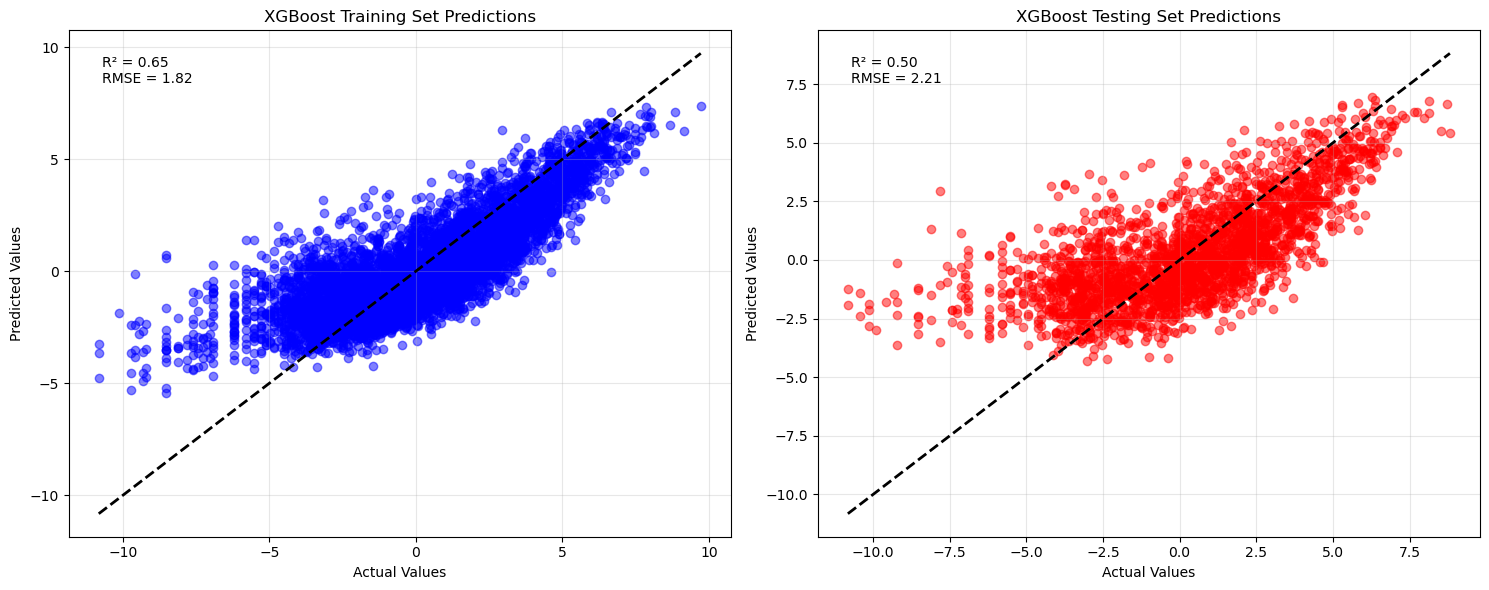

In [116]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import uniform, randint

X = merged_df[top_features]
y = merged_df["protein_abundance_log"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Optuna best params:
#   n_estimators: 800
#   max_depth: 5
#   min_child_weight: 15
#   learning_rate: 0.010430804698080389
#   subsample: 0.7324163214754182
#   colsample_bytree: 0.6796233551137986
#   gamma: 4.815880338605893
#   reg_alpha: 1.6268879900792304
#   reg_lambda: 1.822399803906993

xgb_best = XGBRegressor(
    n_estimators=800,
    max_depth=5,
    min_child_weight=15,
    learning_rate=0.010430804698080389,
    subsample=0.7324163214754182,
    colsample_bytree=0.6796233551137986,
    gamma=4.815880338605893,
    reg_alpha=1.6268879900792304,
    reg_lambda=1.822399803906993,
    random_state=42,
    objective="reg:squarederror",
)
xgb_best.fit(X_train_scaled, y_train)

y_train_pred = xgb_best.predict(X_train_scaled)
y_test_pred = xgb_best.predict(X_test_scaled)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


def plot_predictions(ax, y_true, y_pred, title, color):
    ax.scatter(y_true, y_pred, alpha=0.5, color=color)

    min_val = min(y_true)
    max_val = max(y_true)
    ax.plot(
        [min_val, max_val], [min_val, max_val], "k--", lw=2, label="Perfect Prediction"
    )

    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted Values")
    ax.set_title(title)
    ax.grid(True, alpha=0.3)

    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    # Handle potential division by zero in MAPE
    mask = y_true != 0
    mape = (
        np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
        if np.any(mask)
        else np.nan
    )

    ax.text(
        0.05,
        0.95,
        (
            f"R² = {r2:.2f}\nRMSE = {rmse:.2f}"
        ),
        transform=ax.transAxes,
        verticalalignment="top",
    )


# Plot predictions
plot_predictions(ax1, y_train, y_train_pred, "XGBoost Training Set Predictions", "blue")
plot_predictions(ax2, y_test, y_test_pred, "XGBoost Testing Set Predictions", "red")

plt.tight_layout()
plt.show()

# Multimodal Dense

Epoch 1/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 33.6170 - r2_score: -0.0962 - val_loss: 27.0585 - val_r2_score: 0.3738 - learning_rate: 0.0020
Epoch 2/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 25.6205 - r2_score: 0.3542 - val_loss: 20.9615 - val_r2_score: 0.4555 - learning_rate: 0.0020
Epoch 3/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 19.7952 - r2_score: 0.4181 - val_loss: 16.2297 - val_r2_score: 0.4644 - learning_rate: 0.0020
Epoch 4/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 15.3524 - r2_score: 0.4290 - val_loss: 12.7768 - val_r2_score: 0.4691 - learning_rate: 0.0020
Epoch 5/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 12.1886 - r2_score: 0.4338 - val_loss: 10.4080 - val_r2_score: 0.4704 - learning_rate: 0.0020
Epoch 6/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.9806 - r2_score: 0.4412 - val_loss: 8.9730 - val_r2_score: 0.4572 - learning_rate: 0.0020
Epoch 7/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.5652 - r

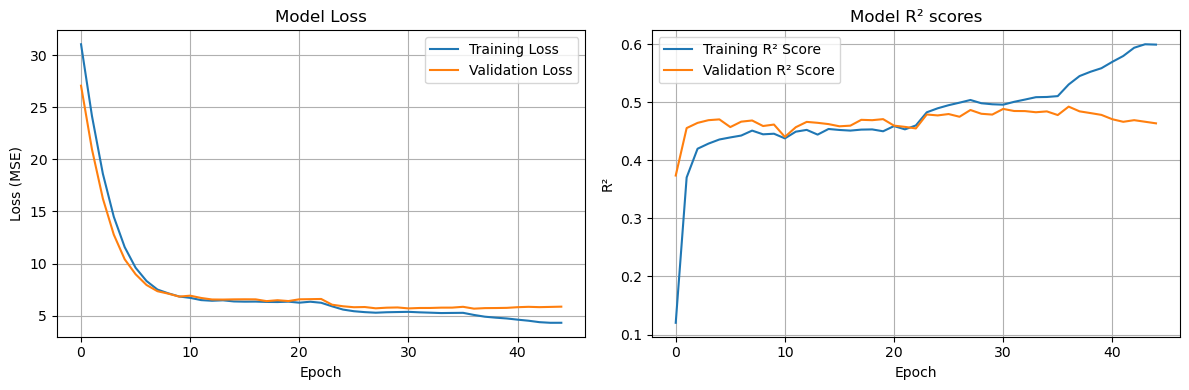

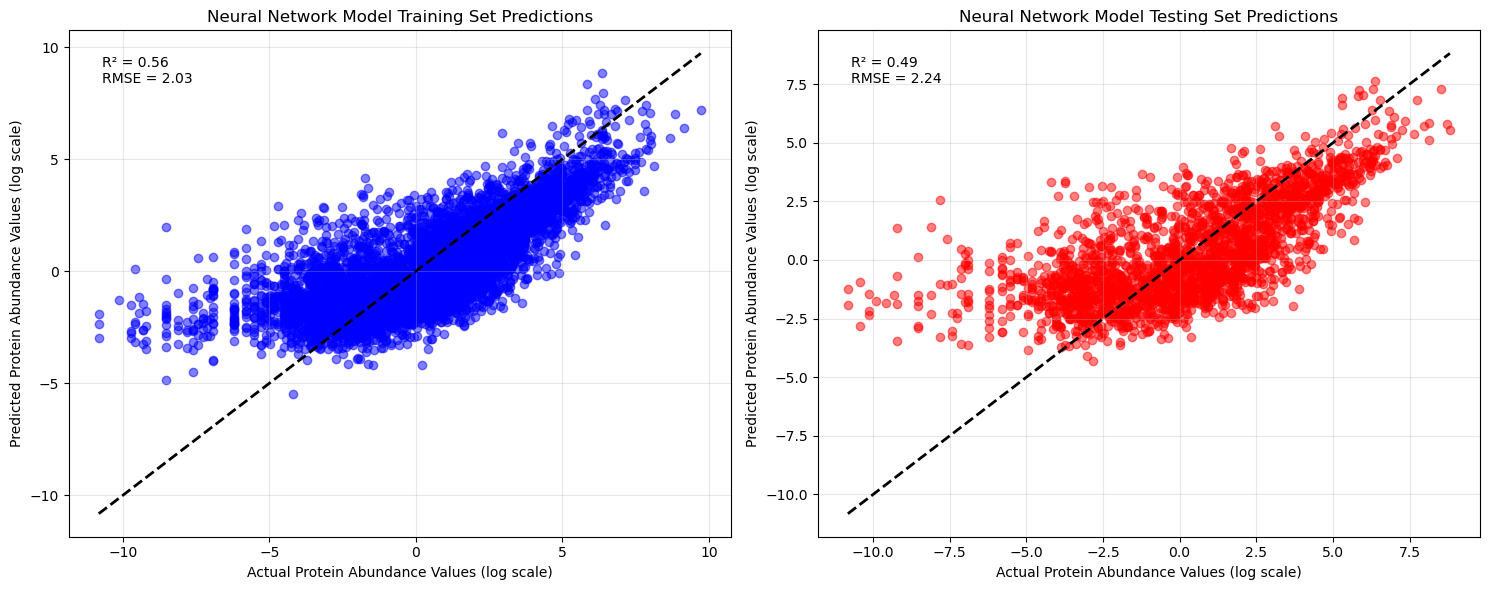

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.metrics import R2Score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    Dense,
    BatchNormalization,
    Dropout,
    Concatenate,
)
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2
import os
import random


# Set seeds for reproducibility
def set_seeds(seed=42):
    os.environ["PYTHONHASHSEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.keras.utils.set_random_seed(seed)


set_seeds(42)

embedding_cols1 = [col for col in merged_df.columns if col.startswith("emb_")]
embedding_cols2 = [col for col in merged_df.columns if col.startswith("emb2_")]
embedding_cols3 = [col for col in merged_df.columns if col.startswith("esm_")]
filtered_cols = [
    col
    for col in merged_df.columns
    if col not in embedding_cols1
    and col not in embedding_cols2
    and col not in embedding_cols3
    and col != "protein_abundance_log"
]

# Split the data including ESM embeddings
X_embeddings1 = merged_df[embedding_cols1].values  # Shape: (n_samples, 100)
X_embeddings2 = merged_df[embedding_cols2].values  # Shape: (n_samples, 256)
X_embeddings3 = merged_df[embedding_cols3].values  # Shape: (n_samples, 384)
X_filtered = merged_df[filtered_cols].values  # Shape: (n_samples, 15)
y = merged_df["protein_abundance_log"].values  # Shape: (n_samples,)

(
    X_emb1_train,
    X_emb1_test,
    X_emb2_train,
    X_emb2_test,
    X_emb3_train,
    X_emb3_test,
    X_filt_train,
    X_filt_test,
    y_train,
    y_test,
) = train_test_split(
    X_embeddings1, X_embeddings2, X_embeddings3, X_filtered, y, 
    test_size=0.3, random_state=42
)

# Scale all features including ESM embeddings
scaler_emb1 = StandardScaler()
X_emb1_train_scaled = scaler_emb1.fit_transform(X_emb1_train)
X_emb1_test_scaled = scaler_emb1.transform(X_emb1_test)

scaler_emb2 = StandardScaler()
X_emb2_train_scaled = scaler_emb2.fit_transform(X_emb2_train)
X_emb2_test_scaled = scaler_emb2.transform(X_emb2_test)

scaler_emb3 = StandardScaler()
X_emb3_train_scaled = scaler_emb3.fit_transform(X_emb3_train)
X_emb3_test_scaled = scaler_emb3.transform(X_emb3_test)

scaler_filt = StandardScaler()
X_filt_train_scaled = scaler_filt.fit_transform(X_filt_train)
X_filt_test_scaled = scaler_filt.transform(X_filt_test)

def build_multimodal_model(embedding1_dim, embedding2_dim, embedding3_dim, filtered_dim):
    embedding1_input = Input(shape=(embedding1_dim,), name="embedding1_input")
    embedding2_input = Input(shape=(embedding2_dim,), name="embedding2_input")
    embedding3_input = Input(shape=(embedding3_dim,), name="embedding3_input")
    filtered_input = Input(shape=(filtered_dim,), name="filtered_input")

    # Branch for embeddings1
    emb1_branch = Dense(128, activation="relu", kernel_regularizer=l2(0.01))(embedding1_input)
    emb1_branch = BatchNormalization()(emb1_branch)
    emb1_branch = Dropout(0.3)(emb1_branch)
    emb1_branch = Dense(64, activation="relu", kernel_regularizer=l2(0.01))(emb1_branch)
    emb1_branch = BatchNormalization()(emb1_branch)
    emb1_branch = Dropout(0.3)(emb1_branch)

    # Branch for embeddings2
    emb2_branch = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(embedding2_input)
    emb2_branch = BatchNormalization()(emb2_branch)
    emb2_branch = Dropout(0.3)(emb2_branch)
    emb2_branch = Dense(128, activation="relu", kernel_regularizer=l2(0.01))(emb2_branch)
    emb2_branch = BatchNormalization()(emb2_branch)
    emb2_branch = Dropout(0.3)(emb2_branch)

    # Branch for ESM embeddings
    emb3_branch = Dense(512, activation="relu", kernel_regularizer=l2(0.01))(embedding3_input)
    emb3_branch = BatchNormalization()(emb3_branch)
    emb3_branch = Dropout(0.3)(emb3_branch)
    emb3_branch = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(emb3_branch)
    emb3_branch = BatchNormalization()(emb3_branch)
    emb3_branch = Dropout(0.3)(emb3_branch)

    # Branch for filtered features
    filt_branch = Dense(64, activation="relu", kernel_regularizer=l2(0.01))(filtered_input)
    filt_branch = BatchNormalization()(filt_branch)
    filt_branch = Dropout(0.3)(filt_branch)
    filt_branch = Dense(32, activation="relu", kernel_regularizer=l2(0.01))(filt_branch)
    filt_branch = BatchNormalization()(filt_branch)
    filt_branch = Dropout(0.3)(filt_branch)

    # Merge all branches
    fused = Concatenate()([emb1_branch, emb2_branch, emb3_branch, filt_branch])

    fused = Dense(512, activation="relu", kernel_regularizer=l2(0.01))(fused)
    fused = BatchNormalization()(fused)
    fused = Dropout(0.3)(fused)
    fused = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(fused)
    fused = BatchNormalization()(fused)
    fused = Dropout(0.3)(fused)

    output = Dense(1, activation="linear")(fused)

    model = Model(
        inputs=[embedding1_input, embedding2_input, embedding3_input, filtered_input],
        outputs=output
    )

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
        loss="mean_squared_error",
        metrics=[R2Score()],
    )

    return model

# Get input dimensions
embedding1_dim = X_emb1_train_scaled.shape[1]
embedding2_dim = X_emb2_train_scaled.shape[1]
embedding3_dim = X_emb3_train_scaled.shape[1]
filtered_dim = X_filt_train_scaled.shape[1]

# Build and summarize the model
model = build_multimodal_model(embedding1_dim, embedding2_dim, embedding3_dim, filtered_dim)

# Keep the same callbacks
reduce_lr = ReduceLROnPlateau(
    monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1
)

early_stopping = EarlyStopping(
    monitor="val_loss", patience=8, restore_best_weights=True, verbose=1
)

# Train the model with all four inputs
history = model.fit(
    [X_emb1_train_scaled, X_emb2_train_scaled, X_emb3_train_scaled, X_filt_train_scaled],
    y_train,
    validation_data=(
        [X_emb1_test_scaled, X_emb2_test_scaled, X_emb3_test_scaled, X_filt_test_scaled],
        y_test,
    ),
    epochs=100,
    batch_size=32,
    callbacks=[reduce_lr, early_stopping],
    verbose=1,
)

y_train_pred = model.predict(
    [X_emb1_train_scaled, X_emb2_train_scaled, X_emb3_train_scaled, X_filt_train_scaled]
).flatten()
y_test_pred = model.predict(
    [X_emb1_test_scaled, X_emb2_test_scaled, X_emb3_test_scaled, X_filt_test_scaled]
).flatten()

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTraining Set Metrics:")
print(f"RMSE: {train_rmse:.2f}")
print(f"R²: {train_r2:.2f}")

print("\nTest Set Metrics:")
print(f"RMSE: {test_rmse:.2f}")
print(f"R²: {test_r2:.2f}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['r2_score'], label='Training R² Score')
plt.plot(history.history['val_r2_score'], label='Validation R² Score')
plt.title('Model R² scores')
plt.xlabel('Epoch')
plt.ylabel('R²')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

def plot_predictions(ax, y_true, y_pred, title, color):
    ax.scatter(y_true, y_pred, alpha=0.5, color=color)
    min_val = min(y_true)
    max_val = max(y_true)
    ax.plot(
        [min_val, max_val], 
        [min_val, max_val], 
        "k--", 
        lw=2, 
        label="Perfect Prediction"
    )
    ax.set_xlabel("Actual Protein Abundance Values (log scale)")
    ax.set_ylabel("Predicted Protein Abundance Values (log scale)")
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    ax.text(
        0.05,
        0.95,
        f"R² = {r2:.2f}\nRMSE = {rmse:.2f}\n",
        transform=ax.transAxes,
        verticalalignment="top",
    )

plot_predictions(
    ax1, 
    y_train, 
    y_train_pred, 
    "Neural Network Model Training Set Predictions", 
    "blue"
)
plot_predictions(
    ax2, 
    y_test, 
    y_test_pred, 
    "Neural Network Model Testing Set Predictions", 
    "red"
)

plt.tight_layout()
plt.show()

# Multimodal LSTM

Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ embedding1_input    │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding2_input    │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding3_input    │ (None, 384)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ filtered_input      │ (None, 15)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_29          │ (None, 20, 5)     │          0 │ embedding1_input… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_30          │ (None, 16, 16)    │          0 │ embedding2_input… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_31          │ (None, 24, 16)    │          0 │ embedding3_input… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_366 (Dense)   │ (None, 64)        │      1,024 │ filtered_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_46 (LSTM)      │ (None, 20, 128)   │     68,608 │ reshape_29[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_48 (LSTM)      │ (None, 16, 256)   │    279,552 │ reshape_30[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_50 (LSTM)      │ (None, 24, 256)   │    279,552 │ reshape_31[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_366[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_47 (LSTM)      │ (None, 64)        │     49,408 │ lstm_46[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_49 (LSTM)      │ (None, 128)       │    197,120 │ lstm_48[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_51 (LSTM)      │ (None, 128)       │    197,120 │ lstm_50[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_342         │ (None, 64)        │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ lstm_47[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ lstm_49[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ lstm_51[0][0]     │
│ (BatchNormalizatio… │                   │            │                 

 Total params: 1,428,705 (5.45 MB)

 Trainable params: 1,426,337 (5.44 MB)

 Non-trainable params: 2,368 (9.25 KB)

Epoch 1/150
173/173 ━━━━━━━━━━━━━━━━━━━━ 27s 117ms/step - loss: 21.4414 - r2_score: -0.0593 - val_loss: 16.7198 - val_r2_score: 0.3765 - learning_rate: 0.0020
Epoch 2/150
173/173 ━━━━━━━━━━━━━━━━━━━━ 24s 142ms/step - loss: 16.3023 - r2_score: 0.3312 - val_loss: 13.7580 - val_r2_score: 0.4589 - learning_rate: 0.0020
Epoch 3/150
173/173 ━━━━━━━━━━━━━━━━━━━━ 25s 143ms/step - loss: 13.5854 - r2_score: 0.3916 - val_loss: 11.5142 - val_r2_score: 0.4806 - learning_rate: 0.0020
Epoch 4/150
173/173 ━━━━━━━━━━━━━━━━━━━━ 24s 139ms/step - loss: 11.3713 - r2_score: 0.4197 - val_loss: 9.8105 - val_r2_score: 0.4782 - learning_rate: 0.0020
Epoch 5/150
173/173 ━━━━━━━━━━━━━━━━━━━━ 24s 141ms/step - loss: 9.6265 - r2_score: 0.4311 - val_loss: 8.4479 - val_r2_score: 0.4802 - learning_rate: 0.0020
Epoch 6/150
173/173 ━━━━━━━━━━━━━━━━━━━━ 26s 148ms/step - loss: 8.2844 - r2_score: 0.4401 - val_loss: 7.4482 - val_r2_score: 0.4819 - learning_rate: 0.0020
Epoch 7/150
173/173 ━━━━━━━━━━━━━━━━━━━━ 26s 150ms/step 

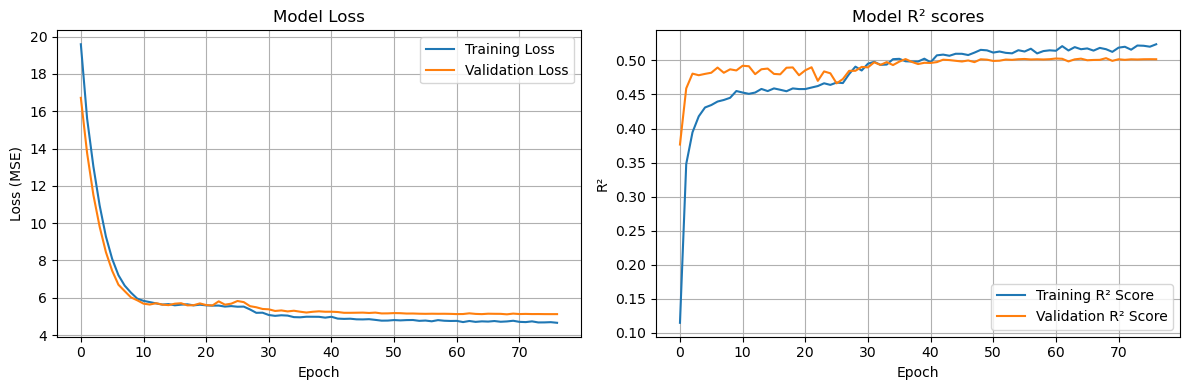

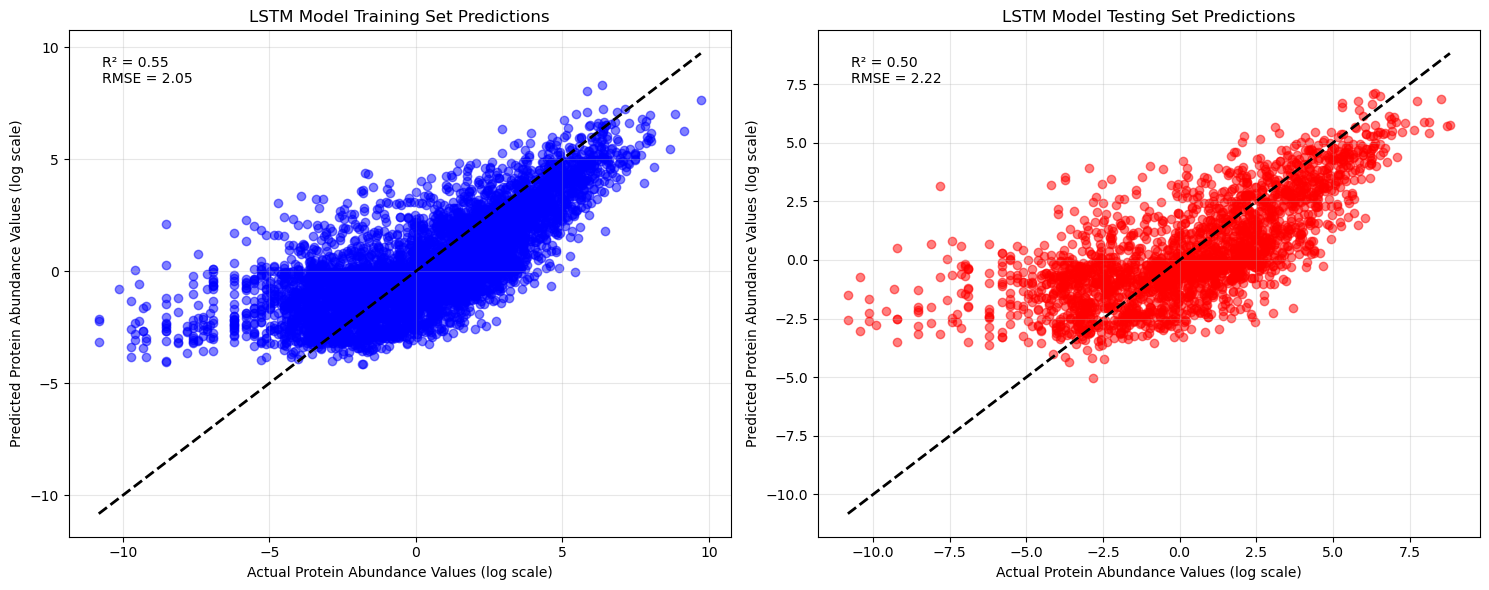

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, BatchNormalization, Dropout, Concatenate, Reshape
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2

# Set seeds for reproducibility
def set_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.keras.utils.set_random_seed(seed)

set_seeds(42)

embedding_cols1 = [col for col in merged_df.columns if col.startswith('emb_')]
embedding_cols2 = [col for col in merged_df.columns if col.startswith('emb2_')]
embedding_cols3 = [col for col in merged_df.columns if col.startswith('esm_')]
filtered_cols = [col for col in merged_df.columns if col not in embedding_cols1 
                 and col not in embedding_cols2 
                 and col not in embedding_cols3 
                 and col != 'protein_abundance_log']

X_embeddings1 = merged_df[embedding_cols1].values  # Shape: (n_samples, 100)
X_embeddings2 = merged_df[embedding_cols2].values  # Shape: (n_samples, 256)
X_embeddings3 = merged_df[embedding_cols3].values  # Shape: (n_samples, 384)
X_filtered = merged_df[filtered_cols].values    # Shape: (n_samples, 15)
y = merged_df["protein_abundance_log"].values   # Shape: (n_samples,)

X_emb1_train, X_emb1_test, X_emb2_train, X_emb2_test, X_emb3_train, X_emb3_test, X_filt_train, X_filt_test, y_train, y_test = train_test_split(
    X_embeddings1, X_embeddings2, X_embeddings3, X_filtered, y, 
    test_size=0.3, random_state=42,
)

# Scale all features
scaler_emb1 = StandardScaler()
X_emb1_train_scaled = scaler_emb1.fit_transform(X_emb1_train)
X_emb1_test_scaled = scaler_emb1.transform(X_emb1_test)

scaler_emb2 = StandardScaler()
X_emb2_train_scaled = scaler_emb2.fit_transform(X_emb2_train)
X_emb2_test_scaled = scaler_emb2.transform(X_emb2_test)

scaler_emb3 = StandardScaler()
X_emb3_train_scaled = scaler_emb3.fit_transform(X_emb3_train)
X_emb3_test_scaled = scaler_emb3.transform(X_emb3_test)

scaler_filt = StandardScaler()
X_filt_train_scaled = scaler_filt.fit_transform(X_filt_train)
X_filt_test_scaled = scaler_filt.transform(X_filt_test)

def build_lstm_multimodal_model(embedding1_dim, embedding2_dim, embedding3_dim, filtered_dim):
    embedding1_input = Input(shape=(embedding1_dim,), name='embedding1_input')
    embedding2_input = Input(shape=(embedding2_dim,), name='embedding2_input')
    embedding3_input = Input(shape=(embedding3_dim,), name='embedding3_input')
    filtered_input = Input(shape=(filtered_dim,), name='filtered_input')
    
    # LSTM parameters for all embedding branches
    lstm_units1 = 5
    time_steps1 = embedding1_dim // lstm_units1
    
    lstm_units2 = 16
    time_steps2 = embedding2_dim // lstm_units2
    
    lstm_units3 = 16
    time_steps3 = embedding3_dim // lstm_units3
    
    # Branch for embeddings1 with LSTM
    emb1_reshaped = Reshape((time_steps1, lstm_units1))(embedding1_input)
    emb1_lstm = LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)(emb1_reshaped)
    emb1_lstm = LSTM(64, dropout=0.3, recurrent_dropout=0.3)(emb1_lstm)
    emb1_branch = BatchNormalization()(emb1_lstm)
    emb1_branch = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(emb1_branch)
    emb1_branch = Dropout(0.3)(emb1_branch)
    
    # Branch for embeddings2 with LSTM
    emb2_reshaped = Reshape((time_steps2, lstm_units2))(embedding2_input)
    emb2_lstm = LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)(emb2_reshaped)
    emb2_lstm = LSTM(128, dropout=0.3, recurrent_dropout=0.3)(emb2_lstm)
    emb2_branch = BatchNormalization()(emb2_lstm)
    emb2_branch = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(emb2_branch)
    emb2_branch = Dropout(0.3)(emb2_branch)
    
    # Branch for ESM embeddings with LSTM
    emb3_reshaped = Reshape((time_steps3, lstm_units3))(embedding3_input)
    emb3_lstm = LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)(emb3_reshaped)
    emb3_lstm = LSTM(128, dropout=0.3, recurrent_dropout=0.3)(emb3_lstm)
    emb3_branch = BatchNormalization()(emb3_lstm)
    emb3_branch = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(emb3_branch)
    emb3_branch = Dropout(0.3)(emb3_branch)
    
    # Branch for filtered features
    filt_branch = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(filtered_input)
    filt_branch = BatchNormalization()(filt_branch)
    filt_branch = Dropout(0.3)(filt_branch)
    filt_branch = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(filt_branch)
    filt_branch = BatchNormalization()(filt_branch)
    filt_branch = Dropout(0.3)(filt_branch)
    
    # Concatenate all branches
    fused = Concatenate()([emb1_branch, emb2_branch, emb3_branch, filt_branch])
    
    # Fusion network
    fused = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(fused)
    fused = BatchNormalization()(fused)
    fused = Dropout(0.3)(fused)
    fused = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(fused)
    fused = BatchNormalization()(fused)
    fused = Dropout(0.3)(fused)
    
    # Output layer
    output = Dense(1, activation='linear')(fused)
    
    model = Model(inputs=[embedding1_input, embedding2_input, embedding3_input, filtered_input], outputs=output)
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
        loss='mean_squared_error',
        metrics=[R2Score()]
    )
    
    return model

# Get input dimensions
embedding1_dim = X_emb1_train_scaled.shape[1]
embedding2_dim = X_emb2_train_scaled.shape[1]
embedding3_dim = X_emb3_train_scaled.shape[1]
filtered_dim = X_filt_train_scaled.shape[1]
    
# Build and summarize the model
model = build_lstm_multimodal_model(embedding1_dim, embedding2_dim, embedding3_dim, filtered_dim)
model.summary()

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    [X_emb1_train_scaled, X_emb2_train_scaled, X_emb3_train_scaled, X_filt_train_scaled],
    y_train,
    validation_data=([X_emb1_test_scaled, X_emb2_test_scaled, X_emb3_test_scaled, X_filt_test_scaled], y_test),
    epochs=150,
    batch_size=32,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

y_train_pred = model.predict([X_emb1_train_scaled, X_emb2_train_scaled, X_emb3_train_scaled, X_filt_train_scaled]).flatten()
y_test_pred = model.predict([X_emb1_test_scaled, X_emb2_test_scaled, X_emb3_test_scaled, X_filt_test_scaled]).flatten()

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTraining Set Metrics:")
print(f"RMSE: {train_rmse:.2f}")
print(f"R²: {train_r2:.2f}")

print("\nTest Set Metrics:")
print(f"RMSE: {test_rmse:.2f}")
print(f"R²: {test_r2:.2f}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['r2_score'], label='Training R² Score')
plt.plot(history.history['val_r2_score'], label='Validation R² Score')
plt.title('Model R² scores')
plt.xlabel('Epoch')
plt.ylabel('R²')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

def plot_predictions(ax, y_true, y_pred, title, color):
    ax.scatter(y_true, y_pred, alpha=0.5, color=color)
    min_val = min(y_true)
    max_val = max(y_true)
    ax.plot(
        [min_val, max_val], 
        [min_val, max_val], 
        "k--", 
        lw=2, 
        label="Perfect Prediction"
    )
    ax.set_xlabel("Actual Protein Abundance Values (log scale)")
    ax.set_ylabel("Predicted Protein Abundance Values (log scale)")
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    ax.text(
        0.05,
        0.95,
        f"R² = {r2:.2f}\nRMSE = {rmse:.2f}\n",
        transform=ax.transAxes,
        verticalalignment="top",
    )

plot_predictions(
    ax1, 
    y_train, 
    y_train_pred, 
    "LSTM Model Training Set Predictions", 
    "blue"
)
plot_predictions(
    ax2, 
    y_test, 
    y_test_pred, 
    "LSTM Model Testing Set Predictions", 
    "red"
)

plt.tight_layout()
plt.show()

# Multimodal CNN

Epoch 1/150
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - loss: 36.5879 - r2_score: -0.0909 - val_loss: 23.2045 - val_r2_score: 0.3040 - learning_rate: 0.0020
Epoch 2/150
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - loss: 20.8130 - r2_score: 0.3258 - val_loss: 15.4671 - val_r2_score: 0.4510 - learning_rate: 0.0020
Epoch 3/150
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 14.8698 - r2_score: 0.3947 - val_loss: 12.0570 - val_r2_score: 0.4387 - learning_rate: 0.0020
Epoch 4/150
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 11.4337 - r2_score: 0.4127 - val_loss: 10.1188 - val_r2_score: 0.4472 - learning_rate: 0.0020
Epoch 5/150
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - loss: 9.8859 - r2_score: 0.4202 - val_loss: 9.5956 - val_r2_score: 0.4324 - learning_rate: 0.0020
Epoch 6/150
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - loss: 9.2364 - r2_score: 0.4299 - val_loss: 9.0026 - val_r2_score: 0.4506 - learning_rate: 0.0020
Epoch 7/150
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - loss: 8.8539 - r2_score:

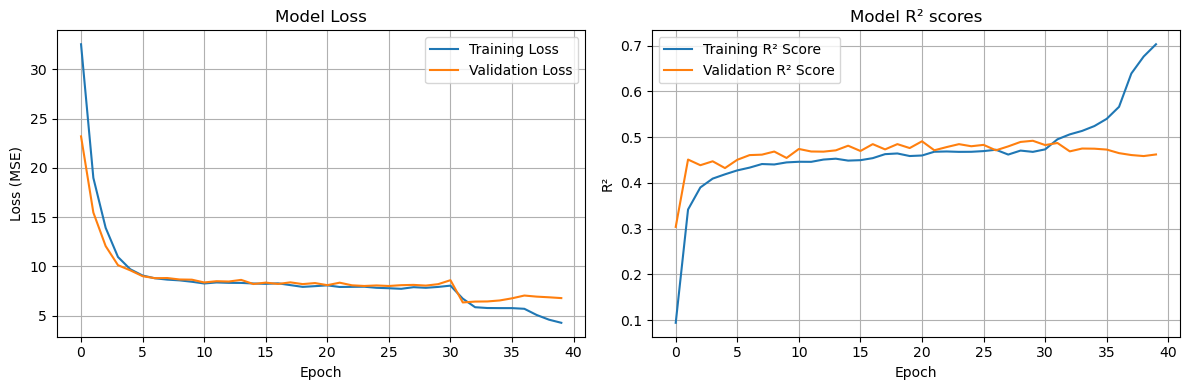

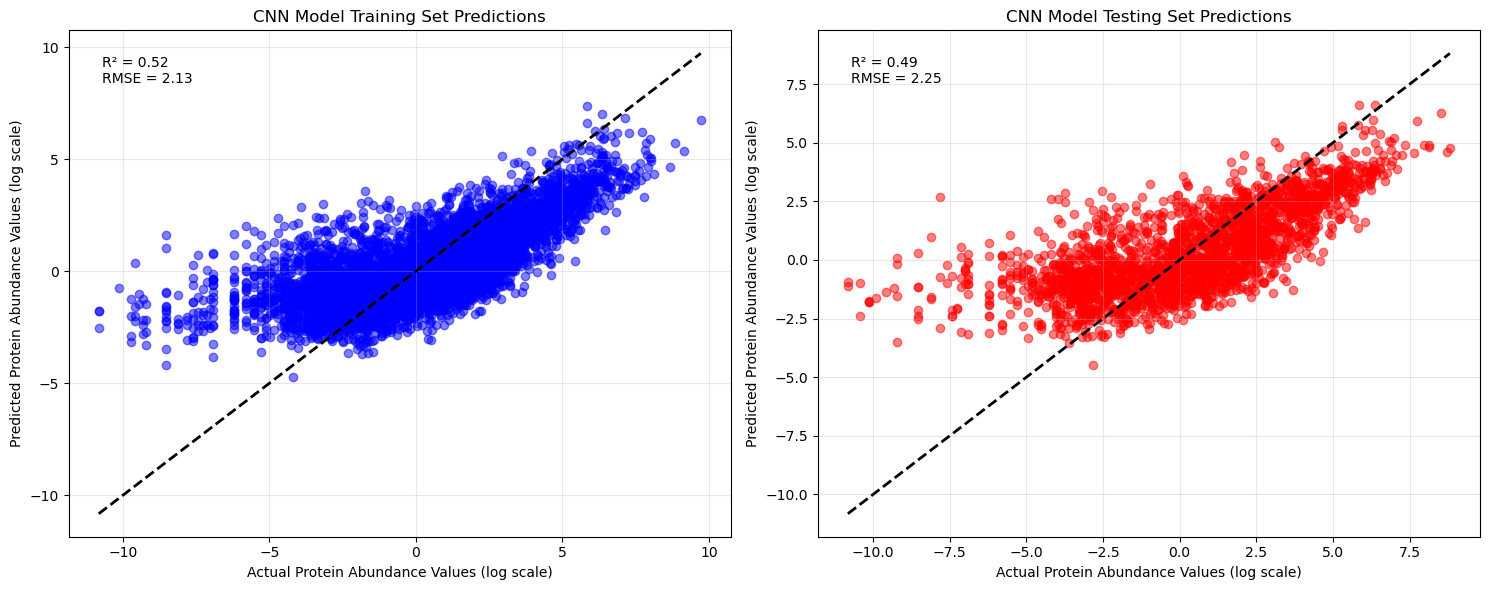

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv1D, AveragePooling1D, BatchNormalization, Dropout, Concatenate, Reshape
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam  # Import Adam optimizer here

# Set seeds for reproducibility
def set_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.keras.utils.set_random_seed(seed)

set_seeds(42)

embedding_cols1 = [col for col in merged_df.columns if col.startswith('emb_')]
embedding_cols2 = [col for col in merged_df.columns if col.startswith('emb2_')]
embedding_cols3 = [col for col in merged_df.columns if col.startswith('esm_')]
filtered_cols = [col for col in merged_df.columns if col not in embedding_cols1 and col not in embedding_cols2 and col not in embedding_cols3 and col != 'protein_abundance_log']

X_embeddings1 = merged_df[embedding_cols1].values
X_embeddings2 = merged_df[embedding_cols2].values
X_embeddings3 = merged_df[embedding_cols3].values
X_filtered = merged_df[filtered_cols].values
y = merged_df["protein_abundance_log"].values

X_emb1_train, X_emb1_test, X_emb2_train, X_emb2_test, X_emb3_train, X_emb3_test, X_filt_train, X_filt_test, y_train, y_test = train_test_split(
    X_embeddings1, X_embeddings2, X_embeddings3, X_filtered, y, 
    test_size=0.3, random_state=42,
)

# Scale all features
scaler_emb1 = StandardScaler()
X_emb1_train_scaled = scaler_emb1.fit_transform(X_emb1_train)
X_emb1_test_scaled = scaler_emb1.transform(X_emb1_test)

scaler_emb2 = StandardScaler()
X_emb2_train_scaled = scaler_emb2.fit_transform(X_emb2_train)
X_emb2_test_scaled = scaler_emb2.transform(X_emb2_test)

scaler_emb3 = StandardScaler()
X_emb3_train_scaled = scaler_emb3.fit_transform(X_emb3_train)
X_emb3_test_scaled = scaler_emb3.transform(X_emb3_test)

scaler_filt = StandardScaler()
X_filt_train_scaled = scaler_filt.fit_transform(X_filt_train)
X_filt_test_scaled = scaler_filt.transform(X_filt_test)

def build_cnn_multimodal_model(embedding1_dim, embedding2_dim, embedding3_dim, filtered_dim):
    # Input layers
    embedding1_input = Input(shape=(embedding1_dim,), name='embedding1_input')
    embedding2_input = Input(shape=(embedding2_dim,), name='embedding2_input')
    embedding3_input = Input(shape=(embedding3_dim,), name='embedding3_input')
    filtered_input = Input(shape=(filtered_dim,), name='filtered_input')
    
    # Reshape inputs for CNN
    emb1_reshaped = Reshape((embedding1_dim, 1))(embedding1_input)
    emb2_reshaped = Reshape((embedding2_dim, 1))(embedding2_input)
    emb3_reshaped = Reshape((embedding3_dim, 1))(embedding3_input)
    
    # First embedding branch
    emb1_conv1 = Conv1D(64, kernel_size=3, activation='relu', padding='same')(emb1_reshaped)
    emb1_bn1 = BatchNormalization()(emb1_conv1)
    emb1_pool1 = AveragePooling1D(pool_size=2)(emb1_bn1)
    emb1_drop1 = Dropout(0.3)(emb1_pool1)
    
    emb1_conv2 = Conv1D(128, kernel_size=3, activation='relu', padding='same')(emb1_drop1)
    emb1_bn2 = BatchNormalization()(emb1_conv2)
    emb1_pool2 = AveragePooling1D(pool_size=2)(emb1_bn2)
    emb1_drop2 = Dropout(0.3)(emb1_pool2)
    
    emb1_flat = Flatten()(emb1_drop2)
    emb1_dense = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(emb1_flat)
    emb1_bn3 = BatchNormalization()(emb1_dense)
    emb1_branch = Dropout(0.3)(emb1_bn3)
    
    # Second embedding branch
    emb2_conv1 = Conv1D(128, kernel_size=3, activation='relu', padding='same')(emb2_reshaped)
    emb2_bn1 = BatchNormalization()(emb2_conv1)
    emb2_pool1 = AveragePooling1D(pool_size=2)(emb2_bn1)
    emb2_drop1 = Dropout(0.3)(emb2_pool1)
    
    emb2_conv2 = Conv1D(256, kernel_size=3, activation='relu', padding='same')(emb2_drop1)
    emb2_bn2 = BatchNormalization()(emb2_conv2)
    emb2_pool2 = AveragePooling1D(pool_size=2)(emb2_bn2)
    emb2_drop2 = Dropout(0.3)(emb2_pool2)
    
    emb2_flat = Flatten()(emb2_drop2)
    emb2_dense = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(emb2_flat)
    emb2_bn3 = BatchNormalization()(emb2_dense)
    emb2_branch = Dropout(0.3)(emb2_bn3)
    
    # Third embedding branch
    emb3_conv1 = Conv1D(128, kernel_size=3, activation='relu', padding='same')(emb3_reshaped)
    emb3_bn1 = BatchNormalization()(emb3_conv1)
    emb3_pool1 = AveragePooling1D(pool_size=2)(emb3_bn1)
    emb3_drop1 = Dropout(0.3)(emb3_pool1)
    
    emb3_conv2 = Conv1D(256, kernel_size=3, activation='relu', padding='same')(emb3_drop1)
    emb3_bn2 = BatchNormalization()(emb3_conv2)
    emb3_pool2 = AveragePooling1D(pool_size=2)(emb3_bn2)
    emb3_drop2 = Dropout(0.3)(emb3_pool2)
    
    emb3_flat = Flatten()(emb3_drop2)
    emb3_dense = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(emb3_flat)
    emb3_bn3 = BatchNormalization()(emb3_dense)
    emb3_branch = Dropout(0.3)(emb3_bn3)
    
    # Filtered features branch
    filt_dense1 = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(filtered_input)
    filt_bn1 = BatchNormalization()(filt_dense1)
    filt_drop1 = Dropout(0.3)(filt_bn1)
    
    filt_dense2 = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(filt_drop1)
    filt_bn2 = BatchNormalization()(filt_dense2)
    filt_branch = Dropout(0.3)(filt_bn2)
    
    # Concatenate all branches
    fused = Concatenate()([emb1_branch, emb2_branch, emb3_branch, filt_branch])
    
    # Fusion network
    fused = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(fused)
    fused = BatchNormalization()(fused)
    fused = Dropout(0.3)(fused)
    
    fused = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(fused)
    fused = BatchNormalization()(fused)
    fused = Dropout(0.3)(fused)
    
    # Output layer
    output = Dense(1, activation='linear')(fused)
    
    model = Model(inputs=[embedding1_input, embedding2_input, embedding3_input, filtered_input], outputs=output)
    
    optimizer = Adam(learning_rate=0.002, clipnorm=1.0)
    
    model.compile(
        optimizer=optimizer,
        loss='mean_squared_error',
        metrics=[R2Score()]
    )
    
    return model

# Updated model creation and training
embedding1_dim = X_emb1_train_scaled.shape[1]
embedding2_dim = X_emb2_train_scaled.shape[1]
embedding3_dim = X_emb3_train_scaled.shape[1]
filtered_dim = X_filt_train_scaled.shape[1]

model = build_cnn_multimodal_model(embedding1_dim, embedding2_dim, embedding3_dim, filtered_dim)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True,
    verbose=1
)


history = model.fit(
    [X_emb1_train_scaled, X_emb2_train_scaled, X_emb3_train_scaled, X_filt_train_scaled],
    y_train,
    validation_data=([X_emb1_test_scaled, X_emb2_test_scaled, X_emb3_test_scaled, X_filt_test_scaled], y_test),
    epochs=150,
    batch_size=64,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

y_train_pred = model.predict([X_emb1_train_scaled, X_emb2_train_scaled, X_emb3_train_scaled, X_filt_train_scaled]).flatten()
y_test_pred = model.predict([X_emb1_test_scaled, X_emb2_test_scaled, X_emb3_test_scaled, X_filt_test_scaled]).flatten()

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


print("\nTraining Set Metrics:")
print(f"RMSE: {train_rmse:.2f}")
print(f"R²: {train_r2:.2f}")

print("\nTest Set Metrics:")
print(f"RMSE: {test_rmse:.2f}")
print(f"R²: {test_r2:.2f}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['r2_score'], label='Training R² Score')
plt.plot(history.history['val_r2_score'], label='Validation R² Score')
plt.title('Model R² scores')
plt.xlabel('Epoch')
plt.ylabel('R²')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

def plot_predictions(ax, y_true, y_pred, title, color):
    ax.scatter(y_true, y_pred, alpha=0.5, color=color)
    min_val = min(y_true)
    max_val = max(y_true)
    ax.plot(
        [min_val, max_val], 
        [min_val, max_val], 
        "k--", 
        lw=2, 
        label="Perfect Prediction"
    )
    ax.set_xlabel("Actual Protein Abundance Values (log scale)")
    ax.set_ylabel("Predicted Protein Abundance Values (log scale)")
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    ax.text(
        0.05,
        0.95,
        f"R² = {r2:.2f}\nRMSE = {rmse:.2f}\n",
        transform=ax.transAxes,
        verticalalignment="top",
    )

plot_predictions(
    ax1, 
    y_train, 
    y_train_pred, 
    "CNN Model Training Set Predictions", 
    "blue"
)
plot_predictions(
    ax2, 
    y_test, 
    y_test_pred, 
    "CNN Model Testing Set Predictions", 
    "red"
)

plt.tight_layout()
plt.show()